# libs

In [467]:
import datetime
import warnings
import pickle
import gc
import os
import math
import pprint
import hashlib
import functools

import numpy  as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn           as sns

from IPython.display import display

<br/>

In [468]:
import pymc3 as pm
import arviz as az

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [469]:
import hashlib
import datetime
import warnings
import pickle
import gc

In [470]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn           as sns

In [471]:
from IPython.display import display

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [13, 7]

In [472]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [473]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing   import normalize, StandardScaler, LabelBinarizer
from sklearn.metrics         import classification_report, roc_curve, auc,accuracy_score, confusion_matrix, f1_score, fbeta_score, balanced_accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration     import CalibratedClassifierCV, calibration_curve
from boruta                  import BorutaPy
import optuna

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import RandomForestClassifier

import lightgbm as lgb         

In [474]:
import theano.tensor as tt

# tabelas

In [555]:
# df = pd.read_csv('~/Documents/data/cartola-fc-brasil-scouts/jogadores.csv')

# df = df.sort_values(by=["ano", "rodada"]).copy()
# df['id']  = df['Nome'].apply( lambda x: hashlib.sha1(str.encode(x)).hexdigest() )
# df['pos'] = df['Nome'].apply( lambda x: x.split('(')[-1].split(')')[0].strip() )

# display( df )

# scouts  = ['DS','G','A','SG','FS','FF','FD','FT','DD','DP','GC','CV','CA','PP','GS','FC','I','PI','RB','PE']
# mercado = ['Preço', 'Média','Variação']
# keys    = ["id", "ano"]

# gscouts = df.groupby(keys)[scouts].agg(['max'])
# gscouts.columns = gscouts.columns.map('_'.join)
# gscouts = gscouts.reset_index()

# gmercado = df.groupby(keys)[mercado].agg(['max'])
# gmercado.columns = gmercado.columns.map('_'.join)
# gmercado = gmercado.reset_index()

# gpos = df.groupby(keys)[['pos']].agg(['first'])
# gpos.columns = gpos.columns.map('_'.join)
# gpos = gpos.reset_index()

# display(gpos['pos_first'].value_counts())

In [556]:
# cols_ = ["Preço_max", "Média_max", "Variação_max", "G_max", "A_max", "I_max", "GC_max", "FC_max", "pos_first"]
# X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys), gpos.drop(columns=keys)], axis=1).copy().fillna(-1.0)#[cols_]
# X.columns = X.columns.str.upper()

```
"FS": suffered fouls,
"PE": missed passes,
"A": assistances,
"FT": shots on the post,
"FD": defended shots,
"FF": shots off target,
"G": goals,
"I": offsides,
"PP": missed penalties,
"RB": successful tackes,
"FC": fouls commited,
"GC": own goals,
"CA": yellow cards,
"CV": red cards,
"SG": clean sheets (only defenders),
"DD": difficult defenses (only goalies),
"DP": defended penalties (only goalies),
"GS": suffered goals (only goalies)
```

In [557]:
df = pd.read_csv('~/Documents/data/cartola-fc-brasil-scouts/jogadores.csv')

df = df.sort_values(by=["ano", "rodada"]).copy()
df['id']  = df['Nome'].apply( lambda x: hashlib.sha1(str.encode(x)).hexdigest() )
df['pos'] = df['Nome'].apply( lambda x: x.split('(')[-1].split(')')[0].strip() )

display( df )

scouts  = ['DS','G','A','SG','FS','FF','FD','FT','DD','DP','GC','CV','CA','PP','GS','FC','I','PI','RB','PE']
mercado = ['Preço', 'Média','Variação']
keys    = ["id", "ano"]

gscouts = df.groupby(keys)[scouts].agg(['sum', 'max'])
gscouts.columns = gscouts.columns.map('_'.join)
gscouts = gscouts.reset_index()

gmercado = df.groupby(keys)[mercado].agg(['sum','max'])
gmercado.columns = gmercado.columns.map('_'.join)
gmercado = gmercado.reset_index()

gpos = df.groupby(keys)[['pos']].agg(['first'])
gpos.columns = gpos.columns.map('_'.join)
gpos = gpos.reset_index()

display(gpos['pos_first'].value_counts())

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,GS,FC,I,PI,rodada,ano,RB,PE,id,pos
7882,Ricardo Bueno (ATA),Ceará,18.52,1.0,22.70,22.7,14.52,NaN,2.0,1.0,...,NaN,2.0,1.0,NaN,1,2019,1.0,1.0,1f4d452190fb0558c5f5696b944b9afe4b02ca08,ATA
7883,Bruno Henrique (ATA),Flamengo,21.51,1.0,21.00,21.0,11.51,NaN,2.0,NaN,...,NaN,1.0,NaN,NaN,1,2019,NaN,NaN,9f9a076464350d81d76c9b8940d64b9890e4b053,ATA
7884,Nikão (MEI),Athlético-PR,19.29,1.0,18.80,18.8,10.29,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,1,2019,5.0,NaN,9752a812f300239c0f4fcae95d41e2843653a308,MEI
7885,Tiepo (GOL),Chapecoense,13.18,1.0,17.00,17.0,11.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,2019,NaN,NaN,ec9799d86e28ec368cccfb660bf39ff3bc3eed7c,GOL
7886,Vanderlei (GOL),Santos,22.69,1.0,15.70,15.7,5.69,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1,2019,NaN,1.0,a5dde5accc0044a9808b0257f6faa5ba89342b7f,GOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7877,Jadson (MEI),Athlético-PR,3.53,9.0,0.11,0.8,-0.40,NaN,NaN,NaN,...,NaN,3.0,NaN,40.0,38,2020,NaN,NaN,fe95e28e44efa7db07376c045a2fa89332ea5308,MEI
7878,Patrick de Lucca (MEI),Bahia,0.77,3.0,-0.23,-1.5,-0.29,1.0,NaN,NaN,...,NaN,NaN,NaN,25.0,38,2020,NaN,NaN,0157594398527348fc28f663c44291f22f8172ae,MEI
7879,Guilherme Biro (ATA),Coritiba,0.77,8.0,-0.32,-3.6,-0.21,15.0,NaN,NaN,...,NaN,14.0,NaN,41.0,38,2020,NaN,NaN,3e299fb9c705d57573fa4ab8a1a9f607edc60dc2,ATA
7880,Gabriel Pereira (MEI),Corinthians,0.79,5.0,-0.40,0.0,0.00,1.0,NaN,NaN,...,NaN,6.0,NaN,15.0,38,2020,NaN,NaN,90a8b33c4ac288f85fa4a7e678592dd30600d8a4,MEI


MEI    408
ATA    285
ZAG    203
LAT    200
GOL     96
TEC     91
Name: pos_first, dtype: int64

In [558]:
cols_ = ["Preço_max", "Média_max", "Variação_max", 
         "Preço_sum", "Média_sum", "Variação_sum",
        "FS_max" ,
        "PE_max" ,
        "A_max" ,
        "FT_max" ,
        "FD_max" ,
        "FF_max" ,
        "G_max" ,
        "I_max" ,
        "PP_max" ,
        "RB_max" ,
        "FC_max" ,
        "GC_max" ,
        "CA_max" ,
        "CV_max" ,
        
        "FS_sum" ,
        "PE_sum" ,
        "A_sum" ,
        "FT_sum" ,
        "FD_sum" ,
        "FF_sum" ,
        "G_sum" ,
        "I_sum" ,
        "PP_sum" ,
        "RB_sum" ,
        "FC_sum" ,
        "GC_sum" ,
        "CA_sum" ,
        "CV_sum" ,
         
        "pos_first"]
X = pd.concat([gscouts.drop(columns=keys), gmercado.drop(columns=keys), gpos.drop(columns=keys)], axis=1).copy().fillna(-1.0)[cols_]
X.columns = X.columns.str.upper()

In [559]:
scaler = StandardScaler()
scaler = MinMaxScaler()

# yy = pd.Categorical(1 * X["POS_FIRST"] == "ATA").codes
yy = pd.Categorical(X["POS_FIRST"]).codes
xx = scaler.fit_transform( X.drop(columns=["POS_FIRST"]) )

In [563]:
x_ = X.drop(columns=["POS_FIRST"]).copy()
x_[x_.columns] = scaler.fit_transform( x_ )

# g = sns.pairplot(x_, corner=True, plot_kws=dict(marker="+", linewidth=1),)

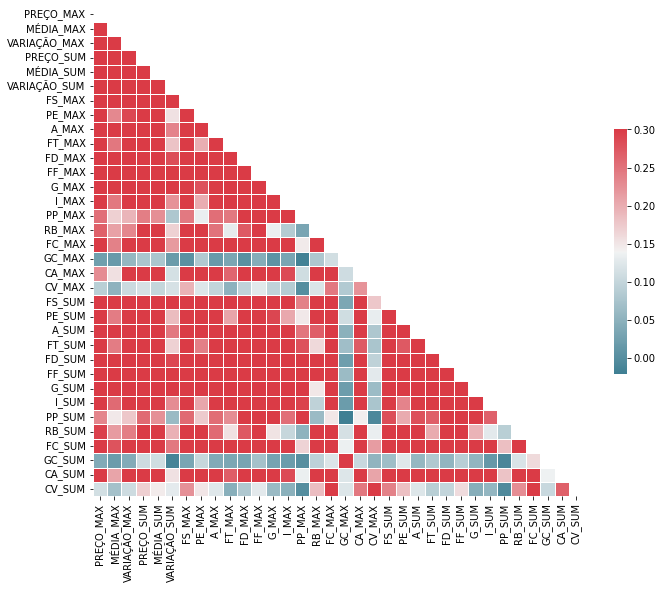

In [564]:
corr = x_.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    ax=ax,
);

In [565]:
gc.collect()

910551

## seleção

In [566]:
rf = RandomForestClassifier(n_jobs=-1, max_depth=10, n_estimators=500, oob_score=True)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, max_iter=23)

feat_selector.fit(x_.values, yy)

Iteration: 	1 / 23
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	2 / 23
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	3 / 23
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	4 / 23
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	5 / 23
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	6 / 23
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	7 / 23
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	8 / 23
Confirmed: 	17
Tentative: 	2
Rejected: 	15
Iteration: 	9 / 23
Confirmed: 	17
Tentative: 	2
Rejected: 	15
Iteration: 	10 / 23
Confirmed: 	17
Tentative: 	2
Rejected: 	15
Iteration: 	11 / 23
Confirmed: 	17
Tentative: 	2
Rejected: 	15
Iteration: 	12 / 23
Confirmed: 	17
Tentative: 	2
Rejected: 	15
Iteration: 	13 / 23
Confirmed: 	17
Tentative: 	2
Rejected: 	15
Iteration: 	14 / 23
Confirmed: 	17
Tentative: 	2
Rejected: 	15
Iteration: 	15 / 23
Confirmed: 	17
Tentative: 	2
Rejected: 	15
Iteration: 	16 / 23
Confirmed: 	17
Tentative: 	2
Rejected: 	15
Iteratio

BorutaPy(estimator=RandomForestClassifier(max_depth=10, n_estimators=61,
                                          n_jobs=-1, oob_score=True,
                                          random_state=RandomState(MT19937) at 0x7FB1ADE2C840),
         max_iter=23, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FB1ADE2C840, verbose=2)

In [567]:
accept = x_.columns[feat_selector.support_].to_list()
irresolution = x_.columns[feat_selector.support_weak_].to_list()

In [568]:
xx_ = feat_selector.transform(x_.values)

print('accepted features:')
print('----------------------------')
print(list(accept))
print('----------------------------')
print(list(irresolution))

accepted features:
----------------------------
['PREÇO_MAX', 'MÉDIA_MAX', 'VARIAÇÃO_MAX', 'PREÇO_SUM', 'MÉDIA_SUM', 'VARIAÇÃO_SUM', 'FS_MAX', 'FD_MAX', 'FF_MAX', 'G_MAX', 'I_MAX', 'FC_MAX', 'FS_SUM', 'FF_SUM', 'I_SUM', 'FC_SUM', 'CA_SUM']
----------------------------
[]


In [569]:
gc.collect()

192

In [570]:
print(x_[accept].shape)
print(yy.shape)

(1283, 17)
(1283,)


In [571]:
pd.Series(yy).value_counts(normalize=True).sort_index()

0    0.222136
1    0.074825
2    0.155885
3    0.318005
4    0.070928
5    0.158223
dtype: float64

In [572]:
# MEI    408
# ATA    285
# ZAG    203
# LAT    200
# GOL     96
# TEC     91
pd.Series(yy).value_counts()

3    408
0    285
5    203
2    200
1     96
4     91
dtype: int64

In [573]:
depara = {
    3 : "MEI",
    0 : "ATA",
    5 : "ZAG",
    2 : "LAT",
    1 : "GOL",
    4 : "TEC"
}

## otimizacao

### lightgbm -> `balanced_accuracy_score`

In [574]:
def otimizador(X_train, X_holdout, y_train, y_holdout, trial):
    
    bagging_freq            = trial.suggest_int('bagging_freq',1,10),
    min_data_in_leaf        = trial.suggest_int('min_data_in_leaf',2,100),
    max_depth               = trial.suggest_int('max_depth',1,20),
    learning_rate           = trial.suggest_loguniform('learning_rate',0.001,0.1),
    num_leaves              = trial.suggest_int('num_leaves',2,70),
    num_threads             = trial.suggest_int('num_threads',1,10),
    min_sum_hessian_in_leaf = trial.suggest_int('min_sum_hessian_in_leaf',1,10)
    lambda_l1               = trial.suggest_loguniform('lambda_l1', 0.1, 2),
    lambda_l2               = trial.suggest_loguniform('lambda_l2', 0.1, 2)

    model = lgb.LGBMClassifier(
                                random_state = 31,
                                verbosity    = -1,
                                bagging_seed = 13,
                                boost_from_average = 'true',
                                boost              = 'gbdt',
                                metric             = 'multi_logloss',
                                bagging_freq            = bagging_freq ,
                                min_data_in_leaf        = min_data_in_leaf,
                                max_depth               = max_depth,
                                learning_rate           = learning_rate,
                                num_leaves              = num_leaves,
                                num_threads             = num_threads,
                                min_sum_hessian_in_leaf = min_sum_hessian_in_leaf,
                                lambda_l1               = lambda_l1,
                                lambda_l2               = lambda_l2
                                )

    model.fit(X_train, y_train)

    y_pred_train   = model.predict(X_train)
    y_pred_holdout = model.predict(X_holdout)

    acc_t = balanced_accuracy_score( y_train , y_pred_train )
    acc_h = balanced_accuracy_score( y_holdout , y_pred_holdout )
    acc_d = acc_t-acc_h

    # return accuracy_score(y_holdout, y_pred_holdout)
    # return 1/delta
    # return fbeta_score(y_holdout, y_pred_holdout, beta=2.0, average="macro")
    return acc_h, acc_d

In [575]:
# lb_study = optuna.create_study(direction='maximize')
lb_study = optuna.create_study(directions=["maximize", "minimize"])

[I 2022-01-09 13:47:40,469] A new study created in memory with name: no-name-0987b38f-19d7-4b7d-8ee5-344717b75c43


In [577]:
skf = StratifiedKFold(n_splits=3, shuffle=True)

for train_index, test_index in skf.split(x_[accept], yy):
    Xt, Xh = x_.iloc[train_index][accept], x_.iloc[test_index][accept]
    yt, yh = yy[train_index], yy[test_index]
    
    lb_study.optimize(functools.partial(otimizador, Xt, Xh, yt, yh), n_trials = 100)

[I 2022-01-09 13:48:00,053] Trial 150 finished with values: [0.6018001132110345, 0.034570540069770894] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 95, 'max_depth': 8, 'learning_rate': 0.013471122435143618, 'num_leaves': 43, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 1.5988553005507662}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.9486675127706043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9486675127706043
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.5988553005507662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5988553005507662
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:00,185] Trial 151 finished with values: [0.6330247305782747, 0.3461407368981416] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 47, 'max_depth': 11, 'learning_rate': 0.09843087950269035, 'num_leaves': 13, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.3810727519161538, 'lambda_l2': 0.8827145820328286}. 
[I 2022-01-09 13:48:00,274] Trial 152 finished with values: [0.6539857953524432, 0.10421634441360295] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 58, 'max_depth': 5, 'learning_rate': 0.020285699869659966, 'num_leaves': 29, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.21379980343405872, 'lambda_l2': 0.11630117094481912}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21379980343405872, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21379980343405872
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.11630117094481912, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11630117094481912
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:48:00,438] Trial 153 finished with values: [0.19598813209494326, 0.013312693498451988] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 47, 'max_depth': 6, 'learning_rate': 0.0017061823061993594, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.11581706291366713, 'lambda_l2': 0.31825964725575395}. 
[I 2022-01-09 13:48:00,515] Trial 154 finished with values: [0.5913575504828797, 0.04087320000444972] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 91, 'max_depth': 20, 'learning_rate': 0.010951123821718351, 'num_leaves': 31, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.6814864618373466, 'lambda_l2': 0.14000472663882724}. 
[I 2022-01-09 13:48:00,566] Trial 155 finished with values: [0.6419199635208889, 0.11092073440145911] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 52, 'max_depth': 11, 'learning_rate': 0.05899580745183582, 'num_leaves': 3, 'num_threads': 8, 'min_sum_hessian_in_leaf': 1, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.6814864618373466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6814864618373466
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.14000472663882724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14000472663882724
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warni

[I 2022-01-09 13:48:00,745] Trial 157 finished with values: [0.5683409096160067, 0.06105076578597901] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 52, 'max_depth': 11, 'learning_rate': 0.006469083697031203, 'num_leaves': 63, 'num_threads': 3, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.13541462662540069, 'lambda_l2': 0.3102480433430461}. 


num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.3102480433430461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3102480433430461
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.37479380751074937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.37479380751074937
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weig

[I 2022-01-09 13:48:00,853] Trial 158 finished with values: [0.6437261416087776, 0.211236304015623] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 36, 'max_depth': 5, 'learning_rate': 0.02668740594931244, 'num_leaves': 12, 'num_threads': 8, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.37479380751074937, 'lambda_l2': 0.6372995506851706}. 
[I 2022-01-09 13:48:00,923] Trial 159 finished with values: [0.21862745098039216, 0.006127450980392163] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 36, 'max_depth': 2, 'learning_rate': 0.0015525750118319647, 'num_leaves': 14, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.3752972528029083, 'lambda_l2': 0.668422497673608}. 
[I 2022-01-09 13:48:01,025] Trial 160 finished with values: [0.6595477687671035, 0.10129419630240621] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 56, 'max_depth': 12, 'learning_rate': 0.018126528044950737, 'num_leaves': 66, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3752972528029083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3752972528029083
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.668422497673608, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.668422497673608
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:48:01,098] Trial 161 finished with values: [0.6017269496172389, 0.02923210310716473] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 91, 'max_depth': 20, 'learning_rate': 0.010951123821718351, 'num_leaves': 29, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.2570191311330977, 'lambda_l2': 1.7610804337919714}. 
[I 2022-01-09 13:48:01,178] Trial 162 finished with values: [0.17719298245614035, 0.0020188338493292157] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 86, 'max_depth': 20, 'learning_rate': 0.0014720719459470402, 'num_leaves': 60, 'num_threads': 8, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.0303268237586038, 'lambda_l2': 0.6010298552597004}. 
[I 2022-01-09 13:48:01,282] Trial 163 finished with values: [0.6491268342241322, 0.10077518225385518] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 56, 'max_depth': 10, 'learning_rate': 0.015969217051778124, 'num_leaves': 21, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0303268237586038, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0303268237586038
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.6010298552597004, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6010298552597004
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:01,362] Trial 164 finished with values: [0.4689436909877855, 0.04234400865011784] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 86, 'max_depth': 7, 'learning_rate': 0.005235107589807794, 'num_leaves': 6, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.14977113631836825, 'lambda_l2': 0.4420770639856721}. 
[I 2022-01-09 13:48:01,452] Trial 165 finished with values: [0.6138745128844939, 0.0709821997690907] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 86, 'max_depth': 20, 'learning_rate': 0.01582305938643558, 'num_leaves': 60, 'num_threads': 3, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.13597816576922506, 'lambda_l2': 0.24861152211888898}. 
[I 2022-01-09 13:48:01,549] Trial 166 finished with values: [0.6580128735835785, 0.23906838825839039] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 86, 'max_depth': 20, 'learning_rate': 0.08166309176363346, 'num_leaves': 25, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13597816576922506, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13597816576922506
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.24861152211888898, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24861152211888898
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

[I 2022-01-09 13:48:01,632] Trial 167 finished with values: [0.21862745098039216, 0.006127450980392163] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 13, 'max_depth': 15, 'learning_rate': 0.0014720719459470402, 'num_leaves': 6, 'num_threads': 8, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.4047754544259357, 'lambda_l2': 0.4420770639856721}. 
[I 2022-01-09 13:48:01,725] Trial 168 finished with values: [0.5970292692882339, 0.023695865307514774] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 91, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 21, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.314038323155565, 'lambda_l2': 0.9412735325560528}. 
[I 2022-01-09 13:48:01,805] Trial 169 finished with values: [0.5090979731117374, 0.03046935381503868] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 39, 'max_depth': 3, 'learning_rate': 0.006469083697031203, 'num_leaves': 22, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.314038323155565, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.314038323155565
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.9412735325560528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9412735325560528
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:48:01,902] Trial 170 finished with values: [0.6390864145474896, 0.08915025084854455] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 47, 'max_depth': 4, 'learning_rate': 0.015969217051778124, 'num_leaves': 14, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.13325880629525483, 'lambda_l2': 0.3721503906538862}. 
[I 2022-01-09 13:48:01,977] Trial 171 finished with values: [0.5963326748609892, 0.023487624116301453] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 91, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 60, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.7680509907423265}. 
[I 2022-01-09 13:48:02,099] Trial 172 finished with values: [0.5860159823945289, 0.08698506158632047] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 36, 'max_depth': 10, 'learning_rate': 0.006469083697031203, 'num_leaves': 35, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1063241348618607, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1063241348618607
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.7680509907423265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7680509907423265
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:02,188] Trial 173 finished with values: [0.6345090690767011, 0.08828198471899029] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 56, 'max_depth': 4, 'learning_rate': 0.015969217051778124, 'num_leaves': 14, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.314038323155565, 'lambda_l2': 0.21371806527744333}. 
[I 2022-01-09 13:48:02,280] Trial 174 finished with values: [0.6382952850556299, 0.25170789214117484] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 86, 'max_depth': 20, 'learning_rate': 0.073011694942599, 'num_leaves': 25, 'num_threads': 10, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.1619285966067107, 'lambda_l2': 0.2938256254403795}. 
[I 2022-01-09 13:48:02,373] Trial 175 finished with values: [0.1915892672858617, 0.010429566563467496] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 52, 'max_depth': 6, 'learning_rate': 0.0017061823061993594, 'num_leaves': 62, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1619285966067107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1619285966067107
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.2938256254403795, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2938256254403795
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:02,436] Trial 176 finished with values: [0.546675340403247, 0.05454325046278019] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 58, 'max_depth': 5, 'learning_rate': 0.00983184438664957, 'num_leaves': 4, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.21379980343405872, 'lambda_l2': 0.11630117094481912}. 
[I 2022-01-09 13:48:02,517] Trial 177 finished with values: [0.4956443594719899, 0.057318146193044095] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 91, 'max_depth': 11, 'learning_rate': 0.006469083697031203, 'num_leaves': 60, 'num_threads': 3, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.13541462662540069, 'lambda_l2': 0.3102480433430461}. 
[I 2022-01-09 13:48:02,580] Trial 178 finished with values: [0.46748375639860545, 0.01874716869999954] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 69, 'max_depth': 4, 'learning_rate': 0.005322445145720708, 'num_leaves': 4, 'num_threads': 4, 'min_sum_hessian_in_leaf': 9, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13541462662540069, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13541462662540069
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.3102480433430461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3102480433430461
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:02,757] Trial 179 finished with values: [0.643218617310763, 0.11066854208116306] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 47, 'max_depth': 12, 'learning_rate': 0.013471122435143618, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.2034488004204631, 'lambda_l2': 0.1118960383923103}. 
[I 2022-01-09 13:48:02,829] Trial 180 finished with values: [0.2156733746130031, 0.022168472652218774] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 91, 'max_depth': 6, 'learning_rate': 0.0018847915904099148, 'num_leaves': 6, 'num_threads': 4, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.1619285966067107, 'lambda_l2': 1.2270150459257652}. 
[I 2022-01-09 13:48:02,899] Trial 181 finished with values: [0.21862745098039216, 0.006127450980392163] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 14, 'max_depth': 2, 'learning_rate': 0.0015525750118319647, 'num_leaves': 45, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1619285966067107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1619285966067107
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.2270150459257652, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2270150459257652
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:03,027] Trial 182 finished with values: [0.6426942461325981, 0.30717070971616534] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 63, 'max_depth': 13, 'learning_rate': 0.08779153549799787, 'num_leaves': 54, 'num_threads': 10, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.10144679023056093, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:03,147] Trial 183 finished with values: [0.651411351395756, 0.3296199940107797] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 47, 'max_depth': 11, 'learning_rate': 0.09843087950269035, 'num_leaves': 14, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3810727519161538, 'lambda_l2': 0.17818228845130205}. 
[I 2022-01-09 13:48:03,222] Trial 184 finished with values: [0.633298532492337, 0.0453201397552665] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 86, 'max_depth': 20, 'learning_rate': 0.01582305938643558, 'num_leaves': 37, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.3

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3810727519161538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3810727519161538
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.17818228845130205, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17818228845130205
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:03,358] Trial 185 finished with values: [0.20879772961816304, 0.01814370485036121] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 69, 'max_depth': 13, 'learning_rate': 0.0017061823061993594, 'num_leaves': 70, 'num_threads': 1, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.13325880629525483, 'lambda_l2': 1.3434772967711632}. 
[I 2022-01-09 13:48:03,455] Trial 186 finished with values: [0.6520131540440214, 0.12117672631645693] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 68, 'max_depth': 4, 'learning_rate': 0.02997810904809035, 'num_leaves': 6, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.14977113631836825, 'lambda_l2': 0.4420770639856721}. 
[I 2022-01-09 13:48:03,533] Trial 187 finished with values: [0.46088653417638326, 0.020362051243468404] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 69, 'max_depth': 13, 'learning_rate': 0.005322445145720708, 'num_leaves': 4, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.14977113631836825, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14977113631836825
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.4420770639856721, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4420770639856721
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:03,608] Trial 188 finished with values: [0.48668642404592105, 0.03465495349589226] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 56, 'max_depth': 4, 'learning_rate': 0.005235107589807794, 'num_leaves': 6, 'num_threads': 7, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.3877151243928727, 'lambda_l2': 0.4420770639856721}. 
[I 2022-01-09 13:48:03,672] Trial 189 finished with values: [0.4296493378052976, 0.02422504574881429] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 56, 'max_depth': 13, 'learning_rate': 0.0038295714827350433, 'num_leaves': 4, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.2369334691948035, 'lambda_l2': 0.6372995506851706}. 
[I 2022-01-09 13:48:03,791] Trial 190 finished with values: [0.6429704547438247, 0.17568771782920223] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 47, 'max_depth': 11, 'learning_rate': 0.020285699869659966, 'num_leaves': 31, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2369334691948035, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2369334691948035
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.6372995506851706, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6372995506851706
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:03,956] Trial 191 finished with values: [0.6464060630798536, 0.23021366643563856] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 9, 'max_depth': 20, 'learning_rate': 0.025763884316542054, 'num_leaves': 21, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.6200391530587022, 'lambda_l2': 0.9412735325560528}. 
[I 2022-01-09 13:48:04,029] Trial 192 finished with values: [0.5095149735070776, 0.04479856599254284] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 91, 'max_depth': 5, 'learning_rate': 0.006469083697031203, 'num_leaves': 46, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.21379980343405872, 'lambda_l2': 0.11630117094481912}. 
[I 2022-01-09 13:48:04,103] Trial 193 finished with values: [0.21004901960784314, 0.022781217750257987] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 91, 'max_depth': 18, 'learning_rate': 0.0018381731846849733, 'num_leaves': 60, 'num_threads': 4, 'min_sum_hessian_in_leaf': 9, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21379980343405872, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21379980343405872
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.11630117094481912, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11630117094481912
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:48:04,171] Trial 194 finished with values: [0.6178991844184649, 0.05152454511233373] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 69, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 4, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 0.3721503906538862}. 
[I 2022-01-09 13:48:04,268] Trial 195 finished with values: [0.6526368415918343, 0.1619811559483123] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 93, 'max_depth': 20, 'learning_rate': 0.04024446427282593, 'num_leaves': 59, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.13668217684128858, 'lambda_l2': 0.4063895933879382}. 
[I 2022-01-09 13:48:04,355] Trial 196 finished with values: [0.5970292692882339, 0.024308610405553988] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 91, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 60, 'num_threads': 3, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13668217684128858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13668217684128858
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.4063895933879382, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4063895933879382
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:04,416] Trial 197 finished with values: [0.5814030338503561, 0.03026458055983461] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 36, 'max_depth': 2, 'learning_rate': 0.01582305938643558, 'num_leaves': 35, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.2030807241422752, 'lambda_l2': 0.24861152211888898}. 
[I 2022-01-09 13:48:04,481] Trial 198 finished with values: [0.4240937822497421, 0.014512198861425407] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 61, 'max_depth': 10, 'learning_rate': 0.0038295714827350433, 'num_leaves': 4, 'num_threads': 3, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.314038323155565, 'lambda_l2': 0.1087523788076359}. 
[I 2022-01-09 13:48:04,606] Trial 199 finished with values: [0.6506813038779272, 0.09687536766583815] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 33, 'max_depth': 12, 'learning_rate': 0.013471122435143618, 'num_leaves': 33, 'num_threads': 3, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.314038323155565, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.314038323155565
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.1087523788076359, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1087523788076359
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:48:04,750] Trial 200 finished with values: [0.6154225646791841, 0.07361732917197461] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 49, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 21, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.314038323155565, 'lambda_l2': 0.9412735325560528}. 
[I 2022-01-09 13:48:04,807] Trial 201 finished with values: [0.5555537264657107, 0.022206867533976493] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 52, 'max_depth': 2, 'learning_rate': 0.012820063352707268, 'num_leaves': 29, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.13541462662540069, 'lambda_l2': 0.3102480433430461}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.314038323155565, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.314038323155565
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.9412735325560528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9412735325560528
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:48:04,844] Trial 202 finished with values: [0.3798890608875129, 0.022168472652218774] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 33, 'max_depth': 1, 'learning_rate': 0.005235107589807794, 'num_leaves': 26, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.13668217684128858, 'lambda_l2': 0.4063895933879382}. 
[I 2022-01-09 13:48:04,899] Trial 203 finished with values: [0.5183330316939554, 0.015511117803954533] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 6, 'max_depth': 2, 'learning_rate': 0.011041280655783262, 'num_leaves': 37, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.3543669402799762, 'lambda_l2': 1.881050570544985}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3543669402799762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3543669402799762
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.881050570544985, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.881050570544985
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is 

[I 2022-01-09 13:48:05,071] Trial 204 finished with values: [0.6513778983051718, 0.09997535278659209] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 47, 'max_depth': 12, 'learning_rate': 0.013471122435143618, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.6042685327144536, 'lambda_l2': 0.1118960383923103}. 
[I 2022-01-09 13:48:05,173] Trial 205 finished with values: [0.46738495345768577, 0.029779512942429975] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 56, 'max_depth': 18, 'learning_rate': 0.0038295714827350433, 'num_leaves': 14, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.314038323155565, 'lambda_l2': 0.6372995506851706}. 
[I 2022-01-09 13:48:05,209] Trial 206 finished with values: [0.6203501648106219, 0.04872526750655459] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 93, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 4, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.314038323155565, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.314038323155565
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.6372995506851706, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6372995506851706
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:48:05,331] Trial 207 finished with values: [0.6505349766903358, 0.10908601144064023] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 47, 'max_depth': 18, 'learning_rate': 0.015969217051778124, 'num_leaves': 14, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.13325880629525483, 'lambda_l2': 0.17818228845130205}. 
[I 2022-01-09 13:48:05,457] Trial 208 finished with values: [0.390763866426382, 0.032056285985076316] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 91, 'max_depth': 5, 'learning_rate': 0.004992197504462903, 'num_leaves': 40, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.6814864618373466, 'lambda_l2': 0.14000472663882724}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.6814864618373466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6814864618373466
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.14000472663882724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14000472663882724
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:05,585] Trial 209 finished with values: [0.6464393557239602, 0.13411770895951713] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 36, 'max_depth': 10, 'learning_rate': 0.015969217051778124, 'num_leaves': 14, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.0995813416350644, 'lambda_l2': 0.3662367213798182}. 
[I 2022-01-09 13:48:05,666] Trial 210 finished with values: [0.4380536847496264, 0.035743320710915905] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 74, 'max_depth': 5, 'learning_rate': 0.004992197504462903, 'num_leaves': 37, 'num_threads': 4, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.48210580032808503, 'lambda_l2': 0.7680509907423265}. 
[I 2022-01-09 13:48:05,757] Trial 211 finished with values: [0.6261413360185656, 0.08594616491348528] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 58, 'max_depth': 4, 'learning_rate': 0.015969217051778124, 'num_leaves': 31, 'num_threads': 3, 'min_sum_hessian_in_leaf': 2, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.48210580032808503, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.48210580032808503
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.7680509907423265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7680509907423265
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:05,830] Trial 212 finished with values: [0.5852300995024876, 0.03225568501599807] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 93, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 54, 'num_threads': 10, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.7747731311800858, 'lambda_l2': 0.7680509907423265}. 
[I 2022-01-09 13:48:05,920] Trial 213 finished with values: [0.6540955407431367, 0.15121789810506425] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 93, 'max_depth': 20, 'learning_rate': 0.04024446427282593, 'num_leaves': 60, 'num_threads': 3, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.13668217684128858, 'lambda_l2': 0.7680509907423265}. 
[I 2022-01-09 13:48:06,032] Trial 214 finished with values: [0.6627685071803008, 0.0912919770220082] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 56, 'max_depth': 10, 'learning_rate': 0.015969217051778124, 'num_leaves': 34, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13668217684128858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13668217684128858
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.7680509907423265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7680509907423265
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:06,154] Trial 215 finished with values: [0.6425265474741874, 0.2979873605704162] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 52, 'max_depth': 10, 'learning_rate': 0.05899580745183582, 'num_leaves': 68, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.13541462662540069, 'lambda_l2': 0.3102480433430461}. 
[I 2022-01-09 13:48:06,214] Trial 216 finished with values: [0.4651748032284398, 0.031452163835188784] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 91, 'max_depth': 3, 'learning_rate': 0.006469083697031203, 'num_leaves': 35, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.6070166581086383}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13541462662540069, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13541462662540069
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.3102480433430461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3102480433430461
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:06,328] Trial 217 finished with values: [0.6466405074729552, 0.21045730143218733] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 47, 'max_depth': 10, 'learning_rate': 0.02668740594931244, 'num_leaves': 59, 'num_threads': 7, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.37479380751074937, 'lambda_l2': 0.6070166581086383}. 
[I 2022-01-09 13:48:06,368] Trial 218 finished with values: [0.3798890608875129, 0.022168472652218774] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 27, 'max_depth': 1, 'learning_rate': 0.005235107589807794, 'num_leaves': 26, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.13668217684128858, 'lambda_l2': 0.4063895933879382}. 
[I 2022-01-09 13:48:06,466] Trial 219 finished with values: [0.6608098407600799, 0.09234580782377122] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 56, 'max_depth': 6, 'learning_rate': 0.016585846443430835, 'num_leaves': 54, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13668217684128858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13668217684128858
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.4063895933879382, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4063895933879382
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:06,551] Trial 220 finished with values: [0.6492515332265402, 0.09948413940108947] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 58, 'max_depth': 5, 'learning_rate': 0.020285699869659966, 'num_leaves': 29, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 0.11630117094481912}. 
[I 2022-01-09 13:48:06,620] Trial 221 finished with values: [0.5913575504828797, 0.04087320000444972] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 91, 'max_depth': 20, 'learning_rate': 0.010951123821718351, 'num_leaves': 24, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.6814864618373466, 'lambda_l2': 0.14000472663882724}. 
[I 2022-01-09 13:48:06,711] Trial 222 finished with values: [0.6468069706934881, 0.15538083583151208] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 33, 'max_depth': 13, 'learning_rate': 0.020285699869659966, 'num_leaves': 46, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.6814864618373466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6814864618373466
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.14000472663882724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14000472663882724
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:06,775] Trial 223 finished with values: [0.49483359133126936, 0.009565273477812108] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 69, 'max_depth': 1, 'learning_rate': 0.015969217051778124, 'num_leaves': 4, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.314038323155565, 'lambda_l2': 0.3721503906538862}. 
[I 2022-01-09 13:48:06,864] Trial 224 finished with values: [0.6560240432255647, 0.11032267979000843] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 13, 'max_depth': 6, 'learning_rate': 0.02997810904809035, 'num_leaves': 6, 'num_threads': 2, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.6088182239631814, 'lambda_l2': 0.10552132358706973}. 
[I 2022-01-09 13:48:06,967] Trial 225 finished with values: [0.6265970681936037, 0.0761900289735793] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 47, 'max_depth': 20, 'learning_rate': 0.010951123821718351, 'num_leaves': 13, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.6

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.6088182239631814, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6088182239631814
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10552132358706973, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10552132358706973
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:07,042] Trial 226 finished with values: [0.5428623138179073, 0.03945051043060466] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 86, 'max_depth': 7, 'learning_rate': 0.006469083697031203, 'num_leaves': 35, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.37479380751074937, 'lambda_l2': 0.24861152211888898}. 
[I 2022-01-09 13:48:07,155] Trial 227 finished with values: [0.6319227039467266, 0.29585844762009017] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 36, 'max_depth': 10, 'learning_rate': 0.04024446427282593, 'num_leaves': 12, 'num_threads': 7, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.13668217684128858, 'lambda_l2': 0.4063895933879382}. 
[I 2022-01-09 13:48:07,222] Trial 228 finished with values: [0.21848555211558307, 0.027251031991744057] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 93, 'max_depth': 20, 'learning_rate': 0.002799425762532825, 'num_leaves': 44, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13668217684128858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13668217684128858
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.4063895933879382, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4063895933879382
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:07,298] Trial 229 finished with values: [0.6194096756927437, 0.03797270830373989] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 91, 'max_depth': 12, 'learning_rate': 0.013471122435143618, 'num_leaves': 29, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.1087523788076359}. 
[I 2022-01-09 13:48:07,369] Trial 230 finished with values: [0.5913575504828797, 0.04087320000444972] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 91, 'max_depth': 20, 'learning_rate': 0.010951123821718351, 'num_leaves': 29, 'num_threads': 5, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.6814864618373466, 'lambda_l2': 0.14000472663882724}. 
[I 2022-01-09 13:48:07,481] Trial 231 finished with values: [0.6545223444182596, 0.31186240904053286] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 56, 'max_depth': 11, 'learning_rate': 0.09843087950269035, 'num_leaves': 13, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.6814864618373466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6814864618373466
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.14000472663882724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14000472663882724
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:07,576] Trial 232 finished with values: [0.6390864145474896, 0.08303297815974175] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 47, 'max_depth': 4, 'learning_rate': 0.015969217051778124, 'num_leaves': 51, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.4047754544259357, 'lambda_l2': 0.17818228845130205}. 
[I 2022-01-09 13:48:07,722] Trial 233 finished with values: [0.6500578730444784, 0.18840933669117177] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 33, 'max_depth': 13, 'learning_rate': 0.020285699869659966, 'num_leaves': 46, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.4063895933879382}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1063241348618607, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1063241348618607
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.4063895933879382, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4063895933879382
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:07,886] Trial 234 finished with values: [0.46738495345768577, 0.029779512942429975] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 56, 'max_depth': 12, 'learning_rate': 0.0038295714827350433, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.314038323155565, 'lambda_l2': 0.6372995506851706}. 
[I 2022-01-09 13:48:07,967] Trial 235 finished with values: [0.611250394698335, 0.037498963719496126] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 95, 'max_depth': 8, 'learning_rate': 0.013471122435143618, 'num_leaves': 43, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 0.24861152211888898}. 
[I 2022-01-09 13:48:08,036] Trial 236 finished with values: [0.3156733746130031, 0.036922571012874494] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 69, 'max_depth': 1, 'learning_rate': 0.004992197504462903, 'num_leaves': 4, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.9486675127706043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9486675127706043
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.24861152211888898, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24861152211888898
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:08,116] Trial 237 finished with values: [0.47170104392896195, 0.03870946272648512] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 86, 'max_depth': 6, 'learning_rate': 0.005235107589807794, 'num_leaves': 6, 'num_threads': 10, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.3909014182810014, 'lambda_l2': 0.3188301773140618}. 
[I 2022-01-09 13:48:08,168] Trial 238 finished with values: [0.3882610939112487, 0.016419083811263946] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 86, 'max_depth': 2, 'learning_rate': 0.004829036022370615, 'num_leaves': 54, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.7747731311800858, 'lambda_l2': 0.15751068766286713}. 
[I 2022-01-09 13:48:08,265] Trial 239 finished with values: [0.6089262632913862, 0.07543095948939516] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 52, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 21, 'num_threads': 3, 'min_sum_hessian_in_leaf': 5, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.7747731311800858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7747731311800858
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.15751068766286713, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15751068766286713
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:08,347] Trial 240 finished with values: [0.4640417302034718, 0.03326846676382056] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 86, 'max_depth': 20, 'learning_rate': 0.005235107589807794, 'num_leaves': 6, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.4047754544259357, 'lambda_l2': 0.4420770639856721}. 
[I 2022-01-09 13:48:08,541] Trial 241 finished with values: [0.6370911663303709, 0.08560965644113694] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 33, 'max_depth': 12, 'learning_rate': 0.010951123821718351, 'num_leaves': 31, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.6814864618373466, 'lambda_l2': 0.14000472663882724}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.6814864618373466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6814864618373466
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.14000472663882724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14000472663882724
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warni

[I 2022-01-09 13:48:08,730] Trial 242 finished with values: [0.6495869305433617, 0.09043638043395485] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 33, 'max_depth': 9, 'learning_rate': 0.013471122435143618, 'num_leaves': 43, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.4420770639856721}. 
[I 2022-01-09 13:48:08,791] Trial 243 finished with values: [0.5089601816767556, 0.027299414754409446] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 91, 'max_depth': 2, 'learning_rate': 0.010951123821718351, 'num_leaves': 31, 'num_threads': 6, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.6814864618373466, 'lambda_l2': 0.6070166581086383}. 
[I 2022-01-09 13:48:08,898] Trial 244 finished with values: [0.4186437042085753, 0.04585639197839919] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 57, 'max_depth': 10, 'learning_rate': 0.0038295714827350433, 'num_leaves': 14, 'num_threads': 8, 'min_sum_hessian_in_leaf': 9, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.6814864618373466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6814864618373466
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.6070166581086383, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6070166581086383
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:09,008] Trial 245 finished with values: [0.6381919575240413, 0.14435302598481303] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 26, 'max_depth': 5, 'learning_rate': 0.020285699869659966, 'num_leaves': 29, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.21379980343405872, 'lambda_l2': 0.11630117094481912}. 
[I 2022-01-09 13:48:09,085] Trial 246 finished with values: [0.2156733746130031, 0.02392285861713106] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 95, 'max_depth': 20, 'learning_rate': 0.002799425762532825, 'num_leaves': 43, 'num_threads': 10, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.20623023644095925, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:09,194] Trial 247 finished with values: [0.4775532008430499, 0.008321145580081346] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 69, 'max_depth': 13, 'learning_rate': 0.005322445145720708, 'num_leaves': 4, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.20623023644095925, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.20623023644095925
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.5988553005507662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5988553005507662
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:48:09,319] Trial 248 finished with values: [0.647920822230437, 0.2822242392014471] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 52, 'max_depth': 19, 'learning_rate': 0.05899580745183582, 'num_leaves': 63, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.13541462662540069, 'lambda_l2': 0.842316964945735}. 
[I 2022-01-09 13:48:09,416] Trial 249 finished with values: [0.5970292692882339, 0.02556174323763416] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 91, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 21, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.314038323155565, 'lambda_l2': 0.7680509907423265}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.314038323155565, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.314038323155565
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.7680509907423265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7680509907423265
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:48:09,528] Trial 250 finished with values: [0.5819437545245908, 0.08830364024228277] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 91, 'max_depth': 12, 'learning_rate': 0.013471122435143618, 'num_leaves': 29, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.31453223963539084, 'lambda_l2': 0.1087523788076359}. 
[I 2022-01-09 13:48:09,639] Trial 251 finished with values: [0.6301058401234283, 0.2935310356755284] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 56, 'max_depth': 10, 'learning_rate': 0.08166309176363346, 'num_leaves': 18, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.0995813416350644, 'lambda_l2': 1.1576344237526666}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0995813416350644, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0995813416350644
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.1576344237526666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1576344237526666
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:09,734] Trial 252 finished with values: [0.6419339384090899, 0.19062042994532058] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 91, 'max_depth': 11, 'learning_rate': 0.05899580745183582, 'num_leaves': 63, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.14977113631836825, 'lambda_l2': 0.7152875128147589}. 
[I 2022-01-09 13:48:09,843] Trial 253 finished with values: [0.5321340280024028, 0.08077202769073377] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 36, 'max_depth': 4, 'learning_rate': 0.006469083697031203, 'num_leaves': 14, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.3662367213798182}. 
[I 2022-01-09 13:48:09,880] Trial 254 finished with values: [0.5172245872033024, -0.01817272961816313] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 80, 'max_depth': 1, 'learning_rate': 0.013471122435143618, 'num_leaves': 30, 'num_threads': 5, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1063241348618607, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1063241348618607
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.3662367213798182, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3662367213798182
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:10,028] Trial 256 finished with values: [0.6514982331633884, 0.2429310191602041] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 13, 'max_depth': 6, 'learning_rate': 0.09843087950269035, 'num_leaves': 6, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.3810727519161538, 'lambda_l2': 0.4420770639856721}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3810727519161538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3810727519161538
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.4420770639856721, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4420770639856721
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:10,262] Trial 257 finished with values: [0.5299119886891651, 0.11301018821054698] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 13, 'max_depth': 6, 'learning_rate': 0.004992197504462903, 'num_leaves': 53, 'num_threads': 1, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.48210580032808503, 'lambda_l2': 0.3760438074231723}. 
[I 2022-01-09 13:48:10,358] Trial 258 finished with values: [0.5949610179237969, 0.1468385286452223] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 56, 'max_depth': 4, 'learning_rate': 0.018126528044950737, 'num_leaves': 54, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.2570191311330977, 'lambda_l2': 0.20491532032546833}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2570191311330977, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2570191311330977
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.20491532032546833, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20491532032546833
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:10,477] Trial 259 finished with values: [0.5736878205720622, 0.17153370894505882] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 36, 'max_depth': 8, 'learning_rate': 0.013471122435143618, 'num_leaves': 12, 'num_threads': 7, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.37479380751074937, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:10,548] Trial 260 finished with values: [0.4993680334139417, 0.02184839295144675] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 51, 'max_depth': 3, 'learning_rate': 0.005235107589807794, 'num_leaves': 25, 'num_threads': 8, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.4047754544259357, 'lambda_l2': 0.9412735325560528}. 
[I 2022-01-09 13:48:10,616] Trial 261 finished with values: [0.6305536622871196, 0.04565392746993491] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 69, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 4, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.4047754544259357, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4047754544259357
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=51, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=51
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.9412735325560528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9412735325560528
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:10,800] Trial 263 finished with values: [0.6359527183484025, 0.2438735654749724] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 36, 'max_depth': 10, 'learning_rate': 0.02668740594931244, 'num_leaves': 29, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.37479380751074937, 'lambda_l2': 0.6070166581086383}. 
[I 2022-01-09 13:48:10,938] Trial 264 finished with values: [0.503138156611165, 0.03979929283095163] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 74, 'max_depth': 11, 'learning_rate': 0.004992197504462903, 'num_leaves': 37, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.13541462662540069, 'lambda_l2': 0.3760438074231723}. 
[I 2022-01-09 13:48:11,000] Trial 265 finished with values: [0.4789237827888422, 0.013299198361084341] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 69, 'max_depth': 20, 'learning_rate': 0.005235107589807794, 'num_leaves': 4, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13541462662540069, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13541462662540069
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.3760438074231723, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3760438074231723
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:11,112] Trial 266 finished with values: [0.6215499193916897, 0.17920922831798047] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 58, 'max_depth': 18, 'learning_rate': 0.02997810904809035, 'num_leaves': 31, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.6814864618373466, 'lambda_l2': 0.4420770639856721}. 


boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.6814864618373466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6814864618373466
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.4420770639856721, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4420770639856721
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] boosting is set wit

[I 2022-01-09 13:48:11,237] Trial 267 finished with values: [0.6164501922790587, 0.3581266440557691] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 47, 'max_depth': 19, 'learning_rate': 0.09843087950269035, 'num_leaves': 13, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3909014182810014, 'lambda_l2': 0.17818228845130205}. 
[I 2022-01-09 13:48:11,318] Trial 268 finished with values: [0.5613908976787887, 0.06197063626227306] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 91, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 43, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.7680509907423265}. 
[I 2022-01-09 13:48:11,431] Trial 269 finished with values: [0.5776169783179048, 0.12575492647890985] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 52, 'max_depth': 20, 'learning_rate': 0.010951123821718351, 'num_leaves': 41, 'num_threads': 3, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1063241348618607, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1063241348618607
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.7680509907423265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7680509907423265
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:11,647] Trial 270 finished with values: [0.6142765596681196, 0.3114564517361994] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 13, 'max_depth': 6, 'learning_rate': 0.05899580745183582, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 0.4420770639856721}. 
[I 2022-01-09 13:48:11,719] Trial 271 finished with values: [0.562357282858155, 0.06361749545472961] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 91, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 6, 'num_threads': 2, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.3909014182810014, 'lambda_l2': 0.4420770639856721}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3909014182810014, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3909014182810014
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.4420770639856721, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4420770639856721
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:11,887] Trial 272 finished with values: [0.21439628482972137, 0.012809597523219807] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 47, 'max_depth': 12, 'learning_rate': 0.0020478875949865296, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.14930557321887097, 'lambda_l2': 0.1118960383923103}. 
[I 2022-01-09 13:48:11,960] Trial 273 finished with values: [0.5749078716325494, 0.05025823160211684] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 91, 'max_depth': 18, 'learning_rate': 0.010951123821718351, 'num_leaves': 31, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.6300597646029272}. 
[I 2022-01-09 13:48:12,031] Trial 274 finished with values: [0.6313172591634192, 0.17504477785012074] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 93, 'max_depth': 20, 'learning_rate': 0.04024446427282593, 'num_leaves': 37, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1063241348618607, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1063241348618607
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.6300597646029272, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6300597646029272
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning

[I 2022-01-09 13:48:12,118] Trial 275 finished with values: [0.5881970757666775, 0.10600605576634992] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 86, 'max_depth': 20, 'learning_rate': 0.01582305938643558, 'num_leaves': 37, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.18888500476854542, 'lambda_l2': 0.4063895933879382}. 
[I 2022-01-09 13:48:12,236] Trial 276 finished with values: [0.5985664749010365, 0.2057653507813343] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 36, 'max_depth': 6, 'learning_rate': 0.016585846443430835, 'num_leaves': 54, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.6930165087805344, 'lambda_l2': 0.3662367213798182}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.6930165087805344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6930165087805344
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.3662367213798182, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3662367213798182
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:12,345] Trial 277 finished with values: [0.6088971422556978, 0.11728012969484902] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 47, 'max_depth': 9, 'learning_rate': 0.015969217051778124, 'num_leaves': 43, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.4047754544259357, 'lambda_l2': 0.17818228845130205}. 
[I 2022-01-09 13:48:12,385] Trial 278 finished with values: [0.51547020123839, -0.01554115067079459] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 69, 'max_depth': 1, 'learning_rate': 0.015969217051778124, 'num_leaves': 43, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 0.3721503906538862}. 
[I 2022-01-09 13:48:12,464] Trial 279 finished with values: [0.5636193548511313, 0.0639382885766101] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 91, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 14, 'num_threads': 3, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8630807896832041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8630807896832041
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.3721503906538862, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3721503906538862
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:12,571] Trial 280 finished with values: [0.5924283381852348, 0.16721039583552022] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 56, 'max_depth': 10, 'learning_rate': 0.015969217051778124, 'num_leaves': 34, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.22227151196944347, 'lambda_l2': 0.6070166581086383}. 
[I 2022-01-09 13:48:12,673] Trial 281 finished with values: [0.5936257823370249, 0.13775894040772774] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 47, 'max_depth': 4, 'learning_rate': 0.015969217051778124, 'num_leaves': 14, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.13325880629525483, 'lambda_l2': 0.19169269273057055}. 
[I 2022-01-09 13:48:12,752] Trial 282 finished with values: [0.5790165850314989, 0.11670412721802559] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 86, 'max_depth': 20, 'learning_rate': 0.01582305938643558, 'num_leaves': 29, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13325880629525483, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13325880629525483
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.19169269273057055, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19169269273057055
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:48:12,805] Trial 283 finished with values: [0.4388415892672859, 0.01199552944560045] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 6, 'max_depth': 2, 'learning_rate': 0.0038295714827350433, 'num_leaves': 3, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.314038323155565, 'lambda_l2': 1.881050570544985}. 
[I 2022-01-09 13:48:12,940] Trial 284 finished with values: [0.5613308265175669, 0.1730309730188201] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 27, 'max_depth': 12, 'learning_rate': 0.011041280655783262, 'num_leaves': 29, 'num_threads': 6, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.3543669402799762, 'lambda_l2': 0.1087523788076359}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3543669402799762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3543669402799762
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.1087523788076359, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1087523788076359
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:13,033] Trial 285 finished with values: [0.6027664021225144, 0.0808958311654896] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 93, 'max_depth': 20, 'learning_rate': 0.016585846443430835, 'num_leaves': 44, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.2570191311330977, 'lambda_l2': 0.9412735325560528}. 
[I 2022-01-09 13:48:13,144] Trial 286 finished with values: [0.615056907156683, 0.15197056696050038] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 56, 'max_depth': 12, 'learning_rate': 0.018126528044950737, 'num_leaves': 24, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.2570191311330977, 'lambda_l2': 0.9412735325560528}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2570191311330977, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2570191311330977
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.9412735325560528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9412735325560528
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:13,303] Trial 287 finished with values: [0.6249770882429955, 0.3505972803893519] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 2, 'max_depth': 11, 'learning_rate': 0.09843087950269035, 'num_leaves': 13, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3810727519161538, 'lambda_l2': 0.5774659170518227}. 
[I 2022-01-09 13:48:13,481] Trial 288 finished with values: [0.5822964158824043, 0.1567382736453099] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 47, 'max_depth': 12, 'learning_rate': 0.013471122435143618, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.10093082226174761, 'lambda_l2': 0.4420770639856721}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.10093082226174761, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10093082226174761
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.4420770639856721, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4420770639856721
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:13,518] Trial 289 finished with values: [0.6293647538879391, 0.04550064938438503] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 93, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 4, 'num_threads': 4, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:13,603] Trial 290 finished with values: [0.6111643312077384, 0.15567397854974396] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 41, 'max_depth': 4, 'learning_rate': 0.02997810904809035, 'num_leaves': 6, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.7680509907423265}. 
[I 2022-01-09 13:48:13,650] Trial 291 finished with values: [0.16666666666666666, 0.0] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 56, 'max_depth': 10, 'learning_rate': 0.001039060255154559, 'num_leaves': 3, 'num_threads': 8, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.314038323155565, 'l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1063241348618607, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1063241348618607
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.7680509907423265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7680509907423265
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:13,724] Trial 292 finished with values: [0.37795195847388446, 0.01682338415605733] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 95, 'max_depth': 10, 'learning_rate': 0.004269830894215699, 'num_leaves': 29, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.18373971912201026, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:13,760] Trial 293 finished with values: [0.51547020123839, -0.013081092573481556] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 36, 'max_depth': 1, 'learning_rate': 0.015969217051778124, 'num_leaves': 12, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.37479380751074937, 'lambda_l2': 1.0008095955428653}. 
[I 2022-01-09 13:48:13,884] Trial 294 finished with values: [0.6264552655966812, 0.34241110173285383] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 43, 'max_depth': 18, 'learning_rate': 0.08779153549799787, 'num_leaves': 31, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.37479380751074937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.37479380751074937
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.0008095955428653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0008095955428653
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:14,048] Trial 295 finished with values: [0.6336006371650519, 0.25095780048076977] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 3, 'max_depth': 5, 'learning_rate': 0.06154657868536657, 'num_leaves': 37, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.48210580032808503, 'lambda_l2': 0.3760438074231723}. 
[I 2022-01-09 13:48:14,100] Trial 296 finished with values: [0.4390092879256966, 0.01998862800081208] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 36, 'max_depth': 10, 'learning_rate': 0.0038295714827350433, 'num_leaves': 3, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.314038323155565, 'lambda_l2': 0.6070166581086383}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.314038323155565, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.314038323155565
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.6070166581086383, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6070166581086383
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:48:14,253] Trial 297 finished with values: [0.21615067079463365, 0.0016705366357069318] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 47, 'max_depth': 12, 'learning_rate': 0.0020478875949865296, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.0995813416350644, 'lambda_l2': 1.881050570544985}. 
[I 2022-01-09 13:48:14,372] Trial 298 finished with values: [0.5694404332825038, 0.056101609801786356] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 93, 'max_depth': 12, 'learning_rate': 0.010951123821718351, 'num_leaves': 31, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.6814864618373466, 'lambda_l2': 0.4063895933879382}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.6814864618373466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6814864618373466
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.4063895933879382, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4063895933879382
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning

[I 2022-01-09 13:48:14,528] Trial 299 finished with values: [0.5774310368949883, 0.13794588177584488] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 47, 'max_depth': 12, 'learning_rate': 0.013471122435143618, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 0.1118960383923103}. 
[I 2022-01-09 13:48:14,662] Trial 300 finished with values: [0.6371094090948765, 0.3067777793047539] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 40, 'max_depth': 13, 'learning_rate': 0.07942343203261687, 'num_leaves': 21, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:14,697] Trial 301 finished with values: [0.6038733544609255, 0.059641369167317215] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 80, 'max_depth': 1, 'learning_rate': 0.06069311484039868, 'num_leaves': 30, 'num_threads': 5, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8630807896832041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8630807896832041
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.5988553005507662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5988553005507662
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:14,784] Trial 302 finished with values: [0.592900259409865, 0.10082776200913313] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 69, 'max_depth': 4, 'learning_rate': 0.015969217051778124, 'num_leaves': 53, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 0.3721503906538862}. 
[I 2022-01-09 13:48:14,878] Trial 303 finished with values: [0.6251307157453188, 0.23216169219826965] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 95, 'max_depth': 15, 'learning_rate': 0.08779153549799787, 'num_leaves': 54, 'num_threads': 10, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:14,975] Trial 304 finished with values: [0.6125264415795121, 0.1559745262987715] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 58, 'max_depth': 18, 'learning_rate': 0.020285699869659966, 'num_leaves': 14, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8630807896832041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8630807896832041
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.5988553005507662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5988553005507662
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:15,076] Trial 305 finished with values: [0.5878370178262455, 0.1246538342570862] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 58, 'max_depth': 10, 'learning_rate': 0.015969217051778124, 'num_leaves': 34, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.6814864618373466, 'lambda_l2': 0.6070166581086383}. 
[I 2022-01-09 13:48:15,154] Trial 306 finished with values: [0.6264948798320061, 0.20540556101572915] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 69, 'max_depth': 12, 'learning_rate': 0.04024446427282593, 'num_leaves': 31, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.13668217684128858, 'lambda_l2': 0.4063895933879382}. 
[I 2022-01-09 13:48:15,242] Trial 307 finished with values: [0.6096690502595382, 0.14445612965536392] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 52, 'max_depth': 8, 'learning_rate': 0.013471122435143618, 'num_leaves': 63, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13668217684128858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13668217684128858
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.4063895933879382, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4063895933879382
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warni

[I 2022-01-09 13:48:15,349] Trial 308 finished with values: [0.6245297955526803, 0.2203246329329952] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 56, 'max_depth': 12, 'learning_rate': 0.031665039385383634, 'num_leaves': 37, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.2570191311330977, 'lambda_l2': 0.4063895933879382}. 
[I 2022-01-09 13:48:15,381] Trial 309 finished with values: [0.51547020123839, -0.012468347475442343] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 52, 'max_depth': 1, 'learning_rate': 0.015969217051778124, 'num_leaves': 31, 'num_threads': 3, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.13541462662540069, 'lambda_l2': 0.3721503906538862}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13541462662540069, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13541462662540069
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.3721503906538862, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3721503906538862
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:15,554] Trial 310 finished with values: [0.5946244814369843, 0.1491075707102414] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 52, 'max_depth': 11, 'learning_rate': 0.013471122435143618, 'num_leaves': 63, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.13541462662540069, 'lambda_l2': 0.3102480433430461}. 
[I 2022-01-09 13:48:15,645] Trial 311 finished with values: [0.624860924993197, 0.2188131079688198] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 86, 'max_depth': 11, 'learning_rate': 0.05899580745183582, 'num_leaves': 37, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.1493531868709436, 'lambda_l2': 1.3072157431078986}. 
[I 2022-01-09 13:48:15,727] Trial 312 finished with values: [0.6374812919407092, 0.1721483776619287] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 91, 'max_depth': 4, 'learning_rate': 0.05899580745183582, 'num_leaves': 63, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.106

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1493531868709436, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1493531868709436
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3072157431078986, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3072157431078986
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:15,845] Trial 313 finished with values: [0.6119889137901823, 0.1687392745308114] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 47, 'max_depth': 18, 'learning_rate': 0.020285699869659966, 'num_leaves': 44, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.358321612096052, 'lambda_l2': 0.6300597646029272}. 
[I 2022-01-09 13:48:15,881] Trial 314 finished with values: [0.51547020123839, -0.012203899591025413] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 47, 'max_depth': 1, 'learning_rate': 0.015969217051778124, 'num_leaves': 12, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.37479380751074937, 'lambda_l2': 0.3721503906538862}. 
[I 2022-01-09 13:48:16,004] Trial 315 finished with values: [0.5877755186913729, 0.0756035939185834] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 95, 'max_depth': 12, 'learning_rate': 0.013471122435143618, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.37479380751074937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.37479380751074937
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.3721503906538862, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3721503906538862
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:16,129] Trial 317 finished with values: [0.21439628482972137, 0.012809597523219807] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 47, 'max_depth': 12, 'learning_rate': 0.0020478875949865296, 'num_leaves': 33, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.2570191311330977, 'lambda_l2': 0.1118960383923103}. 
[I 2022-01-09 13:48:16,225] Trial 318 finished with values: [0.5932066319588846, 0.1491499649156368] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 56, 'max_depth': 4, 'learning_rate': 0.018126528044950737, 'num_leaves': 66, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.2570191311330977, 'lambda_l2': 0.3721503906538862}. 
[I 2022-01-09 13:48:16,294] Trial 319 finished with values: [0.5807420424964959, 0.042315069712622666] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 80, 'max_depth': 3, 'learning_rate': 0.013471122435143618, 'num_leaves': 57, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2570191311330977, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2570191311330977
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.3721503906538862, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3721503906538862
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:16,436] Trial 320 finished with values: [0.5006871762190082, 0.03978113742063938] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 74, 'max_depth': 15, 'learning_rate': 0.004992197504462903, 'num_leaves': 66, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.2570191311330977, 'lambda_l2': 0.3760438074231723}. 
[I 2022-01-09 13:48:16,564] Trial 321 finished with values: [0.5284273934763746, 0.08823552009125113] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 36, 'max_depth': 13, 'learning_rate': 0.005235107589807794, 'num_leaves': 12, 'num_threads': 6, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.1256945704456295, 'lambda_l2': 0.4063895933879382}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1256945704456295, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1256945704456295
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.4063895933879382, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4063895933879382
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:16,667] Trial 322 finished with values: [0.20913312693498454, 0.008423632610939119] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 47, 'max_depth': 12, 'learning_rate': 0.0020478875949865296, 'num_leaves': 33, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 0.1118960383923103}. 
[I 2022-01-09 13:48:16,707] Trial 323 finished with values: [0.6367176950644097, 0.05539096272219579] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 52, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 68, 'num_threads': 4, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.13541462662540069, 'lambda_l2': 0.3102480433430461}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13541462662540069, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13541462662540069
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.3102480433430461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3102480433430461
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:16,925] Trial 324 finished with values: [0.5499295319070282, 0.1735815101763759] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 24, 'max_depth': 12, 'learning_rate': 0.010951123821718351, 'num_leaves': 60, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.6814864618373466, 'lambda_l2': 1.2270150459257652}. 
[I 2022-01-09 13:48:17,022] Trial 325 finished with values: [0.5673324072362645, 0.06110242917393305] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 91, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 21, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.18097121105223282, 'lambda_l2': 0.9412735325560528}. 
[I 2022-01-09 13:48:17,096] Trial 326 finished with values: [0.4735165760464961, 0.019315425774460382] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 95, 'max_depth': 6, 'learning_rate': 0.0065019508874670714, 'num_leaves': 21, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18097121105223282, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18097121105223282
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.9412735325560528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9412735325560528
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:17,138] Trial 327 finished with values: [0.51547020123839, -0.01554115067079459] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 69, 'max_depth': 1, 'learning_rate': 0.015969217051778124, 'num_leaves': 43, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 0.3721503906538862}. 
[I 2022-01-09 13:48:17,246] Trial 328 finished with values: [0.6159170286339203, 0.18420440553316997] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 69, 'max_depth': 8, 'learning_rate': 0.08779153549799787, 'num_leaves': 4, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 1.2652021507336257}. 
[I 2022-01-09 13:48:17,306] Trial 329 finished with values: [0.475335429406117, 0.02487417391640584] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 69, 'max_depth': 2, 'learning_rate': 0.005730469110023646, 'num_leaves': 43, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.135

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8630807896832041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8630807896832041
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.2652021507336257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2652021507336257
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:17,347] Trial 330 finished with values: [0.5814715765855962, 0.03852895786107802] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 33, 'max_depth': 1, 'learning_rate': 0.03935340340080638, 'num_leaves': 12, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.37479380751074937, 'lambda_l2': 0.24161758864642785}. 
[I 2022-01-09 13:48:17,386] Trial 331 finished with values: [0.2093266253869969, 0.0032443240454076427] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 5, 'max_depth': 1, 'learning_rate': 0.003086018812670529, 'num_leaves': 4, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.13668217684128858, 'lambda_l2': 0.3721503906538862}. 
[I 2022-01-09 13:48:17,460] Trial 332 finished with values: [0.5666830803413274, 0.05959227751136531] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 91, 'max_depth': 20, 'learning_rate': 0.010951123821718351, 'num_leaves': 43, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13668217684128858, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13668217684128858
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.3721503906538862, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3721503906538862
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:17,609] Trial 334 finished with values: [0.6487881477545195, 0.2588978217296216] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 47, 'max_depth': 4, 'learning_rate': 0.09843087950269035, 'num_leaves': 13, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.42693996507652193, 'lambda_l2': 0.21371806527744333}. 
[I 2022-01-09 13:48:17,668] Trial 335 finished with values: [0.5456433486591808, 0.041462225163675814] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 58, 'max_depth': 2, 'learning_rate': 0.012820063352707268, 'num_leaves': 33, 'num_threads': 6, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.6223511111348734, 'lambda_l2': 0.3102480433430461}. 
[I 2022-01-09 13:48:17,757] Trial 336 finished with values: [0.6313172591634192, 0.17504477785012074] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 93, 'max_depth': 20, 'learning_rate': 0.04024446427282593, 'num_leaves': 44, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.6223511111348734, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6223511111348734
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.3102480433430461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3102480433430461
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:17,851] Trial 337 finished with values: [0.5867932011767786, 0.14423092545131178] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 47, 'max_depth': 4, 'learning_rate': 0.015969217051778124, 'num_leaves': 33, 'num_threads': 5, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.3721503906538862}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1063241348618607, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1063241348618607
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.4420770639856721, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4420770639856721


[I 2022-01-09 13:48:18,064] Trial 338 finished with values: [0.5782803763689293, 0.20800725417637034] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 29, 'max_depth': 9, 'learning_rate': 0.013471122435143618, 'num_leaves': 34, 'num_threads': 1, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.4420770639856721}. 
[I 2022-01-09 13:48:18,191] Trial 339 finished with values: [0.5850654332825038, 0.06923532576380476] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 95, 'max_depth': 8, 'learning_rate': 0.013471122435143618, 'num_leaves': 43, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 0.7680509907423265}. 
[I 2022-01-09 13:48:18,233] Trial 340 finished with values: [0.16666666666666666, 0.0] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 69, 'max_depth': 1, 'learning_rate': 0.001552113184765772, 'num_leaves': 31, 'num_threads': 3, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.863080789683204

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.9486675127706043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9486675127706043
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.7680509907423265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7680509907423265
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:18,310] Trial 341 finished with values: [0.1777218782249742, 0.00026444788441692957] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 80, 'max_depth': 20, 'learning_rate': 0.0016504727536585681, 'num_leaves': 30, 'num_threads': 5, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.4063895933879382}. 
[I 2022-01-09 13:48:18,349] Trial 342 finished with values: [0.6229309303585273, 0.06561117520002246] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 47, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 4, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.4047754544259357, 'lambda_l2': 0.3721503906538862}. 
[I 2022-01-09 13:48:18,435] Trial 343 finished with values: [0.6265829970375163, 0.18611496250292914] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 93, 'max_depth': 20, 'learning_rate': 0.04024446427282593, 'num_leaves': 37, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.4047754544259357, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4047754544259357
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.3721503906538862, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3721503906538862
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:18,547] Trial 344 finished with values: [0.5804904945088798, 0.13363306097457317] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 47, 'max_depth': 11, 'learning_rate': 0.013471122435143618, 'num_leaves': 34, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 0.17818228845130205}. 
[I 2022-01-09 13:48:18,614] Trial 345 finished with values: [0.621409753348839, 0.049111788841040505] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 47, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 1.5988553005507662}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.9486675127706043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9486675127706043
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.5988553005507662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5988553005507662
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:18,788] Trial 346 finished with values: [0.565956578690654, 0.1599378596098635] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 33, 'max_depth': 8, 'learning_rate': 0.013471122435143618, 'num_leaves': 43, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:18,848] Trial 347 finished with values: [0.45872678018575846, 0.024770070304829195] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 37, 'max_depth': 2, 'learning_rate': 0.004681885907402514, 'num_leaves': 6, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3810727519161538, 'lambda_l2': 0.4420770639856721}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3810727519161538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3810727519161538
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.4420770639856721, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4420770639856721
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:18,996] Trial 348 finished with values: [0.5734546116168383, 0.09035438943860574] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 13, 'max_depth': 12, 'learning_rate': 0.010951123821718351, 'num_leaves': 6, 'num_threads': 1, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.24508660860641712, 'lambda_l2': 0.14000472663882724}. 
[I 2022-01-09 13:48:19,059] Trial 349 finished with values: [0.5172245872033024, -0.022503869969040358] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 95, 'max_depth': 1, 'learning_rate': 0.013471122435143618, 'num_leaves': 54, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:19,120] Trial 350 finished with values: [0.6083174418860788, 0.07301384029948454] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 91, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 21, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.9486675127706043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9486675127706043
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.5988553005507662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5988553005507662
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:19,287] Trial 352 finished with values: [0.5909951690798344, 0.1814564996277115] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 93, 'max_depth': 8, 'learning_rate': 0.04024446427282593, 'num_leaves': 43, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 0.4063895933879382}. 
[I 2022-01-09 13:48:19,323] Trial 353 finished with values: [0.48561339009287924, 0.02893930598555211] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 47, 'max_depth': 1, 'learning_rate': 0.015969217051778124, 'num_leaves': 30, 'num_threads': 5, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.3721503906538862}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.9486675127706043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9486675127706043
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.4063895933879382, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4063895933879382
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:19,441] Trial 354 finished with values: [0.547878315582702, 0.11114937394951308] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 95, 'max_depth': 12, 'learning_rate': 0.013471122435143618, 'num_leaves': 31, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.6814864618373466, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:19,516] Trial 355 finished with values: [0.5511918620729732, 0.14802998053288297] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 91, 'max_depth': 18, 'learning_rate': 0.020285699869659966, 'num_leaves': 21, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.6814864618373466, 'lambda_l2': 0.6300597646029272}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.6814864618373466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6814864618373466
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.6300597646029272, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6300597646029272
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:19,670] Trial 356 finished with values: [0.5599645883425571, 0.16342484991507122] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 60, 'max_depth': 9, 'learning_rate': 0.013471122435143618, 'num_leaves': 43, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.4420770639856721}. 
[I 2022-01-09 13:48:19,776] Trial 357 finished with values: [0.5782051386868111, 0.16029286247097063] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 56, 'max_depth': 11, 'learning_rate': 0.014316829228525067, 'num_leaves': 63, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.13541462662540069, 'lambda_l2': 0.3102480433430461}. 
[I 2022-01-09 13:48:19,825] Trial 358 finished with values: [0.4814080237358101, 0.025248323013415896] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 95, 'max_depth': 1, 'learning_rate': 0.013471122435143618, 'num_leaves': 43, 'num_threads': 3, 'min_sum_hessian_in_leaf': 8, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13541462662540069, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13541462662540069
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.3102480433430461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3102480433430461
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:19,920] Trial 359 finished with values: [0.6087540911875621, 0.2432881919144716] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 95, 'max_depth': 8, 'learning_rate': 0.08779153549799787, 'num_leaves': 43, 'num_threads': 3, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 0.24861152211888898}. 
[I 2022-01-09 13:48:20,001] Trial 360 finished with values: [0.5470708672254638, 0.11490772183388342] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 86, 'max_depth': 5, 'learning_rate': 0.011041280655783262, 'num_leaves': 37, 'num_threads': 6, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.1471351027116071, 'lambda_l2': 1.3072157431078986}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1471351027116071, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1471351027116071
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.3072157431078986, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3072157431078986
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:20,149] Trial 361 finished with values: [0.5886668368923806, 0.2144093954007461] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 35, 'max_depth': 12, 'learning_rate': 0.015969217051778124, 'num_leaves': 29, 'num_threads': 10, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.1087523788076359}. 
[I 2022-01-09 13:48:20,280] Trial 362 finished with values: [0.5477685701920083, 0.10143382630076003] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 67, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 60, 'num_threads': 1, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 1.2270150459257652}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.9486675127706043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9486675127706043
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.2270150459257652, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2270150459257652
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:20,371] Trial 363 finished with values: [0.19685242518059853, 0.006572497420020668] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 69, 'max_depth': 4, 'learning_rate': 0.0020332215094927475, 'num_leaves': 43, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 0.3721503906538862}. 
[I 2022-01-09 13:48:20,411] Trial 364 finished with values: [0.4798213364293085, 0.019553018575851455] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 69, 'max_depth': 1, 'learning_rate': 0.009120088398256385, 'num_leaves': 42, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.3810727519161538, 'lambda_l2': 0.12353241048826964}. 
[I 2022-01-09 13:48:20,451] Trial 365 finished with values: [0.39634932920536636, -0.009552373581011409] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 36, 'max_depth': 1, 'learning_rate': 0.006469083697031203, 'num_leaves': 14, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambd

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3810727519161538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3810727519161538
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.12353241048826964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12353241048826964
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:48:20,609] Trial 367 finished with values: [0.616415621991652, 0.16531214750708745] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 86, 'max_depth': 2, 'learning_rate': 0.08779153549799787, 'num_leaves': 37, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.3543669402799762, 'lambda_l2': 0.3102480433430461}. 
[I 2022-01-09 13:48:20,738] Trial 368 finished with values: [0.5969960525386048, 0.1732374035041948] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 6, 'max_depth': 11, 'learning_rate': 0.015969217051778124, 'num_leaves': 66, 'num_threads': 4, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.13541462662540069, 'lambda_l2': 0.3721503906538862}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13541462662540069, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13541462662540069
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.3721503906538862, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3721503906538862
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:20,829] Trial 369 finished with values: [0.5984124930990135, 0.238190161840941] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 91, 'max_depth': 11, 'learning_rate': 0.06549936598241052, 'num_leaves': 21, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.314038323155565, 'lambda_l2': 0.3102480433430461}. 
[I 2022-01-09 13:48:20,900] Trial 370 finished with values: [0.5516841760449092, 0.13877863663318646] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 86, 'max_depth': 4, 'learning_rate': 0.015969217051778124, 'num_leaves': 14, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.3543669402799762, 'lambda_l2': 0.21371806527744333}. 
[I 2022-01-09 13:48:20,934] Trial 371 finished with values: [0.605866461493922, 0.08097631764444191] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 95, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 54, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.2222

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3543669402799762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3543669402799762
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.21371806527744333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21371806527744333
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:21,154] Trial 374 finished with values: [0.6347476749620939, 0.26506591832020454] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 47, 'max_depth': 4, 'learning_rate': 0.08779153549799787, 'num_leaves': 22, 'num_threads': 1, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.314038323155565, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:21,250] Trial 375 finished with values: [0.6125996810677854, 0.1793578670404864] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 93, 'max_depth': 20, 'learning_rate': 0.04024446427282593, 'num_leaves': 44, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.37479380751074937, 'lambda_l2': 0.4063895933879382}. 
[I 2022-01-09 13:48:21,288] Trial 376 finished with values: [0.48561339009287924, 0.029552051083591324] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 69, 'max_depth': 1, 'learning_rate': 0.015969217051778124, 'num_leaves': 31, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.37479380751074937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.37479380751074937
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.4063895933879382, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4063895933879382
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:21,443] Trial 378 finished with values: [0.5626831424082358, 0.15298676656085064] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 65, 'max_depth': 10, 'learning_rate': 0.015969217051778124, 'num_leaves': 51, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.4047754544259357, 'lambda_l2': 0.17818228845130205}. 
[I 2022-01-09 13:48:21,558] Trial 379 finished with values: [0.3639720383703206, -0.010346044243945252] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 52, 'max_depth': 11, 'learning_rate': 0.002688641210630359, 'num_leaves': 63, 'num_threads': 3, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.1711021148333685, 'lambda_l2': 0.3102480433430461}. 
[I 2022-01-09 13:48:21,629] Trial 380 finished with values: [0.5313479161094798, 0.08186952031520778] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 91, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 4, 'num_threads': 2, 'min_sum_hessian_in_leaf': 9, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1711021148333685, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1711021148333685
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.3102480433430461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3102480433430461
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:21,745] Trial 381 finished with values: [0.5761614954832801, 0.18148327376901363] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 56, 'max_depth': 8, 'learning_rate': 0.018126528044950737, 'num_leaves': 43, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.2570191311330977, 'lambda_l2': 0.24861152211888898}. 
[I 2022-01-09 13:48:21,860] Trial 382 finished with values: [0.535775608774777, 0.05881796264829342] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 97, 'max_depth': 11, 'learning_rate': 0.008939670756605398, 'num_leaves': 43, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 0.21371806527744333}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.9486675127706043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9486675127706043
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.21371806527744333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21371806527744333
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:21,953] Trial 383 finished with values: [0.651150283191703, 0.23133653452569547] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 13, 'max_depth': 6, 'learning_rate': 0.09843087950269035, 'num_leaves': 6, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.3810727519161538, 'lambda_l2': 0.4420770639856721}. 
[I 2022-01-09 13:48:22,080] Trial 384 finished with values: [0.6386370915740338, 0.26603119496027094] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 52, 'max_depth': 11, 'learning_rate': 0.05899580745183582, 'num_leaves': 43, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 0.3102480433430461}. 
[I 2022-01-09 13:48:22,117] Trial 385 finished with values: [0.48561339009287924, 0.031654734262125894] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 56, 'max_depth': 1, 'learning_rate': 0.016585846443430835, 'num_leaves': 54, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8630807896832041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8630807896832041
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.3102480433430461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3102480433430461
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:22,195] Trial 386 finished with values: [0.20668214654282768, 0.010790763673890563] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 99, 'max_depth': 12, 'learning_rate': 0.0031676723549822253, 'num_leaves': 33, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.314038323155565, 'lambda_l2': 0.21371806527744333}. 
[I 2022-01-09 13:48:22,294] Trial 387 finished with values: [0.568299921469495, 0.1864853546139681] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 56, 'max_depth': 6, 'learning_rate': 0.018126528044950737, 'num_leaves': 66, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.2570191311330977, 'lambda_l2': 0.9412735325560528}. 
[I 2022-01-09 13:48:22,394] Trial 388 finished with values: [0.5663401465099743, 0.18632415549650527] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 56, 'max_depth': 12, 'learning_rate': 0.018126528044950737, 'num_leaves': 68, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2570191311330977, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2570191311330977
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.9412735325560528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9412735325560528
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:22,506] Trial 389 finished with values: [0.6104988999563646, 0.24205568072639283] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 42, 'max_depth': 10, 'learning_rate': 0.04119383575416185, 'num_leaves': 21, 'num_threads': 6, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.0995813416350644, 'lambda_l2': 0.3760438074231723}. 
[I 2022-01-09 13:48:22,680] Trial 390 finished with values: [0.6049887434139026, 0.16288670294819818] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 13, 'max_depth': 13, 'learning_rate': 0.013471122435143618, 'num_leaves': 29, 'num_threads': 2, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.1946430989673486, 'lambda_l2': 0.4420770639856721}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1946430989673486, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1946430989673486
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.4420770639856721, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4420770639856721
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:22,819] Trial 391 finished with values: [0.5706952808552259, 0.19865563933741248] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 33, 'max_depth': 12, 'learning_rate': 0.015969217051778124, 'num_leaves': 43, 'num_threads': 3, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 0.3721503906538862}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.6814864618373466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6814864618373466
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.22017062806832097, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22017062806832097
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2022-01-09 13:48:23,033] Trial 392 finished with values: [0.5849183301644542, 0.1490023736564825] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 31, 'max_depth': 20, 'learning_rate': 0.010951123821718351, 'num_leaves': 31, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.6814864618373466, 'lambda_l2': 0.22017062806832097}. 
[I 2022-01-09 13:48:23,157] Trial 393 finished with values: [0.6315646268850946, 0.173596045822061] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 13, 'max_depth': 6, 'learning_rate': 0.09843087950269035, 'num_leaves': 4, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 1.2652021507336257}. 
[I 2022-01-09 13:48:23,225] Trial 394 finished with values: [0.6063587754658579, 0.0749542158212565] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 95, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 54, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.86308

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8630807896832041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8630807896832041
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.2652021507336257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2652021507336257
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:23,355] Trial 395 finished with values: [0.6080232472247108, 0.18909688290380045] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 88, 'max_depth': 4, 'learning_rate': 0.05899580745183582, 'num_leaves': 14, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 0.3721503906538862}. 
[I 2022-01-09 13:48:23,508] Trial 396 finished with values: [0.6161571222486901, 0.24965371488401578] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 13, 'max_depth': 20, 'learning_rate': 0.02997810904809035, 'num_leaves': 37, 'num_threads': 8, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.4047754544259357, 'lambda_l2': 0.5096845629365061}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.4047754544259357, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4047754544259357
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.5096845629365061, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5096845629365061
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:23,622] Trial 397 finished with values: [0.5766184513803095, 0.1523690527271202] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 56, 'max_depth': 10, 'learning_rate': 0.013471122435143618, 'num_leaves': 43, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.22227151196944347, 'lambda_l2': 0.9767455024500177}. 
[I 2022-01-09 13:48:23,760] Trial 398 finished with values: [0.5491414961149782, 0.12402195327891918] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 69, 'max_depth': 16, 'learning_rate': 0.011041280655783262, 'num_leaves': 37, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 1.2652021507336257}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8630807896832041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8630807896832041
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.2652021507336257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2652021507336257
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:23,864] Trial 399 finished with values: [0.5766172276583182, 0.17112682266539858] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 56, 'max_depth': 6, 'learning_rate': 0.016585846443430835, 'num_leaves': 30, 'num_threads': 5, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.2570191311330977, 'lambda_l2': 0.1087523788076359}. 
[I 2022-01-09 13:48:23,941] Trial 400 finished with values: [0.5474443618761463, 0.08611404577599546] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 64, 'max_depth': 2, 'learning_rate': 0.015969217051778124, 'num_leaves': 37, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.3543669402799762, 'lambda_l2': 1.881050570544985}. 
[I 2022-01-09 13:48:24,039] Trial 401 finished with values: [0.6267735200307745, 0.25399914367597554] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 74, 'max_depth': 9, 'learning_rate': 0.08166309176363346, 'num_leaves': 21, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.09

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3543669402799762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3543669402799762
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.881050570544985, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.881050570544985
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:48:24,149] Trial 402 finished with values: [0.654141431447049, 0.2940034783563592] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 35, 'max_depth': 8, 'learning_rate': 0.09843087950269035, 'num_leaves': 43, 'num_threads': 3, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.13568996608002123, 'lambda_l2': 0.4420770639856721}. 
[I 2022-01-09 13:48:24,183] Trial 403 finished with values: [0.6022445033728128, 0.08249284092992537] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 93, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 4, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 0.1087523788076359}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8630807896832041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8630807896832041
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.1087523788076359, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1087523788076359
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:24,374] Trial 404 finished with values: [0.6448017107102694, 0.293451649680758] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 33, 'max_depth': 16, 'learning_rate': 0.08292276290066929, 'num_leaves': 43, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 0.4420770639856721}. 
[I 2022-01-09 13:48:24,476] Trial 405 finished with values: [0.5901064005662682, 0.1663273427399048] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 52, 'max_depth': 8, 'learning_rate': 0.01582305938643558, 'num_leaves': 37, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.3543669402799762, 'lambda_l2': 0.3102480433430461}. 
[I 2022-01-09 13:48:24,566] Trial 406 finished with values: [0.6368745301317845, 0.2887223227426462] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 47, 'max_depth': 11, 'learning_rate': 0.09843087950269035, 'num_leaves': 29, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.10632

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3543669402799762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3543669402799762
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.3102480433430461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3102480433430461
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:24,675] Trial 407 finished with values: [0.6505474084692463, 0.30214795597530064] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 56, 'max_depth': 12, 'learning_rate': 0.08779153549799787, 'num_leaves': 66, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.20058737021974957, 'lambda_l2': 0.9412735325560528}. 
[I 2022-01-09 13:48:24,710] Trial 408 finished with values: [0.5938932597426602, 0.06885130882317936] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 52, 'max_depth': 1, 'learning_rate': 0.05899580745183582, 'num_leaves': 30, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.15062863436587445, 'lambda_l2': 0.1087523788076359}. 
[I 2022-01-09 13:48:24,805] Trial 409 finished with values: [0.570749793322352, 0.16809650504905205] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 56, 'max_depth': 11, 'learning_rate': 0.015969217051778124, 'num_leaves': 34, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.15062863436587445, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15062863436587445
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.1087523788076359, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1087523788076359
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:24,903] Trial 410 finished with values: [0.5788637306835804, 0.1698741171002044] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 36, 'max_depth': 4, 'learning_rate': 0.015969217051778124, 'num_leaves': 32, 'num_threads': 10, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.37479380751074937, 'lambda_l2': 0.6070166581086383}. 
[I 2022-01-09 13:48:24,975] Trial 411 finished with values: [0.5453164812605515, 0.10909198627021566] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 91, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 21, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.314038323155565, 'lambda_l2': 0.17818228845130205}. 
[I 2022-01-09 13:48:25,064] Trial 412 finished with values: [0.6218907136386802, 0.24413188075519143] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 87, 'max_depth': 16, 'learning_rate': 0.08779153549799787, 'num_leaves': 60, 'num_threads': 4, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.314038323155565, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.314038323155565
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.17818228845130205, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17818228845130205
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:25,120] Trial 413 finished with values: [0.6168424256667749, 0.18904595203963637] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 52, 'max_depth': 2, 'learning_rate': 0.08779153549799787, 'num_leaves': 29, 'num_threads': 10, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.13541462662540069, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:25,156] Trial 414 finished with values: [0.6063587754658579, 0.0749542158212565] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 95, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 54, 'num_threads': 10, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:25,267] Trial 415 finished with values: [0.22667698658410732, -8.384932920535437e-05] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 36, 'max_depth': 6, 'learning_rate': 0.002385150757770856, 'num_leaves': 12, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8630807896832041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8630807896832041
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.5988553005507662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5988553005507662
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:25,379] Trial 417 finished with values: [0.4814080237358101, 0.02375838493292054] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 91, 'max_depth': 1, 'learning_rate': 0.013471122435143618, 'num_leaves': 43, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.4420770639856721}. 
[I 2022-01-09 13:48:25,455] Trial 418 finished with values: [0.16666666666666666, 0.0] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 91, 'max_depth': 11, 'learning_rate': 0.0011775663888962595, 'num_leaves': 60, 'num_threads': 4, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.1063241348618607, 'lambda_l2': 0.21371806527744333}. 
[I 2022-01-09 13:48:25,520] Trial 419 finished with values: [0.604971819274774, 0.09517560697118932] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 47, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.13541462662540

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1063241348618607, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1063241348618607
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.21371806527744333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21371806527744333
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:25,665] Trial 420 finished with values: [0.6391558879664035, 0.3130960746149106] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 19, 'max_depth': 8, 'learning_rate': 0.08779153549799787, 'num_leaves': 33, 'num_threads': 4, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.9486675127706043, 'lambda_l2': 0.3102480433430461}. 
[I 2022-01-09 13:48:25,824] Trial 421 finished with values: [0.65681382651972, 0.30365593990871576] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 33, 'max_depth': 20, 'learning_rate': 0.08166309176363346, 'num_leaves': 21, 'num_threads': 3, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.0995813416350644, 'lambda_l2': 1.881050570544985}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0995813416350644, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0995813416350644
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.881050570544985, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.881050570544985
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:48:25,941] Trial 422 finished with values: [0.6407713068612342, 0.24361925644709526] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 52, 'max_depth': 10, 'learning_rate': 0.05899580745183582, 'num_leaves': 54, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:26,063] Trial 423 finished with values: [0.6372819825031018, 0.33754914757920085] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 47, 'max_depth': 11, 'learning_rate': 0.09843087950269035, 'num_leaves': 13, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3810727519161538, 'lambda_l2': 0.24861152211888898}. 
[I 2022-01-09 13:48:26,100] Trial 424 finished with values: [0.4814080237358101, 0.024371130030959753] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 80, 'max_depth': 1, 'learning_rate': 0.013471122435143618, 'num_leaves': 30, 'num_threads': 5, 'min_sum_hessian_in_leaf': 2, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3810727519161538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3810727519161538
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.24861152211888898, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24861152211888898
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:48:26,196] Trial 425 finished with values: [0.5523064983390581, 0.13501942525504573] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 86, 'max_depth': 20, 'learning_rate': 0.01582305938643558, 'num_leaves': 37, 'num_threads': 3, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.3543669402799762, 'lambda_l2': 1.2652021507336257}. 
[I 2022-01-09 13:48:26,262] Trial 426 finished with values: [0.4814080237358101, 0.02375838493292054] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 95, 'max_depth': 1, 'learning_rate': 0.013471122435143618, 'num_leaves': 4, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:26,367] Trial 427 finished with values: [0.5633419313165914, 0.17058411537204998] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 56, 'max_depth': 9, 'learning_rate': 0.013471122435143618, 'num_leaves': 43, 'num_threads': 6, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.3

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8630807896832041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8630807896832041
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.5988553005507662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5988553005507662
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:26,431] Trial 428 finished with values: [0.6152995840067945, 0.17116627426633924] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 93, 'max_depth': 20, 'learning_rate': 0.08779153549799787, 'num_leaves': 4, 'num_threads': 4, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 1.5988553005507662}. 
[I 2022-01-09 13:48:26,543] Trial 429 finished with values: [0.6355840518192474, 0.18587132448550336] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 69, 'max_depth': 11, 'learning_rate': 0.08779153549799787, 'num_leaves': 4, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.13541462662540069, 'lambda_l2': 0.3102480433430461}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13541462662540069, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13541462662540069
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.3102480433430461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3102480433430461
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:26,659] Trial 430 finished with values: [0.6131769529082267, 0.15524568012115691] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 47, 'max_depth': 11, 'learning_rate': 0.016585846443430835, 'num_leaves': 13, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.2570191311330977, 'lambda_l2': 0.754824394336191}. 
[I 2022-01-09 13:48:26,743] Trial 431 finished with values: [0.6131271562030419, 0.2261603058032322] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 95, 'max_depth': 4, 'learning_rate': 0.08779153549799787, 'num_leaves': 43, 'num_threads': 10, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 0.7680509907423265}. 
[I 2022-01-09 13:48:26,834] Trial 432 finished with values: [0.6465189285193382, 0.22506029642148906] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 11, 'max_depth': 11, 'learning_rate': 0.05899580745183582, 'num_leaves': 6, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8630807896832041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8630807896832041
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.7680509907423265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7680509907423265
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:26,923] Trial 433 finished with values: [0.5450306648225239, 0.1055729829602341] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 58, 'max_depth': 18, 'learning_rate': 0.008939670756605398, 'num_leaves': 43, 'num_threads': 6, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.6814864618373466, 'lambda_l2': 1.135452587935075}. 
[I 2022-01-09 13:48:27,029] Trial 434 finished with values: [0.5716886706353804, 0.18480528823384423] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 36, 'max_depth': 13, 'learning_rate': 0.015969217051778124, 'num_leaves': 34, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.13325880629525483, 'lambda_l2': 1.0008095955428653}. 
[I 2022-01-09 13:48:27,120] Trial 435 finished with values: [0.4756995073071673, 0.011157647835591589] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 74, 'max_depth': 2, 'learning_rate': 0.004992197504462903, 'num_leaves': 37, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13325880629525483, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13325880629525483
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.0008095955428653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0008095955428653
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:27,205] Trial 436 finished with values: [0.5449909543193125, 0.12368056328615862] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 86, 'max_depth': 10, 'learning_rate': 0.011041280655783262, 'num_leaves': 37, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.22227151196944347, 'lambda_l2': 0.15965444158678932}. 
[I 2022-01-09 13:48:27,336] Trial 437 finished with values: [0.6295201872365412, 0.2841447825481782] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 52, 'max_depth': 10, 'learning_rate': 0.05899580745183582, 'num_leaves': 43, 'num_threads': 10, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 0.3102480433430461}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8630807896832041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8630807896832041
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.3102480433430461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3102480433430461
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:27,447] Trial 438 finished with values: [0.5615327207902755, 0.182131689036237] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 56, 'max_depth': 6, 'learning_rate': 0.016585846443430835, 'num_leaves': 54, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.2570191311330977, 'lambda_l2': 0.9412735325560528}. 
[I 2022-01-09 13:48:27,483] Trial 439 finished with values: [0.6065996377180644, 0.08266136666404988] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 47, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 43, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 0.3721503906538862}. 
[I 2022-01-09 13:48:27,612] Trial 440 finished with values: [0.6038932615400371, 0.16385263231370772] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 33, 'max_depth': 12, 'learning_rate': 0.013471122435143618, 'num_leaves': 33, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8630807896832041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8630807896832041
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.3721503906538862, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3721503906538862
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:27,738] Trial 441 finished with values: [0.4968576865546672, 0.10966691759178315] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 20, 'max_depth': 20, 'learning_rate': 0.004992197504462903, 'num_leaves': 13, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.6759932447407182, 'lambda_l2': 0.22017062806832097}. 
[I 2022-01-09 13:48:27,924] Trial 442 finished with values: [0.6375312171442314, 0.26869256590132506] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 52, 'max_depth': 20, 'learning_rate': 0.05899580745183582, 'num_leaves': 63, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3543669402799762, 'lambda_l2': 1.3072157431078986}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3543669402799762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3543669402799762
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.3072157431078986, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3072157431078986
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:48:28,057] Trial 443 finished with values: [0.6138251712638638, 0.17314977566044132] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 93, 'max_depth': 20, 'learning_rate': 0.04024446427282593, 'num_leaves': 44, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.13668217684128858, 'lambda_l2': 0.21371806527744333}. 
[I 2022-01-09 13:48:28,102] Trial 444 finished with values: [0.609616095675953, 0.08395241529088471] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 47, 'max_depth': 1, 'learning_rate': 0.08779153549799787, 'num_leaves': 33, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.36846851822044335, 'lambda_l2': 0.9412735325560528}. 
[I 2022-01-09 13:48:28,202] Trial 445 finished with values: [0.4838880288957688, 0.023868082189670903] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 74, 'max_depth': 10, 'learning_rate': 0.004992197504462903, 'num_leaves': 4, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.36846851822044335, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.36846851822044335
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.9412735325560528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9412735325560528
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:48:28,309] Trial 446 finished with values: [0.5665821173014807, 0.18757212278549418] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 58, 'max_depth': 6, 'learning_rate': 0.020285699869659966, 'num_leaves': 24, 'num_threads': 5, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.2570191311330977, 'lambda_l2': 0.9412735325560528}. 
[I 2022-01-09 13:48:28,345] Trial 447 finished with values: [0.4873677760577915, 0.03594394994840039] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 86, 'max_depth': 1, 'learning_rate': 0.01894593673307579, 'num_leaves': 37, 'num_threads': 10, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.8630807896832041, 'lambda_l2': 1.3072157431078986}. 
[I 2022-01-09 13:48:28,435] Trial 448 finished with values: [0.5501250155195502, 0.11170799242832663] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 74, 'max_depth': 4, 'learning_rate': 0.010951123821718351, 'num_leaves': 21, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8630807896832041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8630807896832041
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.3072157431078986, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3072157431078986
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

In [578]:
p = [
"bagging_freq",           
"min_data_in_leaf",       
"max_depth",              
"learning_rate",          
"num_leaves",             
"num_threads",            
"min_sum_hessian_in_leaf",
"lambda_l1",              
"lambda_l2"              
]

In [579]:
df_ = lb_study.trials_dataframe().query('values_1 < 0.06').sort_values(by=['values_0'], ascending=[False]).head(1)
display(df_)
id_ = df_['number'].values[0]

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_bagging_freq,params_lambda_l1,params_lambda_l2,params_learning_rate,params_max_depth,params_min_data_in_leaf,params_min_sum_hessian_in_leaf,params_num_leaves,params_num_threads,system_attrs_nsga2:generation,system_attrs_nsga2:parents,state
138,138,0.638324,0.048603,2022-01-09 13:47:55.748944,2022-01-09 13:47:55.907156,0 days 00:00:00.158212,8,1.948668,0.111896,0.013471,12,47,8,33,1,2,"[55, 55]",COMPLETE


In [580]:
lb_study.get_trials()[id_].params

{'bagging_freq': 8,
 'min_data_in_leaf': 47,
 'max_depth': 12,
 'learning_rate': 0.013471122435143618,
 'num_leaves': 33,
 'num_threads': 1,
 'min_sum_hessian_in_leaf': 8,
 'lambda_l1': 1.9486675127706043,
 'lambda_l2': 0.1118960383923103}

In [581]:
model = lgb.LGBMClassifier(**{
'bagging_freq': 8,
 'min_data_in_leaf': 47,
 'max_depth': 12,
 'learning_rate': 0.013471122435143618,
 'num_leaves': 33,
 'num_threads': 1,
 'min_sum_hessian_in_leaf': 8,
 'lambda_l1': 1.9486675127706043,
 'lambda_l2': 0.1118960383923103,
'verbose':-1})

In [582]:
skf_dict = dict()
skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in skf.split(x_[accept], yy):
    X_train, X_holdout = x_.iloc[train_index][accept], x_.iloc[test_index][accept]
    y_train, y_holdout = yy[train_index], yy[test_index]
    
    model.fit(X_train, y_train)

    y_pred_train   = model.predict(X_train)
    y_pred_holdout = model.predict(X_holdout)
    y_prob_holdout = model.predict_proba(X_holdout)

    metrica_t = balanced_accuracy_score( y_train , y_pred_train )
    metrica_h = balanced_accuracy_score( y_holdout , y_pred_holdout  )
    metrica_d = metrica_t-metrica_h
    
    print(classification_report(y_holdout, y_pred_holdout))
    print(acc_t, acc_h, acc_d)
    
    key = str(len(skf_dict))
    skf_dict[key] = dict()
    skf_dict[key]['metrica_t'] = metrica_t
    skf_dict[key]['metrica_h'] = metrica_h
    skf_dict[key]['metrica_d'] = metrica_d
    
    skf_dict[key]['df'] = pd.DataFrame.from_records({"true":y_holdout, "pred":y_pred_holdout})
    skf_dict[key]['df'][[rf"prob_{c}" for c in range(y_prob_holdout.shape[1])]] = y_prob_holdout
    skf_dict[key]['prob'] = y_prob_holdout

[LightGBM] [Warning] lambda_l1 is set=1.9486675127706043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9486675127706043
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] lambda_l2 is set=0.1118960383923103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1118960383923103
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        57
           1       0.94      0.79      0.86        19
           2       0.31      0.10      0.15        40
           3       0.50      0.77      0.60        

In [583]:
pd.DataFrame(skf_dict).agg(['mean', 'std'], axis=1)

,mean,std
metrica_t,0.713511,0.008409
metrica_h,0.600418,0.042568
metrica_d,0.113093,0.045319


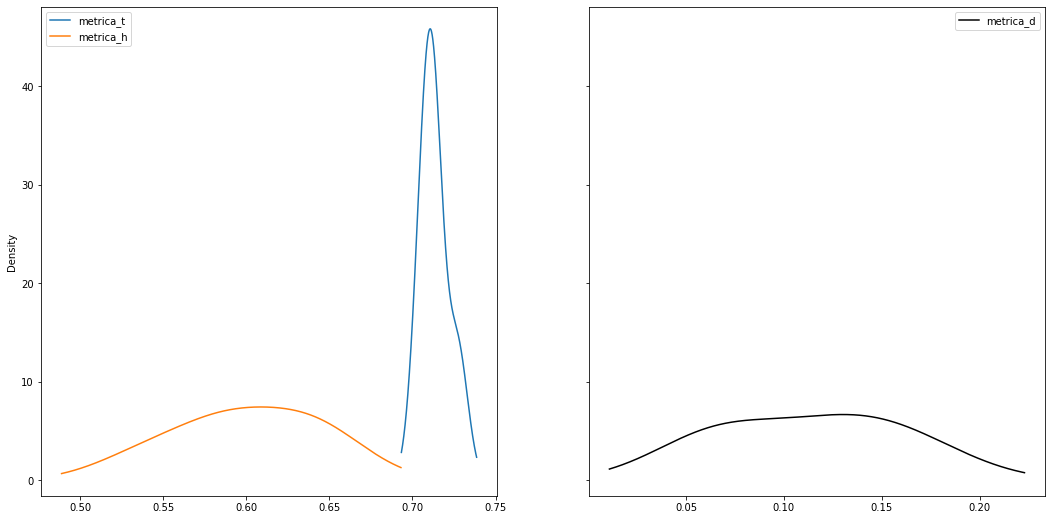

In [585]:
f, ((ax1,ax2)) = plt.subplots(figsize=(18, 9), ncols=2, sharey=True)

pd.DataFrame(skf_dict).T[['metrica_t','metrica_h']].plot(kind='kde', ax=ax1)
pd.DataFrame(skf_dict).T[['metrica_d']].plot(kind='kde', ax=ax2, c='k');

- - -

In [586]:
X = x_[accept].copy()
y = yy.copy()

model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

metrica = fbeta_score( y , y_pred, beta=0.333, average="micro" )

print(classification_report(y, y_pred))

[LightGBM] [Warning] lambda_l1 is set=1.9486675127706043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9486675127706043
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] lambda_l2 is set=0.1118960383923103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1118960383923103
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       285
           1       0.90      0.76      0.82        96
           2       0.75      0.47      0.58       200
           3       0.61      0.85      0.71       4

In [587]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for c in sorted(np.unique(y)):
    mask = np.argwhere(y == c)
    fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
    roc_auc[c] = auc(fpr[c], tpr[c])

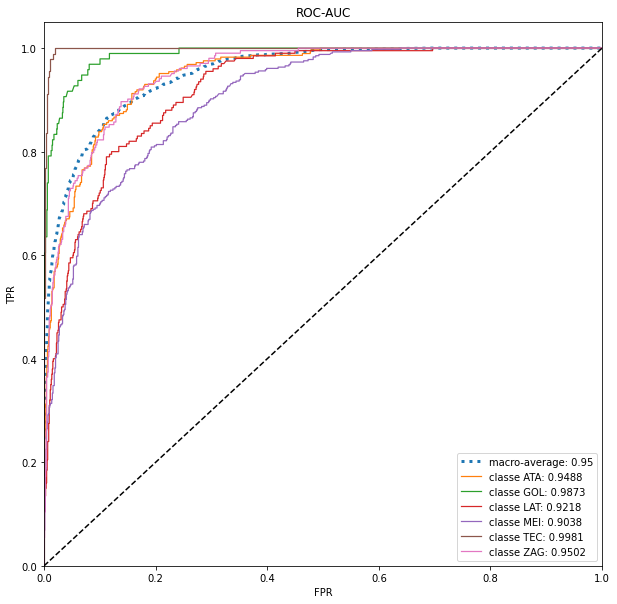

In [588]:
n_classes = len( sorted(np.unique(y)) )

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

f, ((ax1)) = plt.subplots(figsize=(10, 10))
    
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot( fpr["macro"], tpr["macro"],
    label = "macro-average: {0:0.2f}".format(roc_auc["macro"]),
    linestyle = ":", linewidth = 3)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
            label=rf"classe {str(depara[i])}: {round(roc_auc[i], 4)}",
            linewidth = 1.23)

plt.plot([0, 1], [0, 1], "k--",)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC")
plt.legend(loc="lower right")
plt.show()

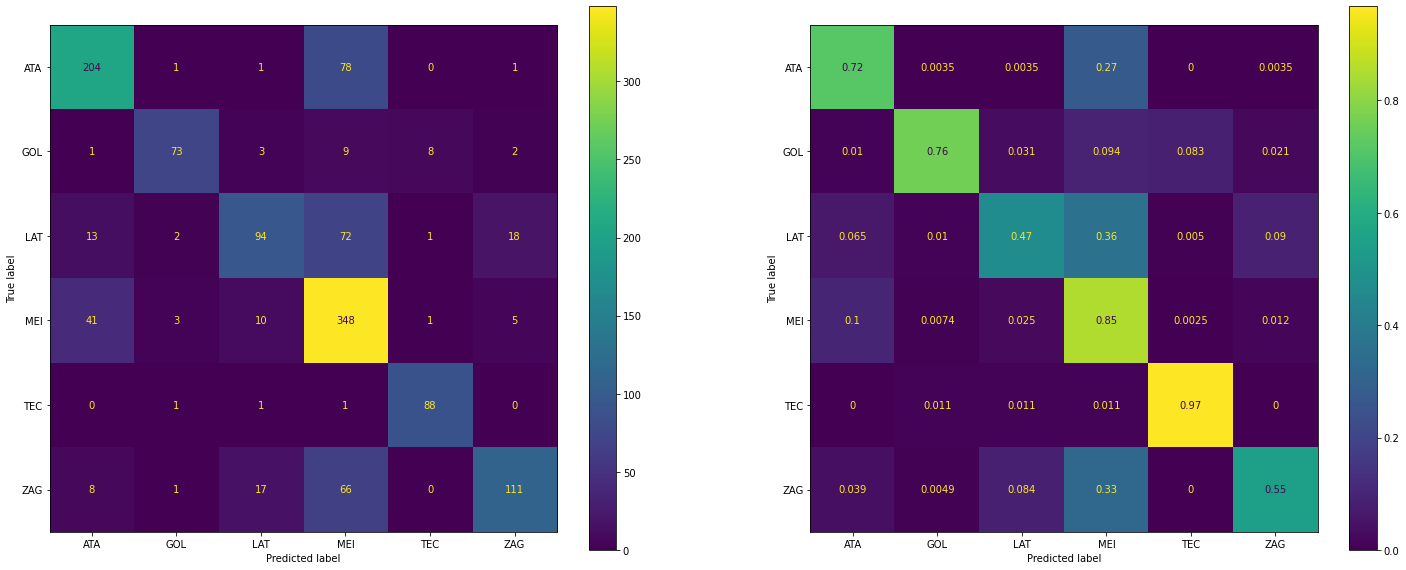

In [589]:
f, ((ax1, ax2)) = plt.subplots(figsize=(25, 10), ncols=2)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[depara[i] for i in range(len(depara))])
disp.plot(ax=ax1)

cm = confusion_matrix(y, y_pred, normalize='true' )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[depara[i] for i in range(len(depara))])
disp.plot(ax=ax2)
plt.show()

#### por fold

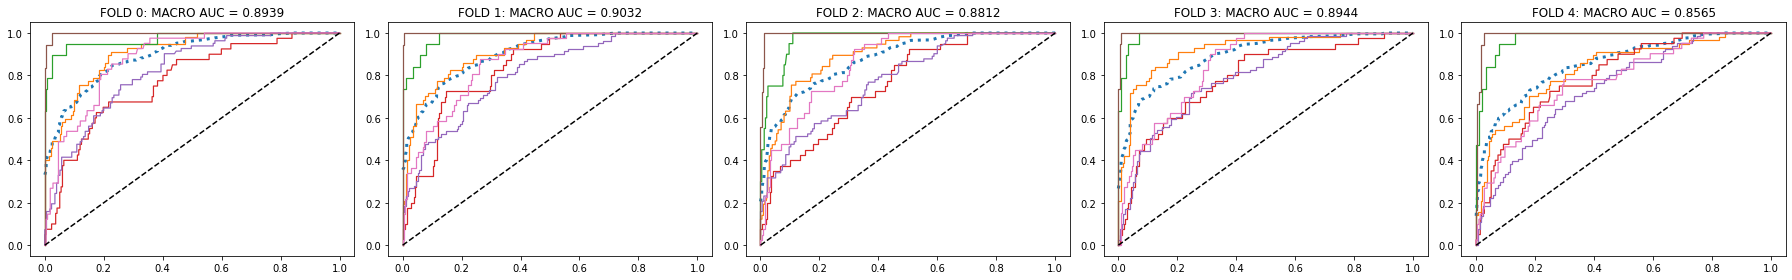

In [590]:
n_classes = len( sorted(np.unique(y)) )

# f, (axs) = plt.subplots(figsize=(25, 25), nrows=n_classes+1, ncols=len(skf_dict))
f, (axs) = plt.subplots(figsize=(25, 4), nrows=1, ncols=len(skf_dict))

for key in sorted(skf_dict):
    y = skf_dict[key]['df']['true'].values
    y_pred = skf_dict[key]['df']['pred'].values
    y_prob = skf_dict[key]['prob']
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for c in sorted(np.unique(y)):
        mask = np.argwhere(y == c)
        fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
        roc_auc[c] = auc(fpr[c], tpr[c])
        
    n_classes = len( sorted(np.unique(y)) )

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    axs[int(key)].plot( fpr["macro"], tpr["macro"],
        label = "macro-average: {0:0.2f}".format(roc_auc["macro"]),
        linestyle = ":", linewidth = 3)

    for i in range(n_classes):
        axs[int(key)].plot(fpr[i], tpr[i],
                label=rf"classe {str(depara[i])}: {round(roc_auc[i], 4)}",
                linewidth = 1.23 )
#         axs[i+1][int(key)].plot(fpr[i], tpr[i], linewidth = 1.23 )

    axs[int(key)].plot([0, 1], [0, 1], "k--")
    axs[int(key)].set_title( rf"FOLD {key}: MACRO AUC = {round(roc_auc['macro'], 4)}" )
    
# for i in range(n_classes):
#     axs[i+1][0].set_ylabel(depara[i])

#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("FPR")
#     plt.ylabel("TPR")
#     plt.title(rf"ROC-AUC: FOLD {key}")
#     plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#### por classe

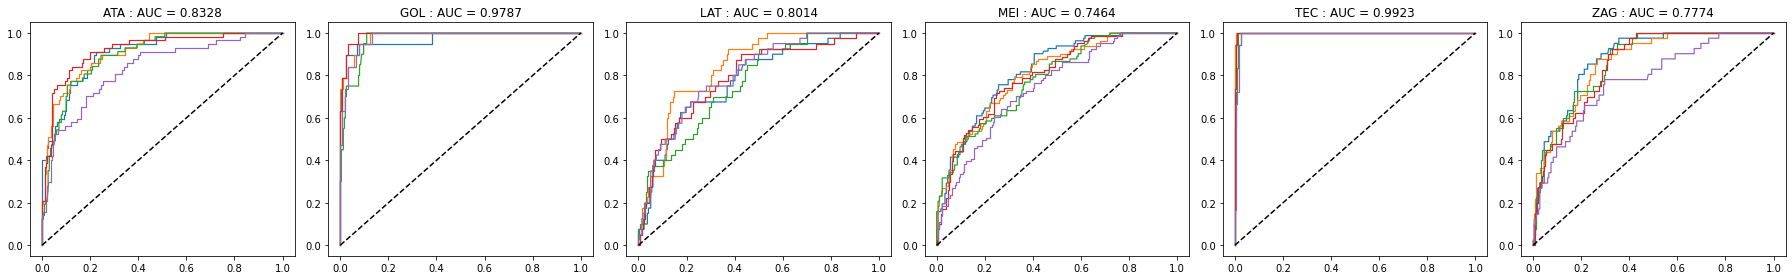

In [591]:
n_classes = len( sorted(np.unique(y)) )

f, (axs) = plt.subplots(figsize=(25, 4), nrows=1, ncols=n_classes)

for key in sorted(skf_dict):
    y = skf_dict[key]['df']['true'].values
    y_pred = skf_dict[key]['df']['pred'].values
    y_prob = skf_dict[key]['prob']
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for c in sorted(np.unique(y)):
        mask = np.argwhere(y == c)
        fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
        roc_auc[c] = auc(fpr[c], tpr[c])
        
    n_classes = len( sorted(np.unique(y)) )

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    for i in range(n_classes):
        axs[i].plot(fpr[i], tpr[i], linewidth = 1.23 )
    
for c in range(n_classes):
    axs[c].plot([0, 1], [0, 1], "k--")
    
    mean_auc = list()
    for key in sorted(skf_dict):
        mask = np.argwhere(y == c)
        fpr, tpr, _ = roc_curve((y == c), y_prob[:,c].ravel())
        mean_auc.append( auc(fpr, tpr) )
    
    axs[c].set_title(rf"{depara[c]} : AUC = {round(np.mean(mean_auc), 4)}")
    

#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("FPR")
#     plt.ylabel("TPR")
#     plt.title(rf"ROC-AUC: FOLD {key}")
#     plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### lightgbm -> `fbeta_score(0.333)`

In [592]:
def otimizador(X_train, X_holdout, y_train, y_holdout, trial):
    
    bagging_freq            = trial.suggest_int('bagging_freq',1,10),
    min_data_in_leaf        = trial.suggest_int('min_data_in_leaf',2,100),
    max_depth               = trial.suggest_int('max_depth',1,20),
    learning_rate           = trial.suggest_loguniform('learning_rate',0.001,0.1),
    num_leaves              = trial.suggest_int('num_leaves',2,70),
    num_threads             = trial.suggest_int('num_threads',1,10),
    min_sum_hessian_in_leaf = trial.suggest_int('min_sum_hessian_in_leaf',1,10)
    lambda_l1               = trial.suggest_loguniform('lambda_l1', 0.1, 2),
    lambda_l2               = trial.suggest_loguniform('lambda_l2', 0.1, 2)

    model = lgb.LGBMClassifier(
                                random_state = 31,
                                verbosity    = -1,
                                bagging_seed = 13,
                                boost_from_average = 'true',
                                boost              = 'gbdt',
                                metric             = 'multi_logloss',
                                bagging_freq            = bagging_freq ,
                                min_data_in_leaf        = min_data_in_leaf,
                                max_depth               = max_depth,
                                learning_rate           = learning_rate,
                                num_leaves              = num_leaves,
                                num_threads             = num_threads,
                                min_sum_hessian_in_leaf = min_sum_hessian_in_leaf,
                                lambda_l1               = lambda_l1,
                                lambda_l2               = lambda_l2
                                )

    model.fit(X_train, y_train)

    y_pred_train   = model.predict(X_train)
    y_pred_holdout = model.predict(X_holdout)

    acc_t = fbeta_score( y_train , y_pred_train, beta=0.333, average="micro" )
    acc_h = fbeta_score( y_holdout , y_pred_holdout, beta=0.333, average="micro" )
    acc_d = acc_t-acc_h

    # return accuracy_score(y_holdout, y_pred_holdout)
    # return 1/delta
    # return fbeta_score(y_holdout, y_pred_holdout, beta=2.0, average="macro")
    return acc_h, acc_d

In [593]:
# lb_study = optuna.create_study(direction='maximize')
lb_study = optuna.create_study(directions=["maximize", "minimize"])

[I 2022-01-09 13:50:38,870] A new study created in memory with name: no-name-940c5a24-0e02-49f7-a5ad-85aa5e75bb4a


In [594]:
skf = StratifiedKFold(n_splits=3, shuffle=True)

for train_index, test_index in skf.split(x_[accept], yy):
    Xt, Xh = x_.iloc[train_index][accept], x_.iloc[test_index][accept]
    yt, yh = yy[train_index], yy[test_index]
    
    lb_study.optimize(functools.partial(otimizador, Xt, Xh, yt, yh), n_trials = 100)

[I 2022-01-09 13:50:43,640] Trial 0 finished with values: [0.5584112149532711, 0.08135486691807392] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 90, 'max_depth': 13, 'learning_rate': 0.016275603482094794, 'num_leaves': 5, 'num_threads': 9, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.31814266311177647, 'lambda_l2': 0.3934677458247003}. 
[I 2022-01-09 13:50:43,724] Trial 1 finished with values: [0.5537383177570093, 0.0977236705470842] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 90, 'max_depth': 19, 'learning_rate': 0.01278254299825627, 'num_leaves': 55, 'num_threads': 8, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.5552231060970165, 'lambda_l2': 0.5603711545136011}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.31814266311177647, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.31814266311177647
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.3934677458247003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3934677458247003
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:50:43,813] Trial 2 finished with values: [0.37383177570093457, 0.01447231786631692] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 94, 'max_depth': 9, 'learning_rate': 0.0034822516833385602, 'num_leaves': 45, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.2416575645359316, 'lambda_l2': 0.2748371565833431}. 
[I 2022-01-09 13:50:43,889] Trial 3 finished with values: [0.3691588785046729, 0.019145215062578602] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 82, 'max_depth': 9, 'learning_rate': 0.0033729859060071246, 'num_leaves': 69, 'num_threads': 9, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.2898587600465725, 'lambda_l2': 0.16401146688012774}. 
[I 2022-01-09 13:50:43,959] Trial 4 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 86, 'max_depth': 19, 'learning_rate': 0.0013388588869331522, 'num_leaves': 7, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.2898587600465725, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2898587600465725
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.16401146688012774, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16401146688012774
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:44,061] Trial 6 finished with values: [0.32242990654205606, -0.003131660928020974] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 78, 'max_depth': 3, 'learning_rate': 0.0018701296262161537, 'num_leaves': 20, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.5244393073906455, 'lambda_l2': 0.1302944795938303}. 
[I 2022-01-09 13:50:44,131] Trial 7 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 58, 'max_depth': 10, 'learning_rate': 0.0015629552004828844, 'num_leaves': 5, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.9106874137732042, 'lambda_l2': 0.5414996901476021}. 
[I 2022-01-09 13:50:44,209] Trial 8 finished with values: [0.5771028037383178, 0.13517789801606817] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 93, 'max_depth': 4, 'learning_rate': 0.024525553173287223, 'num_leaves': 8, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.9106874137732042, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9106874137732042
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.5414996901476021, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5414996901476021
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:44,284] Trial 9 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 75, 'max_depth': 17, 'learning_rate': 0.0012652442340697061, 'num_leaves': 26, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.5773103352293288, 'lambda_l2': 0.1427777397214637}. 
[I 2022-01-09 13:50:44,331] Trial 10 finished with values: [0.3855140186915888, 0.008638028092036953] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 95, 'max_depth': 2, 'learning_rate': 0.0026756264747911473, 'num_leaves': 35, 'num_threads': 6, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.1151671346076196, 'lambda_l2': 0.3945719237269724}. 
[I 2022-01-09 13:50:44,412] Trial 11 finished with values: [0.5490654205607477, 0.09654861452697161] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 79, 'max_depth': 17, 'learning_rate': 0.011146663269424652, 'num_leaves': 11, 'num_threads': 3, 'min_sum_hessian_in_leaf': 10, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1151671346076196, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1151671346076196
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.3945719237269724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3945719237269724
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:44,601] Trial 13 finished with values: [0.6121495327102804, 0.2241077772312401] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 28, 'max_depth': 14, 'learning_rate': 0.04304154313564461, 'num_leaves': 16, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.6587701818065936, 'lambda_l2': 1.0100338601241756}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11097956854048387, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11097956854048387
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.70062265445081, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.70062265445081


[I 2022-01-09 13:50:44,819] Trial 14 finished with values: [0.6004672897196262, 0.35625785647920416] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 9, 'max_depth': 13, 'learning_rate': 0.027581397057139096, 'num_leaves': 56, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.11097956854048387, 'lambda_l2': 1.70062265445081}. 
[I 2022-01-09 13:50:44,974] Trial 15 finished with values: [0.6004672897196262, 0.17263212548505225] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 59, 'max_depth': 19, 'learning_rate': 0.02104601060148117, 'num_leaves': 40, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.18001992887099588, 'lambda_l2': 0.6669016182151805}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18001992887099588, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18001992887099588
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.6669016182151805, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6669016182151805
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:45,093] Trial 16 finished with values: [0.5070093457943925, 0.08480351970268352] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 27, 'max_depth': 20, 'learning_rate': 0.004610927506481033, 'num_leaves': 29, 'num_threads': 4, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.17745042581834142, 'lambda_l2': 0.6749020477968424}. 
[I 2022-01-09 13:50:45,199] Trial 17 finished with values: [0.5957943925233645, 0.1398781220965185] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 39, 'max_depth': 15, 'learning_rate': 0.016232916664015218, 'num_leaves': 10, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.866191317536038, 'lambda_l2': 0.22974014771508997}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.866191317536038, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.866191317536038
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.22974014771508997, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22974014771508997
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:45,341] Trial 18 finished with values: [0.5981308411214953, 0.29426681969721813] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 73, 'max_depth': 20, 'learning_rate': 0.0912641131742793, 'num_leaves': 45, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.29377658247359134, 'lambda_l2': 0.34371850689586003}. 
[I 2022-01-09 13:50:45,455] Trial 19 finished with values: [0.4602803738317757, 0.046152374706235955] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 41, 'max_depth': 7, 'learning_rate': 0.003056843969461502, 'num_leaves': 50, 'num_threads': 5, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.8624984409271056, 'lambda_l2': 0.913913687084682}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8624984409271056, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8624984409271056
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.913913687084682, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.913913687084682
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:50:45,572] Trial 20 finished with values: [0.5794392523364484, 0.15389408099688484] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 35, 'max_depth': 15, 'learning_rate': 0.011143504043659576, 'num_leaves': 31, 'num_threads': 8, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.14335628288507046, 'lambda_l2': 0.44754149884866123}. 
[I 2022-01-09 13:50:45,756] Trial 21 finished with values: [0.5280373831775701, 0.05675793845985677] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 8, 'max_depth': 4, 'learning_rate': 0.004176931688916107, 'num_leaves': 11, 'num_threads': 1, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.8692393596327881, 'lambda_l2': 0.534182418783551}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8692393596327881, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8692393596327881
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.534182418783551, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.534182418783551
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is 

[I 2022-01-09 13:50:45,861] Trial 22 finished with values: [0.3855140186915888, 0.006298846805487257] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 47, 'max_depth': 5, 'learning_rate': 0.002672355526358847, 'num_leaves': 62, 'num_threads': 2, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.3690005517700548, 'lambda_l2': 0.2515877689364548}. 
[I 2022-01-09 13:50:46,031] Trial 23 finished with values: [0.6214953271028038, 0.19487894190304422] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 14, 'max_depth': 18, 'learning_rate': 0.03244692298650049, 'num_leaves': 10, 'num_threads': 1, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.694522227724677, 'lambda_l2': 0.10556548944034107}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.694522227724677, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.694522227724677
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10556548944034107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10556548944034107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:46,146] Trial 24 finished with values: [0.5186915887850467, 0.10236104279390068] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 11, 'max_depth': 6, 'learning_rate': 0.005284580265242998, 'num_leaves': 27, 'num_threads': 8, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.17021367451754035, 'lambda_l2': 0.2622623765469799}. 
[I 2022-01-09 13:50:46,222] Trial 25 finished with values: [0.39953271028037385, 0.028537465158222697] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 73, 'max_depth': 14, 'learning_rate': 0.003453061785199001, 'num_leaves': 42, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.2781092264322017, 'lambda_l2': 0.15721741085606977}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2781092264322017, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2781092264322017
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.15721741085606977, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15721741085606977
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:46,351] Trial 26 finished with values: [0.616822429906542, 0.2697272776957972] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 31, 'max_depth': 18, 'learning_rate': 0.03450703374126506, 'num_leaves': 26, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.4927034550144922, 'lambda_l2': 0.6496642400428331}. 
[I 2022-01-09 13:50:46,392] Trial 27 finished with values: [0.5163551401869159, 0.036861234082089966] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 44, 'max_depth': 1, 'learning_rate': 0.03129009843062995, 'num_leaves': 16, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.5739672938526383, 'lambda_l2': 0.837372433220741}. 
[I 2022-01-09 13:50:46,471] Trial 28 finished with values: [0.5887850467289719, 0.18431436847570648] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 94, 'max_depth': 5, 'learning_rate': 0.04095159339343689, 'num_leaves': 35, 'num_threads': 8, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.5142576

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5739672938526383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5739672938526383
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.837372433220741, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.837372433220741
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:50:46,577] Trial 29 finished with values: [0.6098130841121495, 0.14223369951358145] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 64, 'max_depth': 13, 'learning_rate': 0.02408607515944121, 'num_leaves': 63, 'num_threads': 10, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.7939233437244284, 'lambda_l2': 1.1341578651249444}. 
[I 2022-01-09 13:50:46,747] Trial 30 finished with values: [0.5584112149532711, 0.10240749849702124] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 30, 'max_depth': 14, 'learning_rate': 0.007994925178261694, 'num_leaves': 17, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.194640860672918, 'lambda_l2': 1.0959776338960507}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.194640860672918, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.194640860672918
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0959776338960507, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0959776338960507
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:50:46,843] Trial 31 finished with values: [0.5046728971962616, 0.07661365251134067] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 36, 'max_depth': 4, 'learning_rate': 0.004501106836349434, 'num_leaves': 39, 'num_threads': 4, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.2770931329342872, 'lambda_l2': 0.14147618087734518}. 
[I 2022-01-09 13:50:46,923] Trial 32 finished with values: [0.5116822429906542, 0.07077389736022299] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 67, 'max_depth': 20, 'learning_rate': 0.0065544215221107725, 'num_leaves': 65, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.8366572623079245, 'lambda_l2': 0.49335729010494456}. 
[I 2022-01-09 13:50:47,005] Trial 33 finished with values: [0.6004672897196262, 0.19368475706399968] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 87, 'max_depth': 7, 'learning_rate': 0.044088179213341086, 'num_leaves': 21, 'num_threads': 5, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.8366572623079245, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8366572623079245
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.49335729010494456, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.49335729010494456
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:47,159] Trial 35 finished with values: [0.6144859813084113, 0.31182980816527295] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 47, 'max_depth': 6, 'learning_rate': 0.08601003134010965, 'num_leaves': 12, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.40118117279843063, 'lambda_l2': 0.3033552805269942}. 
[I 2022-01-09 13:50:47,312] Trial 36 finished with values: [0.3691588785046729, 0.01563644313275403] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 5, 'max_depth': 5, 'learning_rate': 0.0015551802795029921, 'num_leaves': 15, 'num_threads': 8, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.10636115411033009, 'lambda_l2': 1.0525295454436672}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.10636115411033009, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10636115411033009
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.0525295454436672, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0525295454436672
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:47,393] Trial 37 finished with values: [0.46261682242990654, 0.04498551675137996] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 89, 'max_depth': 20, 'learning_rate': 0.00577807933443847, 'num_leaves': 16, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.545469624453343, 'lambda_l2': 0.37327282532676653}. 
[I 2022-01-09 13:50:47,469] Trial 38 finished with values: [0.5654205607476636, 0.10826364977865222] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 88, 'max_depth': 14, 'learning_rate': 0.015371239485122992, 'num_leaves': 57, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.4239618417894987, 'lambda_l2': 0.39901948006021964}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.4239618417894987, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4239618417894987
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.39901948006021964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.39901948006021964
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:50:47,605] Trial 39 finished with values: [0.6191588785046729, 0.3211919986883096] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 14, 'max_depth': 16, 'learning_rate': 0.06746092277989772, 'num_leaves': 65, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.3258720577927328, 'lambda_l2': 0.31165448602262014}. 
[I 2022-01-09 13:50:47,731] Trial 40 finished with values: [0.37850467289719625, 0.005121058096955788] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 31, 'max_depth': 19, 'learning_rate': 0.0019131174559117883, 'num_leaves': 70, 'num_threads': 9, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.2747768480049911, 'lambda_l2': 0.20582633785611099}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2747768480049911, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2747768480049911
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.20582633785611099, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20582633785611099
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:47,821] Trial 41 finished with values: [0.34813084112149534, 0.021459802153358465] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 55, 'max_depth': 19, 'learning_rate': 0.0017542705447198036, 'num_leaves': 58, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.801633122159525, 'lambda_l2': 0.6595368705182613}. 
[I 2022-01-09 13:50:47,910] Trial 42 finished with values: [0.352803738317757, 0.01912608624364648] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 52, 'max_depth': 7, 'learning_rate': 0.0019072043588303426, 'num_leaves': 12, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.607704121552928, 'lambda_l2': 0.3121032701456388}. 
[I 2022-01-09 13:50:47,976] Trial 43 finished with values: [0.352803738317757, 0.020295676886921354] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 82, 'max_depth': 11, 'learning_rate': 0.0018969603846701964, 'num_leaves': 6, 'num_threads': 5, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.607704121552928, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.607704121552928
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.3121032701456388, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3121032701456388
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:50:48,053] Trial 44 finished with values: [0.5841121495327103, 0.17027381537957054] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 66, 'max_depth': 4, 'learning_rate': 0.027188148300802083, 'num_leaves': 34, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.14338407453195376, 'lambda_l2': 0.40182158901507803}. 
[I 2022-01-09 13:50:48,101] Trial 45 finished with values: [0.5957943925233645, 0.13052139695031972] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 50, 'max_depth': 2, 'learning_rate': 0.052846264661735406, 'num_leaves': 34, 'num_threads': 9, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.5242613995094543, 'lambda_l2': 0.1490910669848033}. 
[I 2022-01-09 13:50:48,134] Trial 46 finished with values: [0.48364485981308414, 0.02278788872492754] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.012106843122198185, 'num_leaves': 15, 'num_threads': 4, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5242613995094543, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5242613995094543
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.1490910669848033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1490910669848033
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:48,325] Trial 48 finished with values: [0.544392523364486, 0.12227414330218067] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 39, 'max_depth': 9, 'learning_rate': 0.007511447258369212, 'num_leaves': 62, 'num_threads': 2, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.17586634943413557, 'lambda_l2': 1.6143569792068349}. 
[I 2022-01-09 13:50:48,430] Trial 49 finished with values: [0.5911214953271028, 0.14805979122260482] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 5, 'max_depth': 8, 'learning_rate': 0.0183176066575971, 'num_leaves': 20, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.9968128259476394, 'lambda_l2': 1.347518593227546}. 
[I 2022-01-09 13:50:48,501] Trial 50 finished with values: [0.6051401869158879, 0.16562004700224076] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 6, 'max_depth': 3, 'learning_rate': 0.039000009715728694, 'num_leaves': 63, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.485162

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.9968128259476394, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9968128259476394
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.347518593227546, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.347518593227546
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:50:48,549] Trial 51 finished with values: [0.5911214953271028, 0.13519429414658146] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 50, 'max_depth': 2, 'learning_rate': 0.052846264661735406, 'num_leaves': 58, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.801633122159525, 'lambda_l2': 0.1490910669848033}. 
[I 2022-01-09 13:50:48,617] Trial 52 finished with values: [0.37616822429906543, 0.01330545991146087] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 79, 'max_depth': 6, 'learning_rate': 0.003418941723755084, 'num_leaves': 27, 'num_threads': 8, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.34996374324585067, 'lambda_l2': 0.2622623765469799}. 
[I 2022-01-09 13:50:48,715] Trial 53 finished with values: [0.6308411214953271, 0.28260917090233373] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 5, 'max_depth': 20, 'learning_rate': 0.0912641131742793, 'num_leaves': 45, 'num_threads': 9, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.2

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.34996374324585067, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.34996374324585067
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.2622623765469799, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2622623765469799
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

[I 2022-01-09 13:50:48,797] Trial 54 finished with values: [0.5957943925233645, 0.17613543203803894] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 31, 'max_depth': 4, 'learning_rate': 0.028803960488526806, 'num_leaves': 11, 'num_threads': 9, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.34996374324585067, 'lambda_l2': 0.20582633785611099}. 
[I 2022-01-09 13:50:48,828] Trial 55 finished with values: [0.5864485981308412, 0.056826255670328396] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 44, 'max_depth': 1, 'learning_rate': 0.08601003134010965, 'num_leaves': 12, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.5739672938526383, 'lambda_l2': 0.837372433220741}. 
[I 2022-01-09 13:50:48,940] Trial 56 finished with values: [0.6191588785046729, 0.24867737880526875] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 5, 'max_depth': 5, 'learning_rate': 0.052846264661735406, 'num_leaves': 15, 'num_threads': 9, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.52

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5739672938526383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5739672938526383
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.837372433220741, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.837372433220741
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:50:49,034] Trial 57 finished with values: [0.4953271028037383, 0.03566704924304526] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 27, 'max_depth': 4, 'learning_rate': 0.004176931688916107, 'num_leaves': 29, 'num_threads': 4, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.8692393596327881, 'lambda_l2': 0.6749020477968424}. 
[I 2022-01-09 13:50:49,118] Trial 58 finished with values: [0.45560747663551404, 0.06953872219489532] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 74, 'max_depth': 4, 'learning_rate': 0.004501106836349434, 'num_leaves': 63, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.7939233437244284, 'lambda_l2': 1.1341578651249444}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.7939233437244284, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7939233437244284
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.1341578651249444, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1341578651249444
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:49,269] Trial 59 finished with values: [0.5794392523364484, 0.20301688801442874] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 31, 'max_depth': 14, 'learning_rate': 0.015371239485122992, 'num_leaves': 26, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.4927034550144922, 'lambda_l2': 0.39901948006021964}. 
[I 2022-01-09 13:50:49,431] Trial 60 finished with values: [0.6144859813084113, 0.26738536372082855] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 50, 'max_depth': 18, 'learning_rate': 0.052846264661735406, 'num_leaves': 34, 'num_threads': 1, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.694522227724677, 'lambda_l2': 0.10556548944034107}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.694522227724677, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.694522227724677
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10556548944034107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10556548944034107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:49,526] Trial 61 finished with values: [0.5934579439252337, 0.14923211455429852] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 94, 'max_depth': 18, 'learning_rate': 0.03244692298650049, 'num_leaves': 10, 'num_threads': 2, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.694522227724677, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:50:49,605] Trial 62 finished with values: [0.3644859813084112, 0.017970159042466016] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 95, 'max_depth': 4, 'learning_rate': 0.0026756264747911473, 'num_leaves': 35, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.1151671346076196, 'lambda_l2': 0.42993217391885885}. 
[I 2022-01-09 13:50:49,695] Trial 63 finished with values: [0.5233644859813084, 0.06377001694266826] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 60, 'max_depth': 11, 'learning_rate': 0.005676378495403548, 'num_leaves': 50, 'num_threads': 5, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1151671346076196, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1151671346076196
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.42993217391885885, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.42993217391885885
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:50:49,770] Trial 64 finished with values: [0.5327102803738317, 0.05910258512324429] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 27, 'max_depth': 3, 'learning_rate': 0.008188513551982551, 'num_leaves': 20, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.5244393073906455, 'lambda_l2': 0.1302944795938303}. 
[I 2022-01-09 13:50:49,854] Trial 65 finished with values: [0.5841121495327103, 0.11179428321582774] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 73, 'max_depth': 18, 'learning_rate': 0.020717918053207655, 'num_leaves': 42, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.4927034550144922, 'lambda_l2': 0.6496642400428331}. 
[I 2022-01-09 13:50:49,930] Trial 66 finished with values: [0.4953271028037383, 0.05905886210854233] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 86, 'max_depth': 5, 'learning_rate': 0.00688809247188038, 'num_leaves': 15, 'num_threads': 8, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.106

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.4927034550144922, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4927034550144922
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.6496642400428331, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6496642400428331
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:49,988] Trial 67 finished with values: [0.5864485981308412, 0.12466251298026998] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 99, 'max_depth': 2, 'learning_rate': 0.052846264661735406, 'num_leaves': 34, 'num_threads': 10, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.7939233437244284, 'lambda_l2': 0.1490910669848033}. 
[I 2022-01-09 13:50:50,101] Trial 68 finished with values: [0.5046728971962616, 0.07895283379789042] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 11, 'max_depth': 6, 'learning_rate': 0.005284580265242998, 'num_leaves': 20, 'num_threads': 8, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.9968128259476394, 'lambda_l2': 1.347518593227546}. 
[I 2022-01-09 13:50:50,179] Trial 69 finished with values: [0.5841121495327103, 0.16676504344974596] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 93, 'max_depth': 4, 'learning_rate': 0.04304154313564461, 'num_leaves': 16, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.65

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.9968128259476394, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9968128259476394
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.347518593227546, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.347518593227546
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:50,283] Trial 70 finished with values: [0.5654205607476636, 0.102415696562278] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 87, 'max_depth': 3, 'learning_rate': 0.02104601060148117, 'num_leaves': 40, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.18001992887099588, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:50:50,363] Trial 71 finished with values: [0.5654205607476636, 0.10826364977865222] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 88, 'max_depth': 14, 'learning_rate': 0.015371239485122992, 'num_leaves': 57, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.4239618417894987, 'lambda_l2': 0.39901948006021964}. 
[I 2022-01-09 13:50:50,465] Trial 72 finished with values: [0.5490654205607477, 0.10239656774334582] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 79, 'max_depth': 17, 'learning_rate': 0.011146663269424652, 'num_leaves': 26, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.3

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.4239618417894987, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4239618417894987
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.39901948006021964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.39901948006021964
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:50:50,559] Trial 73 finished with values: [0.35514018691588783, 0.014450456358965968] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 55, 'max_depth': 6, 'learning_rate': 0.0017542705447198036, 'num_leaves': 58, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.287501682488304, 'lambda_l2': 0.6595368705182613}. 
[I 2022-01-09 13:50:50,629] Trial 74 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 58, 'max_depth': 10, 'learning_rate': 0.0015629552004828844, 'num_leaves': 5, 'num_threads': 8, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.9106874137732042, 'lambda_l2': 1.0525295454436672}. 
[I 2022-01-09 13:50:50,744] Trial 75 finished with values: [0.5864485981308412, 0.1995163141498606] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 11, 'max_depth': 15, 'learning_rate': 0.016232916664015218, 'num_leaves': 10, 'num_threads': 8, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.9106874137732042, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9106874137732042
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.0525295454436672, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0525295454436672
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:50,882] Trial 76 finished with values: [0.33878504672897203, 0.015600918183308665] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 5, 'max_depth': 8, 'learning_rate': 0.0013388588869331522, 'num_leaves': 20, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.2334832332147161, 'lambda_l2': 0.20864348481669354}. 
[I 2022-01-09 13:50:50,969] Trial 77 finished with values: [0.5186915887850467, 0.08247800185822807] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 67, 'max_depth': 7, 'learning_rate': 0.0065544215221107725, 'num_leaves': 21, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.329170208457726, 'lambda_l2': 0.15125444950158926}. 
[I 2022-01-09 13:50:51,071] Trial 78 finished with values: [0.47663551401869153, 0.022779690659671004] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 61, 'max_depth': 19, 'learning_rate': 0.0033729859060071246, 'num_leaves': 69, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.329170208457726, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.329170208457726
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.15125444950158926, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15125444950158926
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:51,214] Trial 79 finished with values: [0.5607476635514018, 0.0907143247526917] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 31, 'max_depth': 18, 'learning_rate': 0.007511447258369212, 'num_leaves': 62, 'num_threads': 2, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.4927034550144922, 'lambda_l2': 0.6496642400428331}. 
[I 2022-01-09 13:50:51,288] Trial 80 finished with values: [0.45093457943925236, 0.028597584303437618] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 90, 'max_depth': 13, 'learning_rate': 0.005284580265242998, 'num_leaves': 5, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.31814266311177647, 'lambda_l2': 0.3934677458247003}. 
[I 2022-01-09 13:50:51,379] Trial 81 finished with values: [0.5560747663551402, 0.10591353773842704] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 94, 'max_depth': 9, 'learning_rate': 0.016232916664015218, 'num_leaves': 10, 'num_threads': 2, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.31814266311177647, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.31814266311177647
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.3934677458247003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3934677458247003
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:50:51,494] Trial 82 finished with values: [0.5841121495327103, 0.1246597802918511] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 35, 'max_depth': 17, 'learning_rate': 0.011143504043659576, 'num_leaves': 11, 'num_threads': 3, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.14335628288507046, 'lambda_l2': 0.287589819612415}. 
[I 2022-01-09 13:50:51,672] Trial 83 finished with values: [0.5887850467289719, 0.19834945619500466] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 41, 'max_depth': 7, 'learning_rate': 0.02104601060148117, 'num_leaves': 50, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.8624984409271056, 'lambda_l2': 0.913913687084682}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8624984409271056, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8624984409271056
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.913913687084682, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.913913687084682
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:50:51,840] Trial 84 finished with values: [0.5116822429906542, 0.057908400284199524] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 8, 'max_depth': 18, 'learning_rate': 0.004176931688916107, 'num_leaves': 11, 'num_threads': 1, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.694522227724677, 'lambda_l2': 0.534182418783551}. 
[I 2022-01-09 13:50:51,900] Trial 85 finished with values: [0.5116822429906542, 0.04855167513800074] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.03244692298650049, 'num_leaves': 10, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.694522227724677, 'lambda_l2': 0.10556548944034107}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.694522227724677, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.694522227724677
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10556548944034107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10556548944034107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:52,113] Trial 86 finished with values: [0.6144859813084113, 0.263876591791004] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 14, 'max_depth': 18, 'learning_rate': 0.024989835494799294, 'num_leaves': 40, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.6400588881072792, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:50:52,176] Trial 87 finished with values: [0.6004672897196262, 0.1270180903973328] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 47, 'max_depth': 2, 'learning_rate': 0.052846264661735406, 'num_leaves': 12, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.40118117279843063, 'lambda_l2': 0.3033552805269942}. 
[I 2022-01-09 13:50:52,254] Trial 88 finished with values: [0.4392523364485981, 0.014548833142045137] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 95, 'max_depth': 2, 'learning_rate': 0.004501106836349434, 'num_leaves': 35, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.11

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.40118117279843063, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.40118117279843063
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.3033552805269942, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3033552805269942
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:52,396] Trial 89 finished with values: [0.5093457943925234, 0.07311034595835386] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 27, 'max_depth': 14, 'learning_rate': 0.004610927506481033, 'num_leaves': 49, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.17745042581834142, 'lambda_l2': 1.0100338601241756}. 
[I 2022-01-09 13:50:52,565] Trial 90 finished with values: [0.39953271028037385, 0.020350330655298676] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 8, 'max_depth': 5, 'learning_rate': 0.002672355526358847, 'num_leaves': 62, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.3690005517700548, 'lambda_l2': 0.534182418783551}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3690005517700548, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3690005517700548
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.534182418783551, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.534182418783551
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is 

[I 2022-01-09 13:50:52,672] Trial 91 finished with values: [0.3574766355140187, 0.0121140077608351] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 55, 'max_depth': 19, 'learning_rate': 0.0017542705447198036, 'num_leaves': 16, 'num_threads': 4, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.2834912005994861, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:50:52,767] Trial 92 finished with values: [0.5981308411214953, 0.15742471443406025] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 75, 'max_depth': 17, 'learning_rate': 0.024525553173287223, 'num_leaves': 8, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.1080053727518643, 'lambda_l2': 0.42993217391885885}. 
[I 2022-01-09 13:50:52,861] Trial 93 finished with values: [0.5046728971962616, 0.07661365251134067] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 36, 'max_depth': 4, 'learning_rate': 0.004501106836349434, 'num_leaves': 39, 'num_threads': 4, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1080053727518643, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1080053727518643
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.42993217391885885, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.42993217391885885
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:50:52,943] Trial 94 finished with values: [0.602803738317757, 0.19836585232551784] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 87, 'max_depth': 7, 'learning_rate': 0.044088179213341086, 'num_leaves': 20, 'num_threads': 5, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.329170208457726, 'lambda_l2': 0.45928131899864616}. 
[I 2022-01-09 13:50:53,075] Trial 95 finished with values: [0.5887850467289719, 0.14805705853418594] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 59, 'max_depth': 4, 'learning_rate': 0.02104601060148117, 'num_leaves': 8, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.18001992887099588, 'lambda_l2': 0.6669016182151805}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18001992887099588, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18001992887099588
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.6669016182151805, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6669016182151805
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:53,180] Trial 96 finished with values: [0.6238317757009346, 0.25219161611193086] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 50, 'max_depth': 7, 'learning_rate': 0.052846264661735406, 'num_leaves': 34, 'num_threads': 9, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.329170208457726, 'lambda_l2': 0.1490910669848033}. 
[I 2022-01-09 13:50:53,215] Trial 97 finished with values: [0.5467289719626168, 0.05677979996720772] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.052846264661735406, 'num_leaves': 15, 'num_threads': 4, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.48363096388949, 'lambda_l2': 0.1490910669848033}. 
[I 2022-01-09 13:50:53,291] Trial 98 finished with values: [0.5630841121495327, 0.1117696890200578] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 88, 'max_depth': 11, 'learning_rate': 0.015371239485122992, 'num_leaves': 37, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.639884

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.48363096388949, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.48363096388949
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.1490910669848033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1490910669848033
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is 

[I 2022-01-09 13:50:53,457] Trial 100 finished with values: [0.5841121495327103, 0.29308083292343] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 5, 'max_depth': 4, 'learning_rate': 0.0912641131742793, 'num_leaves': 11, 'num_threads': 9, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.8692393596327881, 'lambda_l2': 0.534182418783551}. 
[I 2022-01-09 13:50:53,547] Trial 101 finished with values: [0.4813084112149532, 0.0859430507733509] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 27, 'max_depth': 4, 'learning_rate': 0.004176931688916107, 'num_leaves': 27, 'num_threads': 4, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.14815317502728462, 'lambda_l2': 0.2622623765469799}. 
[I 2022-01-09 13:50:53,636] Trial 102 finished with values: [0.5887850467289719, 0.2603377602885719] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 57, 'max_depth': 5, 'learning_rate': 0.052846264661735406, 'num_leaves': 15, 'num_threads': 8, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.524261

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.14815317502728462, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14815317502728462
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.2622623765469799, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2622623765469799
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:50:53,701] Trial 103 finished with values: [0.5864485981308412, 0.1644285948516151] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 78, 'max_depth': 3, 'learning_rate': 0.039000009715728694, 'num_leaves': 37, 'num_threads': 4, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.4851627470808455, 'lambda_l2': 0.13604639612240166}. 
[I 2022-01-09 13:50:53,808] Trial 104 finished with values: [0.5747663551401869, 0.17143247526916983] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 78, 'max_depth': 3, 'learning_rate': 0.04130309364659522, 'num_leaves': 7, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.5244393073906455, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:50:53,842] Trial 105 finished with values: [0.4953271028037383, 0.00876646444772372] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.012106843122198185, 'num_leaves': 15, 'num_threads': 4, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.32

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5244393073906455, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5244393073906455
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.5250194628790006, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5250194628790006
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:53,929] Trial 106 finished with values: [0.42289719626168226, 0.047278242334808984] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 70, 'max_depth': 19, 'learning_rate': 0.0033729859060071246, 'num_leaves': 12, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3674428777037957, 'lambda_l2': 0.837372433220741}. 
[I 2022-01-09 13:50:53,989] Trial 107 finished with values: [0.5934579439252337, 0.08490462917418151] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.0912641131742793, 'num_leaves': 45, 'num_threads': 1, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.29377658247359134, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:50:54,083] Trial 108 finished with values: [0.5887850467289719, 0.36560091818330875] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 44, 'max_depth': 5, 'learning_rate': 0.08601003134010965, 'num_leaves': 12, 'num_threads': 7, 'min_sum_hessian_in_leaf': 1, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.29377658247359134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.29377658247359134
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10556548944034107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10556548944034107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

[I 2022-01-09 13:50:54,146] Trial 109 finished with values: [0.5677570093457944, 0.11411433568344531] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 90, 'max_depth': 13, 'learning_rate': 0.016275603482094794, 'num_leaves': 5, 'num_threads': 9, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.31814266311177647, 'lambda_l2': 0.23378470202264406}. 
[I 2022-01-09 13:50:54,259] Trial 110 finished with values: [0.5794392523364484, 0.14570694649396088] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 58, 'max_depth': 10, 'learning_rate': 0.024989835494799294, 'num_leaves': 5, 'num_threads': 1, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.9106874137732042, 'lambda_l2': 1.0525295454436672}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.9106874137732042, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9106874137732042
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.0525295454436672, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0525295454436672
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:54,384] Trial 111 finished with values: [0.4813084112149532, 0.08828223205990055] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 28, 'max_depth': 9, 'learning_rate': 0.004293644322221001, 'num_leaves': 16, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.6587701818065936, 'lambda_l2': 0.534182418783551}. 
[I 2022-01-09 13:50:54,419] Trial 112 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 86, 'max_depth': 1, 'learning_rate': 0.0013388588869331522, 'num_leaves': 7, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.1132784578719551, 'lambda_l2': 0.20864348481669354}. 
[I 2022-01-09 13:50:54,491] Trial 113 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 58, 'max_depth': 10, 'learning_rate': 0.0015629552004828844, 'num_leaves': 5, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1132784578719551, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1132784578719551
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.20864348481669354, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20864348481669354
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:54,608] Trial 115 finished with values: [0.5981308411214953, 0.14689839864458654] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 47, 'max_depth': 2, 'learning_rate': 0.04394832001919803, 'num_leaves': 69, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.15881094467572407, 'lambda_l2': 0.3033552805269942}. 
[I 2022-01-09 13:50:54,638] Trial 116 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 78, 'max_depth': 1, 'learning_rate': 0.0018701296262161537, 'num_leaves': 69, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.48057087061722226, 'lambda_l2': 0.1302944795938303}. 
[I 2022-01-09 13:50:54,724] Trial 117 finished with values: [0.3644859813084112, 0.009783024539542051] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 79, 'max_depth': 17, 'learning_rate': 0.0019131174559117883, 'num_leaves': 11, 'num_threads': 9, 'min_sum_hessian_in_leaf': 8, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.48057087061722226, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.48057087061722226
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.1302944795938303, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1302944795938303
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:54,831] Trial 119 finished with values: [0.5327102803738317, 0.07781603541564197] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 27, 'max_depth': 3, 'learning_rate': 0.008188513551982551, 'num_leaves': 61, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.16144136319734073, 'lambda_l2': 1.0525295454436672}. 
[I 2022-01-09 13:50:54,931] Trial 120 finished with values: [0.5817757009345794, 0.27787342187243813] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 58, 'max_depth': 7, 'learning_rate': 0.052846264661735406, 'num_leaves': 9, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.329170208457726, 'lambda_l2': 0.5414996901476021}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.329170208457726, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.329170208457726
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.5414996901476021, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5414996901476021
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:55,035] Trial 121 finished with values: [0.5747663551401869, 0.31529212439197685] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 50, 'max_depth': 7, 'learning_rate': 0.052846264661735406, 'num_leaves': 36, 'num_threads': 9, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.329170208457726, 'lambda_l2': 0.1490910669848033}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3690005517700548, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3690005517700548
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.55365513009306, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.55365513009306


[I 2022-01-09 13:50:55,259] Trial 122 finished with values: [0.5771028037383178, 0.35623052959501555] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 8, 'max_depth': 16, 'learning_rate': 0.039060756301477956, 'num_leaves': 14, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.3690005517700548, 'lambda_l2': 1.55365513009306}. 
[I 2022-01-09 13:50:55,335] Trial 123 finished with values: [0.5677570093457944, 0.13516696726239275] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 6, 'max_depth': 13, 'learning_rate': 0.016275603482094794, 'num_leaves': 5, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.31814266311177647, 'lambda_l2': 0.3934677458247003}. 
[I 2022-01-09 13:50:55,390] Trial 124 finished with values: [0.5887850467289719, 0.18197518718915673] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 14, 'max_depth': 2, 'learning_rate': 0.06746092277989772, 'num_leaves': 35, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.32

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.31814266311177647, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.31814266311177647
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.3934677458247003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3934677458247003
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:55,491] Trial 125 finished with values: [0.572429906542056, 0.12698529813630666] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 87, 'max_depth': 3, 'learning_rate': 0.02104601060148117, 'num_leaves': 5, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.18001992887099588, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:50:55,574] Trial 126 finished with values: [0.5700934579439252, 0.22873695141279993] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 78, 'max_depth': 20, 'learning_rate': 0.039000009715728694, 'num_leaves': 37, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.545469624453343, 'lambda_l2': 0.37327282532676653}. 
[I 2022-01-09 13:50:55,661] Trial 127 finished with values: [0.5794392523364484, 0.29190577690331765] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 81, 'max_depth': 20, 'learning_rate': 0.0912641131742793, 'num_leaves': 12, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.57

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.545469624453343, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.545469624453343
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.37327282532676653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.37327282532676653
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:55,697] Trial 128 finished with values: [0.572429906542056, 0.09072798819478589] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 44, 'max_depth': 1, 'learning_rate': 0.08601003134010965, 'num_leaves': 69, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.5739672938526383, 'lambda_l2': 0.837372433220741}. 
[I 2022-01-09 13:50:55,831] Trial 129 finished with values: [0.5747663551401869, 0.3831283817019183] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 23, 'max_depth': 13, 'learning_rate': 0.08601003134010965, 'num_leaves': 12, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.5739672938526383, 'lambda_l2': 0.3934677458247003}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5739672938526383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5739672938526383
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.3934677458247003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3934677458247003
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:55,931] Trial 130 finished with values: [0.5093457943925234, 0.07661911788817843] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 27, 'max_depth': 4, 'learning_rate': 0.004176931688916107, 'num_leaves': 42, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.4927034550144922, 'lambda_l2': 0.3693765913042842}. 
[I 2022-01-09 13:50:56,007] Trial 131 finished with values: [0.5537383177570093, 0.12579384598568066] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 79, 'max_depth': 17, 'learning_rate': 0.011146663269424652, 'num_leaves': 15, 'num_threads': 4, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.48363096388949, 'lambda_l2': 0.2730569850607008}. 
[I 2022-01-09 13:50:56,043] Trial 132 finished with values: [0.4953271028037383, 0.00876646444772372] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.012106843122198185, 'num_leaves': 70, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.48363096388949, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.48363096388949
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.2730569850607008, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2730569850607008
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:56,189] Trial 134 finished with values: [0.352803738317757, 0.003921407881073369] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 55, 'max_depth': 19, 'learning_rate': 0.0017542705447198036, 'num_leaves': 16, 'num_threads': 4, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.6663793305224368, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:50:56,261] Trial 135 finished with values: [0.5560747663551402, 0.11293108159807619] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 58, 'max_depth': 10, 'learning_rate': 0.013295032484679975, 'num_leaves': 5, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.8692393596327881, 'lambda_l2': 0.6749020477968424}. 
[I 2022-01-09 13:50:56,343] Trial 136 finished with values: [0.39953271028037385, 0.029707055801497573] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 79, 'max_depth': 5, 'learning_rate': 0.003418941723755084, 'num_leaves': 15, 'num_threads': 9, 'min_sum_hessian_in_leaf': 8, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8692393596327881, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8692393596327881
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.6749020477968424, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6749020477968424
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:56,449] Trial 137 finished with values: [0.5911214953271028, 0.19952177952669836] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 31, 'max_depth': 3, 'learning_rate': 0.039000009715728694, 'num_leaves': 63, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.4927034550144922, 'lambda_l2': 0.4308743841147629}. 
[I 2022-01-09 13:50:56,507] Trial 138 finished with values: [0.5794392523364484, 0.15038530906706038] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 99, 'max_depth': 2, 'learning_rate': 0.052846264661735406, 'num_leaves': 34, 'num_threads': 10, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.694522227724677, 'lambda_l2': 0.1490910669848033}. 
[I 2022-01-09 13:50:56,618] Trial 139 finished with values: [0.5747663551401869, 0.31529212439197685] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 50, 'max_depth': 7, 'learning_rate': 0.052846264661735406, 'num_leaves': 34, 'num_threads': 9, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.694522227724677, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.694522227724677
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.1490910669848033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1490910669848033
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:56,709] Trial 140 finished with values: [0.5771028037383178, 0.20886210854238396] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 93, 'max_depth': 14, 'learning_rate': 0.04304154313564461, 'num_leaves': 15, 'num_threads': 3, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.1080053727518643, 'lambda_l2': 1.0525295454436672}. 
[I 2022-01-09 13:50:56,779] Trial 141 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 86, 'max_depth': 19, 'learning_rate': 0.0013388588869331522, 'num_leaves': 5, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.9106874137732042, 'lambda_l2': 1.0525295454436672}. 
[I 2022-01-09 13:50:56,892] Trial 142 finished with values: [0.5747663551401869, 0.19365469749139197] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 73, 'max_depth': 19, 'learning_rate': 0.03450703374126506, 'num_leaves': 26, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.9106874137732042, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9106874137732042
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.0525295454436672, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0525295454436672
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:57,030] Trial 143 finished with values: [0.4392523364485981, 0.06250204951631416] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 31, 'max_depth': 13, 'learning_rate': 0.0026756264747911473, 'num_leaves': 70, 'num_threads': 6, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.2747768480049911, 'lambda_l2': 0.3945719237269724}. 
[I 2022-01-09 13:50:57,111] Trial 144 finished with values: [0.42289719626168226, 0.04376947040498441] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 73, 'max_depth': 20, 'learning_rate': 0.003453061785199001, 'num_leaves': 45, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.8394436690411311, 'lambda_l2': 0.15721741085606977}. 
[I 2022-01-09 13:50:57,202] Trial 145 finished with values: [0.42289719626168226, 0.048447832978083805] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 73, 'max_depth': 14, 'learning_rate': 0.003453061785199001, 'num_leaves': 44, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambd

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8394436690411311, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8394436690411311
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.15721741085606977, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15721741085606977
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:57,319] Trial 146 finished with values: [0.5186915887850467, 0.12458326501612282] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 27, 'max_depth': 11, 'learning_rate': 0.005676378495403548, 'num_leaves': 29, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.8692393596327881, 'lambda_l2': 0.6749020477968424}. 
[I 2022-01-09 13:50:57,452] Trial 147 finished with values: [0.36682242990654207, 0.02616002623380881] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 11, 'max_depth': 5, 'learning_rate': 0.0015551802795029921, 'num_leaves': 15, 'num_threads': 8, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.40118117279843063, 'lambda_l2': 1.0525295454436672}. 
[I 2022-01-09 13:50:57,508] Trial 148 finished with values: [0.5911214953271028, 0.14572060993605507] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 99, 'max_depth': 2, 'learning_rate': 0.052846264661735406, 'num_leaves': 34, 'num_threads': 10, 'min_sum_hessian_in_leaf': 2, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.40118117279843063, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.40118117279843063
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.0525295454436672, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0525295454436672
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:57,677] Trial 149 finished with values: [0.5817757009345794, 0.262668743509865] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 55, 'max_depth': 9, 'learning_rate': 0.03244692298650049, 'num_leaves': 16, 'num_threads': 1, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.2834912005994861, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:50:57,775] Trial 150 finished with values: [0.5934579439252337, 0.21355959993441553] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 16, 'max_depth': 3, 'learning_rate': 0.039000009715728694, 'num_leaves': 63, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.4851627470808455, 'lambda_l2': 0.4308743841147629}. 
[I 2022-01-09 13:50:57,812] Trial 151 finished with values: [0.5794392523364484, 0.0825490517571188] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 44, 'max_depth': 1, 'learning_rate': 0.08601003134010965, 'num_leaves': 69, 'num_threads': 6, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.573

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.4851627470808455, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4851627470808455
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.4308743841147629, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4308743841147629
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:57,985] Trial 153 finished with values: [0.4602803738317757, 0.04966114663606053] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 68, 'max_depth': 13, 'learning_rate': 0.0036299327619196972, 'num_leaves': 26, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.5739672938526383, 'lambda_l2': 0.13790029282226152}. 
[I 2022-01-09 13:50:58,063] Trial 154 finished with values: [0.3878504672897196, 0.005131988850631264] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 99, 'max_depth': 2, 'learning_rate': 0.002210998164409363, 'num_leaves': 45, 'num_threads': 1, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.29377658247359134, 'lambda_l2': 0.10556548944034107}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5739672938526383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5739672938526383
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.13790029282226152, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13790029282226152
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:58,164] Trial 155 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 86, 'max_depth': 19, 'learning_rate': 0.0013388588869331522, 'num_leaves': 5, 'num_threads': 1, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.1132784578719551, 'lambda_l2': 0.20864348481669354}. 
[I 2022-01-09 13:50:58,260] Trial 156 finished with values: [0.5934579439252337, 0.3153139858993278] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 58, 'max_depth': 20, 'learning_rate': 0.0912641131742793, 'num_leaves': 45, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.29377658247359134, 'lambda_l2': 0.2315971448902674}. 
[I 2022-01-09 13:50:58,347] Trial 157 finished with values: [0.4672897196261682, 0.05317811663114175] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 61, 'max_depth': 19, 'learning_rate': 0.0033729859060071246, 'num_leaves': 69, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.29377658247359134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.29377658247359134
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.2315971448902674, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2315971448902674
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

[I 2022-01-09 13:50:58,420] Trial 158 finished with values: [0.5677570093457944, 0.11762310761326988] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 90, 'max_depth': 13, 'learning_rate': 0.016275603482094794, 'num_leaves': 69, 'num_threads': 9, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.31814266311177647, 'lambda_l2': 0.3934677458247003}. 
[I 2022-01-09 13:50:58,477] Trial 159 finished with values: [0.3878504672897196, 0.00630157949390614] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 63, 'max_depth': 1, 'learning_rate': 0.004501106836349434, 'num_leaves': 35, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.694522227724677, 'lambda_l2': 0.3945719237269724}. 
[I 2022-01-09 13:50:58,533] Trial 160 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 93, 'max_depth': 5, 'learning_rate': 0.0015551802795029921, 'num_leaves': 15, 'num_threads': 3, 'min_sum_hessian_in_leaf': 1, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.694522227724677, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.694522227724677
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=63, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=63
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.3945719237269724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3945719237269724
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:50:58,669] Trial 162 finished with values: [0.3691588785046729, 0.006279717986555244] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 55, 'max_depth': 2, 'learning_rate': 0.0017542705447198036, 'num_leaves': 16, 'num_threads': 10, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.6663793305224368, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:50:58,722] Trial 163 finished with values: [0.602803738317757, 0.2159097119746406] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 5, 'max_depth': 2, 'learning_rate': 0.0912641131742793, 'num_leaves': 45, 'num_threads': 9, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.1151671346076196, 'lambda_l2': 0.34371850689586003}. 
[I 2022-01-09 13:50:58,804] Trial 164 finished with values: [0.572429906542056, 0.1550554735749029] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 73, 'max_depth': 18, 'learning_rate': 0.020717918053207655, 'num_leaves': 31, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.49

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1151671346076196, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1151671346076196
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.34371850689586003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.34371850689586003
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:58,958] Trial 166 finished with values: [0.3644859813084112, 0.029666065475214554] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 39, 'max_depth': 17, 'learning_rate': 0.0019131174559117883, 'num_leaves': 11, 'num_threads': 9, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.4368370384594166, 'lambda_l2': 0.13790029282226152}. 
[I 2022-01-09 13:50:59,041] Trial 167 finished with values: [0.34579439252336447, 0.0015740285292671352] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 60, 'max_depth': 11, 'learning_rate': 0.0012652442340697061, 'num_leaves': 26, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.5773103352293288, 'lambda_l2': 0.8003714815584847}. 
[I 2022-01-09 13:50:59,109] Trial 168 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 86, 'max_depth': 19, 'learning_rate': 0.0013388588869331522, 'num_leaves': 5, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'la

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5773103352293288, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5773103352293288
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.8003714815584847, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8003714815584847
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:59,253] Trial 169 finished with values: [0.5654205607476636, 0.39949171995409083] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 14, 'max_depth': 16, 'learning_rate': 0.06514936745096529, 'num_leaves': 65, 'num_threads': 7, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.15881094467572407, 'lambda_l2': 0.3033552805269942}. 
[I 2022-01-09 13:50:59,325] Trial 170 finished with values: [0.5817757009345794, 0.2614991528665903] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 16, 'max_depth': 3, 'learning_rate': 0.0912641131742793, 'num_leaves': 45, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.4851627470808455, 'lambda_l2': 0.4308743841147629}. 
[I 2022-01-09 13:50:59,415] Trial 171 finished with values: [0.4672897196261682, 0.052008525987866816] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 61, 'max_depth': 7, 'learning_rate': 0.0033729859060071246, 'num_leaves': 20, 'num_threads': 5, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.4851627470808455, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4851627470808455
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.4308743841147629, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4308743841147629
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:50:59,517] Trial 172 finished with values: [0.5794392523364484, 0.3351806307044872] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 5, 'max_depth': 6, 'learning_rate': 0.0912641131742793, 'num_leaves': 45, 'num_threads': 9, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.29377658247359134, 'lambda_l2': 0.34371850689586003}. 
[I 2022-01-09 13:50:59,628] Trial 173 finished with values: [0.5794392523364484, 0.304771273979341] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 47, 'max_depth': 16, 'learning_rate': 0.052846264661735406, 'num_leaves': 21, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.3258720577927328, 'lambda_l2': 0.3033552805269942}. 
[I 2022-01-09 13:50:59,670] Trial 174 finished with values: [0.4953271028037383, 0.00876646444772372] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.012106843122198185, 'num_leaves': 15, 'num_threads': 4, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.57

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.3258720577927328, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3258720577927328
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.3033552805269942, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3033552805269942
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:50:59,746] Trial 176 finished with values: [0.5607476635514018, 0.07434005574684377] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 78, 'max_depth': 1, 'learning_rate': 0.060506652428170125, 'num_leaves': 69, 'num_threads': 5, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.5739672938526383, 'lambda_l2': 0.1302944795938303}. 
[I 2022-01-09 13:50:59,823] Trial 177 finished with values: [0.3644859813084112, 0.009783024539542051] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 87, 'max_depth': 7, 'learning_rate': 0.0019131174559117883, 'num_leaves': 70, 'num_threads': 5, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.7076512795155623, 'lambda_l2': 0.45928131899864616}. 
[I 2022-01-09 13:50:59,929] Trial 178 finished with values: [0.49065420560747663, 0.04501830901240644] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 44, 'max_depth': 19, 'learning_rate': 0.0033729859060071246, 'num_leaves': 16, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.7076512795155623, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7076512795155623
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.45928131899864616, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45928131899864616
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:50:59,966] Trial 179 finished with values: [0.5537383177570093, 0.07433185768158712] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 73, 'max_depth': 1, 'learning_rate': 0.052846264661735406, 'num_leaves': 15, 'num_threads': 9, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.48363096388949, 'lambda_l2': 0.6496642400428331}. 
[I 2022-01-09 13:51:00,085] Trial 180 finished with values: [0.3691588785046729, 0.03084112149532714] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 16, 'max_depth': 17, 'learning_rate': 0.0019131174559117883, 'num_leaves': 15, 'num_threads': 4, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.48363096388949, 'lambda_l2': 0.2730569850607008}. 
[I 2022-01-09 13:51:00,120] Trial 181 finished with values: [0.5186915887850467, 0.05206864513308196] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 87, 'max_depth': 1, 'learning_rate': 0.03244692298650049, 'num_leaves': 47, 'num_threads': 5, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.694

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.48363096388949, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.48363096388949
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.2730569850607008, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2730569850607008
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is 

[I 2022-01-09 13:51:00,196] Trial 182 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 75, 'max_depth': 13, 'learning_rate': 0.0012652442340697061, 'num_leaves': 26, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.31814266311177647, 'lambda_l2': 0.3934677458247003}. 
[I 2022-01-09 13:51:00,272] Trial 183 finished with values: [0.6004672897196262, 0.190175985134175] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 45, 'max_depth': 3, 'learning_rate': 0.039000009715728694, 'num_leaves': 63, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.4851627470808455, 'lambda_l2': 0.4308743841147629}. 
[I 2022-01-09 13:51:00,327] Trial 184 finished with values: [0.5981308411214953, 0.1492375799311363] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 33, 'max_depth': 2, 'learning_rate': 0.04394832001919803, 'num_leaves': 15, 'num_threads': 8, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.4851627470808455, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4851627470808455
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.4308743841147629, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4308743841147629
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:51:00,440] Trial 186 finished with values: [0.3808411214953271, 0.008632562715199188] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 47, 'max_depth': 10, 'learning_rate': 0.0015629552004828844, 'num_leaves': 5, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.9106874137732042, 'lambda_l2': 0.3033552805269942}. 
[I 2022-01-09 13:51:00,510] Trial 187 finished with values: [0.5864485981308412, 0.13401923812646865] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 78, 'max_depth': 3, 'learning_rate': 0.02408607515944121, 'num_leaves': 20, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.5244393073906455, 'lambda_l2': 0.1302944795938303}. 
[I 2022-01-09 13:51:00,550] Trial 188 finished with values: [0.45560747663551404, 0.005211236814778364] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 60, 'max_depth': 1, 'learning_rate': 0.005676378495403548, 'num_leaves': 8, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5244393073906455, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5244393073906455
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.1302944795938303, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1302944795938303
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:51:00,707] Trial 190 finished with values: [0.5841121495327103, 0.2275837569000383] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 31, 'max_depth': 3, 'learning_rate': 0.039000009715728694, 'num_leaves': 62, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.4851627470808455, 'lambda_l2': 0.4308743841147629}. 
[I 2022-01-09 13:51:00,742] Trial 191 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 87, 'max_depth': 1, 'learning_rate': 0.0013388588869331522, 'num_leaves': 7, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.6400588881072792, 'lambda_l2': 0.20864348481669354}. 
[I 2022-01-09 13:51:00,776] Trial 192 finished with values: [0.514018691588785, 0.03218013882057169] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 87, 'max_depth': 1, 'learning_rate': 0.024989835494799294, 'num_leaves': 40, 'num_threads': 4, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.6400588881072792, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6400588881072792
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.20864348481669354, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20864348481669354
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:51:00,935] Trial 194 finished with values: [0.5864485981308412, 0.2626742088867027] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 44, 'max_depth': 3, 'learning_rate': 0.08601003134010965, 'num_leaves': 12, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.5739672938526383, 'lambda_l2': 1.5191580523562964}. 
[I 2022-01-09 13:51:01,027] Trial 195 finished with values: [0.5911214953271028, 0.12466797835710763] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 14, 'max_depth': 2, 'learning_rate': 0.03244692298650049, 'num_leaves': 34, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.694522227724677, 'lambda_l2': 0.10556548944034107}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.694522227724677, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.694522227724677
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10556548944034107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10556548944034107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:51:01,140] Trial 196 finished with values: [0.602803738317757, 0.132868776302126] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 55, 'max_depth': 14, 'learning_rate': 0.01936785165132353, 'num_leaves': 16, 'num_threads': 4, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.5739672938526383, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:51:01,238] Trial 197 finished with values: [0.5747663551401869, 0.22289446357326337] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 73, 'max_depth': 18, 'learning_rate': 0.03244692298650049, 'num_leaves': 42, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.22120695187434944, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:51:01,324] Trial 198 finished with values: [0.5794392523364484, 0.1866426190085808] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 78, 'max_depth': 20, 'learning_rate': 0.03244692298650049, 'num_leaves': 27, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.69

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.22120695187434944, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22120695187434944
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10556548944034107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10556548944034107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:51:01,375] Trial 199 finished with values: [0.5887850467289719, 0.1363611521014374] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 77, 'max_depth': 2, 'learning_rate': 0.04394832001919803, 'num_leaves': 69, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.4368370384594166, 'lambda_l2': 0.287589819612415}. 
[I 2022-01-09 13:51:01,480] Trial 200 finished with values: [0.5035128805620609, 0.016346932522051216] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 60, 'max_depth': 2, 'learning_rate': 0.005676378495403548, 'num_leaves': 8, 'num_threads': 1, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.5244393073906455, 'lambda_l2': 0.10556548944034107}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5244393073906455, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5244393073906455
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10556548944034107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10556548944034107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:51:01,612] Trial 201 finished with values: [0.6042154566744731, 0.2369060386526297] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 5, 'max_depth': 20, 'learning_rate': 0.024989835494799294, 'num_leaves': 69, 'num_threads': 9, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.29377658247359134, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:51:01,712] Trial 202 finished with values: [0.594847775175644, 0.243937271553328] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 50, 'max_depth': 7, 'learning_rate': 0.031156298403697973, 'num_leaves': 34, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.329170208457726, 'lambda_l2': 0.1490910669848033}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.329170208457726, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.329170208457726
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.1490910669848033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1490910669848033
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:51:01,816] Trial 203 finished with values: [0.585480093676815, 0.32923953249140936] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 50, 'max_depth': 7, 'learning_rate': 0.052846264661735406, 'num_leaves': 34, 'num_threads': 9, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.329170208457726, 'lambda_l2': 0.1490910669848033}. 
[I 2022-01-09 13:51:01,849] Trial 204 finished with values: [0.569086651053864, 0.06525914333865934] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 50, 'max_depth': 1, 'learning_rate': 0.052846264661735406, 'num_leaves': 34, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.329170208457726, 'lambda_l2': 0.1490910669848033}. 
[I 2022-01-09 13:51:01,895] Trial 205 finished with values: [0.3583138173302108, 0.005003939679135039] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 78, 'max_depth': 2, 'learning_rate': 0.0018701296262161537, 'num_leaves': 45, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.52

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.329170208457726, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.329170208457726
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.1490910669848033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1490910669848033
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:51:02,021] Trial 207 finished with values: [0.5714285714285714, 0.048898531375166976] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.052846264661735406, 'num_leaves': 15, 'num_threads': 5, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.694522227724677, 'lambda_l2': 0.1490910669848033}. 
[I 2022-01-09 13:51:02,054] Trial 208 finished with values: [0.5269320843091335, 0.0034417474665675574] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.024989835494799294, 'num_leaves': 40, 'num_threads': 4, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.10064958414943005, 'lambda_l2': 0.2730569850607008}. 
[I 2022-01-09 13:51:02,197] Trial 209 finished with values: [0.6042154566744731, 0.26260697323206894] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 6, 'max_depth': 19, 'learning_rate': 0.039000009715728694, 'num_leaves': 70, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.10064958414943005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10064958414943005
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.2730569850607008, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2730569850607008
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:51:02,249] Trial 210 finished with values: [0.5971896955503513, 0.10724955678609727] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 87, 'max_depth': 2, 'learning_rate': 0.04394832001919803, 'num_leaves': 36, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.6400588881072792, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:51:02,285] Trial 211 finished with values: [0.5245901639344263, 0.006951892140340088] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 60, 'max_depth': 1, 'learning_rate': 0.024989835494799294, 'num_leaves': 69, 'num_threads': 8, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.48363096388949, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:51:02,370] Trial 212 finished with values: [0.6088992974238876, 0.1492782726695705] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 99, 'max_depth': 16, 'learning_rate': 0.039060756301477956, 'num_leaves': 34, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.48363096388949, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.48363096388949
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.5250194628790006, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5250194628790006
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is 

[I 2022-01-09 13:51:02,635] Trial 214 finished with values: [0.5925058548009368, 0.2661390050121474] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 14, 'max_depth': 18, 'learning_rate': 0.03244692298650049, 'num_leaves': 10, 'num_threads': 1, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.5773103352293288, 'lambda_l2': 0.10556548944034107}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5773103352293288, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5773103352293288
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.10556548944034107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10556548944034107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:51:02,672] Trial 215 finished with values: [0.5714285714285714, 0.0535714285714286] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 50, 'max_depth': 1, 'learning_rate': 0.052846264661735406, 'num_leaves': 34, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.694522227724677, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:51:02,711] Trial 216 finished with values: [0.6018735362997658, 0.06518253846658928] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 47, 'max_depth': 1, 'learning_rate': 0.08601003134010965, 'num_leaves': 12, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.15881094467572407, 'lambda_l2': 0.3033552805269942}. 
[I 2022-01-09 13:51:02,748] Trial 217 finished with values: [0.5480093676814989, 0.01040184727177218] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.03129009843062995, 'num_leaves': 15, 'num_threads': 4, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.16

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.15881094467572407, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15881094467572407
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.3033552805269942, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3033552805269942
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:51:02,882] Trial 219 finished with values: [0.351288056206089, 0.021375495195780192] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 73, 'max_depth': 18, 'learning_rate': 0.0017542705447198036, 'num_leaves': 16, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.6663793305224368, 'lambda_l2': 0.6496642400428331}. 
[I 2022-01-09 13:51:02,971] Trial 220 finished with values: [0.5901639344262294, 0.10492952351769591] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 14, 'max_depth': 2, 'learning_rate': 0.03244692298650049, 'num_leaves': 34, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.694522227724677, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:51:03,061] Trial 221 finished with values: [0.5901639344262294, 0.15282671977937812] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 60, 'max_depth': 18, 'learning_rate': 0.020717918053207655, 'num_leaves': 69, 'num_threads': 8, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.694522227724677, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.694522227724677
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10556548944034107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10556548944034107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:51:03,101] Trial 222 finished with values: [0.4707259953161593, -0.018623191577841536] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 44, 'max_depth': 1, 'learning_rate': 0.0077415431736700315, 'num_leaves': 16, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.5739672938526383, 'lambda_l2': 1.1341578651249444}. 
[I 2022-01-09 13:51:03,141] Trial 223 finished with values: [0.5175644028103045, -0.021069075707500717] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.012106843122198185, 'num_leaves': 15, 'num_threads': 4, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.5773103352293288, 'lambda_l2': 0.2730569850607008}. 
[I 2022-01-09 13:51:03,216] Trial 224 finished with values: [0.5644028103044496, 0.12134485324695221] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 27, 'max_depth': 3, 'learning_rate': 0.012106843122198185, 'num_leaves': 9, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5773103352293288, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5773103352293288
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.2730569850607008, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2730569850607008
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:51:03,309] Trial 225 finished with values: [0.351288056206089, 0.027216616691107254] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 55, 'max_depth': 8, 'learning_rate': 0.0017542705447198036, 'num_leaves': 16, 'num_threads': 6, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.29377658247359134, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:51:03,391] Trial 226 finished with values: [0.5737704918032787, 0.03721081660793635] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 99, 'max_depth': 2, 'learning_rate': 0.014181152595879175, 'num_leaves': 45, 'num_threads': 1, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.29377658247359134, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:51:03,481] Trial 227 finished with values: [0.594847775175644, 0.2100587668804308] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.039060756301477956, 'num_leaves': 14, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.29377658247359134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.29377658247359134
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10556548944034107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10556548944034107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

[I 2022-01-09 13:51:03,516] Trial 228 finished with values: [0.5269320843091335, -0.003567598327825161] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 87, 'max_depth': 1, 'learning_rate': 0.024989835494799294, 'num_leaves': 12, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.29377658247359134, 'lambda_l2': 0.3033552805269942}. 
[I 2022-01-09 13:51:03,646] Trial 229 finished with values: [0.405152224824356, 0.018913195736391664] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 24, 'max_depth': 5, 'learning_rate': 0.002672355526358847, 'num_leaves': 62, 'num_threads': 2, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.3690005517700548, 'lambda_l2': 0.3934677458247003}. 
[I 2022-01-09 13:51:03,683] Trial 230 finished with values: [0.3723653395784543, 0.009644006215938195] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 27, 'max_depth': 1, 'learning_rate': 0.004501106836349434, 'num_leaves': 20, 'num_threads': 8, 'min_sum_hessian_in_leaf': 1, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3690005517700548, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3690005517700548
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.3934677458247003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3934677458247003
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:51:03,737] Trial 231 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.002210998164409363, 'num_leaves': 45, 'num_threads': 1, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.29377658247359134, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:51:03,775] Trial 232 finished with values: [0.5292740046838408, 0.0010998270918602948] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.024989835494799294, 'num_leaves': 70, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.11667674752955932, 'lambda_l2': 0.2730569850607008}. 
[I 2022-01-09 13:51:03,886] Trial 233 finished with values: [0.5925058548009368, 0.2299240517411193] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 44, 'max_depth': 14, 'learning_rate': 0.04304154313564461, 'num_leaves': 16, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11667674752955932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11667674752955932
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.2730569850607008, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2730569850607008
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:51:04,022] Trial 234 finished with values: [0.6112412177985947, 0.2462354177154238] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 16, 'max_depth': 13, 'learning_rate': 0.033564760349069356, 'num_leaves': 26, 'num_threads': 9, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.48363096388949, 'lambda_l2': 0.3934677458247003}. 
[I 2022-01-09 13:51:04,109] Trial 235 finished with values: [0.6088992974238876, 0.18666145023966385] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.039060756301477956, 'num_leaves': 34, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.7939233437244284, 'lambda_l2': 1.55365513009306}. 
[I 2022-01-09 13:51:04,144] Trial 236 finished with values: [0.5292740046838408, -0.005909518702532424] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 87, 'max_depth': 1, 'learning_rate': 0.024989835494799294, 'num_leaves': 40, 'num_threads': 4, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.7939233437244284, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7939233437244284
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=1.55365513009306, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.55365513009306
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:51:04,233] Trial 237 finished with values: [0.5901639344262294, 0.10843419641489216] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 14, 'max_depth': 2, 'learning_rate': 0.03244692298650049, 'num_leaves': 5, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.9106874137732042, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:51:04,274] Trial 238 finished with values: [0.5292740046838408, -0.0047412944034669335] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 87, 'max_depth': 1, 'learning_rate': 0.024989835494799294, 'num_leaves': 15, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.6400588881072792, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:51:04,350] Trial 239 finished with values: [0.5901639344262294, 0.18553700015320984] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 6, 'max_depth': 3, 'learning_rate': 0.039000009715728694, 'num_leaves': 15, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.6400588881072792, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6400588881072792
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.5250194628790006, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5250194628790006
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:51:04,464] Trial 241 finished with values: [0.44028103044496486, 0.00831710039615663] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 60, 'max_depth': 1, 'learning_rate': 0.005676378495403548, 'num_leaves': 8, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.5244393073906455, 'lambda_l2': 0.11014626688292867}. 
[I 2022-01-09 13:51:04,519] Trial 242 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 87, 'max_depth': 1, 'learning_rate': 0.0013388588869331522, 'num_leaves': 43, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.6400588881072792, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:51:04,561] Trial 243 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 55, 'max_depth': 1, 'learning_rate': 0.0017542705447198036, 'num_leaves': 3, 'num_threads': 3, 'min_sum_hessian_in_leaf': 5, 'lambd

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.6400588881072792, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6400588881072792
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10556548944034107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10556548944034107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:51:04,729] Trial 246 finished with values: [0.5878220140515222, 0.13414060277090767] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 78, 'max_depth': 3, 'learning_rate': 0.03129009843062995, 'num_leaves': 16, 'num_threads': 3, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.5244393073906455, 'lambda_l2': 0.7739931476595762}. 
[I 2022-01-09 13:51:04,846] Trial 247 finished with values: [0.5995316159250585, 0.33154315043008165] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 16, 'max_depth': 20, 'learning_rate': 0.0912641131742793, 'num_leaves': 10, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.694522227724677, 'lambda_l2': 0.34371850689586003}. 
[I 2022-01-09 13:51:04,883] Trial 248 finished with values: [0.5925058548009368, 0.06754087417102583] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 44, 'max_depth': 1, 'learning_rate': 0.08601003134010965, 'num_leaves': 69, 'num_threads': 8, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.573

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.694522227724677, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.694522227724677
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.34371850689586003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.34371850689586003
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:51:05,186] Trial 249 finished with values: [0.5526932084309133, 0.142400249513012] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 14, 'max_depth': 16, 'learning_rate': 0.004501106836349434, 'num_leaves': 35, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.27410517872865653, 'lambda_l2': 0.3945719237269724}. 
[I 2022-01-09 13:51:05,344] Trial 250 finished with values: [0.6135831381733021, 0.20534209547155768] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 16, 'max_depth': 3, 'learning_rate': 0.039000009715728694, 'num_leaves': 40, 'num_threads': 1, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.4851627470808455, 'lambda_l2': 0.4308743841147629}. 
[I 2022-01-09 13:51:05,410] Trial 251 finished with values: [0.5573770491803278, 0.04192201624023295] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 16, 'max_depth': 2, 'learning_rate': 0.012106843122198185, 'num_leaves': 15, 'num_threads': 4, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.4851627470808455, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4851627470808455
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.4308743841147629, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4308743841147629
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:51:05,455] Trial 252 finished with values: [0.5971896955503513, 0.06636170631880756] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.08601003134010965, 'num_leaves': 12, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.5773103352293288, 'lambda_l2': 0.3033552805269942}. 
[I 2022-01-09 13:51:05,495] Trial 253 finished with values: [0.5245901639344263, 0.00578366784127482] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 47, 'max_depth': 1, 'learning_rate': 0.024989835494799294, 'num_leaves': 12, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.10064958414943005, 'lambda_l2': 0.3033552805269942}. 


boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5773103352293288, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5773103352293288
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.3033552805269942, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3033552805269942
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.10064958414

[I 2022-01-09 13:51:05,622] Trial 254 finished with values: [0.6088992974238876, 0.17381098294994413] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 8, 'max_depth': 20, 'learning_rate': 0.024989835494799294, 'num_leaves': 15, 'num_threads': 9, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.29377658247359134, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:51:05,698] Trial 255 finished with values: [0.585480093676815, 0.18321149510823176] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 78, 'max_depth': 3, 'learning_rate': 0.052846264661735406, 'num_leaves': 34, 'num_threads': 5, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.5244393073906455, 'lambda_l2': 0.1302944795938303}. 
[I 2022-01-09 13:51:05,793] Trial 256 finished with values: [0.5971896955503513, 0.1469691829543216] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 64, 'max_depth': 13, 'learning_rate': 0.020717918053207655, 'num_leaves': 42, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5244393073906455, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5244393073906455
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.1302944795938303, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1302944795938303
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:51:05,876] Trial 257 finished with values: [0.5995316159250585, 0.11425343080391348] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 84, 'max_depth': 14, 'learning_rate': 0.020717918053207655, 'num_leaves': 42, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.4927034550144922, 'lambda_l2': 0.6496642400428331}. 
[I 2022-01-09 13:51:05,998] Trial 258 finished with values: [0.5971896955503513, 0.07337105211320016] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 28, 'max_depth': 14, 'learning_rate': 0.008097601447618471, 'num_leaves': 16, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.29377658247359134, 'lambda_l2': 1.0100338601241756}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.29377658247359134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.29377658247359134
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.0100338601241756, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0100338601241756
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:51:06,103] Trial 259 finished with values: [0.33489461358313816, 0.0050586574448992505] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 44, 'max_depth': 20, 'learning_rate': 0.0012652442340697061, 'num_leaves': 26, 'num_threads': 8, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.5773103352293288, 'lambda_l2': 0.837372433220741}. 
[I 2022-01-09 13:51:06,137] Trial 260 finished with values: [0.5714285714285714, 0.050066755674232355] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 27, 'max_depth': 1, 'learning_rate': 0.052846264661735406, 'num_leaves': 15, 'num_threads': 5, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.5739672938526383, 'lambda_l2': 0.13529481991658085}. 
[I 2022-01-09 13:51:06,173] Trial 261 finished with values: [0.5925058548009368, 0.07571844426448382] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.08601003134010965, 'num_leaves': 40, 'num_threads': 4, 'min_sum_hessian_in_leaf': 6, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5739672938526383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5739672938526383
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.13529481991658085, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13529481991658085
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:51:06,426] Trial 264 finished with values: [0.5878220140515222, 0.2719910700606273] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 28, 'max_depth': 14, 'learning_rate': 0.04304154313564461, 'num_leaves': 16, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.1493658591004699, 'lambda_l2': 1.0100338601241756}. 
[I 2022-01-09 13:51:06,518] Trial 265 finished with values: [0.6088992974238876, 0.26376425397798153] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 55, 'max_depth': 14, 'learning_rate': 0.0912641131742793, 'num_leaves': 45, 'num_threads': 4, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.5739672938526383, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:51:06,552] Trial 266 finished with values: [0.5175644028103045, -0.021069075707500717] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 14, 'max_depth': 1, 'learning_rate': 0.012106843122198185, 'num_leaves': 5, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5739672938526383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5739672938526383
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.5250194628790006, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5250194628790006
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:51:06,703] Trial 267 finished with values: [0.6018735362997658, 0.16448160388714994] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 64, 'max_depth': 13, 'learning_rate': 0.02408607515944121, 'num_leaves': 34, 'num_threads': 1, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.7939233437244284, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:51:06,866] Trial 268 finished with values: [0.5901639344262294, 0.3771257851999389] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 14, 'learning_rate': 0.04304154313564461, 'num_leaves': 16, 'num_threads': 4, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.48363096388949, 'lambda_l2': 0.1490910669848033}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.48363096388949, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.48363096388949
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.1490910669848033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1490910669848033
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is 

[I 2022-01-09 13:51:06,920] Trial 269 finished with values: [0.569086651053864, 0.0816142835255752] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 87, 'max_depth': 2, 'learning_rate': 0.021000379801789298, 'num_leaves': 36, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.6400588881072792, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:51:06,957] Trial 270 finished with values: [0.5175644028103045, -0.021069075707500717] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.012106843122198185, 'num_leaves': 40, 'num_threads': 4, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.5773103352293288, 'lambda_l2': 0.2730569850607008}. 
[I 2022-01-09 13:51:07,052] Trial 271 finished with values: [0.33255269320843084, 0.0003912320252140167] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 54, 'max_depth': 11, 'learning_rate': 0.0012652442340697061, 'num_leaves': 26, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5773103352293288, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5773103352293288
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.2730569850607008, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2730569850607008
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:51:07,143] Trial 272 finished with values: [0.5737704918032787, 0.10496782595373055] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 16, 'max_depth': 2, 'learning_rate': 0.02299867730627186, 'num_leaves': 34, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.694522227724677, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:51:07,181] Trial 273 finished with values: [0.5761124121779859, 0.04538291492481783] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 4, 'max_depth': 1, 'learning_rate': 0.052846264661735406, 'num_leaves': 15, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.5242613995094543, 'lambda_l2': 1.0525295454436672}. 
[I 2022-01-09 13:51:07,295] Trial 274 finished with values: [0.6065573770491803, 0.2392370154741842] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 16, 'max_depth': 18, 'learning_rate': 0.03244692298650049, 'num_leaves': 10, 'num_threads': 4, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.922

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5242613995094543, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5242613995094543
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.0525295454436672, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0525295454436672
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:51:07,396] Trial 275 finished with values: [0.3536299765807962, 0.014360677624811358] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 55, 'max_depth': 19, 'learning_rate': 0.0017542705447198036, 'num_leaves': 70, 'num_threads': 4, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.0974868890443188, 'lambda_l2': 1.0100338601241756}. 
[I 2022-01-09 13:51:07,431] Trial 276 finished with values: [0.5199063231850117, 0.009299284291623744] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 47, 'max_depth': 1, 'learning_rate': 0.024989835494799294, 'num_leaves': 67, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.40118117279843063, 'lambda_l2': 0.3033552805269942}. 
[I 2022-01-09 13:51:07,490] Trial 277 finished with values: [0.5831381733021077, 0.0956001444549015] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 60, 'max_depth': 2, 'learning_rate': 0.024989835494799294, 'num_leaves': 15, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.40118117279843063, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.40118117279843063
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.3033552805269942, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3033552805269942
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:51:07,602] Trial 280 finished with values: [0.5737704918032787, 0.05473418109391759] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 60, 'max_depth': 1, 'learning_rate': 0.052846264661735406, 'num_leaves': 69, 'num_threads': 9, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.329170208457726, 'lambda_l2': 0.1490910669848033}. 
[I 2022-01-09 13:51:07,660] Trial 281 finished with values: [0.585480093676815, 0.1259685044540262] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 50, 'max_depth': 2, 'learning_rate': 0.039060756301477956, 'num_leaves': 34, 'num_threads': 9, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.3330861805289182, 'lambda_l2': 0.1490910669848033}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3330861805289182, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3330861805289182
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.1490910669848033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1490910669848033
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:51:07,844] Trial 282 finished with values: [0.6065573770491803, 0.27545196874521216] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 14, 'max_depth': 16, 'learning_rate': 0.039060756301477956, 'num_leaves': 14, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.20053180830426962, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:51:07,883] Trial 283 finished with values: [0.550351288056206, 0.04661132876622387] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.04304154313564461, 'num_leaves': 16, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.10064958414943005, 'lambda_l2': 0.8996772594838643}. 
[I 2022-01-09 13:51:07,962] Trial 284 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 78, 'max_depth': 11, 'learning_rate': 0.0012652442340697061, 'num_leaves': 20, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.10064958414943005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10064958414943005
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.8996772594838643, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8996772594838643
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:51:08,205] Trial 287 finished with values: [0.5995316159250585, 0.2521038980936331] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 16, 'max_depth': 18, 'learning_rate': 0.020717918053207655, 'num_leaves': 15, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.5773103352293288, 'lambda_l2': 0.6496642400428331}. 
[I 2022-01-09 13:51:08,321] Trial 288 finished with values: [0.6065573770491803, 0.1270874827639038] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 99, 'max_depth': 15, 'learning_rate': 0.03244692298650049, 'num_leaves': 45, 'num_threads': 1, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.3641588410056007, 'lambda_l2': 0.10556548944034107}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.3641588410056007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3641588410056007
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10556548944034107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10556548944034107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:51:08,475] Trial 289 finished with values: [0.6018735362997658, 0.1960236599619164] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 51, 'max_depth': 11, 'learning_rate': 0.03244692298650049, 'num_leaves': 42, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.9106874137732042, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:51:08,533] Trial 290 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.002381016151301606, 'num_leaves': 45, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.29377658247359134, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:51:08,665] Trial 291 finished with values: [0.5831381733021077, 0.34910481735209786] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 44, 'max_depth': 13, 'learning_rate': 0.08729593345076656, 'num_leaves': 12, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.29377658247359134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.29377658247359134
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10556548944034107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10556548944034107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:51:08,774] Trial 292 finished with values: [0.5878220140515222, 0.2860097616494123] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 5, 'max_depth': 5, 'learning_rate': 0.052846264661735406, 'num_leaves': 15, 'num_threads': 9, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.23892949526599638, 'lambda_l2': 1.0525295454436672}. 
[I 2022-01-09 13:51:08,808] Trial 293 finished with values: [0.5761124121779859, 0.04655113922388321] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 50, 'max_depth': 1, 'learning_rate': 0.052846264661735406, 'num_leaves': 69, 'num_threads': 8, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.48363096388949, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:51:08,926] Trial 294 finished with values: [0.5925058548009368, 0.21941003304953055] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 5, 'max_depth': 20, 'learning_rate': 0.02408607515944121, 'num_leaves': 9, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.29377

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.48363096388949, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.48363096388949
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.5250194628790006, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5250194628790006
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is 

[I 2022-01-09 13:51:09,009] Trial 296 finished with values: [0.5175644028103045, -0.023405524305631642] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 60, 'max_depth': 1, 'learning_rate': 0.012106843122198185, 'num_leaves': 69, 'num_threads': 4, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.5773103352293288, 'lambda_l2': 1.5250194628790006}. 
[I 2022-01-09 13:51:09,119] Trial 297 finished with values: [0.585480093676815, 0.17620214931383926] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 55, 'max_depth': 14, 'learning_rate': 0.01936785165132353, 'num_leaves': 16, 'num_threads': 4, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.44789667186440935, 'lambda_l2': 0.10556548944034107}. 
[I 2022-01-09 13:51:09,156] Trial 298 finished with values: [0.5784543325526932, 0.050050340344503064] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 5, 'max_depth': 1, 'learning_rate': 0.052846264661735406, 'num_leaves': 69, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.44789667186440935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.44789667186440935
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10556548944034107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10556548944034107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

In [595]:
p = [
"bagging_freq",           
"min_data_in_leaf",       
"max_depth",              
"learning_rate",          
"num_leaves",             
"num_threads",            
"min_sum_hessian_in_leaf",
"lambda_l1",              
"lambda_l2"              
]

In [596]:
df_ = lb_study.trials_dataframe().query('values_1 < 0.06').sort_values(by=['values_0'], ascending=[False]).head(1)
display(df_)
id_ = df_['number'].values[0]

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_bagging_freq,params_lambda_l1,params_lambda_l2,params_learning_rate,params_max_depth,params_min_data_in_leaf,params_min_sum_hessian_in_leaf,params_num_leaves,params_num_threads,system_attrs_nsga2:generation,system_attrs_nsga2:parents,state
55,55,0.586449,0.056826,2022-01-09 13:50:48.797705,2022-01-09 13:50:48.828530,0 days 00:00:00.030825,9,1.573967,0.837372,0.08601,1,44,4,12,3,1,"[35, 27]",COMPLETE


In [597]:
lb_study.get_trials()[id_].params

{'bagging_freq': 9,
 'min_data_in_leaf': 44,
 'max_depth': 1,
 'learning_rate': 0.08601003134010965,
 'num_leaves': 12,
 'num_threads': 3,
 'min_sum_hessian_in_leaf': 4,
 'lambda_l1': 1.5739672938526383,
 'lambda_l2': 0.837372433220741}

In [598]:
model = lgb.LGBMClassifier(**{
'bagging_freq': 9,
 'min_data_in_leaf': 44,
 'max_depth': 1,
 'learning_rate': 0.08601003134010965,
 'num_leaves': 12,
 'num_threads': 3,
 'min_sum_hessian_in_leaf': 4,
 'lambda_l1': 1.5739672938526383,
 'lambda_l2': 0.837372433220741,
'verbose':-1})

In [599]:
skf_dict = dict()
skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in skf.split(x_[accept], yy):
    X_train, X_holdout = x_.iloc[train_index][accept], x_.iloc[test_index][accept]
    y_train, y_holdout = yy[train_index], yy[test_index]
    
    model.fit(X_train, y_train)

    y_pred_train   = model.predict(X_train)
    y_pred_holdout = model.predict(X_holdout)
    y_prob_holdout = model.predict_proba(X_holdout)

    metrica_t = fbeta_score( y_train , y_pred_train, beta=0.333, average="micro" )
    metrica_h = fbeta_score( y_holdout , y_pred_holdout, beta=0.333, average="micro"  )
    metrica_d = metrica_t-metrica_h
    
    print(classification_report(y_holdout, y_pred_holdout))
    print(acc_t, acc_h, acc_d)
    
    key = str(len(skf_dict))
    skf_dict[key] = dict()
    skf_dict[key]['metrica_t'] = metrica_t
    skf_dict[key]['metrica_h'] = metrica_h
    skf_dict[key]['metrica_d'] = metrica_d
    
    skf_dict[key]['df'] = pd.DataFrame.from_records({"true":y_holdout, "pred":y_pred_holdout})
    skf_dict[key]['df'][[rf"prob_{c}" for c in range(y_prob_holdout.shape[1])]] = y_prob_holdout
    skf_dict[key]['prob'] = y_prob_holdout

[LightGBM] [Warning] lambda_l1 is set=1.5739672938526383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5739672938526383
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] lambda_l2 is set=0.837372433220741, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.837372433220741
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
              precision    recall  f1-score   support

           0       0.69      0.74      0.71        57
           1       0.71      0.89      0.79        19
           2       0.47      0.20      0.28        40
           3       0.52      0.78      0.62        82

In [600]:
pd.DataFrame(skf_dict).agg(['mean', 'std'], axis=1)

,mean,std
metrica_t,0.647696,0.017782
metrica_h,0.580639,0.048980
metrica_d,0.067057,0.065817


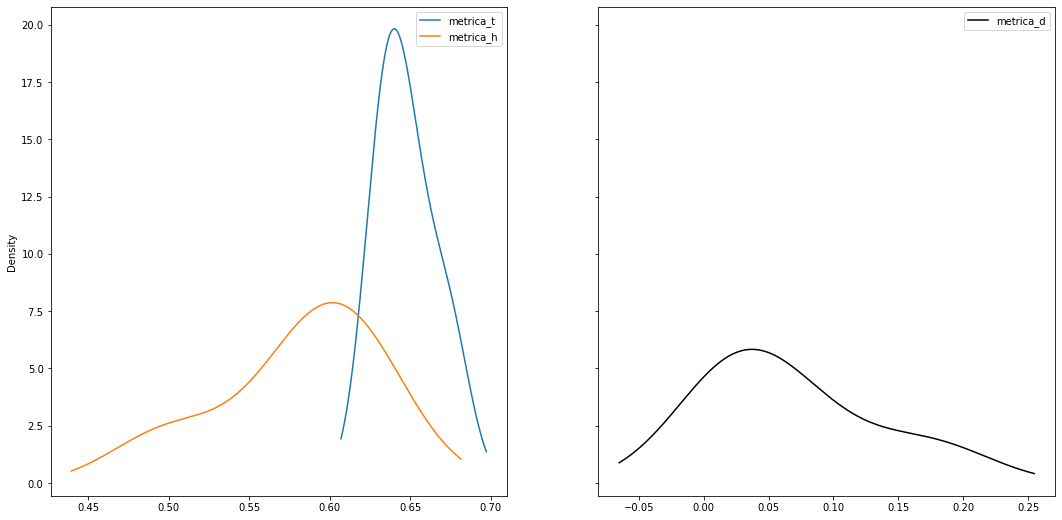

In [602]:
f, ((ax1,ax2)) = plt.subplots(figsize=(18, 9), ncols=2, sharey=True)

pd.DataFrame(skf_dict).T[['metrica_t','metrica_h']].plot(kind='kde', ax=ax1)
pd.DataFrame(skf_dict).T[['metrica_d']].plot(kind='kde', ax=ax2, c='k');

- - -

In [603]:
X = x_[accept].copy()
y = yy.copy()

model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

metrica = fbeta_score( y , y_pred, beta=0.333, average="micro" )

print(classification_report(y, y_pred))

[LightGBM] [Warning] lambda_l1 is set=1.5739672938526383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5739672938526383
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] lambda_l2 is set=0.837372433220741, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.837372433220741
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       285
           1       0.65      0.86      0.74        96
           2       0.72      0.27      0.39       200
           3       0.54      0.82      0.65       408

In [604]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for c in sorted(np.unique(y)):
    mask = np.argwhere(y == c)
    fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
    roc_auc[c] = auc(fpr[c], tpr[c])

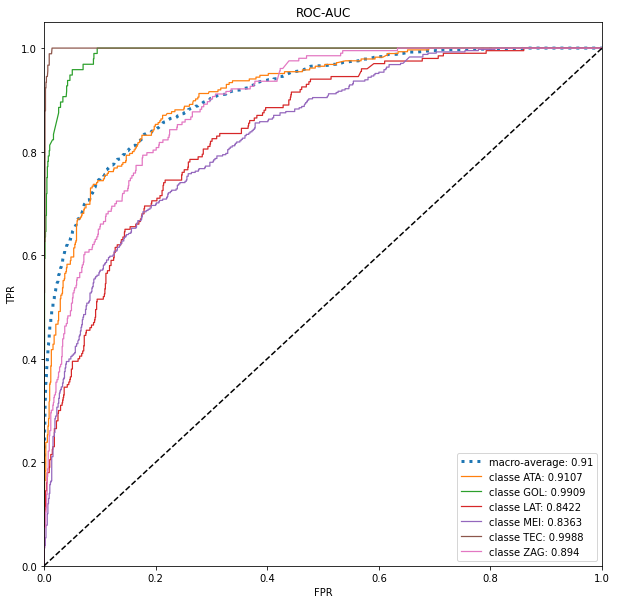

In [605]:
n_classes = len( sorted(np.unique(y)) )

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

f, ((ax1)) = plt.subplots(figsize=(10, 10))
    
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot( fpr["macro"], tpr["macro"],
    label = "macro-average: {0:0.2f}".format(roc_auc["macro"]),
    linestyle = ":", linewidth = 3)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
            label=rf"classe {str(depara[i])}: {round(roc_auc[i], 4)}",
            linewidth = 1.23)

plt.plot([0, 1], [0, 1], "k--",)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC")
plt.legend(loc="lower right")
plt.show()

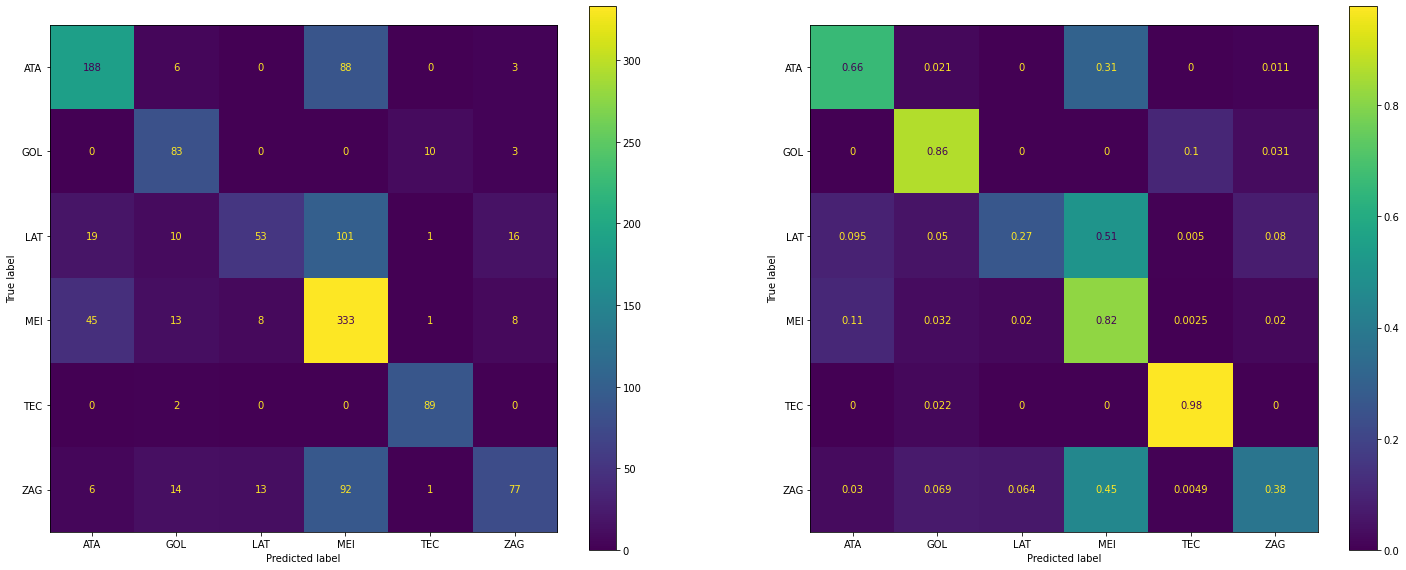

In [606]:
f, ((ax1, ax2)) = plt.subplots(figsize=(25, 10), ncols=2)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[depara[i] for i in range(len(depara))])
disp.plot(ax=ax1)

cm = confusion_matrix(y, y_pred, normalize='true' )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[depara[i] for i in range(len(depara))])
disp.plot(ax=ax2)
plt.show()

#### por fold

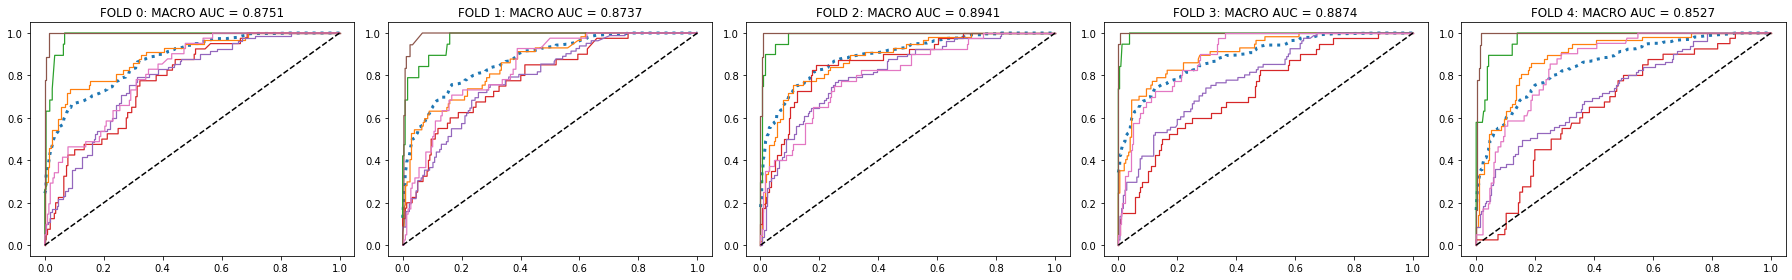

In [607]:
n_classes = len( sorted(np.unique(y)) )

# f, (axs) = plt.subplots(figsize=(25, 25), nrows=n_classes+1, ncols=len(skf_dict))
f, (axs) = plt.subplots(figsize=(25, 4), nrows=1, ncols=len(skf_dict))

for key in sorted(skf_dict):
    y = skf_dict[key]['df']['true'].values
    y_pred = skf_dict[key]['df']['pred'].values
    y_prob = skf_dict[key]['prob']
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for c in sorted(np.unique(y)):
        mask = np.argwhere(y == c)
        fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
        roc_auc[c] = auc(fpr[c], tpr[c])
        
    n_classes = len( sorted(np.unique(y)) )

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    axs[int(key)].plot( fpr["macro"], tpr["macro"],
        label = "macro-average: {0:0.2f}".format(roc_auc["macro"]),
        linestyle = ":", linewidth = 3)

    for i in range(n_classes):
        axs[int(key)].plot(fpr[i], tpr[i],
                label=rf"classe {str(depara[i])}: {round(roc_auc[i], 4)}",
                linewidth = 1.23 )
#         axs[i+1][int(key)].plot(fpr[i], tpr[i], linewidth = 1.23 )

    axs[int(key)].plot([0, 1], [0, 1], "k--")
    axs[int(key)].set_title( rf"FOLD {key}: MACRO AUC = {round(roc_auc['macro'], 4)}" )
    
# for i in range(n_classes):
#     axs[i+1][0].set_ylabel(depara[i])

#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("FPR")
#     plt.ylabel("TPR")
#     plt.title(rf"ROC-AUC: FOLD {key}")
#     plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#### por classe

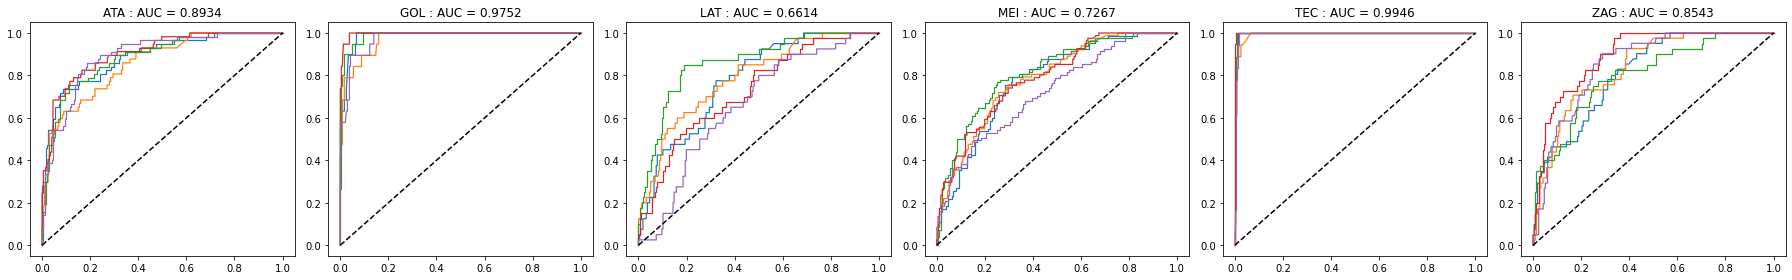

In [608]:
n_classes = len( sorted(np.unique(y)) )

f, (axs) = plt.subplots(figsize=(25, 4), nrows=1, ncols=n_classes)

for key in sorted(skf_dict):
    y = skf_dict[key]['df']['true'].values
    y_pred = skf_dict[key]['df']['pred'].values
    y_prob = skf_dict[key]['prob']
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for c in sorted(np.unique(y)):
        mask = np.argwhere(y == c)
        fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
        roc_auc[c] = auc(fpr[c], tpr[c])
        
    n_classes = len( sorted(np.unique(y)) )

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    for i in range(n_classes):
        axs[i].plot(fpr[i], tpr[i], linewidth = 1.23 )
    
for c in range(n_classes):
    axs[c].plot([0, 1], [0, 1], "k--")
    
    mean_auc = list()
    for key in sorted(skf_dict):
        mask = np.argwhere(y == c)
        fpr, tpr, _ = roc_curve((y == c), y_prob[:,c].ravel())
        mean_auc.append( auc(fpr, tpr) )
    
    axs[c].set_title(rf"{depara[c]} : AUC = {round(np.mean(mean_auc), 4)}")
    

#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("FPR")
#     plt.ylabel("TPR")
#     plt.title(rf"ROC-AUC: FOLD {key}")
#     plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### lightgbm -> `precision_score` -> $k \in [0, 3]$, soma

In [609]:
def otimizador(X_train, X_holdout, y_train, y_holdout, trial):
    
    bagging_freq            = trial.suggest_int('bagging_freq',1,10),
    min_data_in_leaf        = trial.suggest_int('min_data_in_leaf',2,100),
    max_depth               = trial.suggest_int('max_depth',1,20),
    learning_rate           = trial.suggest_loguniform('learning_rate',0.001,0.1),
    num_leaves              = trial.suggest_int('num_leaves',2,70),
    num_threads             = trial.suggest_int('num_threads',1,10),
    min_sum_hessian_in_leaf = trial.suggest_int('min_sum_hessian_in_leaf',1,10)
    lambda_l1               = trial.suggest_loguniform('lambda_l1', 0.1, 2),
    lambda_l2               = trial.suggest_loguniform('lambda_l2', 0.1, 2)

    model = lgb.LGBMClassifier(
                                random_state = 31,
                                verbosity    = -1,
                                bagging_seed = 13,
                                boost_from_average = 'true',
                                boost              = 'gbdt',
                                metric             = 'multi_logloss',
                                bagging_freq            = bagging_freq ,
                                min_data_in_leaf        = min_data_in_leaf,
                                max_depth               = max_depth,
                                learning_rate           = learning_rate,
                                num_leaves              = num_leaves,
                                num_threads             = num_threads,
                                min_sum_hessian_in_leaf = min_sum_hessian_in_leaf,
                                lambda_l1               = lambda_l1,
                                lambda_l2               = lambda_l2
                                )

    model.fit(X_train, y_train)

    y_pred_train   = model.predict(X_train)
    y_pred_holdout = model.predict(X_holdout)

    c = 0
    acc_t_1 = precision_score( y_train == c , y_pred_train == c )
    acc_h_1 = precision_score( y_holdout == c , y_pred_holdout == c )
    acc_d_1 = acc_t_1-acc_h_1
    
    c = 3
    acc_t_2 = precision_score( y_train == c , y_pred_train == c )
    acc_h_2 = precision_score( y_holdout == c , y_pred_holdout == c )
    acc_d_2 = acc_t_2-acc_h_2

    # return accuracy_score(y_holdout, y_pred_holdout)
    # return 1/delta
    # return fbeta_score(y_holdout, y_pred_holdout, beta=2.0, average="macro")
    return acc_h_1+acc_h_2, acc_d_1+acc_d_2

In [610]:
# lb_study = optuna.create_study(direction='maximize')
lb_study = optuna.create_study(directions=["maximize", "minimize"])

[I 2022-01-09 13:52:20,742] A new study created in memory with name: no-name-0fbc07b1-17bd-4660-b21e-6b31eab27fba


In [611]:
skf = StratifiedKFold(n_splits=3, shuffle=True)

for train_index, test_index in skf.split(x_[accept], yy):
    Xt, Xh = x_.iloc[train_index][accept], x_.iloc[test_index][accept]
    yt, yh = yy[train_index], yy[test_index]
    
    lb_study.optimize(functools.partial(otimizador, Xt, Xh, yt, yh), n_trials = 100)

[I 2022-01-09 13:52:24,414] Trial 0 finished with values: [1.2522461814914645, 0.1502272151148052] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 21, 'max_depth': 12, 'learning_rate': 0.01570639902552098, 'num_leaves': 34, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.130672157341236, 'lambda_l2': 0.9319414198017666}. 
[I 2022-01-09 13:52:24,470] Trial 1 finished with values: [1.107964925100475, -0.024579946323828872] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 41, 'max_depth': 2, 'learning_rate': 0.003917687728511564, 'num_leaves': 14, 'num_threads': 7, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.5886748806478952, 'lambda_l2': 0.135590393203955}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.130672157341236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.130672157341236
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.9319414198017666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9319414198017666
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:24,579] Trial 2 finished with values: [1.0552810021836572, 0.09509787929233338] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 38, 'max_depth': 18, 'learning_rate': 0.003218445797152526, 'num_leaves': 56, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.5182359011427602, 'lambda_l2': 0.29896266556765366}. 
[I 2022-01-09 13:52:24,681] Trial 3 finished with values: [1.232290831328522, 0.43806377860055623] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 59, 'max_depth': 7, 'learning_rate': 0.06494400590514865, 'num_leaves': 69, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.653403124035137, 'lambda_l2': 0.33373507781948175}. 
[I 2022-01-09 13:52:24,768] Trial 4 finished with values: [1.1288888888888888, 0.13909610940637196] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 74, 'max_depth': 17, 'learning_rate': 0.00839879148060601, 'num_leaves': 58, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.2221

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.653403124035137, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.653403124035137
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.33373507781948175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33373507781948175
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:24,933] Trial 5 finished with values: [1.2167565139263252, 0.21000181500016868] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 5, 'max_depth': 14, 'learning_rate': 0.016019652358598434, 'num_leaves': 31, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.4353714729681513, 'lambda_l2': 0.346002904754356}. 
[I 2022-01-09 13:52:25,060] Trial 6 finished with values: [1.1353635570254008, 0.08815689329478099] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 32, 'max_depth': 7, 'learning_rate': 0.002182169487166313, 'num_leaves': 45, 'num_threads': 7, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.15757165168507742, 'lambda_l2': 0.8585917803375189}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.15757165168507742, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15757165168507742
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.8585917803375189, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8585917803375189
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:25,171] Trial 7 finished with values: [1.195249042145594, 0.1422420483747197] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 43, 'max_depth': 6, 'learning_rate': 0.009819378903557406, 'num_leaves': 52, 'num_threads': 5, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.22406731668453084, 'lambda_l2': 1.428721282991267}. 
[I 2022-01-09 13:52:25,223] Trial 8 finished with values: [1.2742200328407225, 0.08585658868458035] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 100, 'max_depth': 2, 'learning_rate': 0.0407658399439495, 'num_leaves': 25, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.11287004578402328, 'lambda_l2': 0.2181205173310329}. 
[I 2022-01-09 13:52:25,342] Trial 9 finished with values: [1.2131374722838137, 0.5970776623633955] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 49, 'max_depth': 7, 'learning_rate': 0.05543155937043724, 'num_leaves': 43, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3776409431

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11287004578402328, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11287004578402328
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.2181205173310329, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2181205173310329
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:25,436] Trial 10 finished with values: [1.2437171244886032, 0.3981910880717833] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 68, 'max_depth': 8, 'learning_rate': 0.05070270065023474, 'num_leaves': 65, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.666230477506832, 'lambda_l2': 1.3799427734451954}. 
[I 2022-01-09 13:52:25,581] Trial 11 finished with values: [1.1836883495651267, 0.3299934076002786] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 16, 'max_depth': 15, 'learning_rate': 0.011412932508510422, 'num_leaves': 70, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.7635482836210817, 'lambda_l2': 0.2529843893715651}. 
[I 2022-01-09 13:52:25,620] Trial 12 finished with values: [1.014062190532779, 0.01852966281701235] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 2, 'max_depth': 1, 'learning_rate': 0.003092022970547541, 'num_leaves': 22, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.27843381

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.7635482836210817, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7635482836210817
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.2529843893715651, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2529843893715651
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:25,678] Trial 13 finished with values: [1.268939393939394, 0.1676182344786996] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 49, 'max_depth': 2, 'learning_rate': 0.0599149688115763, 'num_leaves': 64, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3066607208576032, 'lambda_l2': 0.526354202764492}. 
[I 2022-01-09 13:52:25,756] Trial 14 finished with values: [1.061, 0.11341649259831077] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 93, 'max_depth': 20, 'learning_rate': 0.0069876770203995435, 'num_leaves': 45, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.20032984868566, 'lambda_l2': 0.1952283260942678}. 
[I 2022-01-09 13:52:25,840] Trial 15 finished with values: [1.1509715994020926, 0.14177709169738378] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 95, 'max_depth': 15, 'learning_rate': 0.012312142007975457, 'num_leaves': 48, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.529611503580138,

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.20032984868566, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.20032984868566
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.1952283260942678, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1952283260942678
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:25,986] Trial 16 finished with values: [1.1311018131101813, 0.2245525529192846] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 9, 'max_depth': 15, 'learning_rate': 0.007358919767600062, 'num_leaves': 16, 'num_threads': 8, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.182295352540426, 'lambda_l2': 0.26115770036033586}. 
[I 2022-01-09 13:52:26,089] Trial 17 finished with values: [1.2245454545454546, 0.4845622859658322] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 25, 'max_depth': 15, 'learning_rate': 0.04811783015463691, 'num_leaves': 30, 'num_threads': 4, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.5615016405987454, 'lambda_l2': 1.1397191676645448}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5615016405987454, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5615016405987454
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.1397191676645448, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1397191676645448
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:26,213] Trial 18 finished with values: [1.2421177088807147, 0.45206359354097014] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 73, 'max_depth': 19, 'learning_rate': 0.06395646203152533, 'num_leaves': 67, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.1409661134554794, 'lambda_l2': 0.4343067919682451}. 
[I 2022-01-09 13:52:26,381] Trial 19 finished with values: [1.169602186456119, 0.20025488866411395] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 30, 'max_depth': 13, 'learning_rate': 0.009908983787701253, 'num_leaves': 12, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.10975875330799041, 'lambda_l2': 0.4278355422700317}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.10975875330799041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10975875330799041
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.4278355422700317, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4278355422700317
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:26,559] Trial 20 finished with values: [1.1235294117647059, 0.16602624955143652] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 24, 'max_depth': 16, 'learning_rate': 0.0016500044808592561, 'num_leaves': 52, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.31926124016608126, 'lambda_l2': 0.3929622660725909}. 
[I 2022-01-09 13:52:26,634] Trial 21 finished with values: [1.0207261292166951, 0.016532623663162826] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 79, 'max_depth': 16, 'learning_rate': 0.004251647302923745, 'num_leaves': 63, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.359025490252943, 'lambda_l2': 0.5978708364441597}. 
[I 2022-01-09 13:52:26,759] Trial 22 finished with values: [1.1401931401931402, 0.17819766440456097] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 40, 'max_depth': 9, 'learning_rate': 0.008334059842502859, 'num_leaves': 59, 'num_threads': 3, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.359025490252943, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.359025490252943
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.5978708364441597, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5978708364441597
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:52:27,011] Trial 23 finished with values: [1.2564102564102564, 0.04908105397102952] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 2, 'max_depth': 19, 'learning_rate': 0.0010691734863379695, 'num_leaves': 29, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.28869992017142354, 'lambda_l2': 0.10133660238772506}. 
[I 2022-01-09 13:52:27,106] Trial 24 finished with values: [1.221107544141252, 0.6058810277197939] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 68, 'max_depth': 6, 'learning_rate': 0.08443937427378115, 'num_leaves': 24, 'num_threads': 7, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.40184465231089933, 'lambda_l2': 0.18586991877058612}. 
[I 2022-01-09 13:52:27,139] Trial 25 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 60, 'max_depth': 1, 'learning_rate': 0.00155967389343844, 'num_leaves': 36, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.40184465231089933, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.40184465231089933
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=68, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=68
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.18586991877058612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18586991877058612
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:27,271] Trial 26 finished with values: [1.18567668348322, 0.22998397717744068] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 78, 'max_depth': 6, 'learning_rate': 0.021088523622049583, 'num_leaves': 70, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.19729919119757408, 'lambda_l2': 0.3244757201332886}. 
[I 2022-01-09 13:52:27,389] Trial 27 finished with values: [1.32, -0.00037602820211518617] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 8, 'max_depth': 13, 'learning_rate': 0.001084974785251, 'num_leaves': 17, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.6884966939195211, 'lambda_l2': 0.3038799858351932}. 
[I 2022-01-09 13:52:27,470] Trial 28 finished with values: [1.1699062998405103, 0.1340697814398446] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 75, 'max_depth': 5, 'learning_rate': 0.013552944730887374, 'num_leaves': 27, 'num_threads': 10, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.703411348086888

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.6884966939195211, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6884966939195211
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.3038799858351932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3038799858351932
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:27,535] Trial 29 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 12, 'learning_rate': 0.0017975801749063741, 'num_leaves': 5, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.19456000710222404, 'lambda_l2': 0.8604551325060396}. 
[I 2022-01-09 13:52:27,721] Trial 30 finished with values: [1.142572633552015, 0.530707125363103] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 14, 'max_depth': 15, 'learning_rate': 0.014526750389728142, 'num_leaves': 23, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.700694980865066, 'lambda_l2': 0.10371730679755663}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.700694980865066, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.700694980865066
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.10371730679755663, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10371730679755663
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:27,802] Trial 31 finished with values: [1.1774193548387095, 0.22874768014935076] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 64, 'max_depth': 4, 'learning_rate': 0.02531669012462283, 'num_leaves': 39, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.8267667272001936, 'lambda_l2': 1.5082957903422356}. 
[I 2022-01-09 13:52:27,894] Trial 32 finished with values: [0.9820384294068505, 0.016140579532560206] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 91, 'max_depth': 15, 'learning_rate': 0.0039459673926437394, 'num_leaves': 41, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.18270368060969083, 'lambda_l2': 0.20522770911102992}. 
[I 2022-01-09 13:52:28,002] Trial 33 finished with values: [1.2332675871137408, 0.48671457167305654] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 62, 'max_depth': 11, 'learning_rate': 0.0523440643395139, 'num_leaves': 54, 'num_threads': 3, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18270368060969083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18270368060969083
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.20522770911102992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20522770911102992
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:28,182] Trial 34 finished with values: [1.1382868937048505, 0.18652827826557716] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 19, 'max_depth': 6, 'learning_rate': 0.0027461166244979267, 'num_leaves': 30, 'num_threads': 8, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.49286373727834165, 'lambda_l2': 0.10911342494327268}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.49286373727834165, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.49286373727834165
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.10911342494327268, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10911342494327268
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:28,310] Trial 35 finished with values: [1.323040380047506, -0.0011468889232456037] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 4, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:28,351] Trial 36 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 33, 'max_depth': 1, 'learning_rate': 0.0011940527048001923, 'num_leaves': 4, 'num_threads': 10, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.522197757174833, 'lambda_l2': 0.15499145398770367}. 
[I 2022-01-09 13:52:28,424] Trial 37 finished with values: [1.1049265341400174, 0.06970480226551268] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 98, 'max_depth': 19, 'learning_rate': 0.006702647129380615, 'num_leaves': 26, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.522197757174833, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.522197757174833
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.15499145398770367, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15499145398770367
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:28,607] Trial 39 finished with values: [1.2162024022489137, 0.4781776155922993] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 69, 'max_depth': 16, 'learning_rate': 0.050787367169262986, 'num_leaves': 17, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.1929564927756486, 'lambda_l2': 0.5222081840971851}. 
[I 2022-01-09 13:52:28,692] Trial 40 finished with values: [1.2476190476190476, 0.44638748939090234] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 79, 'max_depth': 13, 'learning_rate': 0.06520017382495974, 'num_leaves': 50, 'num_threads': 4, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.34922598933024307, 'lambda_l2': 0.10292746874223814}. 
[I 2022-01-09 13:52:28,773] Trial 41 finished with values: [1.0665008012144725, 0.008684423739892366] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 60, 'max_depth': 18, 'learning_rate': 0.00312664319609807, 'num_leaves': 20, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.34922598933024307, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.34922598933024307
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.10292746874223814, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10292746874223814
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:28,893] Trial 42 finished with values: [1.2448219845674835, 0.4442074156397111] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 49, 'max_depth': 20, 'learning_rate': 0.03446929329929811, 'num_leaves': 41, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.17085873708863145, 'lambda_l2': 0.10035961709145563}. 
[I 2022-01-09 13:52:28,962] Trial 43 finished with values: [0.9914967801615255, 0.0036805248030133964] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 94, 'max_depth': 16, 'learning_rate': 0.0028768298579793117, 'num_leaves': 27, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.11427335937742854, 'lambda_l2': 0.6135296496441589}. 
[I 2022-01-09 13:52:29,034] Trial 44 finished with values: [0.9933456815531316, 0.013524957201565102] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 93, 'max_depth': 15, 'learning_rate': 0.0042408198948671256, 'num_leaves': 50, 'num_threads': 4, 'min_sum_hessian_in_leaf': 2, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11427335937742854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11427335937742854
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.6135296496441589, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6135296496441589
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:29,153] Trial 45 finished with values: [1.2253455608718768, 0.4790269608299773] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 52, 'max_depth': 17, 'learning_rate': 0.037997092550433674, 'num_leaves': 27, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.2817777731968498, 'lambda_l2': 0.16287621344300543}. 
[I 2022-01-09 13:52:29,258] Trial 46 finished with values: [1.2275619331257615, 0.6372480792769897] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 49, 'max_depth': 16, 'learning_rate': 0.07882504632310312, 'num_leaves': 49, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.2704655387258519, 'lambda_l2': 1.4357043650001127}. 
[I 2022-01-09 13:52:29,310] Trial 47 finished with values: [1.2307290305722498, 0.09208075632593482] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 65, 'max_depth': 2, 'learning_rate': 0.03727345744811862, 'num_leaves': 18, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.9728

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.2704655387258519, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2704655387258519
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.4357043650001127, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4357043650001127
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:29,491] Trial 48 finished with values: [1.1618174367380392, 0.26023105331184554] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 6, 'max_depth': 14, 'learning_rate': 0.009906982753219348, 'num_leaves': 25, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.7088773244921749, 'lambda_l2': 0.9180777876125774}. 
[I 2022-01-09 13:52:29,587] Trial 49 finished with values: [1.1184770436730123, 0.13130660244621728] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 70, 'max_depth': 17, 'learning_rate': 0.009442754614763179, 'num_leaves': 39, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.17064283051613624, 'lambda_l2': 1.2035107514574963}. 
[I 2022-01-09 13:52:29,686] Trial 50 finished with values: [0.9963488843813387, 0.01003600770499219] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 98, 'max_depth': 19, 'learning_rate': 0.0039459673926437394, 'num_leaves': 26, 'num_threads': 2, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.17064283051613624, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17064283051613624
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.2035107514574963, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2035107514574963
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:29,813] Trial 51 finished with values: [1.2350907519446845, 0.4572609073987227] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 73, 'max_depth': 20, 'learning_rate': 0.06395646203152533, 'num_leaves': 44, 'num_threads': 2, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.20032984868566, 'lambda_l2': 0.1952283260942678}. 
[I 2022-01-09 13:52:29,947] Trial 52 finished with values: [1.0360128377369757, 0.11568119165489549] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 12, 'max_depth': 17, 'learning_rate': 0.0028768298579793117, 'num_leaves': 39, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.17064283051613624, 'lambda_l2': 0.4607616466334162}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.17064283051613624, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17064283051613624
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.4607616466334162, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4607616466334162
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:30,040] Trial 53 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 74, 'max_depth': 17, 'learning_rate': 0.0010691734863379695, 'num_leaves': 58, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.2221769800401818, 'lambda_l2': 1.552497529091343}. 
[I 2022-01-09 13:52:30,162] Trial 54 finished with values: [1.2128351991668835, 0.4842223686122382] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 52, 'max_depth': 14, 'learning_rate': 0.037997092550433674, 'num_leaves': 27, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.23791889863338683, 'lambda_l2': 0.16287621344300543}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.23791889863338683, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.23791889863338683
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.16287621344300543, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16287621344300543
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:30,254] Trial 55 finished with values: [1.1666666666666665, 0.18655194033482125] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 79, 'max_depth': 7, 'learning_rate': 0.01570639902552098, 'num_leaves': 50, 'num_threads': 4, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.34922598933024307, 'lambda_l2': 0.10292746874223814}. 
[I 2022-01-09 13:52:30,454] Trial 56 finished with values: [1.1618174367380392, 0.26023105331184554] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 6, 'max_depth': 14, 'learning_rate': 0.009906982753219348, 'num_leaves': 25, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.7088773244921749, 'lambda_l2': 0.9180777876125774}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.7088773244921749, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7088773244921749
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.9180777876125774, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9180777876125774
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:52:30,545] Trial 57 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 78, 'max_depth': 4, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.3244757201332886}. 
[I 2022-01-09 13:52:30,661] Trial 58 finished with values: [1.2286759813705923, 0.5933597921864795] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 49, 'max_depth': 7, 'learning_rate': 0.05543155937043724, 'num_leaves': 43, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.19456000710222404, 'lambda_l2': 0.4109590029992951}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.19456000710222404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19456000710222404
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.4109590029992951, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4109590029992951
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:30,753] Trial 59 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 91, 'max_depth': 15, 'learning_rate': 0.0010691734863379695, 'num_leaves': 41, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.28869992017142354, 'lambda_l2': 0.20522770911102992}. 
[I 2022-01-09 13:52:30,854] Trial 60 finished with values: [1.2522278186749323, 0.3629219315942124] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 56, 'max_depth': 9, 'learning_rate': 0.0407658399439495, 'num_leaves': 25, 'num_threads': 7, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.11287004578402328, 'lambda_l2': 0.6469763186397733}. 
[I 2022-01-09 13:52:30,927] Trial 61 finished with values: [0.9830330959363218, 0.024165071802799143] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 93, 'max_depth': 8, 'learning_rate': 0.0042408198948671256, 'num_leaves': 50, 'num_threads': 4, 'min_sum_hessian_in_leaf': 2, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11287004578402328, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11287004578402328
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.6469763186397733, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6469763186397733
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:31,002] Trial 62 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 98, 'max_depth': 17, 'learning_rate': 0.0010691734863379695, 'num_leaves': 29, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.28869992017142354, 'lambda_l2': 1.3302480927318812}. 
[I 2022-01-09 13:52:31,106] Trial 63 finished with values: [1.2298850574712645, 0.4418624050881791] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 69, 'max_depth': 16, 'learning_rate': 0.050787367169262986, 'num_leaves': 17, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.1929564927756486, 'lambda_l2': 0.7529185902551769}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1929564927756486, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1929564927756486
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.7529185902551769, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7529185902551769
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:31,314] Trial 64 finished with values: [1.1147884373690826, 0.32328221741652297] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 16, 'learning_rate': 0.006702647129380615, 'num_leaves': 30, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.22109126645172958, 'lambda_l2': 1.3302480927318812}. 
[I 2022-01-09 13:52:31,409] Trial 65 finished with values: [1.090757808499744, 0.046320920941329946] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 12, 'learning_rate': 0.0039459673926437394, 'num_leaves': 41, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.18270368060969083, 'lambda_l2': 0.20522770911102992}. 
[I 2022-01-09 13:52:31,514] Trial 66 finished with values: [1.083856636336452, 0.09192352202405119] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 41, 'max_depth': 6, 'learning_rate': 0.003917687728511564, 'num_leaves': 70, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18270368060969083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18270368060969083
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.20522770911102992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20522770911102992
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:31,684] Trial 67 finished with values: [1.1798817774154098, 0.15990837593406565] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 5, 'max_depth': 14, 'learning_rate': 0.009819378903557406, 'num_leaves': 31, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.4353714729681513, 'lambda_l2': 0.346002904754356}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.4353714729681513, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4353714729681513
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.346002904754356, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.346002904754356
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] bo

[I 2022-01-09 13:52:31,806] Trial 68 finished with values: [1.2203961230509903, 0.13947352313150507] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 21, 'max_depth': 5, 'learning_rate': 0.013552944730887374, 'num_leaves': 34, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.7034113480868887, 'lambda_l2': 0.9319414198017666}. 
[I 2022-01-09 13:52:31,958] Trial 69 finished with values: [1.1606209324655925, 0.3561280332357286] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 16, 'max_depth': 15, 'learning_rate': 0.011412932508510422, 'num_leaves': 22, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.27843381901030717, 'lambda_l2': 0.7430415941191916}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.27843381901030717, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.27843381901030717
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.7430415941191916, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7430415941191916
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:32,098] Trial 70 finished with values: [1.1649916247906198, -0.016158890704429496] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 12, 'learning_rate': 0.0017975801749063741, 'num_leaves': 12, 'num_threads': 1, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.4579116630610762, 'lambda_l2': 0.8604551325060396}. 
[I 2022-01-09 13:52:32,164] Trial 71 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 9, 'learning_rate': 0.0017975801749063741, 'num_leaves': 5, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.19456000710222404, 'lambda_l2': 0.8604551325060396}. 
[I 2022-01-09 13:52:32,260] Trial 72 finished with values: [1.2543103448275863, 0.4883477772119792] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 59, 'max_depth': 7, 'learning_rate': 0.06494400590514865, 'num_leaves': 69, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.19456000710222404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19456000710222404
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.8604551325060396, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8604551325060396
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:32,302] Trial 73 finished with values: [1.0918635170603674, 0.06441301417068168] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 2, 'max_depth': 1, 'learning_rate': 0.03446929329929811, 'num_leaves': 22, 'num_threads': 3, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.17085873708863145, 'lambda_l2': 0.7430415941191916}. 
[I 2022-01-09 13:52:32,438] Trial 74 finished with values: [1.1457221180204877, 0.15665531515334796] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 9, 'max_depth': 18, 'learning_rate': 0.007358919767600062, 'num_leaves': 16, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.8980709694435838, 'lambda_l2': 0.3640027694515592}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.8980709694435838, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8980709694435838
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.3640027694515592, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3640027694515592
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:52:32,577] Trial 75 finished with values: [1.320754716981132, -0.0003778029646420711] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 38, 'max_depth': 13, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.3038799858351932}. 
[I 2022-01-09 13:52:32,675] Trial 76 finished with values: [1.1397392290249433, 0.046694395610928474] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 12, 'learning_rate': 0.0017975801749063741, 'num_leaves': 26, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.2394516050482701, 'lambda_l2': 0.8604551325060396}. 
[I 2022-01-09 13:52:32,712] Trial 77 finished with values: [1.079225352112676, 0.007719152417811681] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 33, 'max_depth': 1, 'learning_rate': 0.005745371656308826, 'num_leaves': 4, 'num_threads': 10, 'min_sum_hessian_in_leaf': 7, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2394516050482701, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2394516050482701
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.8604551325060396, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8604551325060396
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:32,869] Trial 79 finished with values: [1.2415730337078652, 0.31666283373852855] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 93, 'max_depth': 19, 'learning_rate': 0.06395646203152533, 'num_leaves': 62, 'num_threads': 2, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.1409661134554794, 'lambda_l2': 0.7813067103051986}. 
[I 2022-01-09 13:52:32,944] Trial 80 finished with values: [1.1038150980475927, 0.06765705536097699] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 98, 'max_depth': 7, 'learning_rate': 0.006702647129380615, 'num_leaves': 69, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.653403124035137, 'lambda_l2': 0.33373507781948175}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.653403124035137, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.653403124035137
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.33373507781948175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33373507781948175
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:33,129] Trial 81 finished with values: [1.1463587727917894, 0.37613398083139893] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 14, 'max_depth': 15, 'learning_rate': 0.009819378903557406, 'num_leaves': 23, 'num_threads': 5, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.22406731668453084, 'lambda_l2': 1.428721282991267}. 
[I 2022-01-09 13:52:33,231] Trial 82 finished with values: [1.3222748815165877, -0.00038139039232731875] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 4, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.2704655387258519, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:33,268] Trial 83 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 60, 'max_depth': 1, 'learning_rate': 0.00155967389343844, 'num_leaves': 23, 'num_threads': 9, 'min_sum_hessian_in_leaf': 5, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.2704655387258519, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2704655387258519
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.6954231572059537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6954231572059537
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:33,360] Trial 84 finished with values: [1.2220529422967055, 0.3754463790930882] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 79, 'max_depth': 7, 'learning_rate': 0.05543155937043724, 'num_leaves': 43, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.359025490252943, 'lambda_l2': 0.3120882031069109}. 
[I 2022-01-09 13:52:33,489] Trial 85 finished with values: [1.2334357647312524, 0.10865257146085738] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 8, 'max_depth': 13, 'learning_rate': 0.010057243284893899, 'num_leaves': 17, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.6884966939195211, 'lambda_l2': 0.3038799858351932}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.6884966939195211, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6884966939195211
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.3038799858351932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3038799858351932
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:33,688] Trial 86 finished with values: [1.2564102564102564, 0.04908105397102952] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 2, 'max_depth': 19, 'learning_rate': 0.0010691734863379695, 'num_leaves': 29, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.28869992017142354, 'lambda_l2': 0.10133660238772506}. 
[I 2022-01-09 13:52:33,795] Trial 87 finished with values: [1.234640909389579, 0.4801272931132653] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 59, 'max_depth': 7, 'learning_rate': 0.06494400590514865, 'num_leaves': 43, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.653403124035137, 'lambda_l2': 0.2809979154940927}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.653403124035137, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.653403124035137
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.2809979154940927, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2809979154940927
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:52:33,924] Trial 88 finished with values: [1.2562243502051982, 0.3906051716243235] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 49, 'max_depth': 13, 'learning_rate': 0.03446929329929811, 'num_leaves': 17, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.6884966939195211, 'lambda_l2': 0.3038799858351932}. 
[I 2022-01-09 13:52:33,975] Trial 89 finished with values: [1.2742200328407225, 0.08585658868458035] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 100, 'max_depth': 2, 'learning_rate': 0.0407658399439495, 'num_leaves': 26, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.11287004578402328, 'lambda_l2': 0.2181205173310329}. 
[I 2022-01-09 13:52:34,062] Trial 90 finished with values: [1.1774193548387095, 0.22874768014935076] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 64, 'max_depth': 4, 'learning_rate': 0.02531669012462283, 'num_leaves': 39, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.8267

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11287004578402328, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11287004578402328
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.2181205173310329, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2181205173310329
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:34,162] Trial 91 finished with values: [1.225033467202142, 0.5069708431426857] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 60, 'max_depth': 19, 'learning_rate': 0.06395646203152533, 'num_leaves': 36, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.1409661134554794, 'lambda_l2': 0.4343067919682451}. 
[I 2022-01-09 13:52:34,315] Trial 92 finished with values: [1.1579969482591206, 0.1458043088495296] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 23, 'max_depth': 16, 'learning_rate': 0.004251647302923745, 'num_leaves': 63, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.359025490252943, 'lambda_l2': 0.5978708364441597}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.359025490252943, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.359025490252943
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.5978708364441597, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5978708364441597
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:52:34,374] Trial 93 finished with values: [1.2522198616331646, 0.08678537396892982] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 59, 'max_depth': 2, 'learning_rate': 0.03727345744811862, 'num_leaves': 69, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.653403124035137, 'lambda_l2': 0.8186202569882732}. 
[I 2022-01-09 13:52:34,515] Trial 94 finished with values: [1.162777777777778, 0.37251743838207774] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 21, 'max_depth': 15, 'learning_rate': 0.01570639902552098, 'num_leaves': 34, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.130672157341236, 'lambda_l2': 0.9319414198017666}. 
[I 2022-01-09 13:52:34,555] Trial 95 finished with values: [1.014062190532779, 0.01852966281701235] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 2, 'max_depth': 1, 'learning_rate': 0.003092022970547541, 'num_leaves': 12, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.278433819

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.130672157341236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.130672157341236
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.9319414198017666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9319414198017666
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:52:34,670] Trial 96 finished with values: [1.2267679719462303, 0.4049945262834822] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 52, 'max_depth': 11, 'learning_rate': 0.037997092550433674, 'num_leaves': 27, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.130672157341236, 'lambda_l2': 0.9319414198017666}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.28869992017142354, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.28869992017142354
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.10133660238772506, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10133660238772506


[I 2022-01-09 13:52:35,003] Trial 97 finished with values: [1.1875623545061522, 0.8087611749056125] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 2, 'max_depth': 19, 'learning_rate': 0.0407658399439495, 'num_leaves': 63, 'num_threads': 7, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.28869992017142354, 'lambda_l2': 0.10133660238772506}. 
[I 2022-01-09 13:52:35,076] Trial 98 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 89, 'max_depth': 6, 'learning_rate': 0.0015303927131202612, 'num_leaves': 9, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.22406731668453084, 'lambda_l2': 0.31272683296159914}. 
[I 2022-01-09 13:52:35,111] Trial 99 finished with values: [1.014062190532779, 0.01852966281701235] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 94, 'max_depth': 1, 'learning_rate': 0.0028768298579793117, 'num_leaves': 22, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.22406731668453084, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22406731668453084
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=89
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.31272683296159914, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31272683296159914
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:35,237] Trial 100 finished with values: [1.058001893939394, 0.15050868193997352] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 32, 'max_depth': 4, 'learning_rate': 0.002182169487166313, 'num_leaves': 30, 'num_threads': 7, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.2704655387258519, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:35,316] Trial 101 finished with values: [1.0912907268170426, 0.556702614477786] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 98, 'max_depth': 18, 'learning_rate': 0.06494400590514865, 'num_leaves': 69, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.2640636606467364, 'lambda_l2': 0.33373507781948175}. 
[I 2022-01-09 13:52:35,392] Trial 102 finished with values: [1.044426867048975, 0.17866985604774804] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 54, 'max_depth': 13, 'learning_rate': 0.0017975801749063741, 'num_leaves': 5, 'num_threads': 10, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2640636606467364, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2640636606467364
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.33373507781948175, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33373507781948175
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:35,592] Trial 103 finished with values: [1.0938686225310428, 0.8919564695767718] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 8, 'learning_rate': 0.05070270065023474, 'num_leaves': 30, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.3166799309533977, 'lambda_l2': 1.3799427734451954}. 
[I 2022-01-09 13:52:35,689] Trial 104 finished with values: [1.1019974226804123, 0.5896902801684878] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 79, 'max_depth': 13, 'learning_rate': 0.06520017382495974, 'num_leaves': 50, 'num_threads': 4, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.857473012200282, 'lambda_l2': 0.10292746874223814}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.857473012200282, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.857473012200282
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.10292746874223814, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10292746874223814
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:35,849] Trial 105 finished with values: [1.006310381415089, 0.20737122493667437] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 21, 'max_depth': 5, 'learning_rate': 0.0015303927131202612, 'num_leaves': 34, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.22406731668453084, 'lambda_l2': 0.9319414198017666}. 
[I 2022-01-09 13:52:35,883] Trial 106 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 1, 'learning_rate': 0.0017975801749063741, 'num_leaves': 26, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.2394516050482701, 'lambda_l2': 0.8604551325060396}. 
[I 2022-01-09 13:52:36,045] Trial 107 finished with values: [1.0764713474445018, 0.9041861804365391] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 33, 'max_depth': 15, 'learning_rate': 0.06853939778747434, 'num_leaves': 50, 'num_threads': 10, 'min_sum_hessian_in_leaf': 2, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2394516050482701, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2394516050482701
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.8604551325060396, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8604551325060396
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:36,128] Trial 108 finished with values: [1.0088320115356886, 0.17769030496929694] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 32, 'max_depth': 4, 'learning_rate': 0.005745371656308826, 'num_leaves': 4, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.522197757174833, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:36,217] Trial 109 finished with values: [1.000483859818898, 0.14104373966762307] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 74, 'max_depth': 17, 'learning_rate': 0.0017975801749063741, 'num_leaves': 58, 'num_threads': 5, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.2221769800401818, 'lambda_l2': 0.8604551325060396}. 
[I 2022-01-09 13:52:36,313] Trial 110 finished with values: [1.1132142857142857, 0.11631369569104244] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 53, 'max_depth': 12, 'learning_rate': 0.0017975801749063741, 'num_leaves': 26, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2221769800401818, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2221769800401818
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.8604551325060396, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8604551325060396
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:36,519] Trial 111 finished with values: [1.13, 0.7846825396825396] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 8, 'max_depth': 13, 'learning_rate': 0.03727345744811862, 'num_leaves': 18, 'num_threads': 10, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.0918997749409525, 'lambda_l2': 0.13247359479266863}. 
[I 2022-01-09 13:52:36,616] Trial 112 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 91, 'max_depth': 12, 'learning_rate': 0.0010691734863379695, 'num_leaves': 41, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.18270368060969083, 'lambda_l2': 0.20522770911102992}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18270368060969083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18270368060969083
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.20522770911102992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20522770911102992
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:36,743] Trial 113 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 4, 'learning_rate': 0.0011328271308337912, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:36,831] Trial 114 finished with values: [1.0883068555889508, 0.17726118815345498] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 72, 'max_depth': 12, 'learning_rate': 0.0013434316320356998, 'num_leaves': 64, 'num_threads': 9, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.130672157341236, 'lambda_l2': 0.526354202764492}. 
[I 2022-01-09 13:52:36,886] Trial 115 finished with values: [0.9981024667931688, 0.16031107238388687] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 59, 'max_depth': 2, 'learning_rate': 0.0028768298579793117, 'num_leaves': 69, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.130672157341236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.130672157341236
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.526354202764492, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.526354202764492
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:52:36,976] Trial 116 finished with values: [1.14576802507837, 0.12635741046169974] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 59, 'max_depth': 19, 'learning_rate': 0.0013920188154426152, 'num_leaves': 69, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.2640636606467364, 'lambda_l2': 0.7112517298255846}. 
[I 2022-01-09 13:52:37,077] Trial 117 finished with values: [1.058001893939394, 0.16850689139292074] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 16, 'max_depth': 4, 'learning_rate': 0.0017975801749063741, 'num_leaves': 65, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:37,163] Trial 118 finished with values: [1.1183993399339933, 0.1557154341807807] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 12, 'learning_rate': 0.0015303927131202612, 'num_leaves': 37, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1064974237036502, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1064974237036502
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.6954231572059537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6954231572059537
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:37,294] Trial 119 finished with values: [1.0577885391444712, 0.18619461368344686] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 33, 'max_depth': 10, 'learning_rate': 0.0011940527048001923, 'num_leaves': 40, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.3038799858351932}. 
[I 2022-01-09 13:52:37,481] Trial 120 finished with values: [0.9518723459014283, 0.31842183680151354] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 12, 'learning_rate': 0.0012095759243793177, 'num_leaves': 34, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.130672157341236, 'lambda_l2': 0.9319414198017666}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.130672157341236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.130672157341236
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.9319414198017666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9319414198017666
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:52:37,578] Trial 121 finished with values: [1.0833333333333333, 0.11093073593073588] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 11, 'learning_rate': 0.0017975801749063741, 'num_leaves': 34, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.2394516050482701, 'lambda_l2': 0.11616767803923458}. 
[I 2022-01-09 13:52:37,639] Trial 122 finished with values: [1.1158539983282252, 0.31630853610703646] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 59, 'max_depth': 2, 'learning_rate': 0.03727345744811862, 'num_leaves': 69, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.28869992017142354, 'lambda_l2': 1.128758282687552}. 
[I 2022-01-09 13:52:37,716] Trial 123 finished with values: [0.9490936982762102, 0.09511674342629384] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 94, 'max_depth': 12, 'learning_rate': 0.0028768298579793117, 'num_leaves': 34, 'num_threads': 6, 'min_sum_hessian_in_leaf': 10, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.28869992017142354, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.28869992017142354
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.128758282687552, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.128758282687552
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:37,824] Trial 125 finished with values: [1.104223507584852, 0.3094167467560625] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 59, 'max_depth': 2, 'learning_rate': 0.03727345744811862, 'num_leaves': 69, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.653403124035137, 'lambda_l2': 0.8186202569882732}. 
[I 2022-01-09 13:52:37,878] Trial 126 finished with values: [1.1195470338437783, 0.054527040230295865] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 100, 'max_depth': 2, 'learning_rate': 0.0017975801749063741, 'num_leaves': 26, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.11287004578402328, 'lambda_l2': 0.8604551325060396}. 
[I 2022-01-09 13:52:37,983] Trial 127 finished with values: [1.0652366699922402, 0.387944769296451] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 21, 'max_depth': 12, 'learning_rate': 0.01570639902552098, 'num_leaves': 34, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11287004578402328, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11287004578402328
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.8604551325060396, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8604551325060396
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:38,169] Trial 128 finished with values: [0.8505246166263115, 0.41250568640399154] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 6, 'max_depth': 12, 'learning_rate': 0.0012095759243793177, 'num_leaves': 34, 'num_threads': 4, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 1.5445974907109838}. 
[I 2022-01-09 13:52:38,305] Trial 129 finished with values: [1.0866896816263905, 0.1564560615193527] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 38, 'max_depth': 13, 'learning_rate': 0.001757372403387106, 'num_leaves': 30, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.3038799858351932}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1064974237036502, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1064974237036502
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.3038799858351932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3038799858351932
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:38,436] Trial 130 finished with values: [1.069916027747353, 0.6525466947153694] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 49, 'max_depth': 20, 'learning_rate': 0.03446929329929811, 'num_leaves': 41, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.17085873708863145, 'lambda_l2': 0.10035961709145563}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.28869992017142354, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.28869992017142354
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.10133660238772506, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10133660238772506


[I 2022-01-09 13:52:38,677] Trial 131 finished with values: [1.0111842105263158, 0.25759666712552964] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 2, 'max_depth': 12, 'learning_rate': 0.0017975801749063741, 'num_leaves': 29, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.28869992017142354, 'lambda_l2': 0.10133660238772506}. 
[I 2022-01-09 13:52:38,783] Trial 132 finished with values: [0.9490936982762102, 0.09511674342629384] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 94, 'max_depth': 12, 'learning_rate': 0.0028768298579793117, 'num_leaves': 12, 'num_threads': 1, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.4579116630610762, 'lambda_l2': 0.6135296496441589}. 
[I 2022-01-09 13:52:38,845] Trial 133 finished with values: [1.022329394743188, 0.16124841361016212] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 33, 'max_depth': 2, 'learning_rate': 0.004540096013530092, 'num_leaves': 49, 'num_threads': 10, 'min_sum_hessian_in_leaf': 7, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.4579116630610762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4579116630610762
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.6135296496441589, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6135296496441589
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:38,960] Trial 134 finished with values: [1.137742718446602, 0.18918035847647496] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 12, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.2704655387258519, 'lambda_l2': 1.5593766699840939}. 
[I 2022-01-09 13:52:39,008] Trial 135 finished with values: [1.0372807017543861, 0.12084820637452215] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 38, 'max_depth': 2, 'learning_rate': 0.0028768298579793117, 'num_leaves': 29, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.5182359011427602, 'lambda_l2': 0.6135296496441589}. 
[I 2022-01-09 13:52:39,042] Trial 136 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 60, 'max_depth': 1, 'learning_rate': 0.00155967389343844, 'num_leaves': 20, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5182359011427602, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5182359011427602
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.6135296496441589, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6135296496441589
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:39,311] Trial 138 finished with values: [1.029494382022472, 0.32416727943399304] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 16, 'learning_rate': 0.004251647302923745, 'num_leaves': 63, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.359025490252943, 'lambda_l2': 0.5978708364441597}. 
[I 2022-01-09 13:52:39,451] Trial 139 finished with values: [1.0352746212121213, 0.18822000244379272] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 32, 'max_depth': 7, 'learning_rate': 0.002182169487166313, 'num_leaves': 43, 'num_threads': 7, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.15757165168507742, 'lambda_l2': 0.7784093061287365}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.15757165168507742, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15757165168507742
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.7784093061287365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7784093061287365
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:39,577] Trial 140 finished with values: [1.0343280019097638, 0.24015979989317393] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 8, 'max_depth': 13, 'learning_rate': 0.004251647302923745, 'num_leaves': 63, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.6884966939195211, 'lambda_l2': 0.5978708364441597}. 
[I 2022-01-09 13:52:39,667] Trial 141 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 100, 'max_depth': 8, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.43716330352451466, 'lambda_l2': 0.2181205173310329}. 
[I 2022-01-09 13:52:39,723] Trial 142 finished with values: [0.9295002894076789, 0.08583328475054308] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 100, 'max_depth': 2, 'learning_rate': 0.0028768298579793117, 'num_leaves': 22, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambd

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.43716330352451466, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.43716330352451466
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.2181205173310329, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2181205173310329
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:39,829] Trial 143 finished with values: [1.0278932298882424, 0.19864458346756125] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 38, 'max_depth': 5, 'learning_rate': 0.0012095759243793177, 'num_leaves': 34, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 1.7806157256820914}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.16541485291122052, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16541485291122052
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.10133660238772506, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10133660238772506


[I 2022-01-09 13:52:40,086] Trial 144 finished with values: [1.0276402640264026, 0.27599609960996097] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 16, 'max_depth': 19, 'learning_rate': 0.0010691734863379695, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.16541485291122052, 'lambda_l2': 0.10133660238772506}. 
[I 2022-01-09 13:52:40,180] Trial 145 finished with values: [1.0514944769330734, 0.23118591199056338] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 94, 'max_depth': 16, 'learning_rate': 0.009675739291372403, 'num_leaves': 29, 'num_threads': 2, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.11427335937742854, 'lambda_l2': 0.3951681316620926}. 
[I 2022-01-09 13:52:40,233] Trial 146 finished with values: [1.0974891774891775, 0.40643239113827345] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 41, 'max_depth': 2, 'learning_rate': 0.06395646203152533, 'num_leaves': 14, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11427335937742854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11427335937742854
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.3951681316620926, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3951681316620926
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:40,308] Trial 147 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 78, 'max_depth': 16, 'learning_rate': 0.0012095759243793177, 'num_leaves': 27, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.6135296496441589}. 
[I 2022-01-09 13:52:40,391] Trial 148 finished with values: [0.9869851328296368, 0.14309616798337127] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 60, 'max_depth': 18, 'learning_rate': 0.00312664319609807, 'num_leaves': 20, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.8980709694435838, 'lambda_l2': 0.9451557759373639}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.8980709694435838, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8980709694435838
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.9451557759373639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9451557759373639
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:40,717] Trial 149 finished with values: [1.0783376623376624, 0.5557432080056177] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 2, 'max_depth': 19, 'learning_rate': 0.0039459673926437394, 'num_leaves': 41, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.28869992017142354, 'lambda_l2': 0.20522770911102992}. 
[I 2022-01-09 13:52:40,850] Trial 150 finished with values: [1.137742718446602, 0.18918035847647496] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 12, 'learning_rate': 0.0012095759243793177, 'num_leaves': 12, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.2704655387258519, 'lambda_l2': 0.8604551325060396}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.2704655387258519, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2704655387258519
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.8604551325060396, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8604551325060396
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:41,048] Trial 151 finished with values: [0.9686274509803922, 0.3099193446896912] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 16, 'max_depth': 13, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.13416616589271277}. 
[I 2022-01-09 13:52:41,101] Trial 152 finished with values: [1.075209280864808, 0.05690717500878628] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 100, 'max_depth': 2, 'learning_rate': 0.002182169487166313, 'num_leaves': 26, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.15757165168507742, 'lambda_l2': 0.8604551325060396}. 
[I 2022-01-09 13:52:41,175] Trial 153 finished with values: [1.0896833250865907, 0.2665636365079644] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 94, 'max_depth': 12, 'learning_rate': 0.01570639902552098, 'num_leaves': 27, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.15757165168507742, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15757165168507742
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.8604551325060396, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8604551325060396
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:41,306] Trial 154 finished with values: [0.9682267067410906, 0.29480359628921243] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 26, 'max_depth': 19, 'learning_rate': 0.0011940527048001923, 'num_leaves': 26, 'num_threads': 10, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.522197757174833, 'lambda_l2': 0.5456611973571671}. 
[I 2022-01-09 13:52:41,372] Trial 155 finished with values: [0.9675037901258982, 0.05495803944476607] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 100, 'max_depth': 4, 'learning_rate': 0.0020076844276508106, 'num_leaves': 26, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.2704655387258519, 'lambda_l2': 0.42711233879476274}. 
[I 2022-01-09 13:52:41,508] Trial 156 finished with values: [1.058574879227053, 0.29146572223459943] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 32, 'max_depth': 12, 'learning_rate': 0.0039459673926437394, 'num_leaves': 30, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.2704655387258519, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2704655387258519
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.42711233879476274, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.42711233879476274
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:41,626] Trial 157 finished with values: [1.0110904827047098, 0.2609959834607038] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 38, 'max_depth': 13, 'learning_rate': 0.00312664319609807, 'num_leaves': 30, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.401723390746434, 'lambda_l2': 0.3038799858351932}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.401723390746434, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.401723390746434
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.3038799858351932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3038799858351932
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:52:41,736] Trial 158 finished with values: [1.1099852724594994, 0.38187882543167484] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 74, 'max_depth': 19, 'learning_rate': 0.021033704396928428, 'num_leaves': 30, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.36735737649960953, 'lambda_l2': 0.16613236756537866}. 
[I 2022-01-09 13:52:41,838] Trial 159 finished with values: [1.083456607495069, 0.5694684725399854] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 93, 'max_depth': 13, 'learning_rate': 0.06395646203152533, 'num_leaves': 62, 'num_threads': 2, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.6884966939195211, 'lambda_l2': 0.3038799858351932}. 
[I 2022-01-09 13:52:41,884] Trial 160 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 78, 'max_depth': 1, 'learning_rate': 0.0012095759243793177, 'num_leaves': 26, 'num_threads': 2, 'min_sum_hessian_in_leaf': 8, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.6884966939195211, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6884966939195211
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.3038799858351932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3038799858351932
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:41,961] Trial 161 finished with values: [1.044426867048975, 0.15129471660364313] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 7, 'learning_rate': 0.0017975801749063741, 'num_leaves': 5, 'num_threads': 7, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.19456000710222404, 'lambda_l2': 0.8585917803375189}. 
[I 2022-01-09 13:52:42,075] Trial 162 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 4, 'learning_rate': 0.0011328271308337912, 'num_leaves': 69, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:42,129] Trial 163 finished with values: [1.0719227674979888, 0.1136194011767101] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 41, 'max_depth': 2, 'learning_rate': 0.003917687728511564, 'num_leaves': 17, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1064974237036502, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1064974237036502
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.6954231572059537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6954231572059537
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:42,204] Trial 164 finished with values: [1.1025197628458498, 0.4285143643837615] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 100, 'max_depth': 10, 'learning_rate': 0.0407658399439495, 'num_leaves': 26, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.11287004578402328, 'lambda_l2': 0.2181205173310329}. 
[I 2022-01-09 13:52:42,246] Trial 165 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 2, 'max_depth': 1, 'learning_rate': 0.00155967389343844, 'num_leaves': 36, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.17085873708863145, 'lambda_l2': 0.17132824861888732}. 
[I 2022-01-09 13:52:42,321] Trial 166 finished with values: [1.0578125849785174, 0.23650961399702553] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 98, 'max_depth': 13, 'learning_rate': 0.010057243284893899, 'num_leaves': 69, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.17085873708863145, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17085873708863145
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.17132824861888732, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17132824861888732
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:42,512] Trial 168 finished with values: [1.0278932298882424, 0.19864458346756125] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 4, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.2704655387258519, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:42,641] Trial 169 finished with values: [1.0278932298882424, 0.19864458346756125] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 13, 'learning_rate': 0.0013528803712905906, 'num_leaves': 30, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.2704655387258519, 'lambda_l2': 0.3038799858351932}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.2704655387258519, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2704655387258519
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.3038799858351932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3038799858351932
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:42,729] Trial 170 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 74, 'max_depth': 12, 'learning_rate': 0.0010691734863379695, 'num_leaves': 12, 'num_threads': 10, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.4579116630610762, 'lambda_l2': 0.8604551325060396}. 
[I 2022-01-09 13:52:42,782] Trial 171 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 49, 'max_depth': 2, 'learning_rate': 0.0012095759243793177, 'num_leaves': 64, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.6135296496441589}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1064974237036502, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1064974237036502
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.6135296496441589, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6135296496441589
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:42,974] Trial 172 finished with values: [1.0431634642160958, 0.32045993832946246] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 2, 'max_depth': 19, 'learning_rate': 0.003917687728511564, 'num_leaves': 29, 'num_threads': 7, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.5886748806478952, 'lambda_l2': 0.135590393203955}. 
[I 2022-01-09 13:52:43,068] Trial 173 finished with values: [0.9869851328296368, 0.14309616798337127] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 60, 'max_depth': 18, 'learning_rate': 0.00312664319609807, 'num_leaves': 20, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.8980709694435838, 'lambda_l2': 0.9451557759373639}. 
[I 2022-01-09 13:52:43,139] Trial 174 finished with values: [1.0541129167364718, 0.09937020488037118] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 25, 'max_depth': 17, 'learning_rate': 0.0017975801749063741, 'num_leaves': 5, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.8980709694435838, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8980709694435838
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.9451557759373639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9451557759373639
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:43,180] Trial 175 finished with values: [1.015379131231858, 0.0846301762886183] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 49, 'max_depth': 1, 'learning_rate': 0.01067213170550186, 'num_leaves': 16, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.3066607208576032, 'lambda_l2': 0.9451557759373639}. 
[I 2022-01-09 13:52:43,273] Trial 176 finished with values: [1.137742718446602, 0.18918035847647496] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 54, 'max_depth': 12, 'learning_rate': 0.0012095759243793177, 'num_leaves': 9, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.4579116630610762, 'lambda_l2': 0.8604551325060396}. 
[I 2022-01-09 13:52:43,344] Trial 177 finished with values: [0.3185011709601874, 0.36741007419276395] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 89, 'max_depth': 6, 'learning_rate': 0.0015303927131202612, 'num_leaves': 58, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.22

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.4579116630610762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4579116630610762
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.8604551325060396, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8604551325060396
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:43,407] Trial 178 finished with values: [1.0578104636008192, 0.10041891265672603] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 98, 'max_depth': 9, 'learning_rate': 0.006702647129380615, 'num_leaves': 5, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.22109126645172958, 'lambda_l2': 1.3302480927318812}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.28869992017142354, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.28869992017142354
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.8186202569882732, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8186202569882732


[I 2022-01-09 13:52:43,736] Trial 179 finished with values: [1.12, 0.88] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 2, 'max_depth': 10, 'learning_rate': 0.03727345744811862, 'num_leaves': 43, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.28869992017142354, 'lambda_l2': 0.8186202569882732}. 
[I 2022-01-09 13:52:43,790] Trial 180 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 92, 'max_depth': 2, 'learning_rate': 0.0010691734863379695, 'num_leaves': 49, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.28869992017142354, 'lambda_l2': 0.10133660238772506}. 
[I 2022-01-09 13:52:43,909] Trial 181 finished with values: [1.0499524673753349, 0.19942096620862498] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 41, 'max_depth': 12, 'learning_rate': 0.00155967389343844, 'num_leaves': 26, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.2394516050482701, 'lambd

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.28869992017142354, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.28869992017142354
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.10133660238772506, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10133660238772506
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:44,032] Trial 182 finished with values: [1.137742718446602, 0.18918035847647496] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 11, 'learning_rate': 0.0010691734863379695, 'num_leaves': 12, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.28869992017142354, 'lambda_l2': 0.8604551325060396}. 
[I 2022-01-09 13:52:44,137] Trial 183 finished with values: [0.9399820842042401, 0.09780486935284755] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 98, 'max_depth': 19, 'learning_rate': 0.0017975801749063741, 'num_leaves': 12, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.4579116630610762, 'lambda_l2': 0.8604551325060396}. 
[I 2022-01-09 13:52:44,223] Trial 184 finished with values: [1.075389268511258, 0.22256955708237858] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 98, 'max_depth': 19, 'learning_rate': 0.010057243284893899, 'num_leaves': 26, 'num_threads': 10, 'min_sum_hessian_in_leaf': 5, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.4579116630610762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4579116630610762
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.8604551325060396, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8604551325060396
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:44,389] Trial 185 finished with values: [1.3215130023640662, 0.004235500629945765] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 7, 'learning_rate': 0.0011328271308337912, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.15757165168507742, 'lambda_l2': 0.8585917803375189}. 
[I 2022-01-09 13:52:44,483] Trial 186 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 91, 'max_depth': 12, 'learning_rate': 0.0010691734863379695, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.18270368060969083, 'lambda_l2': 0.20522770911102992}. 
[I 2022-01-09 13:52:44,540] Trial 187 finished with values: [1.0873881673881673, 0.4150884055703332] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 49, 'max_depth': 2, 'learning_rate': 0.0599149688115763, 'num_leaves': 17, 'num_threads': 9, 'min_sum_hessian_in_leaf': 10, 'lambda

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18270368060969083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18270368060969083
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.20522770911102992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20522770911102992
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:44,596] Trial 188 finished with values: [0.9980519480519481, 0.12907954114850662] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 16, 'max_depth': 2, 'learning_rate': 0.008767157094254279, 'num_leaves': 26, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.11287004578402328, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:44,690] Trial 189 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 91, 'max_depth': 12, 'learning_rate': 0.0010691734863379695, 'num_leaves': 41, 'num_threads': 2, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.18270368060969083, 'lambda_l2': 0.20522770911102992}. 
[I 2022-01-09 13:52:44,759] Trial 190 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 94, 'max_depth': 16, 'learning_rate': 0.0010691734863379695, 'num_leaves': 17, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lam

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18270368060969083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18270368060969083
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.20522770911102992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20522770911102992
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:44,811] Trial 191 finished with values: [1.0388496222276382, 0.09881213591604754] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 38, 'max_depth': 2, 'learning_rate': 0.003218445797152526, 'num_leaves': 49, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.5182359011427602, 'lambda_l2': 0.135590393203955}. 
[I 2022-01-09 13:52:44,919] Trial 192 finished with values: [1.0278932298882424, 0.19864458346756125] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 41, 'max_depth': 18, 'learning_rate': 0.0012095759243793177, 'num_leaves': 14, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 1.2318400875704805}. 
[I 2022-01-09 13:52:44,955] Trial 193 finished with values: [0.3177570093457944, 0.0003716456249658884] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 91, 'max_depth': 1, 'learning_rate': 0.0010691734863379695, 'num_leaves': 41, 'num_threads': 5, 'min_sum_hessian_in_leaf': 4, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1064974237036502, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1064974237036502
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.2318400875704805, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2318400875704805
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:45,051] Trial 194 finished with values: [1.1259803921568627, 0.13717338172350046] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 60, 'max_depth': 14, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.70186116063192, 'lambda_l2': 0.3038799858351932}. 
[I 2022-01-09 13:52:45,139] Trial 195 finished with values: [1.137742718446602, 0.18918035847647496] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 13, 'learning_rate': 0.001084974785251, 'num_leaves': 41, 'num_threads': 6, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.18270368060969083, 'lambda_l2': 0.6113472801229677}. 
[I 2022-01-09 13:52:45,200] Trial 196 finished with values: [0.9295002894076789, 0.08583328475054308] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 100, 'max_depth': 2, 'learning_rate': 0.00312664319609807, 'num_leaves': 25, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18270368060969083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18270368060969083
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.6113472801229677, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6113472801229677
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:45,332] Trial 197 finished with values: [1.0666666666666667, 0.25521118077182864] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 33, 'max_depth': 15, 'learning_rate': 0.0042408198948671256, 'num_leaves': 22, 'num_threads': 10, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.522197757174833, 'lambda_l2': 0.15499145398770367}. 
[I 2022-01-09 13:52:45,447] Trial 198 finished with values: [1.049947574111143, 0.2553103830346861] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 42, 'max_depth': 19, 'learning_rate': 0.004251647302923745, 'num_leaves': 63, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.22109126645172958, 'lambda_l2': 0.5978708364441597}. 
[I 2022-01-09 13:52:45,505] Trial 199 finished with values: [1.0816877152698048, 0.10829298335297655] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 38, 'max_depth': 2, 'learning_rate': 0.003218445797152526, 'num_leaves': 49, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.22109126645172958, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22109126645172958
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.5978708364441597, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5978708364441597
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:45,571] Trial 200 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 73, 'max_depth': 1, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 3, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.3244757201332886}. 
[I 2022-01-09 13:52:45,611] Trial 201 finished with values: [1.0823256436571327, -0.08067001451805983] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 33, 'max_depth': 1, 'learning_rate': 0.005999804712408663, 'num_leaves': 4, 'num_threads': 10, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.522197757174833, 'lambda_l2': 0.15499145398770367}. 
[I 2022-01-09 13:52:45,649] Trial 202 finished with values: [1.104225352112676, -0.0846175089754212] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 33, 'max_depth': 1, 'learning_rate': 0.005745371656308826, 'num_leaves': 4, 'num_threads': 10, 'min_sum_hessian_in_leaf': 7, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.522197757174833, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.522197757174833
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.15499145398770367, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15499145398770367
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:45,859] Trial 204 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 78, 'max_depth': 16, 'learning_rate': 0.0011328271308337912, 'num_leaves': 30, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.6135296496441589}. 
[I 2022-01-09 13:52:45,983] Trial 205 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 12, 'learning_rate': 0.0010691734863379695, 'num_leaves': 12, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.2704655387258519, 'lambda_l2': 0.8604551325060396}. 
[I 2022-01-09 13:52:46,031] Trial 206 finished with values: [1.083906960003599, 0.04903618380910979] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 21, 'max_depth': 2, 'learning_rate': 0.01570639902552098, 'num_leaves': 14, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lamb

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.2704655387258519, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2704655387258519
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.8604551325060396, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8604551325060396
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:46,132] Trial 207 finished with values: [0.32, -0.0022429906542056344] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 16, 'max_depth': 4, 'learning_rate': 0.0011328271308337912, 'num_leaves': 69, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:46,236] Trial 208 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 49, 'max_depth': 16, 'learning_rate': 0.0010691734863379695, 'num_leaves': 64, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.2221769800401818, 'lambda_l2': 0.526354202764492}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2221769800401818, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2221769800401818
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.526354202764492, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.526354202764492
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:46,405] Trial 209 finished with values: [1.074582338902148, 0.25] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 2, 'max_depth': 19, 'learning_rate': 0.0010691734863379695, 'num_leaves': 29, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.70186116063192, 'lambda_l2': 0.10133660238772506}. 
[I 2022-01-09 13:52:46,465] Trial 210 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 49, 'max_depth': 2, 'learning_rate': 0.0012095759243793177, 'num_leaves': 64, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.6135296496441589}. 
[I 2022-01-09 13:52:46,541] Trial 211 finished with values: [1.0783549783549784, -0.030943351616831316] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 94, 'max_depth': 16, 'learning_rate': 0.0028768298579793117, 'num_leaves': 27, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.1142733

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1064974237036502, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1064974237036502
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.6135296496441589, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6135296496441589
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:46,773] Trial 213 finished with values: [1.199582338902148, 0.12694827334274994] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 2, 'max_depth': 19, 'learning_rate': 0.0010691734863379695, 'num_leaves': 29, 'num_threads': 9, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.28869992017142354, 'lambda_l2': 0.10133660238772506}. 


num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.10133660238772506, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10133660238772506
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11287004578402328, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11287004578402328
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_we

[I 2022-01-09 13:52:46,856] Trial 214 finished with values: [1.2862592723419286, 0.18113185701490953] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 100, 'max_depth': 12, 'learning_rate': 0.0407658399439495, 'num_leaves': 41, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.11287004578402328, 'lambda_l2': 0.2181205173310329}. 
[I 2022-01-09 13:52:46,903] Trial 215 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 100, 'max_depth': 2, 'learning_rate': 0.0010771826923043617, 'num_leaves': 65, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.11287004578402328, 'lambda_l2': 0.135590393203955}. 
[I 2022-01-09 13:52:46,938] Trial 216 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 60, 'max_depth': 1, 'learning_rate': 0.00155967389343844, 'num_leaves': 36, 'num_threads': 7, 'min_sum_hessian_in_leaf': 1, 'lambda

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11287004578402328, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11287004578402328
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.135590393203955, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.135590393203955
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:47,072] Trial 219 finished with values: [1.2162393162393164, 0.1162037037037037] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 22, 'max_depth': 2, 'learning_rate': 0.0407658399439495, 'num_leaves': 25, 'num_threads': 7, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.18270368060969083, 'lambda_l2': 0.2181205173310329}. 
[I 2022-01-09 13:52:47,152] Trial 220 finished with values: [0.9655246714070244, 0.02229654403567438] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 74, 'max_depth': 17, 'learning_rate': 0.003218445797152526, 'num_leaves': 49, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.2221769800401818, 'lambda_l2': 0.135590393203955}. 
[I 2022-01-09 13:52:47,185] Trial 221 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.0017975801749063741, 'num_leaves': 26, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2221769800401818, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2221769800401818
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.135590393203955, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.135590393203955
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:52:47,282] Trial 222 finished with values: [1.275097874720358, 0.3247985251760419] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 49, 'max_depth': 13, 'learning_rate': 0.03446929329929811, 'num_leaves': 17, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.6884966939195211, 'lambda_l2': 0.135590393203955}. 
[I 2022-01-09 13:52:47,445] Trial 223 finished with values: [1.1269143043336591, 0.2859776817290586] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 16, 'max_depth': 7, 'learning_rate': 0.01295584305019694, 'num_leaves': 17, 'num_threads': 2, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.2221769800401818, 'lambda_l2': 0.8585917803375189}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2221769800401818, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2221769800401818
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.8585917803375189, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8585917803375189
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:47,536] Trial 224 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 91, 'max_depth': 12, 'learning_rate': 0.0010691734863379695, 'num_leaves': 41, 'num_threads': 2, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.18270368060969083, 'lambda_l2': 0.20522770911102992}. 
[I 2022-01-09 13:52:47,634] Trial 225 finished with values: [1.1305147058823528, 0.04508746971982264] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 12, 'learning_rate': 0.0039459673926437394, 'num_leaves': 41, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.18270368060969083, 'lambda_l2': 0.20522770911102992}. 
[I 2022-01-09 13:52:47,735] Trial 226 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 4, 'learning_rate': 0.0011328271308337912, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 10,

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18270368060969083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18270368060969083
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.20522770911102992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20522770911102992
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:47,829] Trial 227 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 89, 'max_depth': 8, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.22406731668453084, 'lambda_l2': 0.31272683296159914}. 
[I 2022-01-09 13:52:47,879] Trial 228 finished with values: [1.1042823156225219, -0.01317406819984146] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 49, 'max_depth': 2, 'learning_rate': 0.0017975801749063741, 'num_leaves': 64, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.19456000710222404, 'lambda_l2': 0.6135296496441589}. 


[LightGBM] [Warning] lambda_l2 is set=0.31272683296159914, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31272683296159914
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.19456000710222404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19456000710222404
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.6135296496441589, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6135296496441589
[LightGBM] 

[I 2022-01-09 13:52:47,951] Trial 229 finished with values: [1.0853318798449612, -0.02063889738882091] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 89, 'max_depth': 6, 'learning_rate': 0.0028768298579793117, 'num_leaves': 28, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.22406731668453084, 'lambda_l2': 0.6135296496441589}. 
[I 2022-01-09 13:52:48,108] Trial 230 finished with values: [1.1454545454545455, 0.13347356868483623] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 8, 'max_depth': 13, 'learning_rate': 0.0017975801749063741, 'num_leaves': 26, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.6884966939195211, 'lambda_l2': 0.3038799858351932}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.6884966939195211, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6884966939195211
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.3038799858351932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3038799858351932
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:52:48,200] Trial 231 finished with values: [1.1122448979591837, 0.11370533108625402] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 16, 'max_depth': 4, 'learning_rate': 0.011802825471667432, 'num_leaves': 30, 'num_threads': 7, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.5886748806478952, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:48,383] Trial 232 finished with values: [1.1516724645437517, 0.37923586178089086] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 21, 'max_depth': 13, 'learning_rate': 0.01570639902552098, 'num_leaves': 30, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.130672157341236, 'lambda_l2': 0.9319414198017666}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.130672157341236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.130672157341236
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.9319414198017666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9319414198017666
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:48,417] Trial 233 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 38, 'max_depth': 1, 'learning_rate': 0.00155967389343844, 'num_leaves': 33, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.70186116063192, 'lambda_l2': 0.17132824861888732}. 
[I 2022-01-09 13:52:48,473] Trial 234 finished with values: [1.2589993502274204, 0.1288116869738608] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 100, 'max_depth': 2, 'learning_rate': 0.0599149688115763, 'num_leaves': 26, 'num_threads': 9, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.11287004578402328, 'lambda_l2': 0.526354202764492}. 
[I 2022-01-09 13:52:48,586] Trial 235 finished with values: [1.1276699029126214, 0.05359599563593459] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 12, 'learning_rate': 0.0017975801749063741, 'num_leaves': 30, 'num_threads': 10, 'min_sum_hessian_in_leaf': 1, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11287004578402328, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11287004578402328
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.526354202764492, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.526354202764492
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:48,662] Trial 236 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 98, 'max_depth': 17, 'learning_rate': 0.0010691734863379695, 'num_leaves': 6, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.28869992017142354, 'lambda_l2': 0.6072557710814056}. 
[I 2022-01-09 13:52:48,750] Trial 237 finished with values: [1.1267077267637178, 0.02863549960643963] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 53, 'max_depth': 4, 'learning_rate': 0.0025978780775790175, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.16122848685895608, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:48,822] Trial 238 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 86, 'max_depth': 19, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 8, 'la

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.16122848685895608, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16122848685895608
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.6954231572059537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6954231572059537
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:48,903] Trial 240 finished with values: [1.104225352112676, -0.0846175089754212] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 91, 'max_depth': 1, 'learning_rate': 0.005745371656308826, 'num_leaves': 4, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.522197757174833, 'lambda_l2': 0.47086915972374116}. 
[I 2022-01-09 13:52:48,986] Trial 241 finished with values: [1.1855722402597402, 0.010525308972288261] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 41, 'max_depth': 4, 'learning_rate': 0.006247169692363847, 'num_leaves': 14, 'num_threads': 7, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.135590393203955}. 
[I 2022-01-09 13:52:49,021] Trial 242 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 8, 'max_depth': 1, 'learning_rate': 0.001084974785251, 'num_leaves': 17, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.5

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1064974237036502, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1064974237036502
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.135590393203955, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.135590393203955
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:52:49,220] Trial 243 finished with values: [0.9222748815165877, 0.40114961313263947] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 16, 'max_depth': 19, 'learning_rate': 0.0011328271308337912, 'num_leaves': 69, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:49,276] Trial 244 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 89, 'max_depth': 3, 'learning_rate': 0.001084974785251, 'num_leaves': 17, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.22406731668453084, 'lambda_l2': 0.31272683296159914}. 
[I 2022-01-09 13:52:49,378] Trial 245 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 38, 'max_depth': 4, 'learning_rate': 0.001084974785251, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 10, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.22406731668453084, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22406731668453084
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=89
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.31272683296159914, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31272683296159914
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:49,484] Trial 246 finished with values: [1.1539573893762651, 0.02811654691761989] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 8, 'max_depth': 4, 'learning_rate': 0.0066428762816259194, 'num_leaves': 39, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.6884966939195211, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:49,540] Trial 247 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 8, 'max_depth': 2, 'learning_rate': 0.001084974785251, 'num_leaves': 17, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.6884966939195211, 'lambda_l2': 0.3038799858351932}. 
[I 2022-01-09 13:52:49,658] Trial 248 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 54, 'max_depth': 12, 'learning_rate': 0.0012095759243793177, 'num_leaves': 41, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.6884966939195211, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6884966939195211
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.3038799858351932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3038799858351932
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:49,749] Trial 249 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 91, 'max_depth': 7, 'learning_rate': 0.0011328271308337912, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.18270368060969083, 'lambda_l2': 0.8585917803375189}. 
[I 2022-01-09 13:52:49,956] Trial 250 finished with values: [1.112590799031477, 0.21670702179176754] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 2, 'max_depth': 8, 'learning_rate': 0.0010691734863379695, 'num_leaves': 28, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.22406731668453084, 'lambda_l2': 0.10133660238772506}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.22406731668453084, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22406731668453084
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.10133660238772506, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10133660238772506
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:50,023] Trial 251 finished with values: [1.0874920365258016, -0.005196520323037468] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 8, 'max_depth': 11, 'learning_rate': 0.005745371656308826, 'num_leaves': 4, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.22406731668453084, 'lambda_l2': 1.3302480927318812}. 
[I 2022-01-09 13:52:50,099] Trial 252 finished with values: [1.0594718992248062, -0.008597011611554906] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 94, 'max_depth': 4, 'learning_rate': 0.0028768298579793117, 'num_leaves': 30, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.11427335937742854, 'lambda_l2': 0.14393842742757892}. 
[I 2022-01-09 13:52:50,151] Trial 253 finished with values: [1.2606060606060607, 0.027000777000776965] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 100, 'max_depth': 2, 'learning_rate': 0.0348940473112406, 'num_leaves': 17, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambd

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11427335937742854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11427335937742854
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.14393842742757892, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14393842742757892
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:50,292] Trial 256 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 49, 'max_depth': 3, 'learning_rate': 0.001084974785251, 'num_leaves': 17, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.22406731668453084, 'lambda_l2': 0.31272683296159914}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.22406731668453084, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22406731668453084
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.31272683296159914, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31272683296159914
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

[I 2022-01-09 13:52:50,427] Trial 257 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 7, 'learning_rate': 0.0010691734863379695, 'num_leaves': 12, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.2221769800401818, 'lambda_l2': 0.526354202764492}. 
[I 2022-01-09 13:52:50,506] Trial 258 finished with values: [1.2492424242424243, 0.11262320765288125] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 54, 'max_depth': 12, 'learning_rate': 0.04456776710016117, 'num_leaves': 4, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.522197757174833, 'lambda_l2': 0.47086915972374116}. 
[I 2022-01-09 13:52:50,570] Trial 259 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 8, 'max_depth': 2, 'learning_rate': 0.001084974785251, 'num_leaves': 4, 'num_threads': 2, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.522197757174833, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.522197757174833
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.47086915972374116, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.47086915972374116
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:50,682] Trial 260 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 54, 'max_depth': 12, 'learning_rate': 0.001084974785251, 'num_leaves': 11, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.6884966939195211, 'lambda_l2': 0.3038799858351932}. 
[I 2022-01-09 13:52:50,804] Trial 261 finished with values: [0.32, -0.0022429906542056344] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 16, 'max_depth': 4, 'learning_rate': 0.0011328271308337912, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.6954231572059537}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1064974237036502, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1064974237036502
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.6954231572059537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6954231572059537
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:50,907] Trial 262 finished with values: [0.32, -0.0022429906542056344] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 38, 'max_depth': 4, 'learning_rate': 0.001084974785251, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.41622228997158206, 'lambda_l2': 0.5810379070024375}. 
[I 2022-01-09 13:52:50,968] Trial 263 finished with values: [1.1791029867146139, -0.034794997883656864] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 100, 'max_depth': 12, 'learning_rate': 0.005745371656308826, 'num_leaves': 4, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.22406731668453084, 'lambda_l2': 0.2181205173310329}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.22406731668453084, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22406731668453084
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.2181205173310329, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2181205173310329
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:52:51,189] Trial 264 finished with values: [1.1547619047619047, 0.10859841912473495] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 16, 'max_depth': 7, 'learning_rate': 0.0017975801749063741, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.4579116630610762, 'lambda_l2': 0.8585917803375189}. 
[I 2022-01-09 13:52:51,270] Trial 265 finished with values: [1.2676315969140437, 0.196938389496362] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 100, 'max_depth': 10, 'learning_rate': 0.0407658399439495, 'num_leaves': 41, 'num_threads': 6, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.10134378931897317, 'lambda_l2': 0.2181205173310329}. 
[I 2022-01-09 13:52:51,304] Trial 266 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 33, 'max_depth': 1, 'learning_rate': 0.0010771826923043617, 'num_leaves': 4, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.10134378931897317, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10134378931897317
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.2181205173310329, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2181205173310329
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

[I 2022-01-09 13:52:51,442] Trial 268 finished with values: [1.100429368827823, -0.017473109400975406] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 33, 'max_depth': 16, 'learning_rate': 0.005999804712408663, 'num_leaves': 4, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.15499145398770367}. 
[I 2022-01-09 13:52:51,498] Trial 269 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 3, 'max_depth': 1, 'learning_rate': 0.0011328271308337912, 'num_leaves': 30, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.10134378931897317, 'lambda_l2': 0.1576497114077367}. 
[I 2022-01-09 13:52:51,589] Trial 270 finished with values: [1.0827277131782946, -0.009827644887832554] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 94, 'max_depth': 4, 'learning_rate': 0.0028768298579793117, 'num_leaves': 27, 'num_threads': 2, 'min_sum_hessian_in_leaf': 9, 'lamb

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.10134378931897317, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10134378931897317
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.1576497114077367, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1576497114077367
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:51,688] Trial 272 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 80, 'max_depth': 2, 'learning_rate': 0.0010771826923043617, 'num_leaves': 65, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.11287004578402328, 'lambda_l2': 0.2181205173310329}. 
[I 2022-01-09 13:52:51,743] Trial 273 finished with values: [1.0968275704667352, 0.038257843462305596] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 94, 'max_depth': 2, 'learning_rate': 0.0028768298579793117, 'num_leaves': 26, 'num_threads': 3, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.1673235121894507, 'lambda_l2': 0.13846948076711885}. 
[I 2022-01-09 13:52:51,800] Trial 274 finished with values: [1.1587437370157643, 0.011089938081068562] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 41, 'max_depth': 2, 'learning_rate': 0.003917687728511564, 'num_leaves': 14, 'num_threads': 7, 'min_sum_hessian_in_leaf': 2, 'lambd

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1673235121894507, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1673235121894507
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.13846948076711885, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13846948076711885
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:51,973] Trial 276 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 49, 'max_depth': 7, 'learning_rate': 0.0010691734863379695, 'num_leaves': 28, 'num_threads': 2, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.10133660238772506}. 
[I 2022-01-09 13:52:52,063] Trial 277 finished with values: [1.109717868338558, 0.056547709173333516] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 41, 'max_depth': 4, 'learning_rate': 0.006247169692363847, 'num_leaves': 11, 'num_threads': 7, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.18270368060969083, 'lambda_l2': 0.135590393203955}. 
[I 2022-01-09 13:52:52,107] Trial 278 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 38, 'max_depth': 1, 'learning_rate': 0.0010691734863379695, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 10, 'lamb

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18270368060969083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18270368060969083
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.135590393203955, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.135590393203955
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:52,323] Trial 279 finished with values: [0.8215130023640662, 0.5007618791525215] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 16, 'max_depth': 12, 'learning_rate': 0.0011328271308337912, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.2704655387258519, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:52,427] Trial 280 finished with values: [1.1105263157894738, 0.13227609253017591] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 49, 'max_depth': 16, 'learning_rate': 0.00925997338774921, 'num_leaves': 27, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.19456000710222404, 'lambda_l2': 0.6135296496441589}. 
[I 2022-01-09 13:52:52,464] Trial 281 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_depth': 1, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.19456000710222404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19456000710222404
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.6135296496441589, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6135296496441589
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:52,557] Trial 282 finished with values: [1.0783549783549784, -0.030943351616831316] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 94, 'max_depth': 16, 'learning_rate': 0.0028768298579793117, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.11427335937742854, 'lambda_l2': 0.20879500356222355}. 
[I 2022-01-09 13:52:52,667] Trial 283 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 59, 'max_depth': 12, 'learning_rate': 0.0010691734863379695, 'num_leaves': 12, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.4579116630610762, 'lambda_l2': 0.47086915972374116}. 
[I 2022-01-09 13:52:52,706] Trial 284 finished with values: [1.104225352112676, -0.0846175089754212] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 33, 'max_depth': 1, 'learning_rate': 0.005745371656308826, 'num_leaves': 4, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lamb

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.4579116630610762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4579116630610762
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.47086915972374116, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.47086915972374116
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:52,854] Trial 286 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 86, 'max_depth': 7, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 2, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.18270368060969083, 'lambda_l2': 0.3038799858351932}. 
[I 2022-01-09 13:52:52,906] Trial 287 finished with values: [1.2309462915601022, 0.08167861807973276] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 100, 'max_depth': 2, 'learning_rate': 0.0407658399439495, 'num_leaves': 17, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.11287004578402328, 'lambda_l2': 0.135590393203955}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18270368060969083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18270368060969083
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.3038799858351932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3038799858351932
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:52,966] Trial 288 finished with values: [1.1463977523580173, -0.006039443734191519] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 94, 'max_depth': 16, 'learning_rate': 0.005745371656308826, 'num_leaves': 4, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.11427335937742854, 'lambda_l2': 1.3302480927318812}. 
[I 2022-01-09 13:52:53,094] Trial 289 finished with values: [1.10586303486912, 0.08496223355978838] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 33, 'max_depth': 12, 'learning_rate': 0.005999804712408663, 'num_leaves': 12, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.522197757174833, 'lambda_l2': 1.1301992131310414}. 
[I 2022-01-09 13:52:53,141] Trial 290 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 4, 'max_depth': 1, 'learning_rate': 0.00155967389343844, 'num_leaves': 27, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.522197757174833, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.522197757174833
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.1301992131310414, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1301992131310414
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:52:53,241] Trial 291 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 73, 'max_depth': 17, 'learning_rate': 0.0012095759243793177, 'num_leaves': 30, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.6954231572059537}. 
[I 2022-01-09 13:52:53,338] Trial 292 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 73, 'max_depth': 16, 'learning_rate': 0.0012095759243793177, 'num_leaves': 70, 'num_threads': 3, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.1064974237036502, 'lambda_l2': 0.526354202764492}. 
[I 2022-01-09 13:52:53,424] Trial 293 finished with values: [0.3192488262910798, -0.0014918169452854402] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 38, 'max_depth': 4, 'learning_rate': 0.0011328271308337912, 'num_leaves': 30, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.1064974237036502, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1064974237036502
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.526354202764492, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.526354202764492
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:52:53,517] Trial 294 finished with values: [1.1753309035104547, -0.07494088157172057] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 60, 'max_depth': 13, 'learning_rate': 0.00155967389343844, 'num_leaves': 53, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.6884966939195211, 'lambda_l2': 0.8604551325060396}. 
[I 2022-01-09 13:52:53,634] Trial 295 finished with values: [1.0715130023640662, 0.25268246843450354] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 38, 'max_depth': 7, 'learning_rate': 0.0011328271308337912, 'num_leaves': 30, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.18270368060969083, 'lambda_l2': 0.8585917803375189}. 
[I 2022-01-09 13:52:53,690] Trial 296 finished with values: [1.1659236556143773, -0.09113254325849796] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 100, 'max_depth': 2, 'learning_rate': 0.006653084444437147, 'num_leaves': 25, 'num_threads': 10, 'min_sum_hessian_in_leaf': 5, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18270368060969083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18270368060969083
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.8585917803375189, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8585917803375189
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:52:53,805] Trial 297 finished with values: [1.1577701248385708, 0.05893481201561973] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 38, 'max_depth': 8, 'learning_rate': 0.00155967389343844, 'num_leaves': 33, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.70186116063192, 'lambda_l2': 0.17132824861888732}. 
[I 2022-01-09 13:52:53,886] Trial 298 finished with values: [0.3192488262910798, -0.0014918169452854402] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 89, 'max_depth': 6, 'learning_rate': 0.0016800481444643209, 'num_leaves': 17, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.22406731668453084, 'lambda_l2': 0.3038799858351932}. 
[I 2022-01-09 13:52:53,965] Trial 299 finished with values: [0.3185011709601874, -0.0007441616143930019] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 89, 'max_depth': 5, 'learning_rate': 0.001084974785251, 'num_leaves': 30, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.22406731668453084, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22406731668453084
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=89
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.3038799858351932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3038799858351932
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

In [612]:
p = [
"bagging_freq",           
"min_data_in_leaf",       
"max_depth",              
"learning_rate",          
"num_leaves",             
"num_threads",            
"min_sum_hessian_in_leaf",
"lambda_l1",              
"lambda_l2"              
]

In [613]:
df_ = lb_study.trials_dataframe().query('values_1 < 0.06').sort_values(by=['values_0'], ascending=[False]).head(1)
display(df_)
id_ = df_['number'].values[0]

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_bagging_freq,params_lambda_l1,params_lambda_l2,params_learning_rate,params_max_depth,params_min_data_in_leaf,params_min_sum_hessian_in_leaf,params_num_leaves,params_num_threads,system_attrs_nsga2:generation,system_attrs_nsga2:parents,state
35,35,1.32304,-0.001147,2022-01-09 13:52:28.182899,2022-01-09 13:52:28.310724,0 days 00:00:00.127825,7,1.106497,0.695423,0.00121,4,16,3,30,2,0,NaN,COMPLETE


In [614]:
lb_study.get_trials()[id_].params

{'bagging_freq': 7,
 'min_data_in_leaf': 16,
 'max_depth': 4,
 'learning_rate': 0.0012095759243793177,
 'num_leaves': 30,
 'num_threads': 2,
 'min_sum_hessian_in_leaf': 3,
 'lambda_l1': 1.1064974237036502,
 'lambda_l2': 0.6954231572059537}

In [615]:
model = lgb.LGBMClassifier(**{
'bagging_freq': 7,
 'min_data_in_leaf': 16,
 'max_depth': 4,
 'learning_rate': 0.0012095759243793177,
 'num_leaves': 30,
 'num_threads': 2,
 'min_sum_hessian_in_leaf': 3,
 'lambda_l1': 1.1064974237036502,
 'lambda_l2': 0.6954231572059537,
'verbose':-1})

In [625]:
skf_dict = dict()
skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in skf.split(x_[accept], yy):
    X_train, X_holdout = x_.iloc[train_index][accept], x_.iloc[test_index][accept]
    y_train, y_holdout = yy[train_index], yy[test_index]
    
    model.fit(X_train, y_train)

    y_pred_train   = model.predict(X_train)
    y_pred_holdout = model.predict(X_holdout)
    y_prob_holdout = model.predict_proba(X_holdout)

    metrica_t = fbeta_score( y_train , y_pred_train, beta=0.333, average="micro" )
    metrica_h = fbeta_score( y_holdout , y_pred_holdout, beta=0.333, average="micro"  )
    metrica_d = metrica_t-metrica_h
    
    print(classification_report(y_holdout, y_pred_holdout))
    print(acc_t, acc_h, acc_d)
    
    key = str(len(skf_dict))
    skf_dict[key] = dict()
    skf_dict[key]['metrica_t'] = metrica_t
    skf_dict[key]['metrica_h'] = metrica_h
    skf_dict[key]['metrica_d'] = metrica_d
    
    skf_dict[key]['df'] = pd.DataFrame.from_records({"true":y_holdout, "pred":y_pred_holdout})
    skf_dict[key]['df'][[rf"prob_{c}" for c in range(y_prob_holdout.shape[1])]] = y_prob_holdout
    skf_dict[key]['prob'] = y_prob_holdout

[LightGBM] [Warning] lambda_l1 is set=1.1064974237036502, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1064974237036502
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] lambda_l2 is set=0.6954231572059537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6954231572059537
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
              precision    recall  f1-score   support

           0       0.40      0.04      0.06        57
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        40
           3       0.31      0.96      0.47        

In [626]:
pd.DataFrame(skf_dict).agg(['mean', 'std'], axis=1)

,mean,std
metrica_t,0.352299,0.011465
metrica_h,0.336725,0.012942
metrica_d,0.015575,0.014993


<AxesSubplot:ylabel='Density'>

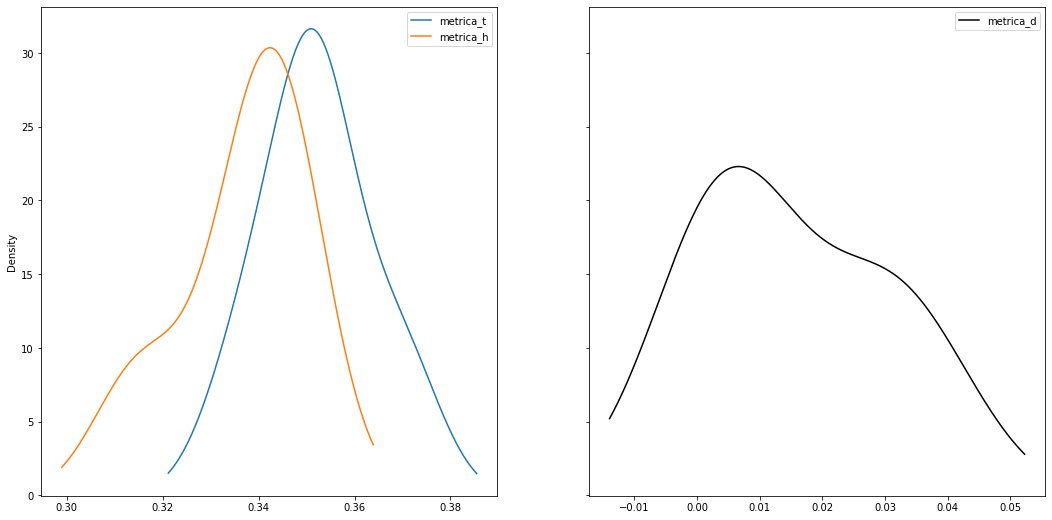

In [627]:
f, ((ax1,ax2)) = plt.subplots(figsize=(18, 9), ncols=2, sharey=True)

pd.DataFrame(skf_dict).T[['metrica_t','metrica_h']].plot(kind='kde', ax=ax1)
pd.DataFrame(skf_dict).T[['metrica_d']].plot(kind='kde', ax=ax2, c='k')

- - -

In [628]:
X = x_[accept].copy()
y = yy.copy()

model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

metrica = fbeta_score( y , y_pred, beta=0.333, average="micro" )

print(classification_report(y, y_pred))

[LightGBM] [Warning] lambda_l1 is set=1.1064974237036502, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1064974237036502
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] lambda_l2 is set=0.6954231572059537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6954231572059537
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
              precision    recall  f1-score   support

           0       1.00      0.05      0.10       285
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00       200
           3       0.32      1.00      0.49       4

In [629]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for c in sorted(np.unique(y)):
    mask = np.argwhere(y == c)
    fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
    roc_auc[c] = auc(fpr[c], tpr[c])

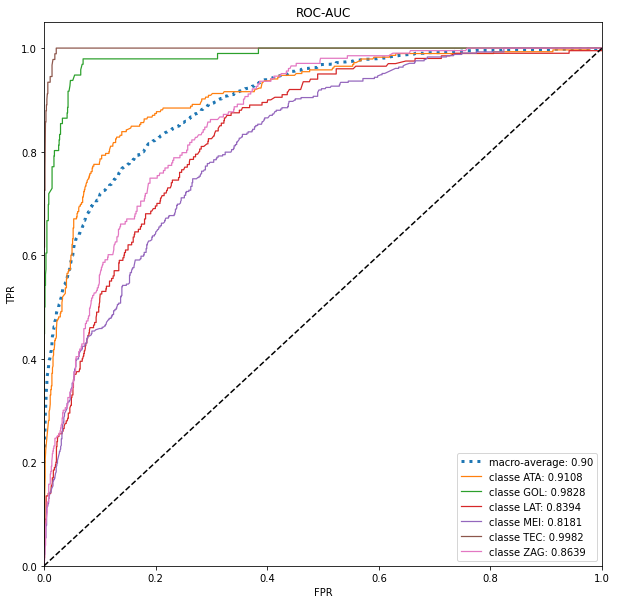

In [630]:
n_classes = len( sorted(np.unique(y)) )

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

f, ((ax1)) = plt.subplots(figsize=(10, 10))
    
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot( fpr["macro"], tpr["macro"],
    label = "macro-average: {0:0.2f}".format(roc_auc["macro"]),
    linestyle = ":", linewidth = 3)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
            label=rf"classe {str(depara[i])}: {round(roc_auc[i], 4)}",
            linewidth = 1.23)

plt.plot([0, 1], [0, 1], "k--",)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC")
plt.legend(loc="lower right")
plt.show()

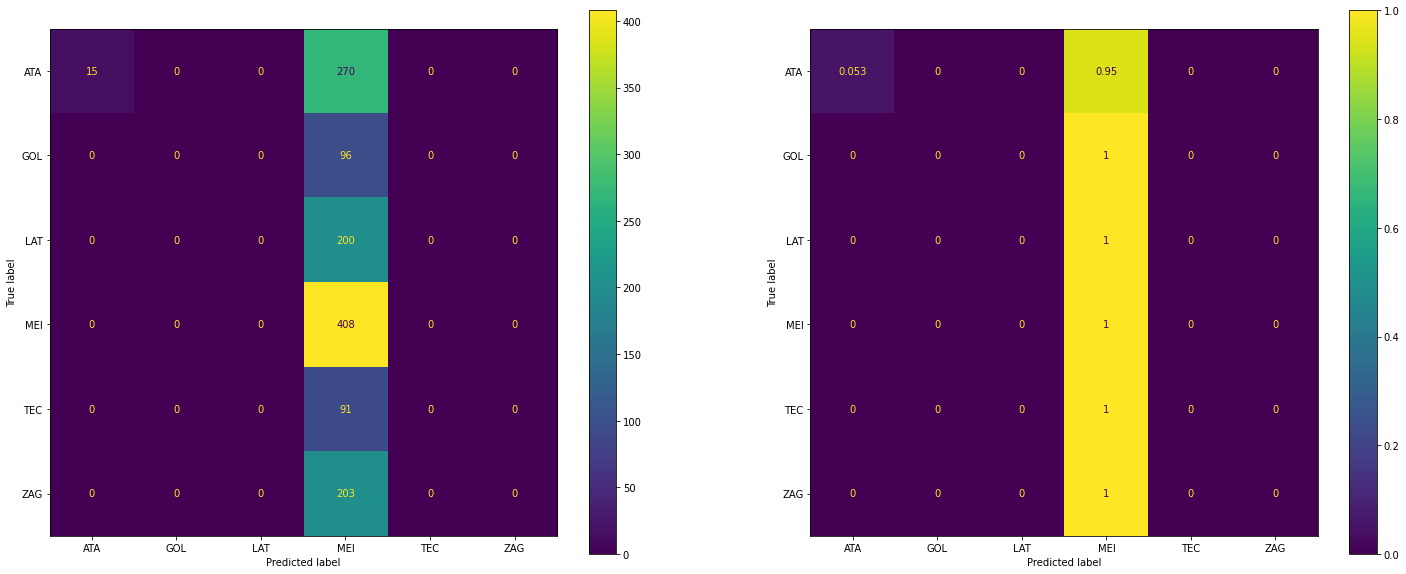

In [631]:
f, ((ax1, ax2)) = plt.subplots(figsize=(25, 10), ncols=2)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[depara[i] for i in range(len(depara))])
disp.plot(ax=ax1)

cm = confusion_matrix(y, y_pred, normalize='true' )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[depara[i] for i in range(len(depara))])
disp.plot(ax=ax2)
plt.show()

#### por fold

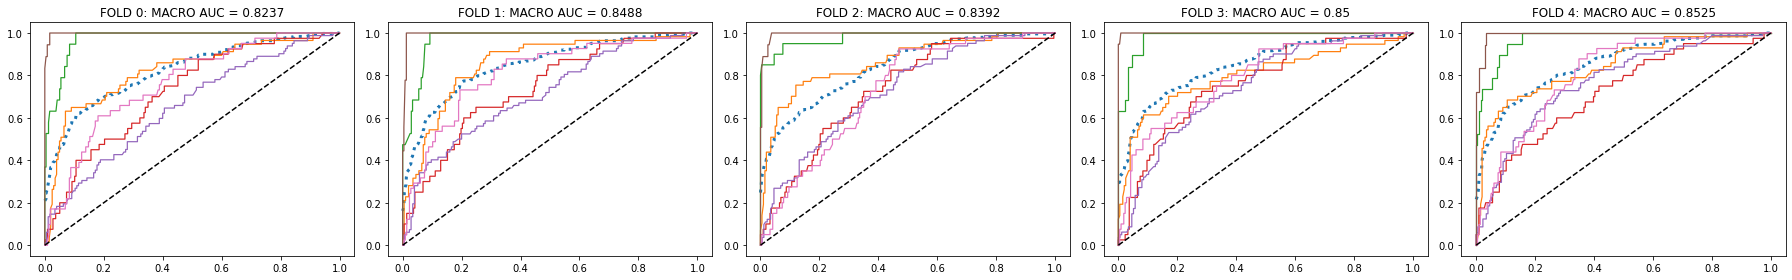

In [632]:
n_classes = len( sorted(np.unique(y)) )

# f, (axs) = plt.subplots(figsize=(25, 25), nrows=n_classes+1, ncols=len(skf_dict))
f, (axs) = plt.subplots(figsize=(25, 4), nrows=1, ncols=len(skf_dict))

for key in sorted(skf_dict):
    y = skf_dict[key]['df']['true'].values
    y_pred = skf_dict[key]['df']['pred'].values
    y_prob = skf_dict[key]['prob']
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for c in sorted(np.unique(y)):
        mask = np.argwhere(y == c)
        fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
        roc_auc[c] = auc(fpr[c], tpr[c])
        
    n_classes = len( sorted(np.unique(y)) )

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    axs[int(key)].plot( fpr["macro"], tpr["macro"],
        label = "macro-average: {0:0.2f}".format(roc_auc["macro"]),
        linestyle = ":", linewidth = 3)

    for i in range(n_classes):
        axs[int(key)].plot(fpr[i], tpr[i],
                label=rf"classe {str(depara[i])}: {round(roc_auc[i], 4)}",
                linewidth = 1.23 )
#         axs[i+1][int(key)].plot(fpr[i], tpr[i], linewidth = 1.23 )

    axs[int(key)].plot([0, 1], [0, 1], "k--")
    axs[int(key)].set_title( rf"FOLD {key}: MACRO AUC = {round(roc_auc['macro'], 4)}" )
    
# for i in range(n_classes):
#     axs[i+1][0].set_ylabel(depara[i])

#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("FPR")
#     plt.ylabel("TPR")
#     plt.title(rf"ROC-AUC: FOLD {key}")
#     plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#### por classe

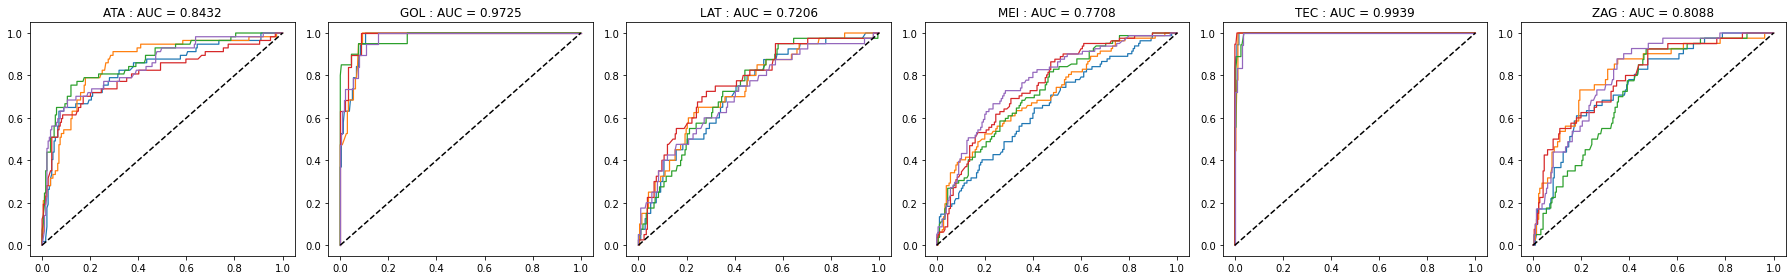

In [633]:
n_classes = len( sorted(np.unique(y)) )

f, (axs) = plt.subplots(figsize=(25, 4), nrows=1, ncols=n_classes)

for key in sorted(skf_dict):
    y = skf_dict[key]['df']['true'].values
    y_pred = skf_dict[key]['df']['pred'].values
    y_prob = skf_dict[key]['prob']
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for c in sorted(np.unique(y)):
        mask = np.argwhere(y == c)
        fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
        roc_auc[c] = auc(fpr[c], tpr[c])
        
    n_classes = len( sorted(np.unique(y)) )

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    for i in range(n_classes):
        axs[i].plot(fpr[i], tpr[i], linewidth = 1.23 )
    
for c in range(n_classes):
    axs[c].plot([0, 1], [0, 1], "k--")
    
    mean_auc = list()
    for key in sorted(skf_dict):
        mask = np.argwhere(y == c)
        fpr, tpr, _ = roc_curve((y == c), y_prob[:,c].ravel())
        mean_auc.append( auc(fpr, tpr) )
    
    axs[c].set_title(rf"{depara[c]} : AUC = {round(np.mean(mean_auc), 4)}")
    

#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("FPR")
#     plt.ylabel("TPR")
#     plt.title(rf"ROC-AUC: FOLD {key}")
#     plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### lightgbm -> `precision_score` -> $k \in [0, 3]$, produto

In [634]:
def otimizador(X_train, X_holdout, y_train, y_holdout, trial):
    
    bagging_freq            = trial.suggest_int('bagging_freq',1,10),
    min_data_in_leaf        = trial.suggest_int('min_data_in_leaf',2,100),
    max_depth               = trial.suggest_int('max_depth',1,20),
    learning_rate           = trial.suggest_loguniform('learning_rate',0.001,0.1),
    num_leaves              = trial.suggest_int('num_leaves',2,70),
    num_threads             = trial.suggest_int('num_threads',1,10),
    min_sum_hessian_in_leaf = trial.suggest_int('min_sum_hessian_in_leaf',1,10)
    lambda_l1               = trial.suggest_loguniform('lambda_l1', 0.1, 2),
    lambda_l2               = trial.suggest_loguniform('lambda_l2', 0.1, 2)

    model = lgb.LGBMClassifier(
                                random_state = 31,
                                verbosity    = -1,
                                bagging_seed = 13,
                                boost_from_average = 'true',
                                boost              = 'gbdt',
                                metric             = 'multi_logloss',
                                bagging_freq            = bagging_freq ,
                                min_data_in_leaf        = min_data_in_leaf,
                                max_depth               = max_depth,
                                learning_rate           = learning_rate,
                                num_leaves              = num_leaves,
                                num_threads             = num_threads,
                                min_sum_hessian_in_leaf = min_sum_hessian_in_leaf,
                                lambda_l1               = lambda_l1,
                                lambda_l2               = lambda_l2
                                )

    model.fit(X_train, y_train)

    y_pred_train   = model.predict(X_train)
    y_pred_holdout = model.predict(X_holdout)

    c = 0
    acc_t_1 = precision_score( y_train == c , y_pred_train == c )
    acc_h_1 = precision_score( y_holdout == c , y_pred_holdout == c )
    acc_d_1 = acc_t_1-acc_h_1
    
    c = 3
    acc_t_2 = precision_score( y_train == c , y_pred_train == c )
    acc_h_2 = precision_score( y_holdout == c , y_pred_holdout == c )
    acc_d_2 = acc_t_2-acc_h_2

    # return accuracy_score(y_holdout, y_pred_holdout)
    # return 1/delta
    # return fbeta_score(y_holdout, y_pred_holdout, beta=2.0, average="macro")
    return acc_h_1*acc_h_2, acc_d_1*acc_d_2

In [635]:
# lb_study = optuna.create_study(direction='maximize')
lb_study = optuna.create_study(directions=["maximize", "minimize"])

[I 2022-01-09 13:59:34,689] A new study created in memory with name: no-name-d16e00bc-636a-4264-a9cf-4c113d679378


In [636]:
skf = StratifiedKFold(n_splits=3, shuffle=True)

for train_index, test_index in skf.split(x_[accept], yy):
    Xt, Xh = x_.iloc[train_index][accept], x_.iloc[test_index][accept]
    yt, yh = yy[train_index], yy[test_index]
    
    lb_study.optimize(functools.partial(otimizador, Xt, Xh, yt, yh), n_trials = 100)

[I 2022-01-09 13:59:40,127] Trial 0 finished with values: [0.2649793388429752, 0.0004456364694758048] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 39, 'max_depth': 16, 'learning_rate': 0.006655107225836428, 'num_leaves': 4, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.48084586347110614, 'lambda_l2': 0.17154245140411242}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.48084586347110614, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.48084586347110614
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.17154245140411242, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17154245140411242
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:59:40,264] Trial 1 finished with values: [0.29579088987122815, 0.004461365441957885] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 66, 'max_depth': 5, 'learning_rate': 0.009664909383468817, 'num_leaves': 68, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.2145264587894584, 'lambda_l2': 1.7673079102628377}. 
[I 2022-01-09 13:59:40,342] Trial 2 finished with values: [0.36212775630825184, 0.0037278326844843966] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 88, 'max_depth': 20, 'learning_rate': 0.01735343292201374, 'num_leaves': 26, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.0713932723978532, 'lambda_l2': 0.14863649912130872}. 
[I 2022-01-09 13:59:40,424] Trial 3 finished with values: [0.34444444444444444, 0.05157131989592721] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 91, 'max_depth': 17, 'learning_rate': 0.08673806173906265, 'num_leaves': 21, 'num_threads': 3, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0713932723978532, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0713932723978532
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.14863649912130872, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14863649912130872
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:40,516] Trial 4 finished with values: [0.28998194945848377, 0.001480919130146161] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 66, 'max_depth': 7, 'learning_rate': 0.005934220885512727, 'num_leaves': 38, 'num_threads': 3, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.254338057613033, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 13:59:40,636] Trial 5 finished with values: [0.3403988603988604, 0.018136869486983898] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 99, 'max_depth': 10, 'learning_rate': 0.03421189695534858, 'num_leaves': 67, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.16317791861555866, 'lambda_l2': 1.3186380683383974}. 
[I 2022-01-09 13:59:40,718] Trial 6 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 58, 'max_depth': 2, 'learning_rate': 0.0010527337509877107, 'num_leaves': 39, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.10981157672534653, 'lambda_l2': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.16317791861555866, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16317791861555866
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.3186380683383974, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3186380683383974
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:40,759] Trial 7 finished with values: [0.35232668566001896, 0.0028927166615509248] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 64, 'max_depth': 1, 'learning_rate': 0.09795989337830471, 'num_leaves': 32, 'num_threads': 9, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.16865978288506006, 'lambda_l2': 0.7548598274136444}. 
[I 2022-01-09 13:59:40,880] Trial 8 finished with values: [0.3071284125379171, 0.1357221596942439] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 11, 'max_depth': 5, 'learning_rate': 0.07804160546548819, 'num_leaves': 68, 'num_threads': 3, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.8047522302441368, 'lambda_l2': 1.6313427782836132}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.16865978288506006, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16865978288506006
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.7548598274136444, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7548598274136444
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:40,975] Trial 9 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 77, 'max_depth': 15, 'learning_rate': 0.0010577726708872093, 'num_leaves': 32, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.4140027006811848, 'lambda_l2': 0.13801090210587044}. 
[I 2022-01-09 13:59:41,038] Trial 10 finished with values: [0.333710407239819, 0.006977769251763259] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 99, 'max_depth': 3, 'learning_rate': 0.024040424846975005, 'num_leaves': 46, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.9269983894289082, 'lambda_l2': 0.1364960474260107}. 
[I 2022-01-09 13:59:41,124] Trial 11 finished with values: [0.2394736842105263, 4.129515652180603e-05] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 92, 'max_depth': 12, 'learning_rate': 0.0037547816496836376, 'num_leaves': 70, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.1270492466041285, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.9269983894289082, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9269983894289082
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.1364960474260107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1364960474260107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:41,235] Trial 12 finished with values: [0.32914193200215863, 0.014651959741004531] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 50, 'max_depth': 18, 'learning_rate': 0.0149733817340372, 'num_leaves': 54, 'num_threads': 8, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.5627727011776344, 'lambda_l2': 0.715723728222081}. 
[I 2022-01-09 13:59:41,404] Trial 13 finished with values: [0.2593220338983051, 0.004479711105972515] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 33, 'max_depth': 18, 'learning_rate': 0.004325025891207628, 'num_leaves': 30, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.3624501055481415, 'lambda_l2': 0.9754995000492679}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.3624501055481415, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3624501055481415
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.9754995000492679, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9754995000492679
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:41,492] Trial 14 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 77, 'max_depth': 14, 'learning_rate': 0.001203989398265767, 'num_leaves': 25, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.18264903257483234, 'lambda_l2': 0.6792496655098924}. 
[I 2022-01-09 13:59:41,585] Trial 15 finished with values: [0.3033910533910534, 0.000839192621820254] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 65, 'max_depth': 20, 'learning_rate': 0.006954727730897253, 'num_leaves': 52, 'num_threads': 9, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.1792083279134486, 'lambda_l2': 0.5633852125076968}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1792083279134486, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1792083279134486
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.5633852125076968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5633852125076968
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:41,717] Trial 16 finished with values: [0.3396921017402945, 0.0168362059928325] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 38, 'max_depth': 12, 'learning_rate': 0.01627030092092295, 'num_leaves': 66, 'num_threads': 4, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.0027612392582088, 'lambda_l2': 0.8465462152065146}. 
[I 2022-01-09 13:59:41,796] Trial 17 finished with values: [0.3560549313358302, 0.05284886557894089] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 96, 'max_depth': 19, 'learning_rate': 0.08258799292181315, 'num_leaves': 10, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.5903851069226406, 'lambda_l2': 0.9553879397282119}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5903851069226406, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5903851069226406
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.9553879397282119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9553879397282119
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:41,925] Trial 18 finished with values: [0.33736973860394714, 0.0821252824020714] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 17, 'max_depth': 5, 'learning_rate': 0.03975241084560602, 'num_leaves': 31, 'num_threads': 8, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.7084032837471421, 'lambda_l2': 1.6929369986081968}. 
[I 2022-01-09 13:59:41,962] Trial 19 finished with values: [0.2112290179432761, 8.071239242171205e-05] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 5, 'max_depth': 1, 'learning_rate': 0.004177227719545436, 'num_leaves': 58, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.20853517351922118, 'lambda_l2': 0.9302733462474605}. 
[I 2022-01-09 13:59:42,013] Trial 20 finished with values: [0.23255717255717254, 0.00010080649025882363] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 96, 'max_depth': 2, 'learning_rate': 0.00480569432653705, 'num_leaves': 14, 'num_threads': 4, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.20853517351922118, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.20853517351922118
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.9302733462474605, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9302733462474605
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:42,244] Trial 22 finished with values: [0.28351911888795134, 0.005919093608308743] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 53, 'max_depth': 17, 'learning_rate': 0.008130886300851773, 'num_leaves': 27, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.6406870295995939, 'lambda_l2': 1.032144617890486}. 
[I 2022-01-09 13:59:42,331] Trial 23 finished with values: [0.3548196333530455, 0.035450748918292606] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 14, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 5, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.5050713532825716, 'lambda_l2': 0.8850331513985964}. 
[I 2022-01-09 13:59:42,419] Trial 24 finished with values: [0.31409358363687306, 0.00018609190440863735] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 76, 'max_depth': 13, 'learning_rate': 0.007422031895741689, 'num_leaves': 14, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5050713532825716, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5050713532825716
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.8850331513985964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8850331513985964
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:42,560] Trial 25 finished with values: [0.35783714568418606, 0.00839120454340226] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 74, 'max_depth': 18, 'learning_rate': 0.015687040771223352, 'num_leaves': 38, 'num_threads': 1, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.41475344792440144, 'lambda_l2': 0.26508579537249816}. 
[I 2022-01-09 13:59:42,672] Trial 26 finished with values: [0.3276429325221926, 0.0940534067804666] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 81, 'max_depth': 19, 'learning_rate': 0.08493234516439595, 'num_leaves': 8, 'num_threads': 2, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.12702474876178582, 'lambda_l2': 0.10735062304780843}. 
[I 2022-01-09 13:59:42,759] Trial 27 finished with values: [0.21125590179414544, 0.00016145053799006937] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 92, 'max_depth': 20, 'learning_rate': 0.0030173469429505603, 'num_leaves': 65, 'num_threads': 4, 'min_sum_hessian_in_leaf': 10, 'lambda

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.12702474876178582, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12702474876178582
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10735062304780843, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10735062304780843
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:59:42,827] Trial 28 finished with values: [0.3423879491295222, 0.037142791593576766] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 97, 'max_depth': 3, 'learning_rate': 0.08051413494266872, 'num_leaves': 31, 'num_threads': 5, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.3625842117059765, 'lambda_l2': 0.1877915037623242}. 
[I 2022-01-09 13:59:42,899] Trial 29 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 100, 'max_depth': 8, 'learning_rate': 0.0012030180866976032, 'num_leaves': 43, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.5555369429654036, 'lambda_l2': 0.11794978063272993}. 


[LightGBM] [Warning] lambda_l1 is set=0.3625842117059765, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3625842117059765
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.1877915037623242, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1877915037623242
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5555369429654036, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5555369429654036
[LightGBM] [Warn

[I 2022-01-09 13:59:43,024] Trial 30 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 75, 'max_depth': 19, 'learning_rate': 0.0010530550839629945, 'num_leaves': 64, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.3569782239397012, 'lambda_l2': 1.1357813460005337}. 
[I 2022-01-09 13:59:43,096] Trial 31 finished with values: [0.27321594068582017, 0.00014225311912410723] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 72, 'max_depth': 3, 'learning_rate': 0.0015914204459104415, 'num_leaves': 41, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.635182447533427, 'lambda_l2': 1.0514519667974265}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.635182447533427, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.635182447533427
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.0514519667974265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0514519667974265
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:59:43,245] Trial 32 finished with values: [0.2876254180602007, 0.1564322389184606] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 8, 'max_depth': 6, 'learning_rate': 0.06133436830650224, 'num_leaves': 70, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.3197975870075482, 'lambda_l2': 1.1123808345871689}. 
[I 2022-01-09 13:59:43,337] Trial 33 finished with values: [0.2562486693634235, 0.0020497614724395417] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 72, 'max_depth': 9, 'learning_rate': 0.0039039700634772466, 'num_leaves': 27, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.22266291140254135, 'lambda_l2': 0.42699084750261973}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.22266291140254135, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22266291140254135
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.42699084750261973, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.42699084750261973
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:59:43,482] Trial 34 finished with values: [0.25180293331172515, 0.007996396294610861] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 8, 'max_depth': 6, 'learning_rate': 0.004941718625678975, 'num_leaves': 46, 'num_threads': 2, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.38301670647180613, 'lambda_l2': 1.7378699045619774}. 
[I 2022-01-09 13:59:43,611] Trial 35 finished with values: [0.27062937062937065, 0.0007947284646313762] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 40, 'max_depth': 6, 'learning_rate': 0.0025356777549536886, 'num_leaves': 50, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.6475799721238582, 'lambda_l2': 0.21562213714506537}. 
[I 2022-01-09 13:59:43,673] Trial 36 finished with values: [0.3398692810457516, 0.023171596100208133] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 7, 'max_depth': 2, 'learning_rate': 0.05305675682472422, 'num_leaves': 53, 'num_threads': 8, 'min_sum_hessian_in_leaf': 1, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.6475799721238582, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6475799721238582
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.21562213714506537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21562213714506537
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:43,761] Trial 37 finished with values: [0.27485578554462164, 0.0002423402035028153] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 75, 'max_depth': 9, 'learning_rate': 0.001538207693270175, 'num_leaves': 70, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.11205466177847821}. 
[I 2022-01-09 13:59:43,857] Trial 38 finished with values: [0.361419325011558, 0.008190438651603708] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.01842612740052784, 'num_leaves': 58, 'num_threads': 4, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.563884054830136, 'lambda_l2': 0.9694299661767816}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.563884054830136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.563884054830136
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.9694299661767816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9694299661767816
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:59:44,005] Trial 39 finished with values: [0.3382721677684067, 0.019915550466603447] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 48, 'max_depth': 20, 'learning_rate': 0.01641108138456014, 'num_leaves': 15, 'num_threads': 2, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.10035192804302775, 'lambda_l2': 0.6932611092216163}. 
[I 2022-01-09 13:59:44,046] Trial 40 finished with values: [0.3185011709601874, 0.0003725159894271135] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 73, 'max_depth': 1, 'learning_rate': 0.0021752234445986543, 'num_leaves': 58, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.11095507633167968, 'lambda_l2': 0.6379624056946409}. 
[I 2022-01-09 13:59:44,135] Trial 41 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 56, 'max_depth': 5, 'learning_rate': 0.001129582179660552, 'num_leaves': 56, 'num_threads': 5, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.933845263497358, 'lambda_l2'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11095507633167968, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11095507633167968
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.6379624056946409, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6379624056946409
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:44,240] Trial 42 finished with values: [0.3211485642946317, 0.010257768966978553] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 38, 'max_depth': 18, 'learning_rate': 0.015845470701074525, 'num_leaves': 6, 'num_threads': 2, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.4086766867807491, 'lambda_l2': 0.8402237422308029}. 
[I 2022-01-09 13:59:44,365] Trial 43 finished with values: [0.2542005420054201, 0.00035733690670239565] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 30, 'max_depth': 18, 'learning_rate': 0.0014741404663381205, 'num_leaves': 53, 'num_threads': 6, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.14508430207415451, 'lambda_l2': 1.0173221431430137}. 
[I 2022-01-09 13:59:44,433] Trial 44 finished with values: [0.25822701185020025, 0.00047014446269223243] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 97, 'max_depth': 3, 'learning_rate': 0.006172520372424706, 'num_leaves': 15, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.14508430207415451, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14508430207415451
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.0173221431430137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0173221431430137
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:44,551] Trial 45 finished with values: [0.21125590179414544, 0.00011177985209417482] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 81, 'max_depth': 17, 'learning_rate': 0.002755367533456831, 'num_leaves': 23, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.4490541121304216, 'lambda_l2': 1.6326350873604245}. 
[I 2022-01-09 13:59:44,713] Trial 46 finished with values: [0.2578084997439836, 0.009337304856666027] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 7, 'max_depth': 13, 'learning_rate': 0.00592896789204578, 'num_leaves': 55, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.8623666194235233, 'lambda_l2': 0.702851050178738}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.8623666194235233, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8623666194235233
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.702851050178738, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.702851050178738
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:59:44,939] Trial 47 finished with values: [0.3019480519480519, 0.12764627351994562] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 13, 'max_depth': 10, 'learning_rate': 0.016887182229274718, 'num_leaves': 47, 'num_threads': 9, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.3438050947678197, 'lambda_l2': 0.42452224435778785}. 
[I 2022-01-09 13:59:45,053] Trial 48 finished with values: [0.31330718954248366, 0.013525832555244319] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 46, 'max_depth': 9, 'learning_rate': 0.011843797594931274, 'num_leaves': 31, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.1541688223420526, 'lambda_l2': 0.611878824649322}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1541688223420526, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1541688223420526
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.611878824649322, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.611878824649322
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] 

[I 2022-01-09 13:59:45,175] Trial 49 finished with values: [0.28712675499307894, -8.064143409526544e-07] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 42, 'max_depth': 15, 'learning_rate': 0.001857172656027269, 'num_leaves': 49, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.10643263494021651, 'lambda_l2': 0.7892666713463418}. 
[I 2022-01-09 13:59:45,295] Trial 50 finished with values: [0.2073116028708134, 0.0002138445707825422] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 81, 'max_depth': 17, 'learning_rate': 0.002755367533456831, 'num_leaves': 23, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.5555369429654036, 'lambda_l2': 0.18511777333110918}. 
[I 2022-01-09 13:59:45,373] Trial 51 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 77, 'max_depth': 14, 'learning_rate': 0.001203989398265767, 'num_leaves': 25, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.18264903257483234, 'lam

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5555369429654036, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5555369429654036
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.18511777333110918, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18511777333110918
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:45,441] Trial 52 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 92, 'max_depth': 20, 'learning_rate': 0.0010577726708872093, 'num_leaves': 33, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.8153861221699769, 'lambda_l2': 0.3012381440198894}. 
[I 2022-01-09 13:59:45,511] Trial 53 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 91, 'max_depth': 17, 'learning_rate': 0.0014741404663381205, 'num_leaves': 21, 'num_threads': 3, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.4455166245247357, 'lambda_l2': 0.6573990066131437}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.4455166245247357, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4455166245247357
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.6573990066131437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6573990066131437
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:45,651] Trial 54 finished with values: [0.2542005420054201, 0.00035733690670239565] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 7, 'max_depth': 18, 'learning_rate': 0.0014741404663381205, 'num_leaves': 53, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.13555437212719562, 'lambda_l2': 1.0173221431430137}. 
[I 2022-01-09 13:59:45,697] Trial 55 finished with values: [0.23255717255717254, 0.00010080649025882363] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 96, 'max_depth': 2, 'learning_rate': 0.00480569432653705, 'num_leaves': 14, 'num_threads': 4, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.8486242247105013, 'lambda_l2': 0.10589633542928278}. 
[I 2022-01-09 13:59:45,763] Trial 56 finished with values: [0.21350587876011604, 6.170263426028545e-05] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 95, 'max_depth': 19, 'learning_rate': 0.0026064797968851435, 'num_leaves': 66, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'la

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8486242247105013, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8486242247105013
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.10589633542928278, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10589633542928278
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:45,908] Trial 58 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 97, 'max_depth': 3, 'learning_rate': 0.001009066456503163, 'num_leaves': 14, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.3856982167146441, 'lambda_l2': 0.10589633542928278}. 
[I 2022-01-09 13:59:46,016] Trial 59 finished with values: [0.33337449067786146, 0.08591718353294558] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 75, 'max_depth': 19, 'learning_rate': 0.08258799292181315, 'num_leaves': 64, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.5903851069226406, 'lambda_l2': 1.1357813460005337}. 


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.10589633542928278, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10589633542928278
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5903851069226406, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5903851069226406
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1

[I 2022-01-09 13:59:46,155] Trial 60 finished with values: [0.32052432216905896, 0.0030108688169082024] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 72, 'max_depth': 19, 'learning_rate': 0.009664909383468817, 'num_leaves': 68, 'num_threads': 1, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.2145264587894584, 'lambda_l2': 1.0514519667974265}. 
[I 2022-01-09 13:59:46,249] Trial 61 finished with values: [0.2419047619047619, 0.000523416884934862] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 72, 'max_depth': 6, 'learning_rate': 0.0025356777549536886, 'num_leaves': 50, 'num_threads': 9, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.6475799721238582, 'lambda_l2': 0.9694299661767816}. 
[I 2022-01-09 13:59:46,310] Trial 62 finished with values: [0.32954545454545453, 0.02161100672181006] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 7, 'max_depth': 2, 'learning_rate': 0.05305675682472422, 'num_leaves': 10, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.6475799721238582, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6475799721238582
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.9694299661767816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9694299661767816
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:46,444] Trial 63 finished with values: [0.2987551867219917, 0.004655581564565918] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 66, 'max_depth': 20, 'learning_rate': 0.009664909383468817, 'num_leaves': 68, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.10035192804302775, 'lambda_l2': 1.7673079102628377}. 
[I 2022-01-09 13:59:46,519] Trial 64 finished with values: [0.34468037299179866, 0.01282090750980446] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 76, 'max_depth': 3, 'learning_rate': 0.03421189695534858, 'num_leaves': 67, 'num_threads': 8, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.3625842117059765, 'lambda_l2': 1.3186380683383974}. 
[I 2022-01-09 13:59:46,599] Trial 65 finished with values: [0.2807631874298541, 0.0010041753914009411] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 95, 'max_depth': 20, 'learning_rate': 0.006954727730897253, 'num_leaves': 52, 'num_threads': 9, 'min_sum_hessian_in_leaf': 3, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3625842117059765, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3625842117059765
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.3186380683383974, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3186380683383974
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:46,696] Trial 66 finished with values: [0.2975206611570248, 0.004705140329026696] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 66, 'max_depth': 6, 'learning_rate': 0.009664909383468817, 'num_leaves': 68, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.2145264587894584, 'lambda_l2': 1.7673079102628377}. 
[I 2022-01-09 13:59:46,817] Trial 67 finished with values: [0.27246575342465756, 0.009393279889663474] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 17, 'max_depth': 5, 'learning_rate': 0.005362891633103923, 'num_leaves': 51, 'num_threads': 4, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.11095507633167968, 'lambda_l2': 1.6929369986081968}. 
[I 2022-01-09 13:59:46,891] Trial 68 finished with values: [0.26822963095025854, 0.0008935787434551681] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 100, 'max_depth': 7, 'learning_rate': 0.005934220885512727, 'num_leaves': 38, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11095507633167968, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11095507633167968
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.6929369986081968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6929369986081968
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:46,983] Trial 69 finished with values: [0.243804537521815, 0.0008602690153051711] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 62, 'max_depth': 8, 'learning_rate': 0.0027017674729732993, 'num_leaves': 43, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.5555369429654036, 'lambda_l2': 0.11794978063272993}. 
[I 2022-01-09 13:59:47,123] Trial 70 finished with values: [0.3032950939711984, 0.006223920073741379] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 66, 'max_depth': 7, 'learning_rate': 0.009664909383468817, 'num_leaves': 38, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.254338057613033, 'lambda_l2': 0.31953667037240757}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.254338057613033, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.254338057613033
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.31953667037240757, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31953667037240757
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:47,348] Trial 71 finished with values: [0.3019480519480519, 0.12764627351994562] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 13, 'max_depth': 10, 'learning_rate': 0.016887182229274718, 'num_leaves': 47, 'num_threads': 9, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.3438050947678197, 'lambda_l2': 0.42452224435778785}. 
[I 2022-01-09 13:59:47,431] Trial 72 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 75, 'max_depth': 8, 'learning_rate': 0.0012030180866976032, 'num_leaves': 33, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.5555369429654036, 'lambda_l2': 0.11205466177847821}. 
[I 2022-01-09 13:59:47,509] Trial 73 finished with values: [0.27485578554462164, 0.0002423402035028153] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 75, 'max_depth': 17, 'learning_rate': 0.001538207693270175, 'num_leaves': 27, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.6406870295995939, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5555369429654036, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5555369429654036
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.11205466177847821, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11205466177847821
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:47,658] Trial 75 finished with values: [0.2570048309178744, 0.00044313108637111093] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 7, 'max_depth': 13, 'learning_rate': 0.001538207693270175, 'num_leaves': 55, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.702851050178738}. 
[I 2022-01-09 13:59:47,734] Trial 76 finished with values: [0.2728264188806003, 0.0004637790502645603] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 97, 'max_depth': 3, 'learning_rate': 0.006172520372424706, 'num_leaves': 15, 'num_threads': 2, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.3856982167146441, 'lambda_l2': 0.6932611092216163}. 
[I 2022-01-09 13:59:47,816] Trial 77 finished with values: [0.34544459644322845, 0.006340714083331636] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 88, 'max_depth': 20, 'learning_rate': 0.01735343292201374, 'num_leaves': 52, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3856982167146441, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3856982167146441
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.6932611092216163, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6932611092216163
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:47,944] Trial 78 finished with values: [0.2665322926494553, 0.010291638674833826] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 13, 'max_depth': 10, 'learning_rate': 0.006655107225836428, 'num_leaves': 47, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.48084586347110614, 'lambda_l2': 0.42452224435778785}. 
[I 2022-01-09 13:59:48,062] Trial 79 finished with values: [0.298876404494382, 0.15368584188095188] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 50, 'max_depth': 18, 'learning_rate': 0.08051413494266872, 'num_leaves': 31, 'num_threads': 8, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.5627727011776344, 'lambda_l2': 0.1877915037623242}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5627727011776344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5627727011776344
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.1877915037623242, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1877915037623242
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warni

[I 2022-01-09 13:59:48,285] Trial 80 finished with values: [0.24316797214969538, 0.003969977309112793] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 11, 'max_depth': 15, 'learning_rate': 0.001857172656027269, 'num_leaves': 49, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.10643263494021651, 'lambda_l2': 1.6313427782836132}. 
[I 2022-01-09 13:59:48,377] Trial 81 finished with values: [0.3417085427135678, 0.015654616877433206] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 92, 'max_depth': 18, 'learning_rate': 0.026375408272465983, 'num_leaves': 33, 'num_threads': 3, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.41475344792440144, 'lambda_l2': 0.26508579537249816}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.41475344792440144, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.41475344792440144
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.26508579537249816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.26508579537249816
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:59:48,575] Trial 82 finished with values: [0.3181818181818182, 0.09269987344727174] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 13, 'max_depth': 10, 'learning_rate': 0.016887182229274718, 'num_leaves': 21, 'num_threads': 9, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.3438050947678197, 'lambda_l2': 0.5438582835312347}. 
[I 2022-01-09 13:59:48,659] Trial 83 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 72, 'max_depth': 19, 'learning_rate': 0.0010530550839629945, 'num_leaves': 10, 'num_threads': 9, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.635182447533427, 'lambda_l2': 1.0514519667974265}. 
[I 2022-01-09 13:59:48,754] Trial 84 finished with values: [0.34367593191122603, 0.0036560782467566686] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.011843797594931274, 'num_leaves': 58, 'num_threads': 4, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.563884054830136, 'lambda_l2'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.635182447533427, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.635182447533427
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0514519667974265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0514519667974265
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:59:48,822] Trial 85 finished with values: [0.32623891497130936, 0.0074456613879078275] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 96, 'max_depth': 3, 'learning_rate': 0.024040424846975005, 'num_leaves': 68, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.5903851069226406, 'lambda_l2': 0.9553879397282119}. 
[I 2022-01-09 13:59:48,940] Trial 86 finished with values: [0.21125590179414544, 0.00011177985209417482] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 81, 'max_depth': 17, 'learning_rate': 0.002755367533456831, 'num_leaves': 55, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.4490541121304216, 'lambda_l2': 1.6326350873604245}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.4490541121304216, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4490541121304216
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.6326350873604245, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6326350873604245
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:49,078] Trial 87 finished with values: [0.29464285714285715, 0.009863148288525657] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 38, 'max_depth': 5, 'learning_rate': 0.009664909383468817, 'num_leaves': 68, 'num_threads': 2, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.2145264587894584, 'lambda_l2': 0.8402237422308029}. 
[I 2022-01-09 13:59:49,204] Trial 88 finished with values: [0.3160333642261353, 0.12561085394066532] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 8, 'max_depth': 19, 'learning_rate': 0.08258799292181315, 'num_leaves': 70, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.3197975870075482, 'lambda_l2': 0.9553879397282119}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.3197975870075482, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3197975870075482
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.9553879397282119, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9553879397282119
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:59:49,336] Trial 89 finished with values: [0.3352549889135255, 0.020022694709610187] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 30, 'max_depth': 18, 'learning_rate': 0.01735343292201374, 'num_leaves': 26, 'num_threads': 6, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.0713932723978532, 'lambda_l2': 1.0173221431430137}. 
[I 2022-01-09 13:59:49,435] Trial 90 finished with values: [0.3384625207508619, 0.07705917456991855] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 17, 'max_depth': 5, 'learning_rate': 0.08673806173906265, 'num_leaves': 31, 'num_threads': 3, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.4455166245247357, 'lambda_l2': 0.6573990066131437}. 
[I 2022-01-09 13:59:49,527] Trial 91 finished with values: [0.29579088987122815, 0.004461365441957885] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 66, 'max_depth': 5, 'learning_rate': 0.009664909383468817, 'num_leaves': 68, 'num_threads': 4, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.4455166245247357, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4455166245247357
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.6573990066131437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6573990066131437
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warni

[I 2022-01-09 13:59:49,614] Trial 92 finished with values: [0.31752458068247535, 0.0025086605959598004] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 7, 'max_depth': 20, 'learning_rate': 0.01641108138456014, 'num_leaves': 4, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.10035192804302775, 'lambda_l2': 0.611878824649322}. 
[I 2022-01-09 13:59:49,786] Trial 93 finished with values: [0.25431331953071085, 0.001265885640222866] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 8, 'max_depth': 14, 'learning_rate': 0.001203989398265767, 'num_leaves': 25, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.3197975870075482, 'lambda_l2': 0.12382568655894177}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.3197975870075482, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3197975870075482
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.12382568655894177, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12382568655894177
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:49,921] Trial 94 finished with values: [0.27783072817384674, 0.014550078059321007] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 24, 'max_depth': 13, 'learning_rate': 0.007422031895741689, 'num_leaves': 14, 'num_threads': 6, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.6475799721238582, 'lambda_l2': 0.21562213714506537}. 
[I 2022-01-09 13:59:49,990] Trial 95 finished with values: [0.2922240057071518, 0.00197647549526948] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 72, 'max_depth': 3, 'learning_rate': 0.009664909383468817, 'num_leaves': 41, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.635182447533427, 'lambda_l2': 1.0514519667974265}. 
[I 2022-01-09 13:59:50,077] Trial 96 finished with values: [0.2630800189393939, 0.00034082745559038674] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 73, 'max_depth': 6, 'learning_rate': 0.0021752234445986543, 'num_leaves': 58, 'num_threads': 4, 'min_sum_hessian_in_leaf': 6, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.635182447533427, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.635182447533427
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.0514519667974265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0514519667974265
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:59:50,159] Trial 97 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 77, 'max_depth': 14, 'learning_rate': 0.001203989398265767, 'num_leaves': 32, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.18264903257483234, 'lambda_l2': 0.6792496655098924}. 
[I 2022-01-09 13:59:50,248] Trial 98 finished with values: [0.361419325011558, 0.008190438651603708] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.01842612740052784, 'num_leaves': 58, 'num_threads': 4, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.563884054830136, 'lambda_l2': 0.9694299661767816}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.563884054830136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.563884054830136
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.9694299661767816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9694299661767816
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:59:50,364] Trial 99 finished with values: [0.28329297820823246, -1.967595514141115e-05] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 30, 'max_depth': 5, 'learning_rate': 0.0014741404663381205, 'num_leaves': 53, 'num_threads': 6, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.14508430207415451, 'lambda_l2': 1.7673079102628377}. 
[I 2022-01-09 13:59:50,467] Trial 100 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 77, 'max_depth': 18, 'learning_rate': 0.0014741404663381205, 'num_leaves': 53, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.18264903257483234, 'lambda_l2': 1.0173221431430137}. 
[I 2022-01-09 13:59:50,544] Trial 101 finished with values: [0.2801125373659223, 0.0008889428438058563] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 95, 'max_depth': 20, 'learning_rate': 0.006954727730897253, 'num_leaves': 65, 'num_threads': 9, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.6475799721238582, '

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18264903257483234, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18264903257483234
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0173221431430137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0173221431430137
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:59:50,639] Trial 102 finished with values: [0.37023593466424687, 0.0022125450432678427] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 72, 'max_depth': 18, 'learning_rate': 0.01842612740052784, 'num_leaves': 67, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.563884054830136, 'lambda_l2': 1.3186380683383974}. 
[I 2022-01-09 13:59:50,798] Trial 103 finished with values: [0.2586539698880453, 0.001108475959140755] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 30, 'max_depth': 14, 'learning_rate': 0.0014741404663381205, 'num_leaves': 37, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.14508430207415451, 'lambda_l2': 0.5037040673894849}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.14508430207415451, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14508430207415451
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.5037040673894849, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5037040673894849
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:59:50,875] Trial 104 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 91, 'max_depth': 17, 'learning_rate': 0.0014741404663381205, 'num_leaves': 21, 'num_threads': 3, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.8397932604785864, 'lambda_l2': 0.6573990066131437}. 
[I 2022-01-09 13:59:50,963] Trial 105 finished with values: [0.38091720529393663, 0.0022349238826226718] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.019824090219566055, 'num_leaves': 70, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.11205466177847821}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5990294009248325, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5990294009248325
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.11205466177847821, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11205466177847821
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:51,112] Trial 106 finished with values: [0.39883847549909257, 0.08801753115822837] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 14, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 53, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.23389021093524015, 'lambda_l2': 0.8850331513985964}. 
[I 2022-01-09 13:59:51,214] Trial 107 finished with values: [0.2967525195968645, 0.00027846379534709375] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 77, 'max_depth': 14, 'learning_rate': 0.006954727730897253, 'num_leaves': 32, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.18264903257483234, 'lambda_l2': 0.6792496655098924}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18264903257483234, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18264903257483234
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.6792496655098924, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6792496655098924
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:51,347] Trial 108 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 74, 'max_depth': 18, 'learning_rate': 0.0010577726708872093, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.8153861221699769, 'lambda_l2': 0.26508579537249816}. 
[I 2022-01-09 13:59:51,430] Trial 109 finished with values: [0.2228385683496449, -2.1555126276881153e-05] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 92, 'max_depth': 12, 'learning_rate': 0.0037547816496836376, 'num_leaves': 70, 'num_threads': 3, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.1270492466041285, 'lambda_l2': 0.24893014978855685}. 
[I 2022-01-09 13:59:51,517] Trial 110 finished with values: [0.20454545454545453, 0.0005605970807901242] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 73, 'max_depth': 6, 'learning_rate': 0.0025356777549536886, 'num_leaves': 50, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.6475799721238582,

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1270492466041285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1270492466041285
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.24893014978855685, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24893014978855685
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:51,606] Trial 111 finished with values: [0.3252188052991535, 0.0026226660015427976] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 74, 'max_depth': 19, 'learning_rate': 0.009664909383468817, 'num_leaves': 68, 'num_threads': 8, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.2145264587894584, 'lambda_l2': 0.17154245140411242}. 
[I 2022-01-09 13:59:51,700] Trial 112 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 56, 'max_depth': 12, 'learning_rate': 0.001129582179660552, 'num_leaves': 70, 'num_threads': 5, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.933845263497358, 'lambda_l2': 1.4528709446964085}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.933845263497358, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.933845263497358
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.4528709446964085, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4528709446964085
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:59:51,837] Trial 113 finished with values: [0.36536127964699394, 0.0018456583826003943] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 74, 'max_depth': 18, 'learning_rate': 0.015687040771223352, 'num_leaves': 39, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.2827708965340758, 'lambda_l2': 0.7024236966058891}. 
[I 2022-01-09 13:59:51,897] Trial 114 finished with values: [0.20508744038155804, 0.0008341948164424454] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 97, 'max_depth': 3, 'learning_rate': 0.0026064797968851435, 'num_leaves': 66, 'num_threads': 5, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.3856982167146441, 'lambda_l2': 0.8465462152065146}. 
[I 2022-01-09 13:59:51,959] Trial 115 finished with values: [0.257573354480571, 0.0004425902227764914] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 97, 'max_depth': 3, 'learning_rate': 0.006327064352721408, 'num_leaves': 58, 'num_threads': 3, 'min_sum_hessian_in_leaf': 2, 'lambd

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3856982167146441, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3856982167146441
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.8465462152065146, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8465462152065146
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:52,119] Trial 117 finished with values: [0.330120232172471, 0.0026070282857541672] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.011843797594931274, 'num_leaves': 58, 'num_threads': 4, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.563884054830136, 'lambda_l2': 0.611878824649322}. 
[I 2022-01-09 13:59:52,195] Trial 118 finished with values: [0.33262475959105176, -0.00016962790366685065] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 7, 'max_depth': 20, 'learning_rate': 0.01641108138456014, 'num_leaves': 4, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.10035192804302775, 'lambda_l2': 0.611878824649322}. 
[I 2022-01-09 13:59:52,264] Trial 119 finished with values: [0.41566140483904324, 0.0015639090235836633] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 97, 'max_depth': 3, 'learning_rate': 0.058972445965760026, 'num_leaves': 5, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.10035192804302775, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10035192804302775
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.611878824649322, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.611878824649322
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:59:52,452] Trial 120 finished with values: [0.26101769425211563, 0.006774554246648468] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 14, 'max_depth': 6, 'learning_rate': 0.0025356777549536886, 'num_leaves': 50, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.6475799721238582, 'lambda_l2': 0.21562213714506537}. 
[I 2022-01-09 13:59:52,486] Trial 121 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 14, 'max_depth': 11, 'learning_rate': 0.001009066456503163, 'num_leaves': 2, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.3856982167146441, 'lambda_l2': 0.8850331513985964}. 
[I 2022-01-09 13:59:52,610] Trial 122 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 75, 'max_depth': 19, 'learning_rate': 0.0010530550839629945, 'num_leaves': 14, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.3569782239397012, 'lambda_l2': 0.10589633542928278}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3856982167146441, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3856982167146441
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.8850331513985964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8850331513985964
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:52,726] Trial 123 finished with values: [0.20980926430517713, 0.002122765994452887] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 40, 'max_depth': 6, 'learning_rate': 0.0025356777549536886, 'num_leaves': 32, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.16865978288506006, 'lambda_l2': 0.7548598274136444}. 
[I 2022-01-09 13:59:52,810] Trial 124 finished with values: [0.32848597359735976, 0.0025910213418126565] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 72, 'max_depth': 19, 'learning_rate': 0.011598709551761115, 'num_leaves': 70, 'num_threads': 9, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.563884054830136, 'lambda_l2': 0.16785932926970004}. 
[I 2022-01-09 13:59:52,875] Trial 125 finished with values: [0.4033045175683212, 0.00744032684855365] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 65, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 5, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lambd

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.563884054830136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.563884054830136
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.16785932926970004, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.16785932926970004
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:52,986] Trial 127 finished with values: [0.31897926634768736, 0.00014568210459007323] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 77, 'max_depth': 14, 'learning_rate': 0.009664909383468817, 'num_leaves': 25, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.254338057613033, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 13:59:53,054] Trial 128 finished with values: [0.25081885856079406, 0.00040331117254194194] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 33, 'max_depth': 3, 'learning_rate': 0.0014741404663381205, 'num_leaves': 53, 'num_threads': 2, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.13555437212719562, 'lambda_l2': 1.5350892882779408}. 
[I 2022-01-09 13:59:53,119] Trial 129 finished with values: [0.3869428750784683, -0.0024835149870448617] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 76, 'max_depth': 3, 'learning_rate': 0.03421189695534858, 'num_leaves': 67, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, '

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13555437212719562, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13555437212719562
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.5350892882779408, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5350892882779408
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 13:59:53,215] Trial 130 finished with values: [0.24338942307692307, 0.0008216198339373478] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 42, 'max_depth': 8, 'learning_rate': 0.0012030180866976032, 'num_leaves': 43, 'num_threads': 3, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.10643263494021651, 'lambda_l2': 0.7892666713463418}. 
[I 2022-01-09 13:59:53,344] Trial 131 finished with values: [0.3664069264069264, 0.0014188114203194822] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 81, 'max_depth': 17, 'learning_rate': 0.01735343292201374, 'num_leaves': 55, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.4490541121304216, 'lambda_l2': 0.5633852125076968}. 
[I 2022-01-09 13:59:53,409] Trial 132 finished with values: [0.28435955056179774, 0.0009635387266312828] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 76, 'max_depth': 3, 'learning_rate': 0.007422031895741689, 'num_leaves': 68, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lamb

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.4490541121304216, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4490541121304216
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.5633852125076968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5633852125076968
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:53,518] Trial 133 finished with values: [0.21901128762541802, 0.0015010846149440136] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 40, 'max_depth': 6, 'learning_rate': 0.0025356777549536886, 'num_leaves': 35, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.6475799721238582, 'lambda_l2': 0.21562213714506537}. 
[I 2022-01-09 13:59:53,628] Trial 134 finished with values: [0.21901128762541802, 0.0015010846149440136] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 40, 'max_depth': 6, 'learning_rate': 0.0025356777549536886, 'num_leaves': 50, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.6475799721238582, 'lambda_l2': 0.21562213714506537}. 
[I 2022-01-09 13:59:53,716] Trial 135 finished with values: [0.41528089887640457, 0.025774379212019357] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 75, 'max_depth': 9, 'learning_rate': 0.0672315138909522, 'num_leaves': 70, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lamb

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.6475799721238582, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6475799721238582
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.21562213714506537, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21562213714506537
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:53,796] Trial 136 finished with values: [0.2990723562152134, 0.001520973656482564] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 76, 'max_depth': 13, 'learning_rate': 0.007422031895741689, 'num_leaves': 14, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.3856982167146441, 'lambda_l2': 0.10589633542928278}. 
[I 2022-01-09 13:59:53,894] Trial 137 finished with values: [0.3407407407407407, 0.014159544159544171] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 14, 'max_depth': 11, 'learning_rate': 0.01735343292201374, 'num_leaves': 10, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.5050713532825716, 'lambda_l2': 0.8850331513985964}. 
[I 2022-01-09 13:59:53,997] Trial 138 finished with values: [0.2782823040996367, 0.0012141426310253347] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 39, 'max_depth': 7, 'learning_rate': 0.006954727730897253, 'num_leaves': 4, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5050713532825716, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5050713532825716
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.8850331513985964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8850331513985964
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:54,053] Trial 139 finished with values: [0.344449134655973, -0.0002675466571311344] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 99, 'max_depth': 3, 'learning_rate': 0.024040424846975005, 'num_leaves': 3, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.9269983894289082, 'lambda_l2': 0.904710401140402}. 
[I 2022-01-09 13:59:54,113] Trial 140 finished with values: [0.37805892135899266, -0.0028702861683912203] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 99, 'max_depth': 3, 'learning_rate': 0.027331152378418214, 'num_leaves': 46, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.9269983894289082, 'lambda_l2': 0.1364960474260107}. 
[I 2022-01-09 13:59:54,188] Trial 141 finished with values: [0.20407356140003957, 7.704377884326542e-05] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 77, 'max_depth': 5, 'learning_rate': 0.0021752234445986543, 'num_leaves': 25, 'num_threads': 7, 'min_sum_hessian_in_leaf': 1, 'lambda

boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.9269983894289082, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9269983894289082
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.904710401140402, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.904710401140402
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.9269983894289

[I 2022-01-09 13:59:54,274] Trial 142 finished with values: [0.3294117647058824, 0.0003282882265512172] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 67, 'max_depth': 20, 'learning_rate': 0.006954727730897253, 'num_leaves': 52, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.1792083279134486, 'lambda_l2': 0.5633852125076968}. 
[I 2022-01-09 13:59:54,369] Trial 143 finished with values: [0.3791335554985901, 0.003776473688060454] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.024040424846975005, 'num_leaves': 68, 'num_threads': 6, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.5903851069226406, 'lambda_l2': 0.9694299661767816}. 
[I 2022-01-09 13:59:54,469] Trial 144 finished with values: [0.3503891372743832, 0.0003308053835151679] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 88, 'max_depth': 20, 'learning_rate': 0.01735343292201374, 'num_leaves': 68, 'num_threads': 2, 'min_sum_hessian_in_leaf': 9, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5903851069226406, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5903851069226406
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.9694299661767816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9694299661767816
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:54,557] Trial 145 finished with values: [0.295337528604119, 0.0002962569467146153] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 77, 'max_depth': 20, 'learning_rate': 0.006954727730897253, 'num_leaves': 65, 'num_threads': 7, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.67081930413162, 'lambda_l2': 0.6082956175903719}. 
[I 2022-01-09 13:59:54,704] Trial 146 finished with values: [0.24632352941176472, 0.0007535855235421943] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 7, 'max_depth': 19, 'learning_rate': 0.0014741404663381205, 'num_leaves': 66, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.0027612392582088, 'lambda_l2': 1.0173221431430137}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0027612392582088, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0027612392582088
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0173221431430137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0173221431430137
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:54,784] Trial 147 finished with values: [0.2410714285714286, 0.0005039118490205427] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 65, 'max_depth': 20, 'learning_rate': 0.001203989398265767, 'num_leaves': 31, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.1792083279134486, 'lambda_l2': 0.5633852125076968}. 
[I 2022-01-09 13:59:54,865] Trial 148 finished with values: [0.3509823509823509, 0.001444393709587086] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 88, 'max_depth': 6, 'learning_rate': 0.01735343292201374, 'num_leaves': 58, 'num_threads': 4, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.0713932723978532, 'lambda_l2': 0.913045368039998}. 
[I 2022-01-09 13:59:54,943] Trial 149 finished with values: [0.37985730666326917, -0.0018376621567118788] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 95, 'max_depth': 19, 'learning_rate': 0.024040424846975005, 'num_leaves': 68, 'num_threads': 5, 'min_sum_hessian_in_leaf': 7, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0713932723978532, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0713932723978532
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.913045368039998, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.913045368039998
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:59:55,047] Trial 150 finished with values: [0.25091033227127907, 0.00205824635683667] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 38, 'max_depth': 17, 'learning_rate': 0.0038406750596765783, 'num_leaves': 4, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.1792083279134486, 'lambda_l2': 0.305489631987135}. 
[I 2022-01-09 13:59:55,087] Trial 151 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 14, 'max_depth': 5, 'learning_rate': 0.0014729887857619663, 'num_leaves': 2, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.3856982167146441, 'lambda_l2': 1.7673079102628377}. 
[I 2022-01-09 13:59:55,163] Trial 152 finished with values: [0.3830464071856287, -0.0016386529211013065] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 95, 'max_depth': 20, 'learning_rate': 0.023743429713516704, 'num_leaves': 68, 'num_threads': 5, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.10035192804302775, 'lambda

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3856982167146441, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3856982167146441
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.7673079102628377, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7673079102628377
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:55,342] Trial 154 finished with values: [0.3938154868387426, -0.0013885281875183582] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.019824090219566055, 'num_leaves': 58, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.387756100813107, 'lambda_l2': 0.11205466177847821}. 
[I 2022-01-09 13:59:55,415] Trial 155 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 76, 'max_depth': 3, 'learning_rate': 0.0015914204459104415, 'num_leaves': 67, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.635182447533427, 'lambda_l2': 0.10589633542928278}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.635182447533427, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.635182447533427
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.10589633542928278, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10589633542928278
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:55,563] Trial 156 finished with values: [0.41704449396757093, 0.08659161351469044] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 27, 'max_depth': 17, 'learning_rate': 0.0672315138909522, 'num_leaves': 70, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 13:59:55,647] Trial 157 finished with values: [0.3352631578947368, 0.0010445654365799529] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 72, 'max_depth': 18, 'learning_rate': 0.012229511416660146, 'num_leaves': 67, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.563884054830136, 'lambda_l2': 1.3186380683383974}. 
[I 2022-01-09 13:59:55,724] Trial 158 finished with values: [0.384969515988553, -0.0006196005636095263] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 99, 'max_depth': 11, 'learning_rate': 0.027331152378418214, 'num_leaves': 46, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.563884054830136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.563884054830136
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.3186380683383974, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3186380683383974
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 13:59:55,842] Trial 159 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 75, 'max_depth': 19, 'learning_rate': 0.0010530550839629945, 'num_leaves': 67, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.3569782239397012, 'lambda_l2': 1.1357813460005337}. 
[I 2022-01-09 13:59:55,897] Trial 160 finished with values: [0.2695035460992908, 6.137575441352831e-08] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 99, 'max_depth': 3, 'learning_rate': 0.007422031895741689, 'num_leaves': 3, 'num_threads': 4, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.11159837509228585, 'lambda_l2': 1.6617518943858582}. 
[I 2022-01-09 13:59:55,954] Trial 161 finished with values: [0.32531769305962854, -0.00017511136121032352] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 36, 'max_depth': 3, 'learning_rate': 0.024040424846975005, 'num_leaves': 3, 'num_threads': 4, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.0713932723978532, 'lamb

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11159837509228585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11159837509228585
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.6617518943858582, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6617518943858582
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:56,078] Trial 163 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 72, 'max_depth': 1, 'learning_rate': 0.0021752234445986543, 'num_leaves': 70, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.11095507633167968, 'lambda_l2': 0.11205466177847821}. 
[I 2022-01-09 13:59:56,159] Trial 164 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 75, 'max_depth': 8, 'learning_rate': 0.0012030180866976032, 'num_leaves': 33, 'num_threads': 7, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.8153861221699769, 'lambda_l2': 0.26508579537249816}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8153861221699769, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8153861221699769
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.26508579537249816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.26508579537249816
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:56,357] Trial 165 finished with values: [0.2948717948717949, 0.009299682011352504] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 7, 'max_depth': 11, 'learning_rate': 0.0037547816496836376, 'num_leaves': 70, 'num_threads': 3, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.10035192804302775, 'lambda_l2': 0.24893014978855685}. 
[I 2022-01-09 13:59:56,430] Trial 166 finished with values: [0.24383485730119145, 0.0001740147751929894] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 42, 'max_depth': 15, 'learning_rate': 0.001857172656027269, 'num_leaves': 5, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.2060597585973307, 'lambda_l2': 0.14206071620256167}. 
[I 2022-01-09 13:59:56,512] Trial 167 finished with values: [0.36592273705675765, 0.0024519741043383322] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 75, 'max_depth': 19, 'learning_rate': 0.01735343292201374, 'num_leaves': 58, 'num_threads': 4, 'min_sum_hessian_in_leaf': 5, 'lam

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.2060597585973307, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2060597585973307
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.14206071620256167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14206071620256167
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:56,621] Trial 168 finished with values: [0.35646281362007165, -0.00031824574387851536] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 77, 'max_depth': 14, 'learning_rate': 0.01735343292201374, 'num_leaves': 5, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.4490541121304216, 'lambda_l2': 0.5633852125076968}. 
[I 2022-01-09 13:59:56,707] Trial 169 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 75, 'max_depth': 18, 'learning_rate': 0.0012030180866976032, 'num_leaves': 67, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.5555369429654036, 'lambda_l2': 1.3186380683383974}. 
[I 2022-01-09 13:59:56,787] Trial 170 finished with values: [0.37295918367346936, 0.009281082602122978] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 75, 'max_depth': 8, 'learning_rate': 0.024040424846975005, 'num_leaves': 33, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.0027612392582088, 'lamb

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5555369429654036, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5555369429654036
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.3186380683383974, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3186380683383974
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:56,869] Trial 171 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 72, 'max_depth': 12, 'learning_rate': 0.001129582179660552, 'num_leaves': 68, 'num_threads': 6, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.5903851069226406, 'lambda_l2': 0.3484532351755612}. 
[I 2022-01-09 13:59:56,933] Trial 172 finished with values: [0.35213675213675216, -0.001044002094648646] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 74, 'max_depth': 18, 'learning_rate': 0.015687040771223352, 'num_leaves': 4, 'num_threads': 3, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.2827708965340758, 'lambda_l2': 0.24893014978855685}. 
[I 2022-01-09 13:59:56,986] Trial 173 finished with values: [0.3161094224924012, 0.0003438448389076453] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.01842612740052784, 'num_leaves': 3, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.563884054830136, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2827708965340758, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2827708965340758
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.24893014978855685, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24893014978855685
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:57,113] Trial 174 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 77, 'max_depth': 14, 'learning_rate': 0.0010530550839629945, 'num_leaves': 25, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.4231825554070229, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 13:59:57,197] Trial 175 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 77, 'max_depth': 14, 'learning_rate': 0.001203989398265767, 'num_leaves': 30, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.18264903257483234, 'lambda_l2': 0.6792496655098924}. 
[I 2022-01-09 13:59:57,295] Trial 176 finished with values: [0.3791335554985901, 0.003776473688060454] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.024040424846975005, 'num_leaves': 68, 'num_threads': 10, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.5903851069226406, 'lambda_l2': 0.9694299661767816}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.18264903257483234, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18264903257483234
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.6792496655098924, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6792496655098924
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:57,363] Trial 177 finished with values: [0.41433691756272395, 0.0012937857397700228] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 95, 'max_depth': 3, 'learning_rate': 0.0672315138909522, 'num_leaves': 70, 'num_threads': 7, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 13:59:57,428] Trial 178 finished with values: [0.41011310711909515, -0.0017995422767031347] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 97, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 4, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.1792083279134486, 'lambda_l2': 0.19497356177098338}. 
[I 2022-01-09 13:59:57,505] Trial 179 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 75, 'max_depth': 8, 'learning_rate': 0.0012030180866976032, 'num_leaves': 33, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.18264903257483234, 'lam

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1792083279134486, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1792083279134486
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.19497356177098338, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19497356177098338
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:57,572] Trial 180 finished with values: [0.34782608695652173, 0.00027718381246535326] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 72, 'max_depth': 3, 'learning_rate': 0.01842612740052784, 'num_leaves': 58, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.635182447533427, 'lambda_l2': 0.9694299661767816}. 
[I 2022-01-09 13:59:57,682] Trial 181 finished with values: [0.2080745341614907, 0.001041059451781282] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 67, 'max_depth': 20, 'learning_rate': 0.0014741404663381205, 'num_leaves': 52, 'num_threads': 2, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.1792083279134486, 'lambda_l2': 0.5633852125076968}. 
[I 2022-01-09 13:59:57,758] Trial 182 finished with values: [0.42655269869718065, 0.00020176274763066722] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 97, 'max_depth': 3, 'learning_rate': 0.058972445965760026, 'num_leaves': 5, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1792083279134486, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1792083279134486
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.5633852125076968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5633852125076968
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:57,884] Trial 183 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 74, 'max_depth': 10, 'learning_rate': 0.0010577726708872093, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.34839657224634124, 'lambda_l2': 0.26508579537249816}. 
[I 2022-01-09 13:59:57,953] Trial 184 finished with values: [0.40909090909090906, -0.0028167060486834973] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 97, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 4, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.5050713532825716, 'lambda_l2': 0.8850331513985964}. 
[I 2022-01-09 13:59:58,036] Trial 185 finished with values: [0.31897926634768736, 0.00014568210459007323] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 77, 'max_depth': 14, 'learning_rate': 0.009664909383468817, 'num_leaves': 25, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.254338057613033, '

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5050713532825716, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5050713532825716
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.8850331513985964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8850331513985964
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:58,152] Trial 187 finished with values: [0.3399889685603971, 0.002326473274852631] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 97, 'max_depth': 20, 'learning_rate': 0.01735343292201374, 'num_leaves': 26, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.0713932723978532, 'lambda_l2': 0.14863649912130872}. 
[I 2022-01-09 13:59:58,295] Trial 188 finished with values: [0.42052955573685386, 0.08483955017515797] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 14, 'max_depth': 18, 'learning_rate': 0.058972445965760026, 'num_leaves': 53, 'num_threads': 7, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.563884054830136, 'lambda_l2': 0.10747946404574976}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.563884054830136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.563884054830136
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.10747946404574976, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10747946404574976
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:58,427] Trial 189 finished with values: [0.33348880597014924, 0.0020479146433676067] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 72, 'max_depth': 19, 'learning_rate': 0.011598709551761115, 'num_leaves': 55, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.4490541121304216, 'lambda_l2': 0.16785932926970004}. 
[I 2022-01-09 13:59:58,498] Trial 190 finished with values: [0.3869428750784683, -0.0024835149870448617] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 76, 'max_depth': 3, 'learning_rate': 0.03421189695534858, 'num_leaves': 67, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3625842117059765, 'lambda_l2': 0.10589633542928278}. 
[I 2022-01-09 13:59:58,592] Trial 191 finished with values: [0.364155059573754, 0.001096913565448561] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 85, 'max_depth': 16, 'learning_rate': 0.01842612740052784, 'num_leaves': 70, 'num_threads': 3, 'min_sum_hessian_in_leaf': 2, 'lambda

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3625842117059765, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3625842117059765
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.10589633542928278, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10589633542928278
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:58,673] Trial 192 finished with values: [0.4437523173896923, 0.019377853854757994] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 76, 'max_depth': 3, 'learning_rate': 0.09795989337830471, 'num_leaves': 32, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3625842117059765, 'lambda_l2': 0.4406841434163714}. 
[I 2022-01-09 13:59:58,773] Trial 193 finished with values: [0.38504464285714285, 0.0001048796307889158] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 88, 'max_depth': 20, 'learning_rate': 0.024040424846975005, 'num_leaves': 68, 'num_threads': 2, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.0027612392582088, 'lambda_l2': 0.14863649912130872}. 
[I 2022-01-09 13:59:58,868] Trial 194 finished with values: [0.3729589312221673, 0.0019549849024028364] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 72, 'max_depth': 18, 'learning_rate': 0.01842612740052784, 'num_leaves': 67, 'num_threads': 7, 'min_sum_hessian_in_leaf': 1, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0027612392582088, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0027612392582088
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.14863649912130872, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14863649912130872
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:58,953] Trial 195 finished with values: [0.29793388429752066, 0.0011678595019522081] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 76, 'max_depth': 13, 'learning_rate': 0.007422031895741689, 'num_leaves': 67, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.11159837509228585, 'lambda_l2': 0.6845817190900106}. 
[I 2022-01-09 13:59:59,016] Trial 196 finished with values: [0.24272678475577025, 0.00035834665494795546] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 72, 'max_depth': 3, 'learning_rate': 0.0015914204459104415, 'num_leaves': 41, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.963145339941182, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 13:59:59,110] Trial 197 finished with values: [0.30986834947230985, 0.008043909216926307] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 64, 'max_depth': 20, 'learning_rate': 0.01735343292201374, 'num_leaves': 32, 'num_threads': 9, 'min_sum_hessian_in_leaf': 5, 'la

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.963145339941182, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.963145339941182
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.31953667037240757, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31953667037240757
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:59,198] Trial 198 finished with values: [0.21630347054075866, 0.0012224957946570154] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 72, 'max_depth': 17, 'learning_rate': 0.0014741404663381205, 'num_leaves': 21, 'num_threads': 3, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.5903851069226406, 'lambda_l2': 0.9694299661767816}. 
[I 2022-01-09 13:59:59,291] Trial 199 finished with values: [0.0, 0.0] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 72, 'max_depth': 19, 'learning_rate': 0.0010530550839629945, 'num_leaves': 10, 'num_threads': 9, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.9269983894289082, 'lambda_l2': 1.0514519667974265}. 
[I 2022-01-09 13:59:59,390] Trial 200 finished with values: [0.350766909730953, 0.025254791622783972] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 99, 'max_depth': 8, 'learning_rate': 0.037412850474283214, 'num_leaves': 33, 'num_threads': 4, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.0027612392582088, 'lambd

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.9269983894289082, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9269983894289082
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.0514519667974265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0514519667974265
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:59,485] Trial 201 finished with values: [0.3642415923129719, 0.05570085170785778] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.0672315138909522, 'num_leaves': 70, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 13:59:59,570] Trial 202 finished with values: [0.3191489361702128, 0.02953783542656724] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 72, 'max_depth': 18, 'learning_rate': 0.01842612740052784, 'num_leaves': 67, 'num_threads': 7, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.3856982167146441, 'lambda_l2': 0.10589633542928278}. 
[I 2022-01-09 13:59:59,640] Trial 203 finished with values: [0.28695652173913044, 0.016731266912475524] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 95, 'max_depth': 18, 'learning_rate': 0.012229511416660146, 'num_leaves': 41, 'num_threads': 9, 'min_sum_hessian_in_leaf': 7, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3856982167146441, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3856982167146441
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.10589633542928278, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10589633542928278
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 13:59:59,733] Trial 204 finished with values: [0.3591596413756189, 0.06778166758134813] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 75, 'max_depth': 9, 'learning_rate': 0.0672315138909522, 'num_leaves': 70, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.0027612392582088, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 13:59:59,797] Trial 205 finished with values: [0.3349347975291695, 0.014385521990726284] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 99, 'max_depth': 3, 'learning_rate': 0.027331152378418214, 'num_leaves': 46, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.9269983894289082, 'lambda_l2': 0.1364960474260107}. 
[I 2022-01-09 13:59:59,846] Trial 206 finished with values: [0.3103215417380915, 0.008872655171509486] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 99, 'max_depth': 3, 'learning_rate': 0.027331152378418214, 'num_leaves': 3, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.9269983894289082, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9269983894289082
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.1364960474260107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1364960474260107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 13:59:59,988] Trial 208 finished with values: [0.19399271305429663, 0.0032991636832756088] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 77, 'max_depth': 14, 'learning_rate': 0.00348011662070115, 'num_leaves': 25, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.254338057613033, 'lambda_l2': 0.4406841434163714}. 
[I 2022-01-09 14:00:00,085] Trial 209 finished with values: [0.36346825559893153, 0.05327278391801609] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 75, 'max_depth': 9, 'learning_rate': 0.0672315138909522, 'num_leaves': 70, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 14:00:00,148] Trial 210 finished with values: [0.3689727463312369, 0.029834346545936866] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 65, 'max_depth': 11, 'learning_rate': 0.0672315138909522, 'num_leaves': 5, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5990294009248325, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5990294009248325
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.31953667037240757, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31953667037240757
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:00:00,204] Trial 211 finished with values: [0.3223309811063054, 0.01651460917091195] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 97, 'max_depth': 3, 'learning_rate': 0.027331152378418214, 'num_leaves': 4, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.17808973238669915, 'lambda_l2': 0.19497356177098338}. 
[I 2022-01-09 14:00:00,270] Trial 212 finished with values: [0.3059820282413351, 0.014050327317408424] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 72, 'max_depth': 3, 'learning_rate': 0.019824090219566055, 'num_leaves': 67, 'num_threads': 5, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3625842117059765, 'lambda_l2': 0.2341633679696816}. 
[I 2022-01-09 14:00:00,324] Trial 213 finished with values: [0.306832298136646, 0.00822264860122649] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 99, 'max_depth': 3, 'learning_rate': 0.024040424846975005, 'num_leaves': 3, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3625842117059765, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3625842117059765
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.2341633679696816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2341633679696816
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:00,470] Trial 214 finished with values: [0.3077658303464755, 0.05255187605083522] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 14, 'max_depth': 18, 'learning_rate': 0.01735343292201374, 'num_leaves': 51, 'num_threads': 4, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.0713932723978532, 'lambda_l2': 0.913045368039998}. 
[I 2022-01-09 14:00:00,555] Trial 215 finished with values: [0.348862897985705, 0.05104335248599354] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 97, 'max_depth': 15, 'learning_rate': 0.058972445965760026, 'num_leaves': 49, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.10643263494021651, 'lambda_l2': 0.8850331513985964}. 
[I 2022-01-09 14:00:00,622] Trial 216 finished with values: [0.3488097457890484, 0.023910175325427996] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 80, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 4, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.10643263494021651, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10643263494021651
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.8850331513985964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8850331513985964
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:00:00,691] Trial 217 finished with values: [0.3355571161048689, 0.021437483171356877] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 76, 'max_depth': 3, 'learning_rate': 0.03421189695534858, 'num_leaves': 50, 'num_threads': 9, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.0027612392582088, 'lambda_l2': 0.8465462152065146}. 
[I 2022-01-09 14:00:00,835] Trial 218 finished with values: [0.3493975903614458, 0.07276017330972635] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 28, 'max_depth': 16, 'learning_rate': 0.024040424846975005, 'num_leaves': 68, 'num_threads': 2, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.5903851069226406, 'lambda_l2': 0.9694299661767816}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5903851069226406, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5903851069226406
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.9694299661767816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9694299661767816
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:00,913] Trial 219 finished with values: [0.335645933014354, 0.022527148687142555] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 95, 'max_depth': 20, 'learning_rate': 0.023743429713516704, 'num_leaves': 68, 'num_threads': 5, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.10035192804302775, 'lambda_l2': 0.611878824649322}. 
[I 2022-01-09 14:00:01,006] Trial 220 finished with values: [0.354094425180048, 0.04580297707632855] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 99, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 46, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.23389021093524015, 'lambda_l2': 0.9213522236072078}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.23389021093524015, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.23389021093524015
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.9213522236072078, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9213522236072078
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:00:01,133] Trial 221 finished with values: [0.2337099166951957, 0.0018617506223150273] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 30, 'max_depth': 9, 'learning_rate': 0.0014741404663381205, 'num_leaves': 53, 'num_threads': 7, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.563884054830136, 'lambda_l2': 0.10747946404574976}. 
[I 2022-01-09 14:00:01,210] Trial 222 finished with values: [0.32323791935980306, 0.027480747359214127] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 88, 'max_depth': 14, 'learning_rate': 0.024040424846975005, 'num_leaves': 25, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.254338057613033, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 14:00:01,280] Trial 223 finished with values: [0.35117187499999997, 0.05941433097563763] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 76, 'max_depth': 3, 'learning_rate': 0.09795989337830471, 'num_leaves': 32, 'num_threads': 10, 'min_sum_hessian_in_leaf': 2, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.254338057613033, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.254338057613033
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.31953667037240757, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31953667037240757
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:01,366] Trial 224 finished with values: [0.19862490450725745, 0.0023496375056662067] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 92, 'max_depth': 12, 'learning_rate': 0.0037547816496836376, 'num_leaves': 70, 'num_threads': 3, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.1270492466041285, 'lambda_l2': 0.24893014978855685}. 
[I 2022-01-09 14:00:01,512] Trial 225 finished with values: [0.3493975903614458, 0.135113622338052] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 27, 'max_depth': 17, 'learning_rate': 0.0672315138909522, 'num_leaves': 70, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.31953667037240757}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5990294009248325, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5990294009248325
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.31953667037240757, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31953667037240757
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:00:01,636] Trial 226 finished with values: [0.2974800916330316, 0.012497324605683556] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 77, 'max_depth': 14, 'learning_rate': 0.009664909383468817, 'num_leaves': 55, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.254338057613033, 'lambda_l2': 0.5633852125076968}. 
[I 2022-01-09 14:00:01,702] Trial 227 finished with values: [0.2965364456692063, 0.017933077793288885] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 72, 'max_depth': 3, 'learning_rate': 0.01735343292201374, 'num_leaves': 58, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.4490541121304216, 'lambda_l2': 0.5633852125076968}. 
[I 2022-01-09 14:00:01,753] Trial 228 finished with values: [0.35227272727272724, 0.03653204771382386] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 72, 'max_depth': 2, 'learning_rate': 0.09900289888568498, 'num_leaves': 68, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.4490541121304216, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4490541121304216
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.5633852125076968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5633852125076968
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:01,867] Trial 229 finished with values: [0.33756390977443607, 0.02438324152966552] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 99, 'max_depth': 17, 'learning_rate': 0.027331152378418214, 'num_leaves': 46, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.4490541121304216, 'lambda_l2': 0.5633852125076968}. 
[I 2022-01-09 14:00:01,974] Trial 230 finished with values: [0.33917682926829273, 0.03527834508897965] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 97, 'max_depth': 18, 'learning_rate': 0.058972445965760026, 'num_leaves': 5, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.2827708965340758, 'lambda_l2': 0.7024236966058891}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2827708965340758, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2827708965340758
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.7024236966058891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7024236966058891
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:02,117] Trial 231 finished with values: [0.32430107526881724, 0.05325400482773753] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 27, 'max_depth': 17, 'learning_rate': 0.01735343292201374, 'num_leaves': 58, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 14:00:02,176] Trial 232 finished with values: [0.33888888888888885, 0.018425971236712607] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 95, 'max_depth': 3, 'learning_rate': 0.03611089539578933, 'num_leaves': 68, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 14:00:02,278] Trial 233 finished with values: [0.35450985687280584, 0.03757730177089015] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 76, 'max_depth': 20, 'learning_rate': 0.03421189695534858, 'num_leaves': 52, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5990294009248325, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5990294009248325
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.31953667037240757, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31953667037240757
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:00:02,352] Trial 234 finished with values: [0.32214524605828954, 0.027300039680290225] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 32, 'max_depth': 3, 'learning_rate': 0.024040424846975005, 'num_leaves': 53, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.31061898113523045, 'lambda_l2': 0.913045368039998}. 
[I 2022-01-09 14:00:02,420] Trial 235 finished with values: [0.3455374412821221, 0.05578598770088132] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 81, 'max_depth': 3, 'learning_rate': 0.09795989337830471, 'num_leaves': 32, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.4490541121304216, 'lambda_l2': 0.4406841434163714}. 
[I 2022-01-09 14:00:02,491] Trial 236 finished with values: [0.3302556818181818, 0.020965728762145384] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 95, 'max_depth': 8, 'learning_rate': 0.023743429713516704, 'num_leaves': 33, 'num_threads': 5, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.4490541121304216, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4490541121304216
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.4406841434163714, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4406841434163714
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:02,586] Trial 237 finished with values: [0.36442220200181985, 0.06582934840828865] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 75, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 56, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.3625842117059765, 'lambda_l2': 0.19497356177098338}. 
[I 2022-01-09 14:00:02,717] Trial 238 finished with values: [0.3866809116809117, 0.09160609402544889] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 41, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 44, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.5050713532825716, 'lambda_l2': 0.8850331513985964}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5050713532825716, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5050713532825716
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.8850331513985964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8850331513985964
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:02,806] Trial 239 finished with values: [0.3556658395368073, 0.03857705939162057] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.03421189695534858, 'num_leaves': 68, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.4359809178910912, 'lambda_l2': 0.9694299661767816}. 
[I 2022-01-09 14:00:02,861] Trial 240 finished with values: [0.34990791896869244, 0.02053254207987195] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 72, 'max_depth': 2, 'learning_rate': 0.058972445965760026, 'num_leaves': 58, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.387756100813107, 'lambda_l2': 0.11205466177847821}. 
[I 2022-01-09 14:00:02,931] Trial 241 finished with values: [0.2964796479647965, 0.016381061481306722] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 75, 'max_depth': 3, 'learning_rate': 0.01735343292201374, 'num_leaves': 5, 'num_threads': 3, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.387756100813107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.387756100813107
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.11205466177847821, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11205466177847821
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:03,094] Trial 243 finished with values: [0.31520737327188936, 0.02792718843535013] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.019824090219566055, 'num_leaves': 58, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.387756100813107, 'lambda_l2': 1.0388910047228654}. 
[I 2022-01-09 14:00:03,143] Trial 244 finished with values: [0.2809756097560976, 0.01548571704256023] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 66, 'max_depth': 2, 'learning_rate': 0.024040424846975005, 'num_leaves': 33, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.0027612392582088, 'lambda_l2': 0.1557588437229789}. 
[I 2022-01-09 14:00:03,280] Trial 245 finished with values: [0.36853002070393376, 0.08838623736008576] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 14, 'max_depth': 18, 'learning_rate': 0.03421189695534858, 'num_leaves': 67, 'num_threads': 7, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0027612392582088, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0027612392582088
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=66, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=66
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.1557588437229789, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1557588437229789
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:03,355] Trial 246 finished with values: [0.3173960348162476, 0.02580830469413194] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 88, 'max_depth': 20, 'learning_rate': 0.024040424846975005, 'num_leaves': 68, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.0027612392582088, 'lambda_l2': 0.14863649912130872}. 
[I 2022-01-09 14:00:03,420] Trial 247 finished with values: [0.2964796479647965, 0.017108021497268564] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 75, 'max_depth': 3, 'learning_rate': 0.01735343292201374, 'num_leaves': 55, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.0713932723978532, 'lambda_l2': 0.9701492189676169}. 
[I 2022-01-09 14:00:03,478] Trial 248 finished with values: [0.3089005235602095, 0.017500632687008365] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 99, 'max_depth': 3, 'learning_rate': 0.027331152378418214, 'num_leaves': 4, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0713932723978532, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0713932723978532
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.9701492189676169, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9701492189676169
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:03,581] Trial 249 finished with values: [0.36748009917786767, 0.048187174085647266] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 88, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 53, 'num_threads': 2, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.23389021093524015, 'lambda_l2': 0.8850331513985964}. 
[I 2022-01-09 14:00:03,678] Trial 250 finished with values: [0.32604308699209167, 0.015722836460638795] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 99, 'max_depth': 20, 'learning_rate': 0.01735343292201374, 'num_leaves': 68, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.717335432286578, 'lambda_l2': 0.1364960474260107}. 
[I 2022-01-09 14:00:03,763] Trial 251 finished with values: [0.3135319348962924, 0.024733243226908095] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.019824090219566055, 'num_leaves': 70, 'num_threads': 4, 'min_sum_hessian_in_leaf': 9, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.717335432286578, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.717335432286578
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.1364960474260107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1364960474260107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 14:00:03,834] Trial 252 finished with values: [0.33130227001194745, 0.023654973014703325] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 76, 'max_depth': 14, 'learning_rate': 0.03421189695534858, 'num_leaves': 5, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3625842117059765, 'lambda_l2': 0.10589633542928278}. 
[I 2022-01-09 14:00:03,912] Trial 253 finished with values: [0.3338224504768892, 0.02420112129996255] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 99, 'max_depth': 20, 'learning_rate': 0.027331152378418214, 'num_leaves': 68, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.9269983894289082, 'lambda_l2': 0.1364960474260107}. 
[I 2022-01-09 14:00:03,987] Trial 254 finished with values: [0.3663446054750403, 0.04178978978978977] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 97, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 68, 'num_threads': 5, 'min_sum_hessian_in_leaf': 6, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.9269983894289082, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9269983894289082
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.1364960474260107, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1364960474260107
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:04,088] Trial 255 finished with values: [0.3629032258064516, 0.03443053634177166] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 76, 'max_depth': 12, 'learning_rate': 0.03421189695534858, 'num_leaves': 67, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3625842117059765, 'lambda_l2': 0.688076409136341}. 
[I 2022-01-09 14:00:04,157] Trial 256 finished with values: [0.3314954051796157, 0.013866892529930798] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 99, 'max_depth': 3, 'learning_rate': 0.024040424846975005, 'num_leaves': 40, 'num_threads': 5, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.10035192804302775, 'lambda_l2': 0.904710401140402}. 
[I 2022-01-09 14:00:04,226] Trial 257 finished with values: [0.3536119250859982, 0.02749500234989771] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 27, 'max_depth': 11, 'learning_rate': 0.0672315138909522, 'num_leaves': 4, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.59

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.10035192804302775, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10035192804302775
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.904710401140402, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.904710401140402
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:04,300] Trial 258 finished with values: [0.3500245459008346, 0.01824781452441995] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 97, 'max_depth': 7, 'learning_rate': 0.03421189695534858, 'num_leaves': 5, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.3625842117059765, 'lambda_l2': 0.10589633542928278}. 
[I 2022-01-09 14:00:04,442] Trial 259 finished with values: [0.36696745966639316, 0.11448374876761178] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 14, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 39, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.563884054830136, 'lambda_l2': 0.7024236966058891}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.563884054830136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.563884054830136
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.7024236966058891, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7024236966058891
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 14:00:04,520] Trial 260 finished with values: [0.2281956622058145, 0.002389109439172861] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 96, 'max_depth': 13, 'learning_rate': 0.001857172656027269, 'num_leaves': 62, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.10643263494021651, 'lambda_l2': 0.7892666713463418}. 
[I 2022-01-09 14:00:04,595] Trial 261 finished with values: [0.3170301201389284, 0.015807101075556] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 95, 'max_depth': 3, 'learning_rate': 0.024040424846975005, 'num_leaves': 68, 'num_threads': 10, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 14:00:04,688] Trial 262 finished with values: [0.31401537551744535, 0.0207595335679207] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 74, 'max_depth': 20, 'learning_rate': 0.015687040771223352, 'num_leaves': 68, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5990294009248325, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5990294009248325
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.31953667037240757, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.31953667037240757
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:00:04,755] Trial 263 finished with values: [0.3670973841790104, 0.025223378274255925] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 95, 'max_depth': 3, 'learning_rate': 0.0672315138909522, 'num_leaves': 46, 'num_threads': 7, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.44784643059308976, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 14:00:04,827] Trial 264 finished with values: [0.33374962830805827, 0.01874179084740965] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 99, 'max_depth': 9, 'learning_rate': 0.024040424846975005, 'num_leaves': 70, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.8006986892740254}. 
[I 2022-01-09 14:00:04,923] Trial 265 finished with values: [0.22911338448422847, 0.0009424426530839826] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 77, 'max_depth': 3, 'learning_rate': 0.0017877865507840015, 'num_leaves': 32, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5990294009248325, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5990294009248325
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.8006986892740254, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8006986892740254
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:05,023] Trial 266 finished with values: [0.30319148936170215, 0.02168108487257423] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 92, 'max_depth': 12, 'learning_rate': 0.01641108138456014, 'num_leaves': 59, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.1270492466041285, 'lambda_l2': 0.611878824649322}. 
[I 2022-01-09 14:00:05,091] Trial 267 finished with values: [0.0, -0.0] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 95, 'max_depth': 19, 'learning_rate': 0.001213726472052813, 'num_leaves': 68, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.0027612392582088, 'lambda_l2': 0.8465462152065146}. 
[I 2022-01-09 14:00:05,182] Trial 268 finished with values: [0.30793650793650795, 0.013579553399066987] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 72, 'max_depth': 19, 'learning_rate': 0.011598709551761115, 'num_leaves': 45, 'num_threads': 10, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.5903851069226406, 'lambda

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0027612392582088, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0027612392582088
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.8465462152065146, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8465462152065146
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:05,319] Trial 269 finished with values: [0.3816959444805899, 0.09174651525009363] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 44, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 70, 'num_threads': 3, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.5050713532825716, 'lambda_l2': 0.9895787050698512}. 
[I 2022-01-09 14:00:05,487] Trial 270 finished with values: [0.33383934218848826, 0.060165339386605884] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 28, 'max_depth': 17, 'learning_rate': 0.01735343292201374, 'num_leaves': 70, 'num_threads': 3, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.4490541121304216, 'lambda_l2': 0.5633852125076968}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.4490541121304216, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4490541121304216
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.5633852125076968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5633852125076968
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:05,570] Trial 271 finished with values: [0.3294901819491984, 0.03308862151086937] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 8, 'max_depth': 3, 'learning_rate': 0.024040424846975005, 'num_leaves': 67, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3625842117059765, 'lambda_l2': 0.10589633542928278}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.10035192804302775, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10035192804302775
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.611878824649322, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.611878824649322


[I 2022-01-09 14:00:05,788] Trial 272 finished with values: [0.3456131215829211, 0.06885260626157405] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 7, 'max_depth': 20, 'learning_rate': 0.01641108138456014, 'num_leaves': 68, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.10035192804302775, 'lambda_l2': 0.611878824649322}. 
[I 2022-01-09 14:00:05,872] Trial 273 finished with values: [0.3078703703703704, 0.019233188843431392] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 97, 'max_depth': 12, 'learning_rate': 0.01735343292201374, 'num_leaves': 31, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.0713932723978532, 'lambda_l2': 0.14863649912130872}. 
[I 2022-01-09 14:00:05,977] Trial 274 finished with values: [0.31742690058479534, 0.0224831091092706] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 74, 'max_depth': 18, 'learning_rate': 0.015687040771223352, 'num_leaves': 68, 'num_threads': 2, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0713932723978532, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0713932723978532
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.14863649912130872, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14863649912130872
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warni

[I 2022-01-09 14:00:06,054] Trial 275 finished with values: [0.3228872180451128, 0.024937693069884012] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 95, 'max_depth': 19, 'learning_rate': 0.024040424846975005, 'num_leaves': 58, 'num_threads': 5, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.0027612392582088, 'lambda_l2': 0.913045368039998}. 
[I 2022-01-09 14:00:06,152] Trial 276 finished with values: [0.319337670017741, 0.025221405345610202] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 88, 'max_depth': 20, 'learning_rate': 0.024040424846975005, 'num_leaves': 48, 'num_threads': 2, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 1.0027612392582088, 'lambda_l2': 0.611878824649322}. 
[I 2022-01-09 14:00:06,222] Trial 277 finished with values: [0.2954962738956691, 0.016279261830764044] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 97, 'max_depth': 3, 'learning_rate': 0.01842612740052784, 'num_leaves': 58, 'num_threads': 3, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0027612392582088, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0027612392582088
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.611878824649322, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.611878824649322
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 14:00:06,298] Trial 278 finished with values: [0.28405797101449276, 0.01867523181013022] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 88, 'max_depth': 20, 'learning_rate': 0.01735343292201374, 'num_leaves': 4, 'num_threads': 2, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.24719185151163736, 'lambda_l2': 0.14863649912130872}. 
[I 2022-01-09 14:00:06,374] Trial 279 finished with values: [0.3621399176954732, 0.033057606640073324] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 76, 'max_depth': 3, 'learning_rate': 0.058972445965760026, 'num_leaves': 32, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.3625842117059765, 'lambda_l2': 0.4406841434163714}. 
[I 2022-01-09 14:00:06,443] Trial 280 finished with values: [0.2918138041733548, 0.013263472003999821] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 74, 'max_depth': 16, 'learning_rate': 0.015687040771223352, 'num_leaves': 4, 'num_threads': 3, 'min_sum_hessian_in_leaf': 1, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3625842117059765, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3625842117059765
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.4406841434163714, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4406841434163714
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:06,541] Trial 281 finished with values: [0.36269915651358947, 0.09305610082604114] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 76, 'max_depth': 11, 'learning_rate': 0.09795989337830471, 'num_leaves': 44, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.5050713532825716, 'lambda_l2': 0.8850331513985964}. 
[I 2022-01-09 14:00:06,640] Trial 282 finished with values: [0.3156731608025589, 0.01985862051246578] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 74, 'max_depth': 18, 'learning_rate': 0.015687040771223352, 'num_leaves': 55, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.1475634651734075, 'lambda_l2': 0.5633852125076968}. 
[I 2022-01-09 14:00:06,720] Trial 283 finished with values: [0.2786831455758504, 0.0114689115774317] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 94, 'max_depth': 14, 'learning_rate': 0.009664909383468817, 'num_leaves': 25, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1475634651734075, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1475634651734075
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.5633852125076968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5633852125076968
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:06,791] Trial 284 finished with values: [0.361833288662557, 0.04502788908258412] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 97, 'max_depth': 3, 'learning_rate': 0.09795989337830471, 'num_leaves': 32, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.5050713532825716, 'lambda_l2': 0.7892666713463418}. 
[I 2022-01-09 14:00:06,878] Trial 285 finished with values: [0.36340729334359906, 0.054034037020945655] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 75, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 58, 'num_threads': 4, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.3569782239397012, 'lambda_l2': 0.12542195982824889}. 
[I 2022-01-09 14:00:06,979] Trial 286 finished with values: [0.3524853897169873, 0.07207564648240512] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 76, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 67, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.3569782239397012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3569782239397012
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.12542195982824889, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12542195982824889
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:00:07,053] Trial 287 finished with values: [0.2949681897050318, 0.011354320022083187] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 76, 'max_depth': 3, 'learning_rate': 0.012327373409522975, 'num_leaves': 67, 'num_threads': 5, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3625842117059765, 'lambda_l2': 0.10589633542928278}. 
[I 2022-01-09 14:00:07,198] Trial 288 finished with values: [0.37974683544303794, 0.11428091341809456] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 14, 'max_depth': 18, 'learning_rate': 0.058972445965760026, 'num_leaves': 53, 'num_threads': 7, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.563884054830136, 'lambda_l2': 0.10747946404574976}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.563884054830136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.563884054830136
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.10747946404574976, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10747946404574976
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:07,353] Trial 289 finished with values: [0.3493975903614458, 0.135113622338052] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 27, 'max_depth': 17, 'learning_rate': 0.0672315138909522, 'num_leaves': 70, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 14:00:07,442] Trial 290 finished with values: [0.324408319387999, 0.02314751948962841] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 65, 'max_depth': 11, 'learning_rate': 0.01735343292201374, 'num_leaves': 38, 'num_threads': 5, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.1792083279134486, 'lambda_l2': 0.5633852125076968}. 
[I 2022-01-09 14:00:07,533] Trial 291 finished with values: [0.23548812664907653, 0.0015077139968677196] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 72, 'max_depth': 15, 'learning_rate': 0.001857172656027269, 'num_leaves': 68, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1792083279134486, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1792083279134486
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.5633852125076968, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5633852125076968
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:07,630] Trial 292 finished with values: [0.3570804195804196, 0.06566423689305047] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 27, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 53, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.10747946404574976}. 
[I 2022-01-09 14:00:07,738] Trial 293 finished with values: [0.3491500093405567, 0.03195772356373113] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 97, 'max_depth': 18, 'learning_rate': 0.058972445965760026, 'num_leaves': 5, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.563884054830136, 'lambda_l2': 0.20401621392473485}. 
[I 2022-01-09 14:00:07,810] Trial 294 finished with values: [0.3605921052631578, 0.03671019806836044] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 65, 'max_depth': 11, 'learning_rate': 0.058972445965760026, 'num_leaves': 5, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.563884054830136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.563884054830136
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=97, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=97
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.20401621392473485, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20401621392473485
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:00:07,890] Trial 295 finished with values: [0.32620514679231605, 0.022552939162978337] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 95, 'max_depth': 9, 'learning_rate': 0.024040424846975005, 'num_leaves': 70, 'num_threads': 9, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.5990294009248325, 'lambda_l2': 0.31953667037240757}. 
[I 2022-01-09 14:00:07,960] Trial 296 finished with values: [0.34056411747601045, 0.018794276762594146] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 76, 'max_depth': 3, 'learning_rate': 0.03421189695534858, 'num_leaves': 33, 'num_threads': 10, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.0027612392582088, 'lambda_l2': 0.10589633542928278}. 
[I 2022-01-09 14:00:08,060] Trial 297 finished with values: [0.3227056764191048, 0.0273947123175398] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 72, 'max_depth': 16, 'learning_rate': 0.019824090219566055, 'num_leaves': 70, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0027612392582088, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0027612392582088
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.10589633542928278, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10589633542928278
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:00:08,130] Trial 298 finished with values: [0.28958500669344045, 0.007621841134958279] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 77, 'max_depth': 3, 'learning_rate': 0.009664909383468817, 'num_leaves': 67, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.254338057613033, 'lambda_l2': 0.7694230068685795}. 
[I 2022-01-09 14:00:08,272] Trial 299 finished with values: [0.32616487455197135, 0.039542450338546704] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 19, 'max_depth': 20, 'learning_rate': 0.01842612740052784, 'num_leaves': 68, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.1270492466041285, 'lambda_l2': 0.9895787050698512}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1270492466041285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1270492466041285
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.9895787050698512, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9895787050698512


In [637]:
p = [
"bagging_freq",           
"min_data_in_leaf",       
"max_depth",              
"learning_rate",          
"num_leaves",             
"num_threads",            
"min_sum_hessian_in_leaf",
"lambda_l1",              
"lambda_l2"              
]

In [638]:
df_ = lb_study.trials_dataframe().query('values_1 < 0.06').sort_values(by=['values_0'], ascending=[False]).head(1)
display(df_)
id_ = df_['number'].values[0]

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_bagging_freq,params_lambda_l1,params_lambda_l2,params_learning_rate,params_max_depth,params_min_data_in_leaf,params_min_sum_hessian_in_leaf,params_num_leaves,params_num_threads,system_attrs_nsga2:generation,system_attrs_nsga2:parents,state
192,192,0.443752,0.019378,2022-01-09 13:59:58.593813,2022-01-09 13:59:58.673189,0 days 00:00:00.079376,5,0.362584,0.440684,0.09796,3,76,4,32,9,3,"[7, 129]",COMPLETE


In [639]:
lb_study.get_trials()[id_].params

{'bagging_freq': 5,
 'min_data_in_leaf': 76,
 'max_depth': 3,
 'learning_rate': 0.09795989337830471,
 'num_leaves': 32,
 'num_threads': 9,
 'min_sum_hessian_in_leaf': 4,
 'lambda_l1': 0.3625842117059765,
 'lambda_l2': 0.4406841434163714}

In [640]:
model = lgb.LGBMClassifier(**{
'bagging_freq': 5,
 'min_data_in_leaf': 76,
 'max_depth': 3,
 'learning_rate': 0.09795989337830471,
 'num_leaves': 32,
 'num_threads': 9,
 'min_sum_hessian_in_leaf': 4,
 'lambda_l1': 0.3625842117059765,
 'lambda_l2': 0.4406841434163714,
'verbose':-1})

In [641]:
skf_dict = dict()
skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in skf.split(x_[accept], yy):
    X_train, X_holdout = x_.iloc[train_index][accept], x_.iloc[test_index][accept]
    y_train, y_holdout = yy[train_index], yy[test_index]
    
    model.fit(X_train, y_train)

    y_pred_train   = model.predict(X_train)
    y_pred_holdout = model.predict(X_holdout)
    y_prob_holdout = model.predict_proba(X_holdout)

    metrica_t = fbeta_score( y_train , y_pred_train, beta=0.333, average="micro" )
    metrica_h = fbeta_score( y_holdout , y_pred_holdout, beta=0.333, average="micro"  )
    metrica_d = metrica_t-metrica_h
    
    print(classification_report(y_holdout, y_pred_holdout))
    print(acc_t, acc_h, acc_d)
    
    key = str(len(skf_dict))
    skf_dict[key] = dict()
    skf_dict[key]['metrica_t'] = metrica_t
    skf_dict[key]['metrica_h'] = metrica_h
    skf_dict[key]['metrica_d'] = metrica_d
    
    skf_dict[key]['df'] = pd.DataFrame.from_records({"true":y_holdout, "pred":y_pred_holdout})
    skf_dict[key]['df'][[rf"prob_{c}" for c in range(y_prob_holdout.shape[1])]] = y_prob_holdout
    skf_dict[key]['prob'] = y_prob_holdout

[LightGBM] [Warning] lambda_l1 is set=0.3625842117059765, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3625842117059765
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] lambda_l2 is set=0.4406841434163714, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4406841434163714
[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
              precision    recall  f1-score   support

           0       0.74      0.56      0.64        57
           1       0.77      0.89      0.83        19
           2       0.67      0.45      0.54        40
           3       0.55      0.76      0.64        

In [642]:
pd.DataFrame(skf_dict).agg(['mean', 'std'], axis=1)

,mean,std
metrica_t,0.840412,0.006877
metrica_h,0.610247,0.029473
metrica_d,0.230164,0.032824


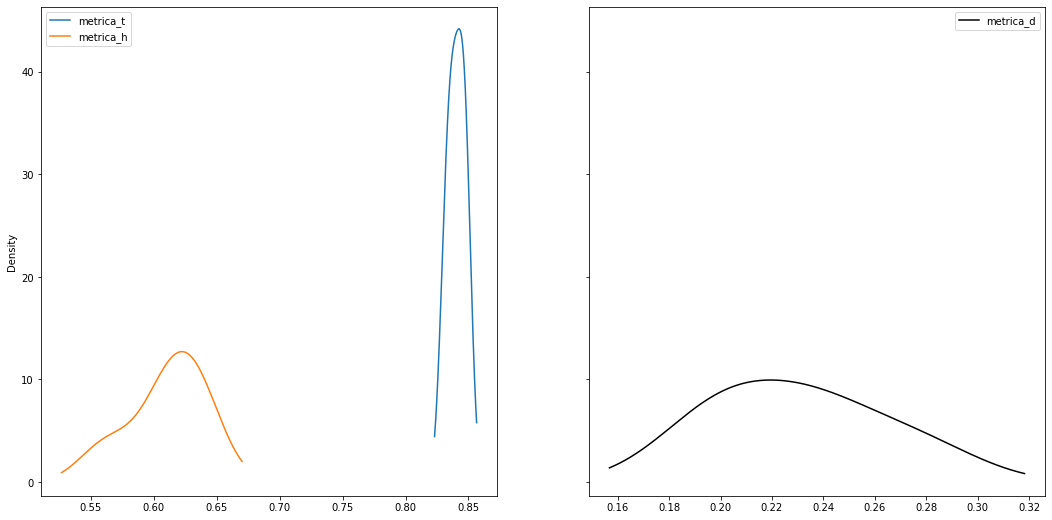

In [644]:
f, ((ax1,ax2)) = plt.subplots(figsize=(18, 9), ncols=2, sharey=True)

pd.DataFrame(skf_dict).T[['metrica_t','metrica_h']].plot(kind='kde', ax=ax1)
pd.DataFrame(skf_dict).T[['metrica_d']].plot(kind='kde', ax=ax2, c='k');

- - -

In [645]:
X = x_[accept].copy()
y = yy.copy()

model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

metrica = fbeta_score( y , y_pred, beta=0.333, average="micro" )

print(classification_report(y, y_pred))

[LightGBM] [Warning] lambda_l1 is set=0.3625842117059765, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3625842117059765
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] lambda_l2 is set=0.4406841434163714, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4406841434163714
[LightGBM] [Warning] min_data_in_leaf is set=76, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=76
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       285
           1       0.88      0.95      0.91        96
           2       0.84      0.70      0.77       200
           3       0.74      0.85      0.79       4

In [646]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for c in sorted(np.unique(y)):
    mask = np.argwhere(y == c)
    fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
    roc_auc[c] = auc(fpr[c], tpr[c])

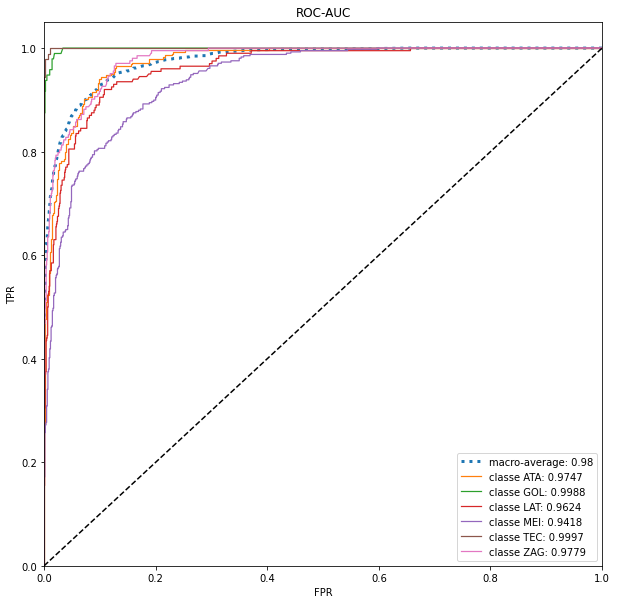

In [647]:
n_classes = len( sorted(np.unique(y)) )

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

f, ((ax1)) = plt.subplots(figsize=(10, 10))
    
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot( fpr["macro"], tpr["macro"],
    label = "macro-average: {0:0.2f}".format(roc_auc["macro"]),
    linestyle = ":", linewidth = 3)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
            label=rf"classe {str(depara[i])}: {round(roc_auc[i], 4)}",
            linewidth = 1.23)

plt.plot([0, 1], [0, 1], "k--",)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC")
plt.legend(loc="lower right")
plt.show()

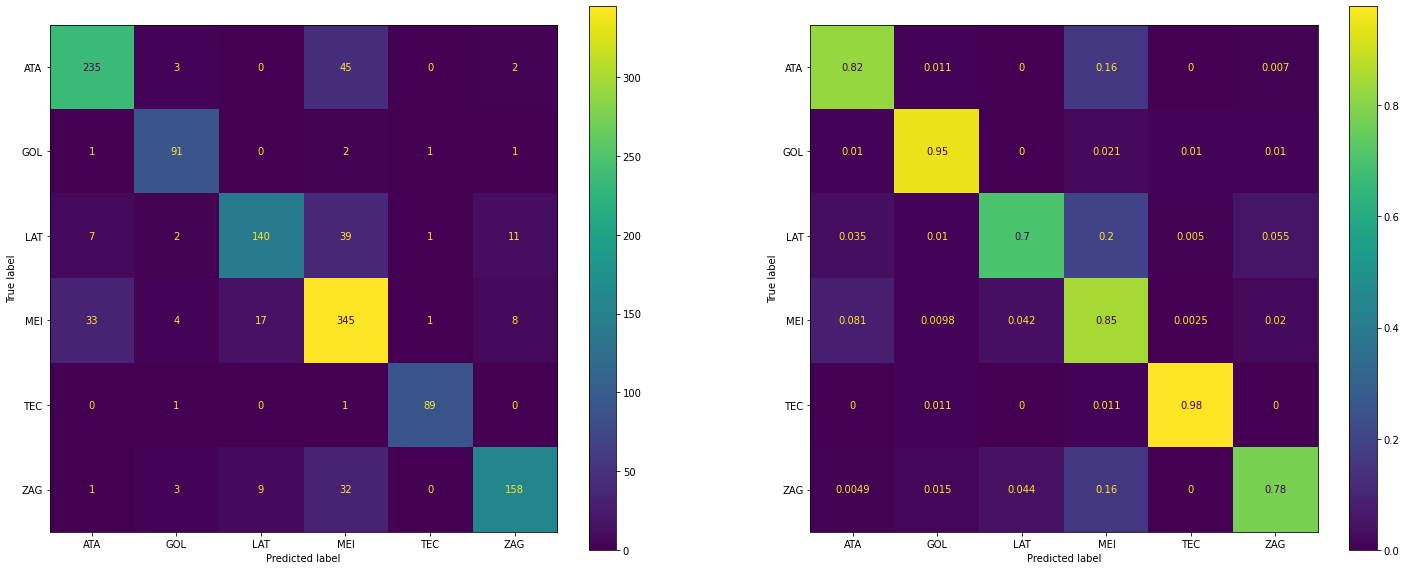

In [648]:
f, ((ax1, ax2)) = plt.subplots(figsize=(25, 10), ncols=2)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[depara[i] for i in range(len(depara))])
disp.plot(ax=ax1)

cm = confusion_matrix(y, y_pred, normalize='true' )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[depara[i] for i in range(len(depara))])
disp.plot(ax=ax2)
plt.show()

#### por fold

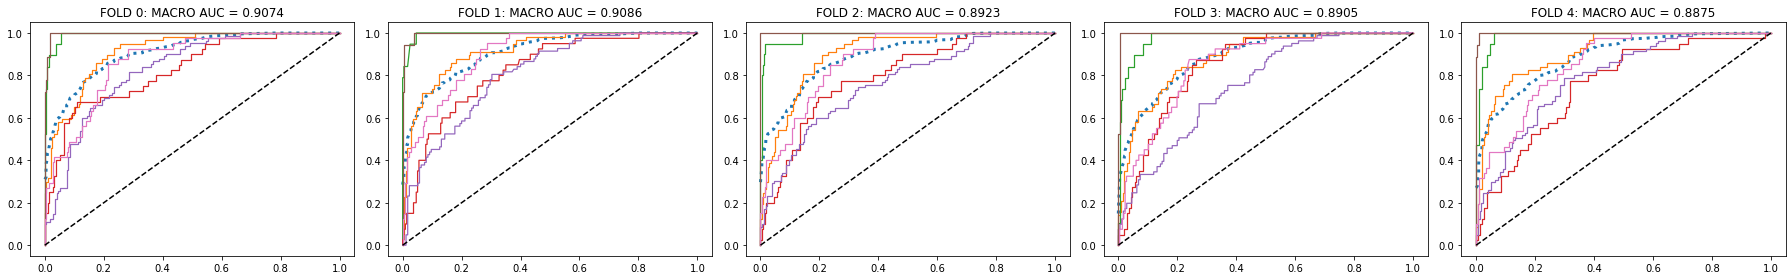

In [649]:
n_classes = len( sorted(np.unique(y)) )

# f, (axs) = plt.subplots(figsize=(25, 25), nrows=n_classes+1, ncols=len(skf_dict))
f, (axs) = plt.subplots(figsize=(25, 4), nrows=1, ncols=len(skf_dict))

for key in sorted(skf_dict):
    y = skf_dict[key]['df']['true'].values
    y_pred = skf_dict[key]['df']['pred'].values
    y_prob = skf_dict[key]['prob']
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for c in sorted(np.unique(y)):
        mask = np.argwhere(y == c)
        fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
        roc_auc[c] = auc(fpr[c], tpr[c])
        
    n_classes = len( sorted(np.unique(y)) )

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    axs[int(key)].plot( fpr["macro"], tpr["macro"],
        label = "macro-average: {0:0.2f}".format(roc_auc["macro"]),
        linestyle = ":", linewidth = 3)

    for i in range(n_classes):
        axs[int(key)].plot(fpr[i], tpr[i],
                label=rf"classe {str(depara[i])}: {round(roc_auc[i], 4)}",
                linewidth = 1.23 )
#         axs[i+1][int(key)].plot(fpr[i], tpr[i], linewidth = 1.23 )

    axs[int(key)].plot([0, 1], [0, 1], "k--")
    axs[int(key)].set_title( rf"FOLD {key}: MACRO AUC = {round(roc_auc['macro'], 4)}" )
    
# for i in range(n_classes):
#     axs[i+1][0].set_ylabel(depara[i])

#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("FPR")
#     plt.ylabel("TPR")
#     plt.title(rf"ROC-AUC: FOLD {key}")
#     plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#### por classe

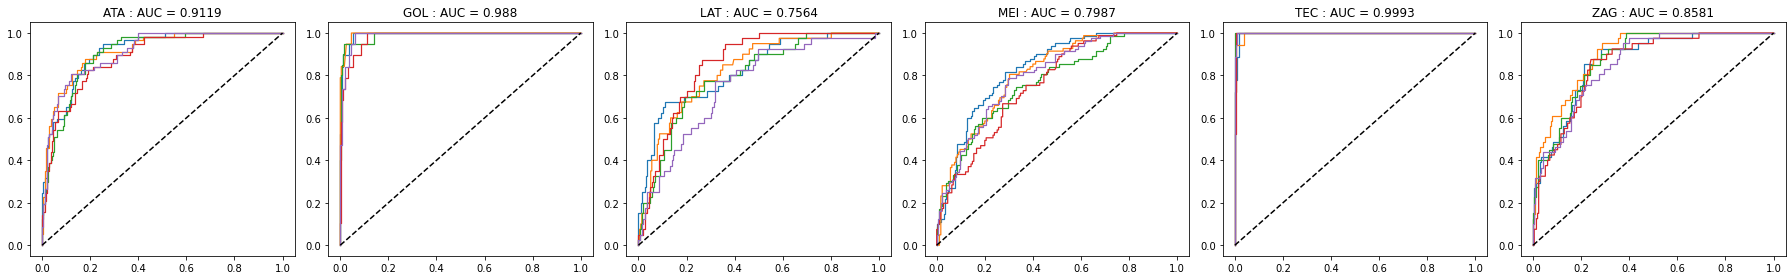

In [650]:
n_classes = len( sorted(np.unique(y)) )

f, (axs) = plt.subplots(figsize=(25, 4), nrows=1, ncols=n_classes)

for key in sorted(skf_dict):
    y = skf_dict[key]['df']['true'].values
    y_pred = skf_dict[key]['df']['pred'].values
    y_prob = skf_dict[key]['prob']
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for c in sorted(np.unique(y)):
        mask = np.argwhere(y == c)
        fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
        roc_auc[c] = auc(fpr[c], tpr[c])
        
    n_classes = len( sorted(np.unique(y)) )

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    for i in range(n_classes):
        axs[i].plot(fpr[i], tpr[i], linewidth = 1.23 )
    
for c in range(n_classes):
    axs[c].plot([0, 1], [0, 1], "k--")
    
    mean_auc = list()
    for key in sorted(skf_dict):
        mask = np.argwhere(y == c)
        fpr, tpr, _ = roc_curve((y == c), y_prob[:,c].ravel())
        mean_auc.append( auc(fpr, tpr) )
    
    axs[c].set_title(rf"{depara[c]} : AUC = {round(np.mean(mean_auc), 4)}")
    

#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("FPR")
#     plt.ylabel("TPR")
#     plt.title(rf"ROC-AUC: FOLD {key}")
#     plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### lightgbm -> `precision_score` -> ponderado por classe

$$\frac{2*MEI + 2*ATA + 1.5*ZAG + 1.0*LAT + 0.5*GOL + 0.5*TEC}{2+2+1.5+1.0+0.5+0.5}$$

In [652]:
def otimizador(X_train, X_holdout, y_train, y_holdout, trial):
    
    bagging_freq            = trial.suggest_int('bagging_freq',1,10),
    min_data_in_leaf        = trial.suggest_int('min_data_in_leaf',2,100),
    max_depth               = trial.suggest_int('max_depth',1,20),
    learning_rate           = trial.suggest_loguniform('learning_rate',0.001,0.1),
    num_leaves              = trial.suggest_int('num_leaves',2,70),
    num_threads             = trial.suggest_int('num_threads',1,10),
    min_sum_hessian_in_leaf = trial.suggest_int('min_sum_hessian_in_leaf',1,10)
    lambda_l1               = trial.suggest_loguniform('lambda_l1', 0.1, 2),
    lambda_l2               = trial.suggest_loguniform('lambda_l2', 0.1, 2)

    model = lgb.LGBMClassifier(
                                random_state = 31,
                                verbosity    = -1,
                                bagging_seed = 13,
                                boost_from_average = 'true',
                                boost              = 'gbdt',
                                metric             = 'multi_logloss',
                                bagging_freq            = bagging_freq ,
                                min_data_in_leaf        = min_data_in_leaf,
                                max_depth               = max_depth,
                                learning_rate           = learning_rate,
                                num_leaves              = num_leaves,
                                num_threads             = num_threads,
                                min_sum_hessian_in_leaf = min_sum_hessian_in_leaf,
                                lambda_l1               = lambda_l1,
                                lambda_l2               = lambda_l2
                                )

    model.fit(X_train, y_train)

    y_pred_train   = model.predict(X_train)
    y_pred_holdout = model.predict(X_holdout)

    c = 0
    acc_t_0 = precision_score( y_train == c , y_pred_train == c )
    acc_h_0 = precision_score( y_holdout == c , y_pred_holdout == c )
    acc_d_0 = acc_t_0-acc_h_0
    
    c = 1
    acc_t_1 = precision_score( y_train == c , y_pred_train == c )
    acc_h_1 = precision_score( y_holdout == c , y_pred_holdout == c )
    acc_d_1 = acc_t_1-acc_h_1
    
    c = 2
    acc_t_2 = precision_score( y_train == c , y_pred_train == c )
    acc_h_2 = precision_score( y_holdout == c , y_pred_holdout == c )
    acc_d_2 = acc_t_2-acc_h_2
    
    c = 3
    acc_t_3 = precision_score( y_train == c , y_pred_train == c )
    acc_h_3 = precision_score( y_holdout == c , y_pred_holdout == c )
    acc_d_3 = acc_t_3-acc_h_3
    
    c = 4
    acc_t_4 = precision_score( y_train == c , y_pred_train == c )
    acc_h_4 = precision_score( y_holdout == c , y_pred_holdout == c )
    acc_d_4 = acc_t_4-acc_h_4
    
    c = 5
    acc_t_5 = precision_score( y_train == c , y_pred_train == c )
    acc_h_5 = precision_score( y_holdout == c , y_pred_holdout == c )
    acc_d_5 = acc_t_5-acc_h_5
    
    sum_pesos = 2.0 + 2.0 + 1.5 + 1.0 + 0.5 + 0.5
    
    return (2*acc_h_3 + 2*acc_h_0 + 1.5*acc_h_5 + 1.0*acc_h_2 + 0.5*acc_h_1 + 0.5*acc_h_4)/(sum_pesos), (2*acc_d_3 + 2*acc_d_0 + 1.5*acc_d_5 + 1.0*acc_d_2 + 0.5*acc_d_1 + 0.5*acc_d_4)/(sum_pesos)

In [653]:
# lb_study = optuna.create_study(direction='maximize')
lb_study = optuna.create_study(directions=["maximize", "minimize"])

[I 2022-01-09 14:19:18,572] A new study created in memory with name: no-name-5ad2979b-94b8-4308-85cc-94586f9701a1


In [654]:
skf = StratifiedKFold(n_splits=3, shuffle=True)

for train_index, test_index in skf.split(x_[accept], yy):
    Xt, Xh = x_.iloc[train_index][accept], x_.iloc[test_index][accept]
    yt, yh = yy[train_index], yy[test_index]
    
    lb_study.optimize(functools.partial(otimizador, Xt, Xh, yt, yh), n_trials = 100)

[I 2022-01-09 14:19:19,983] Trial 0 finished with values: [0.6307470507694471, 0.03153446738952963] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 90, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 54, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.1410388335523821, 'lambda_l2': 1.4155247848400978}. 
[I 2022-01-09 14:19:20,029] Trial 1 finished with values: [0.08473520249221184, 9.910549999090357e-05] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 33, 'max_depth': 13, 'learning_rate': 0.0024213568067527336, 'num_leaves': 2, 'num_threads': 3, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.5422524047323452, 'lambda_l2': 0.6020800116110241}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1410388335523821, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1410388335523821
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.4155247848400978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4155247848400978
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:20,154] Trial 2 finished with values: [0.6024503626132226, 0.22827169851423434] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 34, 'max_depth': 16, 'learning_rate': 0.02637324724130799, 'num_leaves': 54, 'num_threads': 6, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.1292657449001893, 'lambda_l2': 0.2387024149958614}. 
[I 2022-01-09 14:19:20,258] Trial 3 finished with values: [0.6059153682618874, 0.15131440059398962] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 62, 'max_depth': 15, 'learning_rate': 0.013922574928181374, 'num_leaves': 38, 'num_threads': 8, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 1.7831211120395263}. 
[I 2022-01-09 14:19:20,333] Trial 4 finished with values: [0.621528337903167, 0.14564920099624062] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 35, 'max_depth': 3, 'learning_rate': 0.024542725597782162, 'num_leaves': 6, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.1329

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21912118122568464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21912118122568464
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7831211120395263, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7831211120395263
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:20,425] Trial 5 finished with values: [0.26788763102725366, 0.025985312274188505] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 73, 'max_depth': 9, 'learning_rate': 0.0024943997529884034, 'num_leaves': 62, 'num_threads': 3, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.2003828160349419, 'lambda_l2': 0.10974690190110525}. 
[I 2022-01-09 14:19:20,539] Trial 6 finished with values: [0.5569054217490597, 0.15294642341559583] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 28, 'max_depth': 20, 'learning_rate': 0.0060758180023935335, 'num_leaves': 9, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.1676001429491274, 'lambda_l2': 1.344993192983652}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1676001429491274, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1676001429491274
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.344993192983652, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.344993192983652
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:20,689] Trial 7 finished with values: [0.5884069997008183, 0.21436451837746767] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 26, 'max_depth': 13, 'learning_rate': 0.011501908646193356, 'num_leaves': 20, 'num_threads': 6, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.36731039742988053, 'lambda_l2': 0.6442400194708044}. 
[I 2022-01-09 14:19:20,783] Trial 8 finished with values: [0.29461034067775643, 0.1203105773755094] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 88, 'max_depth': 6, 'learning_rate': 0.0036792363365331297, 'num_leaves': 28, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3009668174842174, 'lambda_l2': 1.9282372166037056}. 
[I 2022-01-09 14:19:20,870] Trial 9 finished with values: [0.6066687992255697, 0.053624879249074664] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 85, 'max_depth': 4, 'learning_rate': 0.007999482483663653, 'num_leaves': 33, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.81

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3009668174842174, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3009668174842174
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=1.9282372166037056, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9282372166037056
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:21,005] Trial 10 finished with values: [0.6064678786439509, 0.1280835390407673] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 26, 'max_depth': 14, 'learning_rate': 0.004487727287800752, 'num_leaves': 54, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.6890322091516338, 'lambda_l2': 0.18582830848258386}. 
[I 2022-01-09 14:19:21,049] Trial 11 finished with values: [0.38304544112945055, -0.01611725151684255] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 67, 'max_depth': 12, 'learning_rate': 0.013000743566783338, 'num_leaves': 2, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 0.10048690781580033}. 
[I 2022-01-09 14:19:21,133] Trial 12 finished with values: [0.30383838383838385, 0.11621420261082113] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 86, 'max_depth': 14, 'learning_rate': 0.003931310454150426, 'num_leaves': 60, 'num_threads': 4, 'min_sum_hessian_in_leaf': 6, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.26303341145201653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.26303341145201653
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.10048690781580033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10048690781580033
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

[I 2022-01-09 14:19:21,217] Trial 13 finished with values: [0.5132900432900434, 0.10012579201893847] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 80, 'max_depth': 6, 'learning_rate': 0.004928177930114703, 'num_leaves': 33, 'num_threads': 9, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.4597465565468274, 'lambda_l2': 0.5652766140153498}. 
[I 2022-01-09 14:19:21,308] Trial 14 finished with values: [0.5894246667095882, 0.12387834375837084] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 84, 'max_depth': 18, 'learning_rate': 0.013588121003357496, 'num_leaves': 7, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.3395091172587707, 'lambda_l2': 0.6957233764359941}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3395091172587707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3395091172587707
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.6957233764359941, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6957233764359941
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:21,431] Trial 15 finished with values: [0.5998429767452919, 0.31578996438833795] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 45, 'max_depth': 11, 'learning_rate': 0.0589078271980503, 'num_leaves': 64, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.6266783068183939, 'lambda_l2': 0.13855331489711267}. 
[I 2022-01-09 14:19:21,523] Trial 16 finished with values: [0.5932503567701324, 0.1385524188335955] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 39, 'max_depth': 4, 'learning_rate': 0.006967324252989376, 'num_leaves': 7, 'num_threads': 8, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.0185819037828132, 'lambda_l2': 0.13275917521010233}. 
[I 2022-01-09 14:19:21,612] Trial 17 finished with values: [0.4505017516580421, 0.1740906935228296] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 79, 'max_depth': 18, 'learning_rate': 0.004172172623662591, 'num_leaves': 25, 'num_threads': 9, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.5744

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0185819037828132, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0185819037828132
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.13275917521010233, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13275917521010233
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:21,770] Trial 18 finished with values: [0.592953868029507, 0.24829871310353865] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 56, 'max_depth': 8, 'learning_rate': 0.04327443363526933, 'num_leaves': 56, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.890214887198095, 'lambda_l2': 0.45028179315830796}. 
[I 2022-01-09 14:19:21,835] Trial 19 finished with values: [0.2951358669374335, 0.0039843368601345745] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 39, 'max_depth': 2, 'learning_rate': 0.002094867353757779, 'num_leaves': 52, 'num_threads': 8, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.17059736957470284, 'lambda_l2': 0.3414280818423173}. 
[I 2022-01-09 14:19:21,892] Trial 20 finished with values: [0.6301274066471635, 0.11010981221963938] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 72, 'max_depth': 2, 'learning_rate': 0.04278937393132203, 'num_leaves': 25, 'num_threads': 7, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.620

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.17059736957470284, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17059736957470284
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.3414280818423173, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3414280818423173
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:22,008] Trial 21 finished with values: [0.08473520249221184, 9.910549999090357e-05] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 85, 'max_depth': 18, 'learning_rate': 0.001176901350076075, 'num_leaves': 30, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.24010755469408124, 'lambda_l2': 0.3436095410576141}. 
[I 2022-01-09 14:19:22,104] Trial 22 finished with values: [0.6207283870813283, 0.15933611943991674] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 82, 'max_depth': 5, 'learning_rate': 0.03509071018848387, 'num_leaves': 30, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.2306029628593393, 'lambda_l2': 0.24768753899621995}. 
[I 2022-01-09 14:19:22,146] Trial 23 finished with values: [0.2661630468995908, -0.004013431112300436] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 26, 'max_depth': 1, 'learning_rate': 0.0035881164325150465, 'num_leaves': 48, 'num_threads': 4, 'min_sum_hessian_in_leaf': 3, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.2306029628593393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2306029628593393
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.24768753899621995, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24768753899621995
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:22,236] Trial 24 finished with values: [0.6113287450092632, 0.10136220651248991] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 65, 'max_depth': 4, 'learning_rate': 0.010864568922348355, 'num_leaves': 63, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.5079050527912683, 'lambda_l2': 0.5816690415545352}. 
[I 2022-01-09 14:19:22,348] Trial 25 finished with values: [0.5960353050119368, 0.21925859919271068] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 57, 'max_depth': 13, 'learning_rate': 0.030087542698058314, 'num_leaves': 18, 'num_threads': 4, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.8751773119900804, 'lambda_l2': 0.7267248404500521}. 
[I 2022-01-09 14:19:22,430] Trial 26 finished with values: [0.30965680905439946, 0.06169427495711459] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 86, 'max_depth': 16, 'learning_rate': 0.003564670560813537, 'num_leaves': 69, 'num_threads': 9, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8751773119900804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8751773119900804
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=57, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=57
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.7267248404500521, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7267248404500521
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:22,505] Trial 27 finished with values: [0.6016924288192321, 0.13670730533973532] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 92, 'max_depth': 13, 'learning_rate': 0.02218310676683964, 'num_leaves': 6, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.26088599451915734, 'lambda_l2': 0.8976041385966598}. 
[I 2022-01-09 14:19:22,674] Trial 28 finished with values: [0.2755003450655625, 0.05889377978143876] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 18, 'max_depth': 16, 'learning_rate': 0.001232253797538246, 'num_leaves': 60, 'num_threads': 3, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.857526647735561, 'lambda_l2': 0.5514074550809833}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.857526647735561, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.857526647735561
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.5514074550809833, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5514074550809833
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 14:19:22,892] Trial 29 finished with values: [0.5864206962852581, 0.2782455303239363] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 6, 'max_depth': 14, 'learning_rate': 0.017097372975386514, 'num_leaves': 42, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.1272132568134165, 'lambda_l2': 0.12291055126190827}. 
[I 2022-01-09 14:19:23,010] Trial 30 finished with values: [0.3848706848706849, 0.11027476414361317] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 46, 'max_depth': 18, 'learning_rate': 0.002735619032224055, 'num_leaves': 60, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.7385095767540059, 'lambda_l2': 0.5845019066439967}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.7385095767540059, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7385095767540059
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.5845019066439967, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5845019066439967
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:23,179] Trial 31 finished with values: [0.28900588900588897, 0.03840089422562564] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 7, 'max_depth': 16, 'learning_rate': 0.001370891704112763, 'num_leaves': 66, 'num_threads': 1, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.4270293197545102, 'lambda_l2': 0.13811017828456576}. 
[I 2022-01-09 14:19:23,283] Trial 32 finished with values: [0.3004355108877722, 0.026237793681317297] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 60, 'max_depth': 8, 'learning_rate': 0.0017580672345451748, 'num_leaves': 30, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.13088845164084217, 'lambda_l2': 0.13075412008881568}. 
[I 2022-01-09 14:19:23,325] Trial 33 finished with values: [0.08430913348946137, 0.0006245120999219366] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 87, 'max_depth': 1, 'learning_rate': 0.002933264400284708, 'num_leaves': 6, 'num_threads': 10, 'min_sum_hessian_in_leaf': 1, 'lambd

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13088845164084217, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13088845164084217
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.13075412008881568, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13075412008881568
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] l

[I 2022-01-09 14:19:23,504] Trial 34 finished with values: [0.5823452036989715, 0.1785503866395418] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 19, 'max_depth': 13, 'learning_rate': 0.004942575923707131, 'num_leaves': 44, 'num_threads': 8, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.9799693275151125, 'lambda_l2': 1.9231957996338773}. 
[I 2022-01-09 14:19:23,684] Trial 35 finished with values: [0.6066675335315543, 0.26631106335146504] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 29, 'max_depth': 20, 'learning_rate': 0.03099772477363938, 'num_leaves': 14, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.8118589023931503, 'lambda_l2': 0.35375725861092083}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8118589023931503, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8118589023931503
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.35375725861092083, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.35375725861092083
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:23,745] Trial 36 finished with values: [0.6466162619858209, 0.08213847118906872] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 15, 'max_depth': 14, 'learning_rate': 0.037157021652324936, 'num_leaves': 3, 'num_threads': 8, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.0875250899267244, 'lambda_l2': 0.11823987891420057}. 
[I 2022-01-09 14:19:23,808] Trial 37 finished with values: [0.6141922099816838, 0.055705567196312734] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 42, 'max_depth': 8, 'learning_rate': 0.04339949076780175, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.20199930460962212, 'lambda_l2': 1.9547160545041196}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.20199930460962212, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.20199930460962212
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.9547160545041196, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9547160545041196
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:24,103] Trial 38 finished with values: [0.6098000304830264, 0.32987847264177084] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 19, 'max_depth': 8, 'learning_rate': 0.026959255791829683, 'num_leaves': 67, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.42189294840286107, 'lambda_l2': 0.5205060622996555}. 
[I 2022-01-09 14:19:24,196] Trial 39 finished with values: [0.6178052728304089, 0.18487449851226975] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 87, 'max_depth': 7, 'learning_rate': 0.04810735985082395, 'num_leaves': 28, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.8447000071741608, 'lambda_l2': 0.7856637441224926}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.8447000071741608, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8447000071741608
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.7856637441224926, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7856637441224926
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:24,345] Trial 40 finished with values: [0.5853051481737801, 0.16023011886922947] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 45, 'max_depth': 16, 'learning_rate': 0.00825905322094114, 'num_leaves': 10, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.5951241063416793, 'lambda_l2': 0.8176120117762469}. 
[I 2022-01-09 14:19:24,454] Trial 41 finished with values: [0.5851763000432738, 0.3011286141475123] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 67, 'max_depth': 4, 'learning_rate': 0.09144531868952102, 'num_leaves': 35, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.8071548383693307, 'lambda_l2': 0.8115995695562883}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8071548383693307, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8071548383693307
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.8115995695562883, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8115995695562883
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:24,574] Trial 42 finished with values: [0.6048056290417402, 0.12260152852442321] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 35, 'max_depth': 12, 'learning_rate': 0.004957744963273518, 'num_leaves': 25, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.21701209842023636, 'lambda_l2': 0.694468050250066}. 
[I 2022-01-09 14:19:24,638] Trial 43 finished with values: [0.42327336551118916, 0.012293980948605846] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 49, 'max_depth': 2, 'learning_rate': 0.003264588145055525, 'num_leaves': 64, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.9066761520758841, 'lambda_l2': 0.2708314261383993}. 
[I 2022-01-09 14:19:24,730] Trial 44 finished with values: [0.6039056950112299, 0.14609945349601103] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 83, 'max_depth': 12, 'learning_rate': 0.021714796145377788, 'num_leaves': 59, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.9066761520758841, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9066761520758841
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.2708314261383993, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2708314261383993
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:24,830] Trial 45 finished with values: [0.6064310367780039, 0.21743341370269753] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 69, 'max_depth': 12, 'learning_rate': 0.03665834517606669, 'num_leaves': 37, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.5981453286645853, 'lambda_l2': 0.15833459668711838}. 
[I 2022-01-09 14:19:24,951] Trial 46 finished with values: [0.593104180931632, 0.13551225440091583] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 17, 'max_depth': 9, 'learning_rate': 0.0054775316498514234, 'num_leaves': 29, 'num_threads': 4, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.558930317670122, 'lambda_l2': 0.4293453077605333}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.558930317670122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.558930317670122
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.4293453077605333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4293453077605333
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 14:19:25,078] Trial 47 finished with values: [0.6163235767498637, 0.17440841496009687] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 74, 'max_depth': 11, 'learning_rate': 0.030794778839741726, 'num_leaves': 24, 'num_threads': 2, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.23517454570051444, 'lambda_l2': 1.3742849916625144}. 
[I 2022-01-09 14:19:25,185] Trial 48 finished with values: [0.3096006280051025, -0.014284063381607244] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 70, 'max_depth': 6, 'learning_rate': 0.0031091147159701955, 'num_leaves': 53, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.381666639897152, 'lambda_l2': 0.13867529825005684}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.381666639897152, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.381666639897152
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.13867529825005684, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13867529825005684
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:25,296] Trial 49 finished with values: [0.6080161702633613, -0.0426112290160663] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 36, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.033651398857136, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:25,401] Trial 50 finished with values: [0.5924281818009103, 0.1211582122951842] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 84, 'max_depth': 18, 'learning_rate': 0.013588121003357496, 'num_leaves': 44, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.9799693275151125, 'lambda_l2': 0.6437011773338546}. 
[I 2022-01-09 14:19:25,500] Trial 51 finished with values: [0.5879847306062715, 0.1329829092055312] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 65, 'max_depth': 4, 'learning_rate': 0.010864568922348355, 'num_leaves': 9, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.344

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.9799693275151125, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9799693275151125
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.6437011773338546, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6437011773338546
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:25,599] Trial 52 finished with values: [0.08473520249221184, 9.910549999090357e-05] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 82, 'max_depth': 16, 'learning_rate': 0.001232253797538246, 'num_leaves': 7, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.2306029628593393, 'lambda_l2': 0.5514074550809833}. 
[I 2022-01-09 14:19:25,692] Trial 53 finished with values: [0.6118380685607577, 0.17186404521437318] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 82, 'max_depth': 5, 'learning_rate': 0.03509071018848387, 'num_leaves': 64, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.2306029628593393, 'lambda_l2': 0.13855331489711267}. 


bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.5514074550809833, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5514074550809833
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.2306029628593393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2306029628593393
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.13855331489711267, reg

[I 2022-01-09 14:19:25,805] Trial 54 finished with values: [0.5999686109011506, 0.13639530252720464] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 17, 'max_depth': 9, 'learning_rate': 0.0054775316498514234, 'num_leaves': 11, 'num_threads': 4, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.1763748881756301, 'lambda_l2': 0.4293453077605333}. 
[I 2022-01-09 14:19:25,924] Trial 55 finished with values: [0.27665091481885373, 0.04908993486565791] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 7, 'max_depth': 16, 'learning_rate': 0.002094867353757779, 'num_leaves': 52, 'num_threads': 8, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.17059736957470284, 'lambda_l2': 0.3414280818423173}. 
[I 2022-01-09 14:19:26,009] Trial 56 finished with values: [0.6039056950112299, 0.14609945349601103] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 83, 'max_depth': 12, 'learning_rate': 0.021714796145377788, 'num_leaves': 59, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.17059736957470284, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17059736957470284
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.3414280818423173, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3414280818423173
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:26,096] Trial 57 finished with values: [0.5895953193835907, 0.15057005760776862] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 69, 'max_depth': 12, 'learning_rate': 0.013922574928181374, 'num_leaves': 37, 'num_threads': 5, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.11713499047277993, 'lambda_l2': 1.7831211120395263}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11713499047277993, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11713499047277993
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7831211120395263, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7831211120395263
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:26,255] Trial 58 finished with values: [0.3150024175611643, 0.19831870730201662] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 17, 'max_depth': 7, 'learning_rate': 0.002094867353757779, 'num_leaves': 64, 'num_threads': 8, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.9066761520758841, 'lambda_l2': 0.3414280818423173}. 
[I 2022-01-09 14:19:26,356] Trial 59 finished with values: [0.300448343079922, -0.013281505121717144] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 69, 'max_depth': 6, 'learning_rate': 0.0031091147159701955, 'num_leaves': 53, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.13868412033294789, 'lambda_l2': 0.13867529825005684}. 
[I 2022-01-09 14:19:26,439] Trial 60 finished with values: [0.5556287735035362, 0.10605885331874039] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 79, 'max_depth': 9, 'learning_rate': 0.004957744963273518, 'num_leaves': 25, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13868412033294789, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13868412033294789
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.13867529825005684, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13867529825005684
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:26,539] Trial 61 finished with values: [0.6021108696547405, 0.1583913801105678] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 62, 'max_depth': 15, 'learning_rate': 0.013922574928181374, 'num_leaves': 59, 'num_threads': 8, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 0.8576786778313057}. 
[I 2022-01-09 14:19:26,648] Trial 62 finished with values: [0.6210317460317459, 0.1008953869799381] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 45, 'max_depth': 12, 'learning_rate': 0.0028745679246001197, 'num_leaves': 36, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.21701209842023636, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:26,688] Trial 63 finished with values: [0.6127290977891434, 0.051816083625263826] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 42, 'max_depth': 8, 'learning_rate': 0.04339949076780175, 'num_leaves': 2, 'num_threads': 8, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21701209842023636, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21701209842023636
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.13815018074170257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13815018074170257
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:26,793] Trial 64 finished with values: [0.26929374718848403, 0.2540680942221379] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 60, 'max_depth': 8, 'learning_rate': 0.002735619032224055, 'num_leaves': 60, 'num_threads': 10, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.7385095767540059, 'lambda_l2': 0.5845019066439967}. 
[I 2022-01-09 14:19:26,925] Trial 65 finished with values: [0.6139970574722484, 0.12865282447026635] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 85, 'max_depth': 18, 'learning_rate': 0.026959255791829683, 'num_leaves': 30, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.633432444343686, 'lambda_l2': 0.5205060622996555}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.633432444343686, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.633432444343686
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.5205060622996555, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5205060622996555
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 14:19:27,013] Trial 66 finished with values: [0.26286215770685833, 0.01419142817625647] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 87, 'max_depth': 7, 'learning_rate': 0.002933264400284708, 'num_leaves': 28, 'num_threads': 10, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.8447000071741608, 'lambda_l2': 0.7856637441224926}. 
[I 2022-01-09 14:19:27,167] Trial 67 finished with values: [0.6015238232044955, 0.2135761280869928] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 62, 'max_depth': 8, 'learning_rate': 0.026959255791829683, 'num_leaves': 55, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.42189294840286107, 'lambda_l2': 0.5205060622996555}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.42189294840286107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.42189294840286107
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.5205060622996555, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5205060622996555
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:27,262] Trial 68 finished with values: [0.4430406092729414, 0.24363584857789364] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 72, 'max_depth': 13, 'learning_rate': 0.004942575923707131, 'num_leaves': 44, 'num_threads': 7, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.9799693275151125, 'lambda_l2': 1.9231957996338773}. 
[I 2022-01-09 14:19:27,335] Trial 69 finished with values: [0.6235027829403593, 0.1387639485340945] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 49, 'max_depth': 3, 'learning_rate': 0.024542725597782162, 'num_leaves': 6, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.1329297604301854, 'lambda_l2': 0.4189373922745291}. 
[I 2022-01-09 14:19:27,400] Trial 70 finished with values: [0.3848082822872739, -0.01788009267466587] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 35, 'max_depth': 11, 'learning_rate': 0.013000743566783338, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.26

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1329297604301854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1329297604301854
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.4189373922745291, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4189373922745291
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:27,512] Trial 71 finished with values: [0.5411509366947034, 0.08240651478461618] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 52, 'num_threads': 8, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.033651398857136, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:27,591] Trial 72 finished with values: [0.3165295165295165, 0.026962830095177862] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 86, 'max_depth': 16, 'learning_rate': 0.003564670560813537, 'num_leaves': 18, 'num_threads': 4, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.8751773119900804, 'lambda_l2': 0.14752261076985068}. 
[I 2022-01-09 14:19:27,683] Trial 73 finished with values: [0.6173891022004032, 0.16322187119567746] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 56, 'max_depth': 2, 'learning_rate': 0.06860052841796253, 'num_leaves': 64, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8751773119900804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8751773119900804
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.14752261076985068, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14752261076985068
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:27,726] Trial 74 finished with values: [0.48585083041918453, 0.13379237451516415] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 67, 'max_depth': 12, 'learning_rate': 0.026959255791829683, 'num_leaves': 2, 'num_threads': 10, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 0.5205060622996555}. 
[I 2022-01-09 14:19:27,818] Trial 75 finished with values: [0.6066485124357258, 0.2107218736618886] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 87, 'max_depth': 16, 'learning_rate': 0.04810735985082395, 'num_leaves': 54, 'num_threads': 6, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.4384532235998326, 'lambda_l2': 0.264936217560313}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.4384532235998326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4384532235998326
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.264936217560313, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.264936217560313
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 14:19:27,934] Trial 76 finished with values: [0.6068450658146728, 0.24784766099217392] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 46, 'max_depth': 18, 'learning_rate': 0.030794778839741726, 'num_leaves': 24, 'num_threads': 7, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.23517454570051444, 'lambda_l2': 0.5845019066439967}. 
[I 2022-01-09 14:19:28,126] Trial 77 finished with values: [0.6240373828010917, 0.28011014134427153] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 7, 'max_depth': 16, 'learning_rate': 0.04810735985082395, 'num_leaves': 28, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.8447000071741608, 'lambda_l2': 0.13811017828456576}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.8447000071741608, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8447000071741608
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.13811017828456576, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13811017828456576
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:28,216] Trial 78 finished with values: [0.08473520249221184, 9.910549999090357e-05] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 49, 'max_depth': 2, 'learning_rate': 0.001370891704112763, 'num_leaves': 64, 'num_threads': 1, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.4270293197545102, 'lambda_l2': 0.4627532864885197}. 
[I 2022-01-09 14:19:28,334] Trial 79 finished with values: [0.08473520249221184, 9.910549999090357e-05] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 85, 'max_depth': 18, 'learning_rate': 0.001176901350076075, 'num_leaves': 30, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.24010755469408124, 'lambda_l2': 0.3436095410576141}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.24010755469408124, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.24010755469408124
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.3436095410576141, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3436095410576141
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:28,556] Trial 80 finished with values: [0.6270121797344075, 0.10096658513244211] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 26, 'max_depth': 8, 'learning_rate': 0.0035881164325150465, 'num_leaves': 56, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.21505046386504295, 'lambda_l2': 0.45028179315830796}. 
[I 2022-01-09 14:19:28,644] Trial 81 finished with values: [0.5894246667095882, 0.12387834375837084] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 84, 'max_depth': 18, 'learning_rate': 0.013588121003357496, 'num_leaves': 7, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.3395091172587707, 'lambda_l2': 0.6957233764359941}. 
[I 2022-01-09 14:19:28,727] Trial 82 finished with values: [0.6113287450092632, 0.10136220651248991] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 65, 'max_depth': 4, 'learning_rate': 0.010864568922348355, 'num_leaves': 63, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3395091172587707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3395091172587707
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.6957233764359941, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6957233764359941
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:28,821] Trial 83 finished with values: [0.5970873987599367, 0.20805819918622945] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 69, 'max_depth': 12, 'learning_rate': 0.03665834517606669, 'num_leaves': 37, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.633209299649633, 'lambda_l2': 0.15833459668711838}. 
[I 2022-01-09 14:19:28,919] Trial 84 finished with values: [0.5938688494878971, 0.1810269888013068] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 73, 'max_depth': 9, 'learning_rate': 0.024542725597782162, 'num_leaves': 62, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.2003828160349419, 'lambda_l2': 0.10974690190110525}. 
[I 2022-01-09 14:19:29,014] Trial 85 finished with values: [0.6088950829256362, 0.21309847835003007] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 80, 'max_depth': 6, 'learning_rate': 0.04278937393132203, 'num_leaves': 25, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.459

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.2003828160349419, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2003828160349419
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=73, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=73
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.10974690190110525, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10974690190110525
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:29,146] Trial 86 finished with values: [0.5957763110066973, 0.2564385633428905] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 35, 'max_depth': 6, 'learning_rate': 0.024542725597782162, 'num_leaves': 28, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.3009668174842174, 'lambda_l2': 1.9282372166037056}. 
[I 2022-01-09 14:19:29,300] Trial 87 finished with values: [0.5195719648593211, 0.10428035984046116] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 56, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.890214887198095, 'lambda_l2': 0.45028179315830796}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.890214887198095, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.890214887198095
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.45028179315830796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45028179315830796
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:29,365] Trial 88 finished with values: [0.30571227222390013, 0.0028475448957341184] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 54, 'max_depth': 2, 'learning_rate': 0.002094867353757779, 'num_leaves': 25, 'num_threads': 8, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.11922475693236932, 'lambda_l2': 0.1559085018725753}. 
[I 2022-01-09 14:19:29,419] Trial 89 finished with values: [0.38304544112945055, -0.015103993188002611] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 33, 'max_depth': 12, 'learning_rate': 0.013000743566783338, 'num_leaves': 2, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 0.6020800116110241}. 
[I 2022-01-09 14:19:29,493] Trial 90 finished with values: [0.6177401985039439, 0.1515622102182729] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 33, 'max_depth': 3, 'learning_rate': 0.024542725597782162, 'num_leaves': 6, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.26303341145201653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.26303341145201653
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.6020800116110241, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6020800116110241
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:29,583] Trial 91 finished with values: [0.614216161450204, 0.13891368342961383] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 91, 'max_depth': 14, 'learning_rate': 0.02637324724130799, 'num_leaves': 54, 'num_threads': 6, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.1292657449001893, 'lambda_l2': 0.8176120117762469}. 
[I 2022-01-09 14:19:29,673] Trial 92 finished with values: [0.594433426561573, 0.12113635058032668] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 84, 'max_depth': 5, 'learning_rate': 0.013588121003357496, 'num_leaves': 30, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.2306029628593393, 'lambda_l2': 0.6957233764359941}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.2306029628593393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2306029628593393
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.6957233764359941, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6957233764359941
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:29,883] Trial 93 finished with values: [0.6621614761742151, 0.07239830055699024] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 7, 'max_depth': 16, 'learning_rate': 0.0028745679246001197, 'num_leaves': 66, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.4270293197545102, 'lambda_l2': 0.13811017828456576}. 
[I 2022-01-09 14:19:30,022] Trial 94 finished with values: [0.39099639855942375, 0.13692468291664492] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 39, 'max_depth': 16, 'learning_rate': 0.002094867353757779, 'num_leaves': 52, 'num_threads': 9, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.43524684962089416, 'lambda_l2': 0.3414280818423173}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.43524684962089416, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.43524684962089416
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.3414280818423173, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3414280818423173
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:30,119] Trial 95 finished with values: [0.6191490793461237, 0.06839719777567829] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 79, 'max_depth': 7, 'learning_rate': 0.007682604615810861, 'num_leaves': 28, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.8447000071741608, 'lambda_l2': 0.1559085018725753}. 
[I 2022-01-09 14:19:30,217] Trial 96 finished with values: [0.5900761099365751, 0.14595643938611508] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 92, 'max_depth': 13, 'learning_rate': 0.017097372975386514, 'num_leaves': 42, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.1272132568134165, 'lambda_l2': 0.12291055126190827}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1272132568134165, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1272132568134165
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=92, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=92
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.12291055126190827, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12291055126190827
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

[I 2022-01-09 14:19:30,525] Trial 97 finished with values: [0.5951800025558891, 0.35690427559981763] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 19, 'max_depth': 16, 'learning_rate': 0.026959255791829683, 'num_leaves': 66, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.42189294840286107, 'lambda_l2': 0.5205060622996555}. 
[I 2022-01-09 14:19:30,616] Trial 98 finished with values: [0.2901209976341965, 0.058490201890492095] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 86, 'max_depth': 16, 'learning_rate': 0.003564670560813537, 'num_leaves': 69, 'num_threads': 8, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.43524684962089416, 'lambda_l2': 1.7831211120395263}. 
[I 2022-01-09 14:19:30,708] Trial 99 finished with values: [0.5966817949162697, 0.2276837895857206] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 69, 'max_depth': 12, 'learning_rate': 0.03665834517606669, 'num_leaves': 37, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.43524684962089416, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.43524684962089416
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=86, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=86
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.7831211120395263, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7831211120395263
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:30,843] Trial 100 finished with values: [0.6004594820384294, 0.10564629624126193] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 45, 'max_depth': 12, 'learning_rate': 0.0028745679246001197, 'num_leaves': 36, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.21701209842023636, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:30,927] Trial 101 finished with values: [0.4754611794919979, -0.10787752400710783] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 72, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 56, 'num_threads': 7, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.5936828608537167, 'lambda_l2': 0.1344683810920792}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21701209842023636, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21701209842023636
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.13815018074170257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13815018074170257
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:31,041] Trial 102 finished with values: [0.5152323892519971, 0.23611367293881397] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 26, 'max_depth': 4, 'learning_rate': 0.0035881164325150465, 'num_leaves': 56, 'num_threads': 4, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.21505046386504295, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:31,082] Trial 103 finished with values: [0.6356118791602662, 0.0021497714785553884] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 90, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 54, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.1410388335523821, 'lambda_l2': 1.4155247848400978}. 
[I 2022-01-09 14:19:31,174] Trial 104 finished with values: [0.6132437691044248, 0.17337928000011613] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 79, 'max_depth': 18, 'learning_rate': 0.037157021652324936, 'num_leaves': 28, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1410388335523821, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1410388335523821
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.4155247848400978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4155247848400978
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:31,270] Trial 105 finished with values: [0.6016344697434488, 0.12731077645823627] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 65, 'max_depth': 10, 'learning_rate': 0.010864568922348355, 'num_leaves': 63, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.5079050527912683, 'lambda_l2': 0.5816690415545352}. 
[I 2022-01-09 14:19:31,357] Trial 106 finished with values: [0.5815240299432612, 0.11742930492634332] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 84, 'max_depth': 14, 'learning_rate': 0.013588121003357496, 'num_leaves': 54, 'num_threads': 3, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.9799693275151125, 'lambda_l2': 0.8176120117762469}. 
[I 2022-01-09 14:19:31,453] Trial 107 finished with values: [0.5944292493392943, 0.24430091230110781] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 78, 'max_depth': 12, 'learning_rate': 0.05878180029467968, 'num_leaves': 29, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.9799693275151125, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9799693275151125
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=0.8176120117762469, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8176120117762469
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:31,627] Trial 108 finished with values: [0.4180835380835381, 0.058165627656172704] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 7, 'max_depth': 16, 'learning_rate': 0.0028745679246001197, 'num_leaves': 66, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.8447000071741608, 'lambda_l2': 0.7856637441224926}. 
[I 2022-01-09 14:19:31,723] Trial 109 finished with values: [0.5849153952205418, 0.14768969161415071] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 62, 'max_depth': 15, 'learning_rate': 0.013588121003357496, 'num_leaves': 38, 'num_threads': 8, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.3395091172587707, 'lambda_l2': 1.7831211120395263}. 
[I 2022-01-09 14:19:31,812] Trial 110 finished with values: [0.5717066946819717, 0.1257712752893481] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 84, 'max_depth': 6, 'learning_rate': 0.013588121003357496, 'num_leaves': 53, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.3395091172587707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3395091172587707
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7831211120395263, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7831211120395263
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:31,899] Trial 111 finished with values: [0.5677732859057957, 0.13913606484231034] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 86, 'max_depth': 5, 'learning_rate': 0.014769838025567333, 'num_leaves': 30, 'num_threads': 3, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.2306029628593393, 'lambda_l2': 0.14752261076985068}. 
[I 2022-01-09 14:19:31,993] Trial 112 finished with values: [0.42286956665295705, 0.01409433035936613] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 17, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 7, 'num_threads': 4, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.890214887198095, 'lambda_l2': 0.4293453077605333}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.890214887198095, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.890214887198095
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.4293453077605333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4293453077605333
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 14:19:32,148] Trial 113 finished with values: [0.5920515105627137, 0.3055979092154717] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 17, 'max_depth': 9, 'learning_rate': 0.04113218366954519, 'num_leaves': 44, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.9799693275151125, 'lambda_l2': 0.6437011773338546}. 
[I 2022-01-09 14:19:32,256] Trial 114 finished with values: [0.6380691709723968, 0.016026481808796948] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 36, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.5079050527912683, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:32,330] Trial 115 finished with values: [0.5837462615472314, 0.052555634456157144] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 84, 'max_depth': 18, 'learning_rate': 0.007682604615810861, 'num_leaves': 5, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5079050527912683, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5079050527912683
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.13815018074170257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13815018074170257
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:32,368] Trial 116 finished with values: [0.6429459618348508, 0.0038854385611842993] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 42, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 2, 'num_threads': 6, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 1.4155247848400978}. 
[I 2022-01-09 14:19:32,454] Trial 117 finished with values: [0.5780814354727398, 0.10573426630078255] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 79, 'max_depth': 7, 'learning_rate': 0.007682604615810861, 'num_leaves': 56, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.8134812995626652, 'lambda_l2': 0.45028179315830796}. 
[I 2022-01-09 14:19:32,520] Trial 118 finished with values: [0.6133070659935753, 0.13536757487827505] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 90, 'max_depth': 3, 'learning_rate': 0.04289351191194128, 'num_leaves': 6, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.8134812995626652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8134812995626652
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=79, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=79
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.45028179315830796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45028179315830796
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:32,608] Trial 119 finished with values: [0.37026220483847605, 0.06396239409200523] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 69, 'max_depth': 6, 'learning_rate': 0.0031091147159701955, 'num_leaves': 63, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.6385066813575719, 'lambda_l2': 0.13867529825005684}. 
[I 2022-01-09 14:19:32,736] Trial 120 finished with values: [0.601527796969005, 0.17252496004676074] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 30, 'max_depth': 16, 'learning_rate': 0.010864568922348355, 'num_leaves': 63, 'num_threads': 9, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.8292309863692096, 'lambda_l2': 0.13811017828456576}. 
[I 2022-01-09 14:19:32,806] Trial 121 finished with values: [0.5507157460128121, 0.10637709840997774] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 82, 'max_depth': 3, 'learning_rate': 0.007682604615810861, 'num_leaves': 30, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.8292309863692096, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8292309863692096
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.13811017828456576, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13811017828456576
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:32,904] Trial 122 finished with values: [0.6035102072619605, 0.18542351176223154] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 82, 'max_depth': 5, 'learning_rate': 0.03509071018848387, 'num_leaves': 30, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.16091274311580347, 'lambda_l2': 0.6957233764359941}. 
[I 2022-01-09 14:19:33,006] Trial 123 finished with values: [0.27770054065982563, 0.22312129586294546] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 46, 'max_depth': 18, 'learning_rate': 0.002735619032224055, 'num_leaves': 60, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.28093997506838686, 'lambda_l2': 1.4155247848400978}. 
[I 2022-01-09 14:19:33,106] Trial 124 finished with values: [0.6041969559892614, 0.1961706948067364] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 49, 'max_depth': 6, 'learning_rate': 0.024542725597782162, 'num_leaves': 56, 'num_threads': 7, 'min_sum_hessian_in_leaf': 2, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.28093997506838686, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.28093997506838686
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.4155247848400978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4155247848400978
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:33,205] Trial 125 finished with values: [0.48475020475020475, -0.09466723532498197] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 25, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.12966665986179216, 'lambda_l2': 0.45028179315830796}. 
[I 2022-01-09 14:19:33,247] Trial 126 finished with values: [0.6117153886032605, 0.011750072829674604] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 42, 'max_depth': 5, 'learning_rate': 0.03509071018848387, 'num_leaves': 2, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.20199930460962212, 'lambda_l2': 1.9547160545041196}. 
[I 2022-01-09 14:19:33,285] Trial 127 finished with values: [0.509735617970912, 0.19749089722662555] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 90, 'max_depth': 1, 'learning_rate': 0.021714796145377788, 'num_leaves': 49, 'num_threads': 7, 'min_sum_hessian_in_leaf': 3, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.12966665986179216, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12966665986179216
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.45028179315830796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45028179315830796
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

[I 2022-01-09 14:19:33,374] Trial 128 finished with values: [0.6152007469654528, 0.07596082282030943] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 65, 'max_depth': 12, 'learning_rate': 0.004957744963273518, 'num_leaves': 63, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.5079050527912683, 'lambda_l2': 0.5816690415545352}. 
[I 2022-01-09 14:19:33,466] Trial 129 finished with values: [0.6040253189778806, 0.09722759665449517] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 60, 'max_depth': 4, 'learning_rate': 0.007999482483663653, 'num_leaves': 30, 'num_threads': 10, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.43624250450234026, 'lambda_l2': 0.4648088429344799}. 
[I 2022-01-09 14:19:33,531] Trial 130 finished with values: [0.5799326783253037, 0.0784347489564219] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 79, 'max_depth': 3, 'learning_rate': 0.004957744963273518, 'num_leaves': 56, 'num_threads': 5, 'min_sum_hessian_in_leaf': 3, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.43624250450234026, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.43624250450234026
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.4648088429344799, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4648088429344799
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

[I 2022-01-09 14:19:33,582] Trial 131 finished with values: [0.609339624513773, 0.12490652853255249] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 11, 'max_depth': 12, 'learning_rate': 0.037157021652324936, 'num_leaves': 3, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.21701209842023636, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:33,663] Trial 132 finished with values: [0.5890171950507752, 0.155047905313355] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 90, 'max_depth': 5, 'learning_rate': 0.025115236745182127, 'num_leaves': 69, 'num_threads': 6, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.43524684962089416, 'lambda_l2': 0.14752261076985068}. 
[I 2022-01-09 14:19:33,736] Trial 133 finished with values: [0.5868238948514665, 0.1414136971058855] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 80, 'max_depth': 3, 'learning_rate': 0.024542725597782162, 'num_leaves': 59, 'num_threads': 7, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.43524684962089416, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.43524684962089416
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.14752261076985068, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14752261076985068
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:33,852] Trial 134 finished with values: [0.6048372854343003, 0.12036888375410355] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 42, 'max_depth': 8, 'learning_rate': 0.0035881164325150465, 'num_leaves': 56, 'num_threads': 4, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.20199930460962212, 'lambda_l2': 1.9547160545041196}. 
[I 2022-01-09 14:19:33,936] Trial 135 finished with values: [0.5814552642962032, 0.11418721392644897] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 84, 'max_depth': 18, 'learning_rate': 0.013588121003357496, 'num_leaves': 44, 'num_threads': 10, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.9799693275151125, 'lambda_l2': 0.6437011773338546}. 
[I 2022-01-09 14:19:34,014] Trial 136 finished with values: [0.5634072610159567, 0.11863936111635037] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 85, 'max_depth': 4, 'learning_rate': 0.010864568922348355, 'num_leaves': 33, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.9799693275151125, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9799693275151125
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.6437011773338546, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6437011773338546
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:34,055] Trial 137 finished with values: [0.6249451079040296, 0.0018919629524711823] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 42, 'max_depth': 8, 'learning_rate': 0.037157021652324936, 'num_leaves': 2, 'num_threads': 8, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.0875250899267244, 'lambda_l2': 0.11823987891420057}. 
[I 2022-01-09 14:19:34,119] Trial 138 finished with values: [0.3727639751552795, -0.004690975622282083] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 35, 'max_depth': 8, 'learning_rate': 0.013000743566783338, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.20199930460962212, 'lambda_l2': 0.18351344890944876}. 
[I 2022-01-09 14:19:34,237] Trial 139 finished with values: [0.5969385345862714, 0.22881494161302518] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 70, 'max_depth': 7, 'learning_rate': 0.04810735985082395, 'num_leaves': 53, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.20199930460962212, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.20199930460962212
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.18351344890944876, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18351344890944876
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:34,326] Trial 140 finished with values: [0.6186124908980187, 0.13070801281281547] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 49, 'max_depth': 7, 'learning_rate': 0.024542725597782162, 'num_leaves': 6, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.1292657449001893, 'lambda_l2': 0.23168915979519103}. 
[I 2022-01-09 14:19:34,529] Trial 141 finished with values: [0.5926133006778168, 0.22086672483287723] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 35, 'max_depth': 14, 'learning_rate': 0.013000743566783338, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 0.4648088429344799}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.26303341145201653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.26303341145201653
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.4648088429344799, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4648088429344799


[I 2022-01-09 14:19:34,602] Trial 142 finished with values: [0.299005291005291, -0.0017830687830687974] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 39, 'max_depth': 2, 'learning_rate': 0.002094867353757779, 'num_leaves': 6, 'num_threads': 2, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.17059736957470284, 'lambda_l2': 0.4189373922745291}. 
[I 2022-01-09 14:19:34,684] Trial 143 finished with values: [0.41752244668911337, 0.01618044949592708] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 26, 'max_depth': 3, 'learning_rate': 0.0035881164325150465, 'num_leaves': 56, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.1329297604301854, 'lambda_l2': 0.4189373922745291}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.17059736957470284, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17059736957470284
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.4189373922745291, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4189373922745291
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:34,741] Trial 144 finished with values: [0.419746675715445, -0.014130646941507282] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 72, 'max_depth': 2, 'learning_rate': 0.004463452282616237, 'num_leaves': 18, 'num_threads': 4, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.6203400532425158, 'lambda_l2': 0.14752261076985068}. 
[I 2022-01-09 14:19:34,783] Trial 145 finished with values: [0.3727639751552795, -0.004690975622282083] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 35, 'max_depth': 12, 'learning_rate': 0.013000743566783338, 'num_leaves': 2, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 0.10048690781580033}. 
[I 2022-01-09 14:19:34,866] Trial 146 finished with values: [0.5645057731914721, 0.12115886159654225] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 91, 'max_depth': 14, 'learning_rate': 0.011331104696654418, 'num_leaves': 54, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.26303341145201653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.26303341145201653
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.10048690781580033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10048690781580033
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

[I 2022-01-09 14:19:35,063] Trial 148 finished with values: [0.5994733055398156, 0.14617584502575387] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 80, 'max_depth': 6, 'learning_rate': 0.021383713928243175, 'num_leaves': 33, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.4597465565468274, 'lambda_l2': 0.5205060622996555}. 
[I 2022-01-09 14:19:35,147] Trial 149 finished with values: [0.6374210246313835, 0.06616840535209849] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 70, 'max_depth': 6, 'learning_rate': 0.004957744963273518, 'num_leaves': 53, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.381666639897152, 'lambda_l2': 0.694468050250066}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.381666639897152, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.381666639897152
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.694468050250066, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.694468050250066
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is 

[I 2022-01-09 14:19:35,305] Trial 150 finished with values: [0.6067817877261079, 0.15934630366732663] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 72, 'max_depth': 18, 'learning_rate': 0.026959255791829683, 'num_leaves': 30, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.633432444343686, 'lambda_l2': 0.5205060622996555}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.2306029628593393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2306029628593393
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.1559085018725753, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1559085018725753


[I 2022-01-09 14:19:35,526] Trial 151 finished with values: [0.5849725364241494, 0.3904897080835411] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 15, 'max_depth': 14, 'learning_rate': 0.037157021652324936, 'num_leaves': 25, 'num_threads': 8, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.2306029628593393, 'lambda_l2': 0.1559085018725753}. 
[I 2022-01-09 14:19:35,613] Trial 152 finished with values: [0.4194398372711625, 0.0825395707752837] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 70, 'max_depth': 6, 'learning_rate': 0.0035881164325150465, 'num_leaves': 53, 'num_threads': 5, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.21505046386504295, 'lambda_l2': 0.694468050250066}. 
[I 2022-01-09 14:19:35,725] Trial 153 finished with values: [0.6043844895134021, 0.2161481170366892] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 49, 'max_depth': 7, 'learning_rate': 0.024542725597782162, 'num_leaves': 39, 'num_threads': 4, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21505046386504295, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21505046386504295
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.694468050250066, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.694468050250066
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:35,784] Trial 154 finished with values: [0.3250301464254953, -0.01307101866552296] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 70, 'max_depth': 6, 'learning_rate': 0.004957744963273518, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 0.10048690781580033}. 
[I 2022-01-09 14:19:35,870] Trial 155 finished with values: [0.47696969696969693, -0.10224011420000916] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 69, 'max_depth': 4, 'learning_rate': 0.0031091147159701955, 'num_leaves': 53, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.36555589559827606, 'lambda_l2': 0.13867529825005684}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.36555589559827606, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.36555589559827606
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.13867529825005684, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13867529825005684
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:36,058] Trial 156 finished with values: [0.42257818459191454, 0.18364559163186167] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 7, 'max_depth': 16, 'learning_rate': 0.0028745679246001197, 'num_leaves': 66, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.868743720029593, 'lambda_l2': 0.9751349195108222}. 
[I 2022-01-09 14:19:36,169] Trial 157 finished with values: [0.6074495407785858, 0.21009265539804656] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 49, 'max_depth': 7, 'learning_rate': 0.024542725597782162, 'num_leaves': 36, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.1292657449001893, 'lambda_l2': 0.23168915979519103}. 
[I 2022-01-09 14:19:36,228] Trial 158 finished with values: [0.3250301464254953, -0.01307101866552296] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 42, 'max_depth': 18, 'learning_rate': 0.005363886224426262, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1292657449001893, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1292657449001893
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.23168915979519103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23168915979519103
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:36,411] Trial 159 finished with values: [0.5925601598027966, 0.3112209984871293] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 22, 'max_depth': 16, 'learning_rate': 0.04810735985082395, 'num_leaves': 28, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.20199930460962212, 'lambda_l2': 0.13811017828456576}. 
[I 2022-01-09 14:19:36,518] Trial 160 finished with values: [0.591164697112006, 0.15588448445706646] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 45, 'max_depth': 12, 'learning_rate': 0.013000743566783338, 'num_leaves': 25, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 0.10048690781580033}. 
[I 2022-01-09 14:19:36,578] Trial 161 finished with values: [0.26835748792270536, -0.005140704705922087] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 84, 'max_depth': 2, 'learning_rate': 0.002094867353757779, 'num_leaves': 5, 'num_threads': 10, 'min_sum_hessian_in_leaf': 5, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.26303341145201653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.26303341145201653
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.10048690781580033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10048690781580033
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

[I 2022-01-09 14:19:36,619] Trial 162 finished with values: [0.6402191375875587, 0.01000628379972038] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 45, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 5, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.21701209842023636, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:36,743] Trial 163 finished with values: [0.5884687968449587, 0.16434790208964392] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 85, 'max_depth': 18, 'learning_rate': 0.026959255791829683, 'num_leaves': 30, 'num_threads': 1, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.4363460644501596, 'lambda_l2': 0.5205060622996555}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.4363460644501596, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4363460644501596
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.5205060622996555, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5205060622996555
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:36,832] Trial 164 finished with values: [0.27603686635944696, 0.0014061323861564853] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 72, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 56, 'num_threads': 8, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 1.9547160545041196}. 
[I 2022-01-09 14:19:36,875] Trial 165 finished with values: [0.6429459618348508, 0.0038854385611842993] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 42, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 2, 'num_threads': 4, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.1410388335523821, 'lambda_l2': 1.4155247848400978}. 
[I 2022-01-09 14:19:36,964] Trial 166 finished with values: [0.38111231491513187, 0.05077271182283608] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 70, 'max_depth': 6, 'learning_rate': 0.0031091147159701955, 'num_leaves': 18, 'num_threads': 4, 'min_sum_hessian_in_leaf': 6, 'lambda_

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1410388335523821, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1410388335523821
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.4155247848400978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4155247848400978
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:37,073] Trial 167 finished with values: [0.6380691709723968, 0.020030010729269406] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 53, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.381666639897152, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:37,136] Trial 168 finished with values: [0.26685820696993884, -0.007765136464600116] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 45, 'max_depth': 10, 'learning_rate': 0.0028745679246001197, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.033651398857136, 'lambda_l2': 0.18351344890944876}. 
[I 2022-01-09 14:19:37,179] Trial 169 finished with values: [0.26685820696993884, -0.007765136464600116] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 26, 'max_depth': 1, 'learning_rate': 0.0035881164325150465, 'num_leaves': 48, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lam

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.033651398857136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.033651398857136
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.18351344890944876, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18351344890944876
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:37,289] Trial 170 finished with values: [0.5083817619336745, 0.03825008946008168] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 45, 'max_depth': 5, 'learning_rate': 0.0028745679246001197, 'num_leaves': 25, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.12966665986179216, 'lambda_l2': 0.45028179315830796}. 
[I 2022-01-09 14:19:37,333] Trial 171 finished with values: [0.6387355420391562, 0.0053880513763980105] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 42, 'max_depth': 12, 'learning_rate': 0.04339949076780175, 'num_leaves': 2, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 1.9547160545041196}. 
[I 2022-01-09 14:19:37,426] Trial 172 finished with values: [0.6093531022507179, 0.1290456397344658] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 67, 'max_depth': 12, 'learning_rate': 0.013000743566783338, 'num_leaves': 30, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21912118122568464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21912118122568464
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.9547160545041196, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9547160545041196
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:37,514] Trial 173 finished with values: [0.616218829200246, 0.08563940581916535] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 70, 'max_depth': 16, 'learning_rate': 0.004957744963273518, 'num_leaves': 53, 'num_threads': 5, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 1.8447000071741608, 'lambda_l2': 0.12731852747322434}. 
[I 2022-01-09 14:19:37,555] Trial 174 finished with values: [0.6429459618348508, 0.0030157149026564336] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 70, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 2, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 1.4155247848400978}. 
[I 2022-01-09 14:19:37,647] Trial 175 finished with values: [0.6083841642505978, 0.13001457773458597] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 67, 'max_depth': 12, 'learning_rate': 0.013000743566783338, 'num_leaves': 36, 'num_threads': 5, 'min_sum_hessian_in_leaf': 7, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21912118122568464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21912118122568464
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.4155247848400978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4155247848400978
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:37,765] Trial 177 finished with values: [0.6061481909514667, 0.12906927851444966] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 72, 'max_depth': 2, 'learning_rate': 0.04278937393132203, 'num_leaves': 25, 'num_threads': 4, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.6203400532425158, 'lambda_l2': 0.1344683810920792}. 
[I 2022-01-09 14:19:37,884] Trial 178 finished with values: [0.5866491363973402, 0.22942734859307928] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.03509071018848387, 'num_leaves': 36, 'num_threads': 3, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.5079050527912683, 'lambda_l2': 1.7299258196980394}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5079050527912683, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5079050527912683
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.7299258196980394, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7299258196980394
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:37,997] Trial 179 finished with values: [0.5925562993559005, 0.03799926310925777] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 36, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.033651398857136, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:38,060] Trial 180 finished with values: [0.26685820696993884, -0.007765136464600116] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 42, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.5079050527912683, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:38,189] Trial 181 finished with values: [0.6068062702496665, 0.13035030009372087] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 42, 'max_depth': 8, 'learning_rate': 0.0028745679246001197, 'num_leaves': 56, 'num_threads': 8, 'min_sum_hessian_in_leaf': 6, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5079050527912683, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5079050527912683
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.13815018074170257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13815018074170257
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:38,256] Trial 182 finished with values: [0.3727639751552795, -0.004690975622282083] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 35, 'max_depth': 6, 'learning_rate': 0.013000743566783338, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 0.45028179315830796}. 
[I 2022-01-09 14:19:38,340] Trial 183 finished with values: [0.6012408418435518, 0.15891520135241996] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 82, 'max_depth': 4, 'learning_rate': 0.03509071018848387, 'num_leaves': 33, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.2306029628593393, 'lambda_l2': 0.4648088429344799}. 
[I 2022-01-09 14:19:38,389] Trial 184 finished with values: [0.6371543769204587, -0.003715427469928323] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 90, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 36, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.2306029628593393, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2306029628593393
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.4648088429344799, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4648088429344799
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:38,543] Trial 185 finished with values: [0.5048432675892631, -0.00021136427181874437] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 45, 'max_depth': 16, 'learning_rate': 0.0028745679246001197, 'num_leaves': 66, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.890214887198095, 'lambda_l2': 0.13811017828456576}. 
[I 2022-01-09 14:19:38,632] Trial 186 finished with values: [0.6223688510491916, 0.09534971713776068] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 65, 'max_depth': 4, 'learning_rate': 0.013000743566783338, 'num_leaves': 39, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 1.5237456568721186, 'lambda_l2': 0.18351344890944876}. 
[I 2022-01-09 14:19:38,712] Trial 187 finished with values: [0.6299900055485084, 0.10717211907753373] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 35, 'max_depth': 3, 'learning_rate': 0.024542725597782162, 'num_leaves': 6, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5237456568721186, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5237456568721186
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.18351344890944876, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18351344890944876
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:38,847] Trial 188 finished with values: [0.5990991025984045, 0.1515569101709921] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 7, 'max_depth': 16, 'learning_rate': 0.007682604615810861, 'num_leaves': 33, 'num_threads': 10, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.8447000071741608, 'lambda_l2': 0.7856637441224926}. 
[I 2022-01-09 14:19:38,887] Trial 189 finished with values: [0.6148028749357096, 0.019990075368447324] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 42, 'max_depth': 14, 'learning_rate': 0.037157021652324936, 'num_leaves': 2, 'num_threads': 6, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.033651398857136, 'lambda_l2': 0.11823987891420057}. 
[I 2022-01-09 14:19:38,968] Trial 190 finished with values: [0.5711145626417592, 0.11244058195987132] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 82, 'max_depth': 5, 'learning_rate': 0.007999482483663653, 'num_leaves': 33, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.033651398857136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.033651398857136
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.11823987891420057, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11823987891420057
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:39,057] Trial 191 finished with values: [0.29045902058560286, 0.03795383238421214] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 34, 'max_depth': 10, 'learning_rate': 0.0017642970270314497, 'num_leaves': 7, 'num_threads': 8, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.2306029628593393, 'lambda_l2': 0.1559085018725753}. 
[I 2022-01-09 14:19:39,100] Trial 192 finished with values: [0.6415846714026491, 0.0055173131435097686] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 35, 'max_depth': 3, 'learning_rate': 0.04339949076780175, 'num_leaves': 2, 'num_threads': 9, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 0.4189373922745291}. 
[I 2022-01-09 14:19:39,161] Trial 193 finished with values: [0.3675836700235181, 0.013053764143424178] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 79, 'max_depth': 8, 'learning_rate': 0.007682604615810861, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21912118122568464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21912118122568464
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=0.4189373922745291, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4189373922745291
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:39,270] Trial 194 finished with values: [0.5978547461969212, 0.2565045372199684] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.04289351191194128, 'num_leaves': 54, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.033651398857136, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:39,380] Trial 195 finished with values: [0.4443447416355096, -0.013069154477569445] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 70, 'max_depth': 6, 'learning_rate': 0.0031091147159701955, 'num_leaves': 53, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.20199930460962212, 'lambda_l2': 1.9547160545041196}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.20199930460962212, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.20199930460962212
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=1.9547160545041196, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9547160545041196
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:39,519] Trial 196 finished with values: [0.5900093838763054, 0.2754105725945612] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 34, 'max_depth': 7, 'learning_rate': 0.03509071018848387, 'num_leaves': 25, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.890214887198095, 'lambda_l2': 0.4293453077605333}. 
[I 2022-01-09 14:19:39,626] Trial 197 finished with values: [0.42286956665295705, 0.01409433035936613] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 17, 'max_depth': 7, 'learning_rate': 0.0028745679246001197, 'num_leaves': 7, 'num_threads': 4, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.890214887198095, 'lambda_l2': 0.4293453077605333}. 
[I 2022-01-09 14:19:39,667] Trial 198 finished with values: [0.6387528344671202, 0.010914706864370816] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 67, 'max_depth': 12, 'learning_rate': 0.04289351191194128, 'num_leaves': 2, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.26

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.890214887198095, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.890214887198095
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.4293453077605333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4293453077605333
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 14:19:39,791] Trial 199 finished with values: [0.6022536578600651, 0.12657333285626673] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.003553524409679479, 'num_leaves': 36, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.12617751557501375, 'lambda_l2': 0.13811017828456576}. 
[I 2022-01-09 14:19:39,854] Trial 200 finished with values: [0.5879552745230282, 0.10981333535237152] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 42, 'max_depth': 12, 'learning_rate': 0.0635245219900902, 'num_leaves': 2, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.033651398857136, 'lambda_l2': 0.11823987891420057}. 
[I 2022-01-09 14:19:39,895] Trial 201 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 26, 'max_depth': 1, 'learning_rate': 0.0035881164325150465, 'num_leaves': 51, 'num_threads': 4, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.033651398857136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.033651398857136
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.11823987891420057, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11823987891420057
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:40,081] Trial 202 finished with values: [0.6421043924228637, 0.13296781574113184] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 17, 'max_depth': 7, 'learning_rate': 0.0028745679246001197, 'num_leaves': 28, 'num_threads': 4, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.8332823230420007, 'lambda_l2': 0.1559085018725753}. 
[I 2022-01-09 14:19:40,180] Trial 203 finished with values: [0.3494979116679996, 0.034220909193678366] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 54, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 56, 'num_threads': 8, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 1.9547160545041196}. 
[I 2022-01-09 14:19:40,227] Trial 204 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 2, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21912118122568464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21912118122568464
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.9547160545041196, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9547160545041196
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:40,289] Trial 205 finished with values: [0.4951238725432274, 0.17605318462986566] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 42, 'max_depth': 8, 'learning_rate': 0.019905366270014487, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.20199930460962212, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:40,350] Trial 206 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 42, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.5079050527912683, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:40,395] Trial 207 finished with values: [0.5458194179283108, 0.14430969176142527] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 42, 'max_depth': 12, 'learning_rate': 0.04339949076780175, 'num_leaves': 2, 'num_threads': 5, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5079050527912683, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5079050527912683
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.13815018074170257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13815018074170257
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:40,523] Trial 208 finished with values: [0.5401536153194222, 0.12867278426968923] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 26, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 36, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.033651398857136, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:40,567] Trial 209 finished with values: [0.5933881870916478, 0.10104918254030142] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 90, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 2, 'num_threads': 6, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.1410388335523821, 'lambda_l2': 1.4155247848400978}. 
[I 2022-01-09 14:19:40,611] Trial 210 finished with values: [0.5951424270282296, 0.09233420510433214] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 90, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 25, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1410388335523821, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1410388335523821
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] lambda_l2 is set=1.4155247848400978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4155247848400978
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:40,736] Trial 211 finished with values: [0.5922977614347584, 0.12464067445731256] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 42, 'max_depth': 11, 'learning_rate': 0.004463452282616237, 'num_leaves': 18, 'num_threads': 4, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.1410388335523821, 'lambda_l2': 0.14752261076985068}. 
[I 2022-01-09 14:19:40,852] Trial 212 finished with values: [0.31784250269687164, 0.01120280474649406] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0013424374487313708, 'num_leaves': 25, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.12966665986179216, 'lambda_l2': 0.45028179315830796}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.12966665986179216, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12966665986179216
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.45028179315830796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45028179315830796
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:40,992] Trial 213 finished with values: [0.5961697796182258, 0.2839756569278898] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 46, 'max_depth': 11, 'learning_rate': 0.04278937393132203, 'num_leaves': 25, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.6203400532425158, 'lambda_l2': 0.1344683810920792}. 
[I 2022-01-09 14:19:41,096] Trial 214 finished with values: [0.6017241142070863, 0.1979175898824421] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.025398927136250495, 'num_leaves': 36, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.5079050527912683, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:41,138] Trial 215 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 83, 'max_depth': 1, 'learning_rate': 0.0031091147159701955, 'num_leaves': 36, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.5079050527912683, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5079050527912683
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.13815018074170257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13815018074170257
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:41,227] Trial 217 finished with values: [0.585069859431816, 0.10760709758924332] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 55, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 2, 'num_threads': 3, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.9241277848727177, 'lambda_l2': 1.4155247848400978}. 
[I 2022-01-09 14:19:41,327] Trial 218 finished with values: [0.5879513169757072, 0.22939848834887608] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 69, 'max_depth': 4, 'learning_rate': 0.045050584676347434, 'num_leaves': 18, 'num_threads': 9, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.13868412033294789, 'lambda_l2': 1.7077051929707179}. 
[I 2022-01-09 14:19:41,385] Trial 219 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 42, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 1.5

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.13868412033294789, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13868412033294789
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.7077051929707179, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7077051929707179
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:41,443] Trial 220 finished with values: [0.3928040035082289, 0.028473992103907206] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 40, 'max_depth': 2, 'learning_rate': 0.004821606005706959, 'num_leaves': 25, 'num_threads': 6, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 1.9547160545041196}. 
[I 2022-01-09 14:19:41,482] Trial 221 finished with values: [0.5623545921624582, 0.12694745907226299] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 42, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 2, 'num_threads': 8, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 1.4155247848400978}. 
[I 2022-01-09 14:19:41,524] Trial 222 finished with values: [0.6274941018560585, 0.06630816277490433] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 45, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 5, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21912118122568464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21912118122568464
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.4155247848400978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4155247848400978
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:41,666] Trial 224 finished with values: [0.2782363055760255, 0.019830275194681665] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 42, 'max_depth': 5, 'learning_rate': 0.0028745679246001197, 'num_leaves': 32, 'num_threads': 8, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.890214887198095, 'lambda_l2': 1.9547160545041196}. 
[I 2022-01-09 14:19:41,704] Trial 225 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 42, 'max_depth': 4, 'learning_rate': 0.0031091147159701955, 'num_leaves': 2, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.36555589559827606, 'lambda_l2': 0.13867529825005684}. 
[I 2022-01-09 14:19:41,746] Trial 226 finished with values: [0.6224751048387837, 0.06556696318084701] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 90, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 63, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1':

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.36555589559827606, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.36555589559827606
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.13867529825005684, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13867529825005684
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:41,910] Trial 228 finished with values: [0.2558949200822915, 0.14179971010060163] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 70, 'max_depth': 6, 'learning_rate': 0.0031091147159701955, 'num_leaves': 53, 'num_threads': 2, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.20199930460962212, 'lambda_l2': 0.8214818036776756}. 
[I 2022-01-09 14:19:41,957] Trial 229 finished with values: [0.561099911809851, 0.13043773120702315] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 35, 'max_depth': 5, 'learning_rate': 0.04497798622466914, 'num_leaves': 2, 'num_threads': 9, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 1.9547160545041196}. 
[I 2022-01-09 14:19:42,002] Trial 230 finished with values: [0.5779630402470458, 0.11436142261705727] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 42, 'max_depth': 2, 'learning_rate': 0.037157021652324936, 'num_leaves': 2, 'num_threads': 3, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21912118122568464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21912118122568464
[LightGBM] [Warning] num_threads is set=9, n_jobs=-1 will be ignored. Current value: num_threads=9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=1.9547160545041196, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9547160545041196
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:42,161] Trial 231 finished with values: [0.3588418323249784, 0.17030475472847062] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 36, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.033651398857136, 'lambda_l2': 0.6524242803551754}. 
[I 2022-01-09 14:19:42,204] Trial 232 finished with values: [0.6181601830663616, 0.07212116899579853] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 90, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 34, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.033651398857136, 'lambda_l2': 0.6298959623238035}. 
[I 2022-01-09 14:19:42,244] Trial 233 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 35, 'max_depth': 8, 'learning_rate': 0.0035881164325150465, 'num_leaves': 2, 'num_threads': 4, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.2

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.033651398857136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.033651398857136
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.6298959623238035, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6298959623238035
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 14:19:42,421] Trial 234 finished with values: [0.48164566130667824, 0.09855833471408092] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 20, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 53, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.4247508573059633, 'lambda_l2': 0.6020800116110241}. 
[I 2022-01-09 14:19:42,483] Trial 235 finished with values: [0.5758358427327763, 0.14101942912148666] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 15, 'max_depth': 14, 'learning_rate': 0.037157021652324936, 'num_leaves': 3, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 1.0875250899267244, 'lambda_l2': 0.24112158339443301}. 
[I 2022-01-09 14:19:42,551] Trial 236 finished with values: [0.3232554112554113, 0.045967180106715] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 70, 'max_depth': 3, 'learning_rate': 0.0031091147159701955, 'num_leaves': 17, 'num_threads': 7, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.0875250899267244, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0875250899267244
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.24112158339443301, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24112158339443301
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:42,681] Trial 237 finished with values: [0.5751737942342429, 0.08463993338770386] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 18, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 53, 'num_threads': 6, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.381666639897152, 'lambda_l2': 0.10766960390466693}. 
[I 2022-01-09 14:19:42,744] Trial 238 finished with values: [0.3057989774970907, 0.014412979056505093] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 15, 'max_depth': 1, 'learning_rate': 0.005695659363954799, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 1.4155247848400978}. 
[I 2022-01-09 14:19:42,787] Trial 239 finished with values: [0.5458194179283108, 0.13924347265227596] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 69, 'max_depth': 1, 'learning_rate': 0.04339949076780175, 'num_leaves': 2, 'num_threads': 5, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21912118122568464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21912118122568464
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.4155247848400978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4155247848400978
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:42,916] Trial 241 finished with values: [0.35145204723228146, 0.03631825594281272] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 67, 'max_depth': 16, 'learning_rate': 0.010600593780699037, 'num_leaves': 2, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 0.28011119194939477}. 
[I 2022-01-09 14:19:43,049] Trial 242 finished with values: [0.3197771474929726, 0.14860239846445839] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 70, 'max_depth': 6, 'learning_rate': 0.0031091147159701955, 'num_leaves': 52, 'num_threads': 1, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.033651398857136, 'lambda_l2': 0.13867529825005684}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.033651398857136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.033651398857136
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.13867529825005684, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13867529825005684
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:43,212] Trial 243 finished with values: [0.6756574234387739, 0.08127189334817232] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 24, 'max_depth': 6, 'learning_rate': 0.0031091147159701955, 'num_leaves': 53, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.5979912434194673, 'lambda_l2': 1.9547160545041196}. 
[I 2022-01-09 14:19:43,254] Trial 244 finished with values: [0.5598299999388929, 0.12523289064169396] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 72, 'max_depth': 12, 'learning_rate': 0.04289351191194128, 'num_leaves': 2, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 1.4155247848400978}. 
[I 2022-01-09 14:19:43,359] Trial 245 finished with values: [0.3585879479997127, 0.19016630489537734] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 36, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.26303341145201653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.26303341145201653
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.4155247848400978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4155247848400978
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:43,420] Trial 246 finished with values: [0.6127355453223343, 0.19778125545158767] and parameters: {'bagging_freq': 9, 'min_data_in_leaf': 54, 'max_depth': 2, 'learning_rate': 0.09114585172126222, 'num_leaves': 18, 'num_threads': 8, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.11922475693236932, 'lambda_l2': 0.1559085018725753}. 
[I 2022-01-09 14:19:43,489] Trial 247 finished with values: [0.2953869470493512, 0.01383257208566094] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 54, 'max_depth': 2, 'learning_rate': 0.002094867353757779, 'num_leaves': 25, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.11922475693236932, 'lambda_l2': 0.13867529825005684}. 
[I 2022-01-09 14:19:43,534] Trial 248 finished with values: [0.5854372382789351, 0.10578682828898195] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 70, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 2, 'num_threads': 10, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11922475693236932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11922475693236932
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.13867529825005684, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13867529825005684
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:43,636] Trial 249 finished with values: [0.41031967721911855, 0.12205550421059835] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 25, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.12966665986179216, 'lambda_l2': 0.45028179315830796}. 
[I 2022-01-09 14:19:43,709] Trial 250 finished with values: [0.5645121093306474, 0.12133195687568886] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 42, 'max_depth': 1, 'learning_rate': 0.04289351191194128, 'num_leaves': 2, 'num_threads': 4, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 0.3811478287403469}. 
[I 2022-01-09 14:19:43,777] Trial 251 finished with values: [0.35006308576119893, 0.03346213933142282] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 79, 'max_depth': 8, 'learning_rate': 0.007682604615810861, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 3, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21912118122568464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21912118122568464
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.3811478287403469, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3811478287403469
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:43,884] Trial 252 finished with values: [0.38245344506517687, 0.11148599301509833] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 56, 'num_threads': 7, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.890214887198095, 'lambda_l2': 0.1344683810920792}. 
[I 2022-01-09 14:19:43,927] Trial 253 finished with values: [0.5627100635146085, 0.12547376336282348] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 90, 'max_depth': 3, 'learning_rate': 0.04339949076780175, 'num_leaves': 2, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.1410388335523821, 'lambda_l2': 1.4155247848400978}. 
[I 2022-01-09 14:19:43,968] Trial 254 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 24, 'max_depth': 6, 'learning_rate': 0.0031091147159701955, 'num_leaves': 2, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1410388335523821, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1410388335523821
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] lambda_l2 is set=1.4155247848400978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4155247848400978
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:44,147] Trial 256 finished with values: [0.33816625129862743, 0.04041407930931316] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 35, 'max_depth': 6, 'learning_rate': 0.013000743566783338, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 0.45028179315830796}. 
[I 2022-01-09 14:19:44,206] Trial 257 finished with values: [0.2953869470493512, 0.01383257208566094] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 69, 'max_depth': 2, 'learning_rate': 0.002094867353757779, 'num_leaves': 25, 'num_threads': 8, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.11922475693236932, 'lambda_l2': 0.1559085018725753}. 
[I 2022-01-09 14:19:44,251] Trial 258 finished with values: [0.0849336455893833, -0.00019844309717146716] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 45, 'max_depth': 12, 'learning_rate': 0.0013424374487313708, 'num_leaves': 2, 'num_threads': 4, 'min_sum_hessian_in_leaf': 7, 'lambda

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11922475693236932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11922475693236932
[LightGBM] [Warning] num_threads is set=8, n_jobs=-1 will be ignored. Current value: num_threads=8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] lambda_l2 is set=0.1559085018725753, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1559085018725753
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:44,369] Trial 260 finished with values: [0.5854372382789351, 0.10364212029615753] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 67, 'max_depth': 12, 'learning_rate': 0.04289351191194128, 'num_leaves': 2, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 0.10048690781580033}. 
[I 2022-01-09 14:19:44,462] Trial 261 finished with values: [0.24589915019714448, 0.024391250154605585] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 98, 'max_depth': 6, 'learning_rate': 0.0031091147159701955, 'num_leaves': 7, 'num_threads': 2, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.20199930460962212, 'lambda_l2': 0.4293453077605333}. 
[I 2022-01-09 14:19:44,523] Trial 262 finished with values: [0.43036993076162217, 0.0012112205882516566] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 49, 'max_depth': 2, 'learning_rate': 0.003264588145055525, 'num_leaves': 64, 'num_threads': 7, 'min_sum_hessian_in_leaf': 6, 'lambda

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.20199930460962212, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.20199930460962212
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=4, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=4
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.4293453077605333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4293453077605333
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:44,632] Trial 263 finished with values: [0.49180301180301184, 0.16083022258270435] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 54, 'num_threads': 6, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.5079050527912683, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:44,693] Trial 264 finished with values: [0.3057989774970907, 0.014412979056505093] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 45, 'max_depth': 10, 'learning_rate': 0.005363886224426262, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 0.5205060622996555}. 
[I 2022-01-09 14:19:44,744] Trial 265 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 57, 'max_depth': 6, 'learning_rate': 0.0031091147159701955, 'num_leaves': 2, 'num_threads': 3, 'min_sum_hessian_in_leaf': 9, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21912118122568464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21912118122568464
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.5205060622996555, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5205060622996555
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:44,844] Trial 267 finished with values: [0.5738073369974875, 0.12156805011469286] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 35, 'max_depth': 12, 'learning_rate': 0.04289351191194128, 'num_leaves': 2, 'num_threads': 10, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 0.45028179315830796}. 
[I 2022-01-09 14:19:44,904] Trial 268 finished with values: [0.5831538922401375, 0.159255887012443] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 42, 'max_depth': 2, 'learning_rate': 0.037157021652324936, 'num_leaves': 5, 'num_threads': 7, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.11922475693236932, 'lambda_l2': 0.1559085018725753}. 
[I 2022-01-09 14:19:45,019] Trial 269 finished with values: [0.6025060125060124, 0.11228066279581819] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 42, 'max_depth': 6, 'learning_rate': 0.0031091147159701955, 'num_leaves': 53, 'num_threads': 4, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.11922475693236932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11922475693236932
[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=5, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=0.1559085018725753, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1559085018725753
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:45,059] Trial 270 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 48, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 2, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.12966665986179216, 'lambda_l2': 0.45028179315830796}. 
[I 2022-01-09 14:19:45,140] Trial 271 finished with values: [0.3197771474929726, 0.14860239846445839] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 70, 'max_depth': 6, 'learning_rate': 0.0031091147159701955, 'num_leaves': 36, 'num_threads': 2, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.033651398857136, 'lambda_l2': 0.13815018074170257}. 
[I 2022-01-09 14:19:45,178] Trial 272 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 12, 'max_depth': 1, 'learning_rate': 0.0028745679246001197, 'num_leaves': 7, 'num_threads': 6, 'min_sum_hessian_in_leaf': 9, 'lambda_l1

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.033651398857136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.033651398857136
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=0.13815018074170257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13815018074170257
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:45,274] Trial 274 finished with values: [0.5483500035030022, 0.14119723064778647] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 42, 'max_depth': 1, 'learning_rate': 0.04339949076780175, 'num_leaves': 54, 'num_threads': 8, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.1410388335523821, 'lambda_l2': 1.9547160545041196}. 
[I 2022-01-09 14:19:45,361] Trial 275 finished with values: [0.2531038080333855, 0.14517290940700878] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 72, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 36, 'num_threads': 6, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.5936828608537167, 'lambda_l2': 0.1344683810920792}. 
[I 2022-01-09 14:19:45,458] Trial 276 finished with values: [0.4331307896226134, 0.10630906345360333] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 45, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 25, 'num_threads': 6, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5936828608537167, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5936828608537167
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.1344683810920792, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1344683810920792
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:45,532] Trial 277 finished with values: [0.3167022880527528, 0.15269251467538328] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 69, 'max_depth': 4, 'learning_rate': 0.0031091147159701955, 'num_leaves': 53, 'num_threads': 7, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.033651398857136, 'lambda_l2': 0.13867529825005684}. 
[I 2022-01-09 14:19:45,577] Trial 278 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 42, 'max_depth': 1, 'learning_rate': 0.0035881164325150465, 'num_leaves': 2, 'num_threads': 4, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 0.21505046386504295, 'lambda_l2': 1.4155247848400978}. 
[I 2022-01-09 14:19:45,615] Trial 279 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 28, 'max_depth': 12, 'learning_rate': 0.0028745679246001197, 'num_leaves': 2, 'num_threads': 10, 'min_sum_hessian_in_leaf': 3, 'lambda_l

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21505046386504295, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21505046386504295
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.4155247848400978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4155247848400978
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_

[I 2022-01-09 14:19:45,809] Trial 282 finished with values: [0.5893199171362153, 0.26199953692412004] and parameters: {'bagging_freq': 2, 'min_data_in_leaf': 42, 'max_depth': 6, 'learning_rate': 0.03509071018848387, 'num_leaves': 36, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.20199930460962212, 'lambda_l2': 1.9547160545041196}. 
[I 2022-01-09 14:19:45,925] Trial 283 finished with values: [0.5742749529190208, 0.014805926676912126] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 24, 'max_depth': 6, 'learning_rate': 0.0028745679246001197, 'num_leaves': 56, 'num_threads': 2, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.5936828608537167, 'lambda_l2': 1.9547160545041196}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.5936828608537167, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5936828608537167
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=6, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.9547160545041196, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9547160545041196
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:46,052] Trial 284 finished with values: [0.4276907083547169, 0.17558921585543988] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 10, 'max_depth': 12, 'learning_rate': 0.0028745679246001197, 'num_leaves': 25, 'num_threads': 5, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.12966665986179216, 'lambda_l2': 0.10048690781580033}. 
[I 2022-01-09 14:19:46,109] Trial 285 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 35, 'max_depth': 6, 'learning_rate': 0.0032800808114715873, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 0.45028179315830796}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.21912118122568464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21912118122568464
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.45028179315830796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45028179315830796
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:46,259] Trial 286 finished with values: [0.5673068589477258, 0.3576859210054978] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 30, 'max_depth': 6, 'learning_rate': 0.04289351191194128, 'num_leaves': 53, 'num_threads': 3, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 1.4155247848400978}. 
[I 2022-01-09 14:19:46,303] Trial 287 finished with values: [0.5525047493419587, 0.13158603463175292] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 42, 'max_depth': 12, 'learning_rate': 0.04339949076780175, 'num_leaves': 2, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 1.9547160545041196}. 
[I 2022-01-09 14:19:46,382] Trial 288 finished with values: [0.6004722746851683, 0.18086146368730244] and parameters: {'bagging_freq': 10, 'min_data_in_leaf': 67, 'max_depth': 3, 'learning_rate': 0.04339949076780175, 'num_leaves': 56, 'num_threads': 10, 'min_sum_hessian_in_leaf': 9, 'lambda_l1': 0

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.26303341145201653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.26303341145201653
[LightGBM] [Warning] num_threads is set=10, n_jobs=-1 will be ignored. Current value: num_threads=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=9, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.9547160545041196, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9547160545041196
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambd

[I 2022-01-09 14:19:46,554] Trial 290 finished with values: [0.5689164259508276, 0.15939321024643138] and parameters: {'bagging_freq': 1, 'min_data_in_leaf': 72, 'max_depth': 11, 'learning_rate': 0.013000743566783338, 'num_leaves': 56, 'num_threads': 1, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.21912118122568464, 'lambda_l2': 0.6285182037774016}. 
[I 2022-01-09 14:19:46,611] Trial 291 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 42, 'max_depth': 18, 'learning_rate': 0.0028745679246001197, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 1.033651398857136, 'lambda_l2': 1.4664425270818753}. 
[I 2022-01-09 14:19:46,669] Trial 292 finished with values: [0.35145204723228146, 0.03631825594281272] and parameters: {'bagging_freq': 3, 'min_data_in_leaf': 45, 'max_depth': 10, 'learning_rate': 0.010684224322331244, 'num_leaves': 2, 'num_threads': 1, 'min_sum_hessian_in_leaf': 2, 'lambda_l1'

[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.033651398857136, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.033651398857136
[LightGBM] [Warning] num_threads is set=1, n_jobs=-1 will be ignored. Current value: num_threads=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=2, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] lambda_l2 is set=1.4664425270818753, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4664425270818753
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 i

[I 2022-01-09 14:19:46,789] Trial 295 finished with values: [0.2542649327749614, 0.011218378048885747] and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 70, 'max_depth': 1, 'learning_rate': 0.0031091147159701955, 'num_leaves': 2, 'num_threads': 5, 'min_sum_hessian_in_leaf': 8, 'lambda_l1': 0.5979912434194673, 'lambda_l2': 1.9547160545041196}. 
[I 2022-01-09 14:19:46,896] Trial 296 finished with values: [0.42201316364353864, 0.11328400112862093] and parameters: {'bagging_freq': 4, 'min_data_in_leaf': 33, 'max_depth': 17, 'learning_rate': 0.0028745679246001197, 'num_leaves': 25, 'num_threads': 5, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 0.45028179315830796}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.26303341145201653, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.26303341145201653
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.45028179315830796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45028179315830796
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lam

[I 2022-01-09 14:19:46,996] Trial 297 finished with values: [0.6390527560539119, 0.12494585475067202] and parameters: {'bagging_freq': 6, 'min_data_in_leaf': 26, 'max_depth': 4, 'learning_rate': 0.0035881164325150465, 'num_leaves': 48, 'num_threads': 6, 'min_sum_hessian_in_leaf': 4, 'lambda_l1': 0.21505046386504295, 'lambda_l2': 0.8214818036776756}. 
[I 2022-01-09 14:19:47,106] Trial 298 finished with values: [0.5989388120839734, 0.09361716246994248] and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 49, 'max_depth': 6, 'learning_rate': 0.003264588145055525, 'num_leaves': 36, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 1.9066761520758841, 'lambda_l2': 0.2708314261383993}. 


[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=1.9066761520758841, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9066761520758841
[LightGBM] [Warning] num_threads is set=3, n_jobs=-1 will be ignored. Current value: num_threads=3
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=7, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=7
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=0.2708314261383993, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2708314261383993
[LightGBM] [Warning] boosting is set with boost=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1

[I 2022-01-09 14:19:47,205] Trial 299 finished with values: [0.45126019175098925, 0.12408011010929818] and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 72, 'max_depth': 12, 'learning_rate': 0.003790066886598572, 'num_leaves': 56, 'num_threads': 3, 'min_sum_hessian_in_leaf': 6, 'lambda_l1': 0.26303341145201653, 'lambda_l2': 0.6020800116110241}. 


In [655]:
p = [
"bagging_freq",           
"min_data_in_leaf",       
"max_depth",              
"learning_rate",          
"num_leaves",             
"num_threads",            
"min_sum_hessian_in_leaf",
"lambda_l1",              
"lambda_l2"              
]

In [656]:
df_ = lb_study.trials_dataframe().query('values_1 < 0.06').sort_values(by=['values_0'], ascending=[False]).head(1)
display(df_)
id_ = df_['number'].values[0]

,number,values_0,values_1,datetime_start,datetime_complete,duration,params_bagging_freq,params_lambda_l1,params_lambda_l2,params_learning_rate,params_max_depth,params_min_data_in_leaf,params_min_sum_hessian_in_leaf,params_num_leaves,params_num_threads,system_attrs_nsga2:generation,system_attrs_nsga2:parents,state
174,174,0.642946,0.003016,2022-01-09 14:19:37.515074,2022-01-09 14:19:37.555334,0 days 00:00:00.040260,3,0.219121,1.415525,0.042894,1,70,8,2,5,3,"[116, 149]",COMPLETE


In [657]:
lb_study.get_trials()[id_].params

{'bagging_freq': 3,
 'min_data_in_leaf': 70,
 'max_depth': 1,
 'learning_rate': 0.04289351191194128,
 'num_leaves': 2,
 'num_threads': 5,
 'min_sum_hessian_in_leaf': 8,
 'lambda_l1': 0.21912118122568464,
 'lambda_l2': 1.4155247848400978}

In [658]:
model = lgb.LGBMClassifier(**{
'bagging_freq': 3,
 'min_data_in_leaf': 70,
 'max_depth': 1,
 'learning_rate': 0.04289351191194128,
 'num_leaves': 2,
 'num_threads': 5,
 'min_sum_hessian_in_leaf': 8,
 'lambda_l1': 0.21912118122568464,
 'lambda_l2': 1.4155247848400978,
'verbose':-1})

In [659]:
skf_dict = dict()
skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in skf.split(x_[accept], yy):
    X_train, X_holdout = x_.iloc[train_index][accept], x_.iloc[test_index][accept]
    y_train, y_holdout = yy[train_index], yy[test_index]
    
    model.fit(X_train, y_train)

    y_pred_train   = model.predict(X_train)
    y_pred_holdout = model.predict(X_holdout)
    y_prob_holdout = model.predict_proba(X_holdout)

    metrica_t = fbeta_score( y_train , y_pred_train, beta=0.333, average="micro" )
    metrica_h = fbeta_score( y_holdout , y_pred_holdout, beta=0.333, average="micro"  )
    metrica_d = metrica_t-metrica_h
    
    print(classification_report(y_holdout, y_pred_holdout))
    print(acc_t, acc_h, acc_d)
    
    key = str(len(skf_dict))
    skf_dict[key] = dict()
    skf_dict[key]['metrica_t'] = metrica_t
    skf_dict[key]['metrica_h'] = metrica_h
    skf_dict[key]['metrica_d'] = metrica_d
    
    skf_dict[key]['df'] = pd.DataFrame.from_records({"true":y_holdout, "pred":y_pred_holdout})
    skf_dict[key]['df'][[rf"prob_{c}" for c in range(y_prob_holdout.shape[1])]] = y_prob_holdout
    skf_dict[key]['prob'] = y_prob_holdout

[LightGBM] [Warning] lambda_l1 is set=0.21912118122568464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21912118122568464
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] lambda_l2 is set=1.4155247848400978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4155247848400978
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
              precision    recall  f1-score   support

           0       0.69      0.51      0.59        57
           1       0.59      0.84      0.70        19
           2       1.00      0.10      0.18        40
           3       0.47      0.85      0.60      

In [660]:
pd.DataFrame(skf_dict).agg(['mean', 'std'], axis=1)

,mean,std
metrica_t,0.593143,0.005214
metrica_h,0.558071,0.016271
metrica_d,0.035072,0.015691


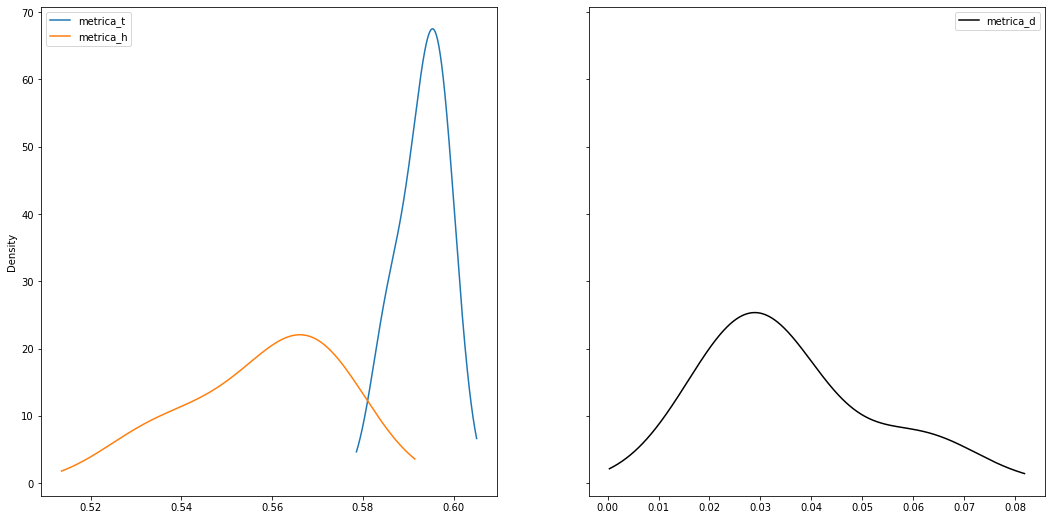

In [661]:
f, ((ax1,ax2)) = plt.subplots(figsize=(18, 9), ncols=2, sharey=True)

pd.DataFrame(skf_dict).T[['metrica_t','metrica_h']].plot(kind='kde', ax=ax1)
pd.DataFrame(skf_dict).T[['metrica_d']].plot(kind='kde', ax=ax2, c='k');

- - -

In [662]:
X = x_[accept].copy()
y = yy.copy()

model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

metrica = fbeta_score( y , y_pred, beta=0.333, average="micro" )

print(classification_report(y, y_pred))

[LightGBM] [Warning] lambda_l1 is set=0.21912118122568464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21912118122568464
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] lambda_l2 is set=1.4155247848400978, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4155247848400978
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       285
           1       0.62      0.81      0.71        96
           2       0.70      0.12      0.20       200
           3       0.49      0.82      0.62      

In [663]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for c in sorted(np.unique(y)):
    mask = np.argwhere(y == c)
    fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
    roc_auc[c] = auc(fpr[c], tpr[c])

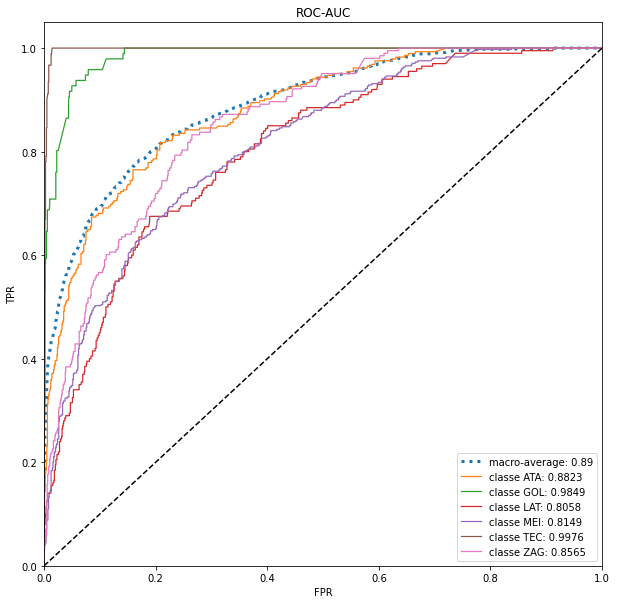

In [664]:
n_classes = len( sorted(np.unique(y)) )

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

f, ((ax1)) = plt.subplots(figsize=(10, 10))
    
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot( fpr["macro"], tpr["macro"],
    label = "macro-average: {0:0.2f}".format(roc_auc["macro"]),
    linestyle = ":", linewidth = 3)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
            label=rf"classe {str(depara[i])}: {round(roc_auc[i], 4)}",
            linewidth = 1.23)

plt.plot([0, 1], [0, 1], "k--",)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC")
plt.legend(loc="lower right")
plt.show()

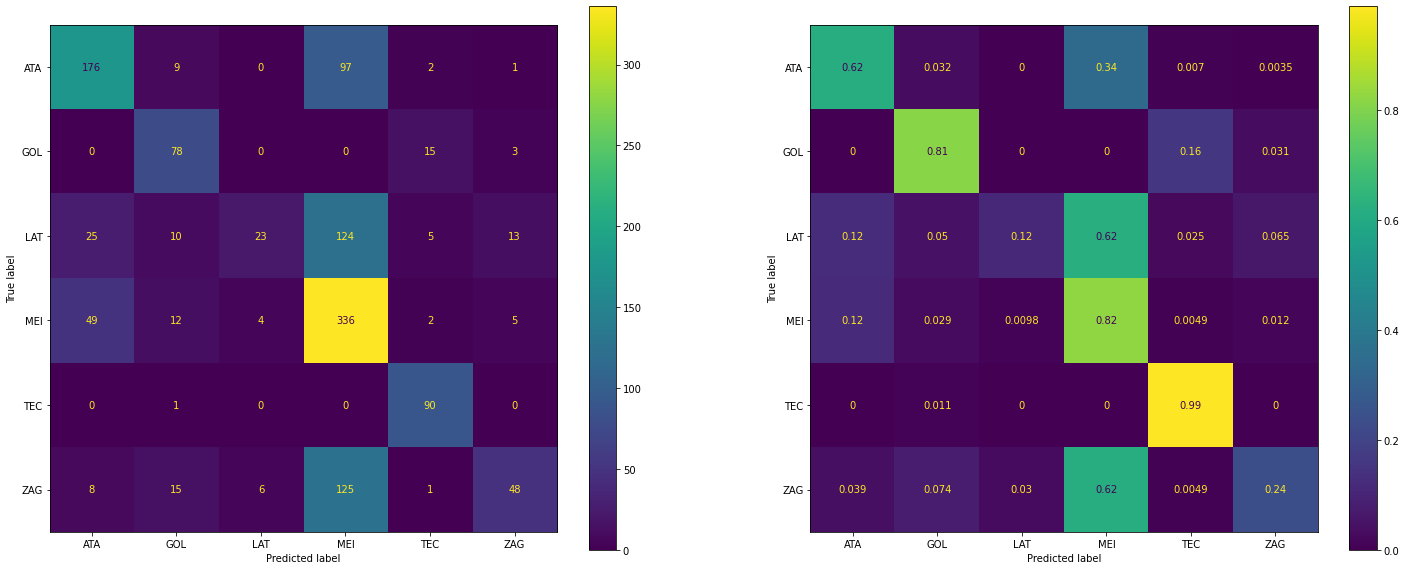

In [665]:
f, ((ax1, ax2)) = plt.subplots(figsize=(25, 10), ncols=2)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[depara[i] for i in range(len(depara))])
disp.plot(ax=ax1)

cm = confusion_matrix(y, y_pred, normalize='true' )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[depara[i] for i in range(len(depara))])
disp.plot(ax=ax2)
plt.show()

#### por fold

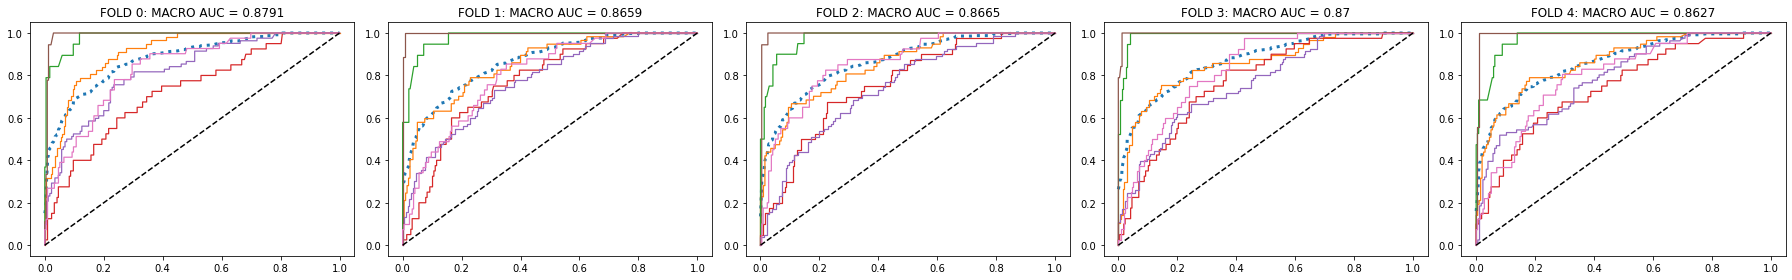

In [666]:
n_classes = len( sorted(np.unique(y)) )

# f, (axs) = plt.subplots(figsize=(25, 25), nrows=n_classes+1, ncols=len(skf_dict))
f, (axs) = plt.subplots(figsize=(25, 4), nrows=1, ncols=len(skf_dict))

for key in sorted(skf_dict):
    y = skf_dict[key]['df']['true'].values
    y_pred = skf_dict[key]['df']['pred'].values
    y_prob = skf_dict[key]['prob']
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for c in sorted(np.unique(y)):
        mask = np.argwhere(y == c)
        fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
        roc_auc[c] = auc(fpr[c], tpr[c])
        
    n_classes = len( sorted(np.unique(y)) )

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    axs[int(key)].plot( fpr["macro"], tpr["macro"],
        label = "macro-average: {0:0.2f}".format(roc_auc["macro"]),
        linestyle = ":", linewidth = 3)

    for i in range(n_classes):
        axs[int(key)].plot(fpr[i], tpr[i],
                label=rf"classe {str(depara[i])}: {round(roc_auc[i], 4)}",
                linewidth = 1.23 )
#         axs[i+1][int(key)].plot(fpr[i], tpr[i], linewidth = 1.23 )

    axs[int(key)].plot([0, 1], [0, 1], "k--")
    axs[int(key)].set_title( rf"FOLD {key}: MACRO AUC = {round(roc_auc['macro'], 4)}" )
    
# for i in range(n_classes):
#     axs[i+1][0].set_ylabel(depara[i])

#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("FPR")
#     plt.ylabel("TPR")
#     plt.title(rf"ROC-AUC: FOLD {key}")
#     plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#### por classe

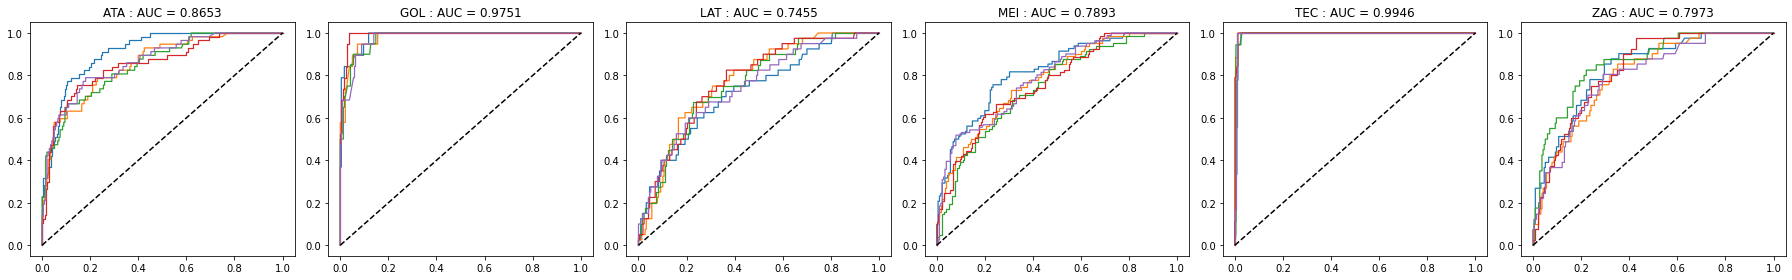

In [667]:
n_classes = len( sorted(np.unique(y)) )

f, (axs) = plt.subplots(figsize=(25, 4), nrows=1, ncols=n_classes)

for key in sorted(skf_dict):
    y = skf_dict[key]['df']['true'].values
    y_pred = skf_dict[key]['df']['pred'].values
    y_prob = skf_dict[key]['prob']
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for c in sorted(np.unique(y)):
        mask = np.argwhere(y == c)
        fpr[c], tpr[c], _ = roc_curve((y == c), y_prob[:,c].ravel())
        roc_auc[c] = auc(fpr[c], tpr[c])
        
    n_classes = len( sorted(np.unique(y)) )

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    for i in range(n_classes):
        axs[i].plot(fpr[i], tpr[i], linewidth = 1.23 )
    
for c in range(n_classes):
    axs[c].plot([0, 1], [0, 1], "k--")
    
    mean_auc = list()
    for key in sorted(skf_dict):
        mask = np.argwhere(y == c)
        fpr, tpr, _ = roc_curve((y == c), y_prob[:,c].ravel())
        mean_auc.append( auc(fpr, tpr) )
    
    axs[c].set_title(rf"{depara[c]} : AUC = {round(np.mean(mean_auc), 4)}")
    

#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("FPR")
#     plt.ylabel("TPR")
#     plt.title(rf"ROC-AUC: FOLD {key}")
#     plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

.